In [1]:
from __future__ import print_function
import random
import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import multiprocessing as mp
from sklearn.cluster import KMeans
from six.moves.urllib.request import urlretrieve
from keras import regularizers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Activation,AlphaDropout
from keras.optimizers import adam, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\deeplearning\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data_root = 'data'
german_data = os.path.join(data_root,'GermanCreditInput.xls')
german_label = os.path.join(data_root,'GermanCreditOutputClass1columnknn.xls')
australian_dataset = os.path.join(data_root,'australian dataset.xlsx')

In [3]:
nn_config = {
    'train_cycles':600,
}

In [4]:
x_data = np.array(pd.read_excel(german_data,header=None))
y_data = np.array(pd.read_excel(german_label,header=None))
print('Dataset Shape : {}\nDataset Labels Shape : {}'.format(x_data.shape,y_data.shape))

Dataset Shape : (1000, 30)
Dataset Labels Shape : (1000, 1)


In [5]:
mx = MinMaxScaler()
mx.fit(x_data)
p_x_data = mx.transform(x_data)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
def data_generator(data,labels,batch_size) :
    class_data = [[],[]]
    for i,row in enumerate(data) :
        if labels[i] == 0 :
            class_data[0].append(list(row))
        else :
            class_data[1].append(list(row))
    while True :
        batch = []
        batch_label = []
        for _ in range(batch_size) :
            choice = 1 if np.random.random() > .5 else 0
            batch_label.append(choice)
            batch.append(class_data[choice][np.random.randint(len(class_data[choice]))])
        yield (np.array(batch),np.array(batch_label))     

In [7]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
skf = StratifiedKFold(n_splits=10)
sum_val_acc = 0
for train_index, test_index in skf.split(p_x_data, y_data):
    model = Sequential()
    model.add(Dense(100, input_dim=30, kernel_initializer='glorot_normal', activation='selu'))
    model.add(AlphaDropout(.2))
    model.add(Dense(100, kernel_initializer='glorot_normal', activation='selu'))
    model.add(Dense(100, kernel_initializer='glorot_normal', activation='selu'))
    model.add(AlphaDropout(.2))
    model.add(Dense(100,  kernel_initializer='glorot_normal', activation='selu'))
    model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
    hist = model.fit_generator(data_generator(p_x_data[train_index,:],y_data[train_index,:],32),epochs=int(10),steps_per_epoch=40,validation_data=(mx.transform(x_data)[test_index,:],y_data[test_index,:]))
    sum_val_acc += hist.history['val_acc'].pop()
    del model
print(sum_val_acc/10)

Epoch 1/10
40/40 [==============================] - 46s 1s/step - loss: 0.7446 - acc: 0.5555 - val_loss: 0.7150 - val_acc: 0.6000
Epoch 2/10
40/40 [==============================] - 0s 5ms/step - loss: 0.6809 - acc: 0.5938 - val_loss: 0.5128 - val_acc: 0.7500
Epoch 3/10
40/40 [==============================] - 0s 5ms/step - loss: 0.6264 - acc: 0.6500 - val_loss: 0.5040 - val_acc: 0.7500
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6097 - acc: 0.6750 - val_loss: 0.5071 - val_acc: 0.7600
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6274 - acc: 0.6633 - val_loss: 0.4671 - val_acc: 0.7800
Epoch 6/10
40/40 [==============================] - 0s 7ms/step - loss: 0.6242 - acc: 0.6656 - val_loss: 0.4527 - val_acc: 0.7900
Epoch 7/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5850 - acc: 0.6898 - val_loss: 0.4980 - val_acc: 0.7700
Epoch 8/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6124 - acc: 0.67

KeyboardInterrupt: 

In [19]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
skf = StratifiedKFold(n_splits=10)
sum_val_acc = 0
for train_index, test_index in skf.split(p_x_data, y_data):
    model = Sequential()
    model.add(Dense(100, input_dim=30, kernel_initializer='glorot_normal', activation='selu'))
    model.add(AlphaDropout(.2))
    model.add(Dense(75, kernel_initializer='glorot_normal', activation='selu'))
    model.add(Dense(50, kernel_initializer='glorot_normal', activation='selu'))
    model.add(AlphaDropout(.2))
    model.add(Dense(25,  kernel_initializer='glorot_normal', activation='selu'))
    model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
    hist = model.fit_generator(data_generator(p_x_data[train_index,:],y_data[train_index,:],32),epochs=int(10),steps_per_epoch=40,validation_data=(mx.transform(x_data)[test_index,:],y_data[test_index,:]))
    sum_val_acc += hist.history['val_acc'].pop()
    del model
print(sum_val_acc/10)

Epoch 1/10
40/40 [==============================] - 3s 72ms/step - loss: 0.7991 - acc: 0.5437 - val_loss: 0.5395 - val_acc: 0.7800
Epoch 2/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6843 - acc: 0.5953 - val_loss: 0.5185 - val_acc: 0.7800
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6624 - acc: 0.6211 - val_loss: 0.4848 - val_acc: 0.7800
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6243 - acc: 0.6539 - val_loss: 0.4926 - val_acc: 0.7600
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6161 - acc: 0.6680 - val_loss: 0.6205 - val_acc: 0.7100
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6251 - acc: 0.6641 - val_loss: 0.5104 - val_acc: 0.7700
Epoch 7/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5937 - acc: 0.6945 - val_loss: 0.5286 - val_acc: 0.7800
Epoch 8/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5931 - acc: 0.6

Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6405 - acc: 0.6445 - val_loss: 0.5626 - val_acc: 0.7200
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6058 - acc: 0.6797 - val_loss: 0.5869 - val_acc: 0.7300
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5992 - acc: 0.6828 - val_loss: 0.7230 - val_acc: 0.6600
Epoch 7/10
40/40 [==============================] - 0s 7ms/step - loss: 0.6017 - acc: 0.6914 - val_loss: 0.6810 - val_acc: 0.6700
Epoch 8/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5676 - acc: 0.7047 - val_loss: 0.7377 - val_acc: 0.6400
Epoch 9/10
40/40 [==============================] - 0s 7ms/step - loss: 0.5760 - acc: 0.7070 - val_loss: 0.6149 - val_acc: 0.7000
Epoch 10/10
40/40 [==============================] - ETA: 0s - loss: 0.5716 - acc: 0.701 - 0s 6ms/step - loss: 0.5699 - acc: 0.7031 - val_loss: 0.6233 - val_acc: 0.6900
Epoch 1/10
40/40 [==============================] -

In [8]:
sum_val_acc = 0
skf = StratifiedKFold(n_splits=10)
sgd = SGD(lr=0.3, momentum=0.7)
for train_index, test_index in skf.split(x_data, y_data):
    model = Sequential()
    model.add(Dense(100, input_dim=30, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
    hist = model.fit_generator(data_generator(p_x_data[train_index,:],y_data[train_index,:],32),epochs=int(1000),steps_per_epoch=40,validation_data=(mx.transform(x_data)[test_index,:],y_data[test_index,:]))
    sum_val_acc += hist.history['val_acc'].pop()
    del model
print(sum_val_acc/10)

Epoch 1/1000
40/40 [==============================] - 1s 20ms/step - loss: 0.6903 - acc: 0.5695 - val_loss: 0.6778 - val_acc: 0.6400
Epoch 2/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.6642 - acc: 0.6430 - val_loss: 0.6914 - val_acc: 0.4500
Epoch 3/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.6388 - acc: 0.6969 - val_loss: 0.6276 - val_acc: 0.7200
Epoch 4/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.6165 - acc: 0.7352 - val_loss: 0.5928 - val_acc: 0.7200
Epoch 5/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.6087 - acc: 0.7031 - val_loss: 0.6075 - val_acc: 0.6900
Epoch 6/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5933 - acc: 0.7188 - val_loss: 0.5808 - val_acc: 0.7400
Epoch 7/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5771 - acc: 0.7336 - val_loss: 0.5751 - val_acc: 0.7200
Epoch 8/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.5046 - acc: 0.7656 - val_loss: 0.4878 - val_acc: 0.7900
Epoch 124/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5321 - acc: 0.7273 - val_loss: 0.4960 - val_acc: 0.8000
Epoch 125/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5040 - acc: 0.7648 - val_loss: 0.4842 - val_acc: 0.7800
Epoch 126/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5263 - acc: 0.7367 - val_loss: 0.5033 - val_acc: 0.8000
Epoch 127/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5109 - acc: 0.7383 - val_loss: 0.5559 - val_acc: 0.7500
Epoch 128/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4987 - acc: 0.7594 - val_loss: 0.4988 - val_acc: 0.7900
Epoch 129/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4911 - acc: 0.7781 - val_loss: 0.4936 - val_acc: 0.7900
Epoch 130/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.5038 - acc: 0.7609 - val_loss: 0.5079 - val_acc: 0.8100
Epoch 246/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5258 - acc: 0.7367 - val_loss: 0.5131 - val_acc: 0.8000
Epoch 247/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4820 - acc: 0.7656 - val_loss: 0.5185 - val_acc: 0.7800
Epoch 248/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5082 - acc: 0.7539 - val_loss: 0.5045 - val_acc: 0.7900
Epoch 249/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4874 - acc: 0.7727 - val_loss: 0.4779 - val_acc: 0.8000
Epoch 250/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5167 - acc: 0.7422 - val_loss: 0.5089 - val_acc: 0.7700
Epoch 251/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5305 - acc: 0.7469 - val_loss: 0.5188 - val_acc: 0.7700
Epoch 252/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4665 - acc: 0.7828 - val_loss: 0.4805 - val_acc: 0.7900
Epoch 368/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4484 - acc: 0.8008 - val_loss: 0.4701 - val_acc: 0.7700
Epoch 369/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4537 - acc: 0.7875 - val_loss: 0.4795 - val_acc: 0.7800
Epoch 370/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4850 - acc: 0.7688 - val_loss: 0.4592 - val_acc: 0.7800
Epoch 371/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4622 - acc: 0.7820 - val_loss: 0.4615 - val_acc: 0.7700
Epoch 372/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4663 - acc: 0.7852 - val_loss: 0.4719 - val_acc: 0.7800
Epoch 373/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4641 - acc: 0.7867 - val_loss: 0.4704 - val_acc: 0.7700
Epoch 374/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4221 - acc: 0.8016 - val_loss: 0.4779 - val_acc: 0.7500
Epoch 490/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4205 - acc: 0.8180 - val_loss: 0.4562 - val_acc: 0.7800
Epoch 491/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4209 - acc: 0.8156 - val_loss: 0.4335 - val_acc: 0.8100
Epoch 492/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4306 - acc: 0.8039 - val_loss: 0.4646 - val_acc: 0.7800
Epoch 493/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4052 - acc: 0.8180 - val_loss: 0.4458 - val_acc: 0.7800
Epoch 494/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4160 - acc: 0.8125 - val_loss: 0.4400 - val_acc: 0.7700
Epoch 495/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4069 - acc: 0.8180 - val_loss: 0.4530 - val_acc: 0.7800
Epoch 496/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.3587 - acc: 0.8484 - val_loss: 0.4381 - val_acc: 0.8000
Epoch 612/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3296 - acc: 0.8664 - val_loss: 0.4533 - val_acc: 0.8000
Epoch 613/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3345 - acc: 0.8672 - val_loss: 0.4569 - val_acc: 0.8000
Epoch 614/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3641 - acc: 0.8547 - val_loss: 0.4394 - val_acc: 0.8100
Epoch 615/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3414 - acc: 0.8477 - val_loss: 0.4440 - val_acc: 0.8200
Epoch 616/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3528 - acc: 0.8461 - val_loss: 0.4651 - val_acc: 0.7800
Epoch 617/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3401 - acc: 0.8656 - val_loss: 0.4562 - val_acc: 0.8200
Epoch 618/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2834 - acc: 0.8945 - val_loss: 0.4981 - val_acc: 0.7500
Epoch 734/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2880 - acc: 0.8969 - val_loss: 0.4936 - val_acc: 0.7500
Epoch 735/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2852 - acc: 0.8945 - val_loss: 0.4732 - val_acc: 0.7900
Epoch 736/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2816 - acc: 0.9000 - val_loss: 0.4854 - val_acc: 0.7800
Epoch 737/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2828 - acc: 0.8953 - val_loss: 0.4702 - val_acc: 0.8000
Epoch 738/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2805 - acc: 0.9047 - val_loss: 0.4773 - val_acc: 0.7900
Epoch 739/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2889 - acc: 0.8828 - val_loss: 0.4757 - val_acc: 0.7800
Epoch 740/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1928 - acc: 0.9438 - val_loss: 0.5469 - val_acc: 0.7400
Epoch 856/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2171 - acc: 0.9281 - val_loss: 0.5468 - val_acc: 0.7400
Epoch 857/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2170 - acc: 0.9383 - val_loss: 0.5371 - val_acc: 0.7500
Epoch 858/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2192 - acc: 0.9289 - val_loss: 0.5523 - val_acc: 0.7500
Epoch 859/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2268 - acc: 0.9203 - val_loss: 0.5503 - val_acc: 0.7400
Epoch 860/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2133 - acc: 0.9367 - val_loss: 0.5402 - val_acc: 0.7700
Epoch 861/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1996 - acc: 0.9359 - val_loss: 0.5320 - val_acc: 0.7700
Epoch 862/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1487 - acc: 0.9641 - val_loss: 0.6273 - val_acc: 0.7600
Epoch 978/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1564 - acc: 0.9578 - val_loss: 0.6158 - val_acc: 0.7600
Epoch 979/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1388 - acc: 0.9672 - val_loss: 0.6154 - val_acc: 0.7500
Epoch 980/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1500 - acc: 0.9742 - val_loss: 0.6001 - val_acc: 0.7800
Epoch 981/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1471 - acc: 0.9664 - val_loss: 0.6191 - val_acc: 0.7700
Epoch 982/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1339 - acc: 0.9695 - val_loss: 0.6257 - val_acc: 0.7500
Epoch 983/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1366 - acc: 0.9695 - val_loss: 0.6265 - val_acc: 0.7400
Epoch 984/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 100/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4791 - acc: 0.7664 - val_loss: 0.5526 - val_acc: 0.7400
Epoch 101/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5075 - acc: 0.7609 - val_loss: 0.5902 - val_acc: 0.7100
Epoch 102/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4979 - acc: 0.7484 - val_loss: 0.5696 - val_acc: 0.7200
Epoch 103/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4893 - acc: 0.7602 - val_loss: 0.5614 - val_acc: 0.7200
Epoch 104/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5127 - acc: 0.7391 - val_loss: 0.6055 - val_acc: 0.7100
Epoch 105/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5214 - acc: 0.7367 - val_loss: 0.5703 - val_acc: 0.7100
Epoch 106/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4958 - acc: 0.7695 - val_loss: 0.5824 - val_acc: 0.7000
Epoch 107/1000
40/40 [==============================] - 0s 4ms

40/40 [==============================] - 0s 4ms/step - loss: 0.4811 - acc: 0.7578 - val_loss: 0.6008 - val_acc: 0.7100
Epoch 223/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4822 - acc: 0.7734 - val_loss: 0.6056 - val_acc: 0.7100
Epoch 224/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4569 - acc: 0.7852 - val_loss: 0.5621 - val_acc: 0.7300
Epoch 225/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4828 - acc: 0.7680 - val_loss: 0.6368 - val_acc: 0.6400
Epoch 226/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5270 - acc: 0.7547 - val_loss: 0.5678 - val_acc: 0.7100
Epoch 227/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4842 - acc: 0.7672 - val_loss: 0.5505 - val_acc: 0.7100
Epoch 228/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4917 - acc: 0.7539 - val_loss: 0.5615 - val_acc: 0.7200
Epoch 229/1000
40/40 [==============================] - 0s 3ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4671 - acc: 0.7789 - val_loss: 0.5742 - val_acc: 0.7400
Epoch 345/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4488 - acc: 0.8031 - val_loss: 0.5657 - val_acc: 0.7400
Epoch 346/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4573 - acc: 0.8078 - val_loss: 0.5743 - val_acc: 0.7300
Epoch 347/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4749 - acc: 0.7750 - val_loss: 0.6124 - val_acc: 0.7100
Epoch 348/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4784 - acc: 0.7711 - val_loss: 0.6103 - val_acc: 0.7000
Epoch 349/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4494 - acc: 0.7945 - val_loss: 0.5786 - val_acc: 0.7200
Epoch 350/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4677 - acc: 0.7633 - val_loss: 0.5798 - val_acc: 0.7200
Epoch 351/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.3913 - acc: 0.8305 - val_loss: 0.6160 - val_acc: 0.7100
Epoch 467/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4256 - acc: 0.8109 - val_loss: 0.6003 - val_acc: 0.7200
Epoch 468/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3864 - acc: 0.8320 - val_loss: 0.5808 - val_acc: 0.7100
Epoch 469/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3743 - acc: 0.8523 - val_loss: 0.6115 - val_acc: 0.7200
Epoch 470/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4026 - acc: 0.8320 - val_loss: 0.5923 - val_acc: 0.7000
Epoch 471/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4162 - acc: 0.8172 - val_loss: 0.6106 - val_acc: 0.7200
Epoch 472/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3943 - acc: 0.8203 - val_loss: 0.5796 - val_acc: 0.6900
Epoch 473/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.3332 - acc: 0.8586 - val_loss: 0.6487 - val_acc: 0.6500
Epoch 589/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3303 - acc: 0.8602 - val_loss: 0.6638 - val_acc: 0.6500
Epoch 590/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3428 - acc: 0.8617 - val_loss: 0.6535 - val_acc: 0.6600
Epoch 591/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3233 - acc: 0.8727 - val_loss: 0.6639 - val_acc: 0.6600
Epoch 592/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3091 - acc: 0.8664 - val_loss: 0.6752 - val_acc: 0.6600
Epoch 593/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3169 - acc: 0.8750 - val_loss: 0.6577 - val_acc: 0.6600
Epoch 594/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3193 - acc: 0.8703 - val_loss: 0.6611 - val_acc: 0.6600
Epoch 595/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2465 - acc: 0.9227 - val_loss: 0.7409 - val_acc: 0.6900
Epoch 711/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2606 - acc: 0.9078 - val_loss: 0.7520 - val_acc: 0.6600
Epoch 712/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2622 - acc: 0.9102 - val_loss: 0.7479 - val_acc: 0.6600
Epoch 713/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2463 - acc: 0.9164 - val_loss: 0.7534 - val_acc: 0.6500
Epoch 714/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2479 - acc: 0.9203 - val_loss: 0.7601 - val_acc: 0.6500
Epoch 715/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.2604 - acc: 0.9109 - val_loss: 0.7657 - val_acc: 0.6700
Epoch 716/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.2520 - acc: 0.9125 - val_loss: 0.7516 - val_acc: 0.6700
Epoch 717/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1780 - acc: 0.9477 - val_loss: 0.9077 - val_acc: 0.7000
Epoch 833/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1648 - acc: 0.9578 - val_loss: 0.9158 - val_acc: 0.6900
Epoch 834/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1797 - acc: 0.9531 - val_loss: 0.9084 - val_acc: 0.6900
Epoch 835/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1710 - acc: 0.9531 - val_loss: 0.9132 - val_acc: 0.6700
Epoch 836/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1635 - acc: 0.9586 - val_loss: 0.9072 - val_acc: 0.6800
Epoch 837/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1717 - acc: 0.9562 - val_loss: 0.8898 - val_acc: 0.7000
Epoch 838/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1614 - acc: 0.9609 - val_loss: 0.9122 - val_acc: 0.6600
Epoch 839/1000
40/40 [==============================] - 0s 6ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1133 - acc: 0.9766 - val_loss: 1.0630 - val_acc: 0.6800
Epoch 955/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1221 - acc: 0.9695 - val_loss: 1.0701 - val_acc: 0.6600
Epoch 956/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1074 - acc: 0.9773 - val_loss: 1.0799 - val_acc: 0.6700
Epoch 957/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1220 - acc: 0.9742 - val_loss: 1.0860 - val_acc: 0.6700
Epoch 958/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1178 - acc: 0.9734 - val_loss: 1.0870 - val_acc: 0.6800
Epoch 959/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1275 - acc: 0.9688 - val_loss: 1.0879 - val_acc: 0.6700
Epoch 960/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1177 - acc: 0.9719 - val_loss: 1.0932 - val_acc: 0.6700
Epoch 961/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 77/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5162 - acc: 0.7453 - val_loss: 0.5197 - val_acc: 0.7800
Epoch 78/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5154 - acc: 0.7414 - val_loss: 0.5139 - val_acc: 0.7800
Epoch 79/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5009 - acc: 0.7469 - val_loss: 0.5198 - val_acc: 0.7800
Epoch 80/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5031 - acc: 0.7508 - val_loss: 0.5263 - val_acc: 0.7800
Epoch 81/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5341 - acc: 0.7266 - val_loss: 0.5530 - val_acc: 0.7700
Epoch 82/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4730 - acc: 0.7797 - val_loss: 0.5454 - val_acc: 0.7700
Epoch 83/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4963 - acc: 0.7570 - val_loss: 0.5004 - val_acc: 0.7500
Epoch 84/1000
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 4ms/step - loss: 0.4956 - acc: 0.7563 - val_loss: 0.5136 - val_acc: 0.7700
Epoch 200/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4964 - acc: 0.7625 - val_loss: 0.5444 - val_acc: 0.7500
Epoch 201/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.4932 - acc: 0.7484 - val_loss: 0.5231 - val_acc: 0.7600
Epoch 202/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.5081 - acc: 0.7594 - val_loss: 0.5153 - val_acc: 0.7600
Epoch 203/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.4895 - acc: 0.7734 - val_loss: 0.5471 - val_acc: 0.7600
Epoch 204/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4984 - acc: 0.7641 - val_loss: 0.5348 - val_acc: 0.7700
Epoch 205/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4861 - acc: 0.7711 - val_loss: 0.5108 - val_acc: 0.7500
Epoch 206/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4711 - acc: 0.7742 - val_loss: 0.5692 - val_acc: 0.7400
Epoch 322/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4882 - acc: 0.7672 - val_loss: 0.5384 - val_acc: 0.7600
Epoch 323/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4878 - acc: 0.7594 - val_loss: 0.5517 - val_acc: 0.7500
Epoch 324/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4813 - acc: 0.7625 - val_loss: 0.5128 - val_acc: 0.7600
Epoch 325/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4709 - acc: 0.7711 - val_loss: 0.5435 - val_acc: 0.7500
Epoch 326/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4684 - acc: 0.7773 - val_loss: 0.5290 - val_acc: 0.7500
Epoch 327/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4585 - acc: 0.7844 - val_loss: 0.5294 - val_acc: 0.7500
Epoch 328/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 3ms/step - loss: 0.4289 - acc: 0.8008 - val_loss: 0.5343 - val_acc: 0.7300
Epoch 444/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4127 - acc: 0.8289 - val_loss: 0.5297 - val_acc: 0.7400
Epoch 445/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4219 - acc: 0.8102 - val_loss: 0.5241 - val_acc: 0.7400
Epoch 446/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4382 - acc: 0.8094 - val_loss: 0.5455 - val_acc: 0.7300
Epoch 447/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4018 - acc: 0.8102 - val_loss: 0.5336 - val_acc: 0.7400
Epoch 448/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4229 - acc: 0.8273 - val_loss: 0.5357 - val_acc: 0.7400
Epoch 449/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4225 - acc: 0.8102 - val_loss: 0.5323 - val_acc: 0.7500
Epoch 450/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 3ms/step - loss: 0.3454 - acc: 0.8633 - val_loss: 0.5457 - val_acc: 0.7400
Epoch 566/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3585 - acc: 0.8547 - val_loss: 0.5274 - val_acc: 0.7600
Epoch 567/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.3580 - acc: 0.8547 - val_loss: 0.5503 - val_acc: 0.7400
Epoch 568/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3715 - acc: 0.8461 - val_loss: 0.5383 - val_acc: 0.7400
Epoch 569/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3627 - acc: 0.8414 - val_loss: 0.5477 - val_acc: 0.7400
Epoch 570/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3684 - acc: 0.8609 - val_loss: 0.5355 - val_acc: 0.7400
Epoch 571/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3637 - acc: 0.8594 - val_loss: 0.5280 - val_acc: 0.7600
Epoch 572/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2994 - acc: 0.8852 - val_loss: 0.5521 - val_acc: 0.7400
Epoch 688/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2747 - acc: 0.8969 - val_loss: 0.5697 - val_acc: 0.7500
Epoch 689/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2919 - acc: 0.8867 - val_loss: 0.5552 - val_acc: 0.7500
Epoch 690/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2927 - acc: 0.9008 - val_loss: 0.5687 - val_acc: 0.7500
Epoch 691/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.2910 - acc: 0.8898 - val_loss: 0.5571 - val_acc: 0.7500
Epoch 692/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2875 - acc: 0.8875 - val_loss: 0.5839 - val_acc: 0.7500
Epoch 693/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2936 - acc: 0.8828 - val_loss: 0.5687 - val_acc: 0.7500
Epoch 694/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2250 - acc: 0.9156 - val_loss: 0.6108 - val_acc: 0.7600
Epoch 810/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2153 - acc: 0.9258 - val_loss: 0.6129 - val_acc: 0.7600
Epoch 811/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2401 - acc: 0.9172 - val_loss: 0.6059 - val_acc: 0.7600
Epoch 812/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2116 - acc: 0.9336 - val_loss: 0.6008 - val_acc: 0.7600
Epoch 813/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2117 - acc: 0.9375 - val_loss: 0.6097 - val_acc: 0.7600
Epoch 814/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2079 - acc: 0.9312 - val_loss: 0.6314 - val_acc: 0.7500
Epoch 815/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2277 - acc: 0.9250 - val_loss: 0.6135 - val_acc: 0.7600
Epoch 816/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1546 - acc: 0.9539 - val_loss: 0.6639 - val_acc: 0.7700
Epoch 932/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1422 - acc: 0.9602 - val_loss: 0.6716 - val_acc: 0.7700
Epoch 933/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1523 - acc: 0.9625 - val_loss: 0.6718 - val_acc: 0.7600
Epoch 934/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1487 - acc: 0.9547 - val_loss: 0.6784 - val_acc: 0.7600
Epoch 935/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1533 - acc: 0.9641 - val_loss: 0.6812 - val_acc: 0.7600
Epoch 936/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1477 - acc: 0.9609 - val_loss: 0.6805 - val_acc: 0.7600
Epoch 937/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1392 - acc: 0.9602 - val_loss: 0.6739 - val_acc: 0.7600
Epoch 938/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 54/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5089 - acc: 0.7609 - val_loss: 0.5555 - val_acc: 0.6700
Epoch 55/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5167 - acc: 0.7711 - val_loss: 0.5681 - val_acc: 0.6800
Epoch 56/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5027 - acc: 0.7648 - val_loss: 0.5807 - val_acc: 0.6800
Epoch 57/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5119 - acc: 0.7453 - val_loss: 0.5280 - val_acc: 0.7400
Epoch 58/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5001 - acc: 0.7695 - val_loss: 0.5649 - val_acc: 0.6800
Epoch 59/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4912 - acc: 0.7828 - val_loss: 0.5592 - val_acc: 0.6700
Epoch 60/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5059 - acc: 0.7656 - val_loss: 0.5352 - val_acc: 0.7200
Epoch 61/1000
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 3ms/step - loss: 0.5103 - acc: 0.7594 - val_loss: 0.5647 - val_acc: 0.6900
Epoch 177/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4876 - acc: 0.7812 - val_loss: 0.5539 - val_acc: 0.7000
Epoch 178/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4640 - acc: 0.7922 - val_loss: 0.5645 - val_acc: 0.6800
Epoch 179/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4970 - acc: 0.7742 - val_loss: 0.5561 - val_acc: 0.6900
Epoch 180/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4721 - acc: 0.7930 - val_loss: 0.5433 - val_acc: 0.7000
Epoch 181/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4959 - acc: 0.7680 - val_loss: 0.5722 - val_acc: 0.6800
Epoch 182/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4887 - acc: 0.7773 - val_loss: 0.5369 - val_acc: 0.7200
Epoch 183/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4752 - acc: 0.7648 - val_loss: 0.5237 - val_acc: 0.7300
Epoch 299/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4735 - acc: 0.7891 - val_loss: 0.5928 - val_acc: 0.6600
Epoch 300/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4754 - acc: 0.7672 - val_loss: 0.5596 - val_acc: 0.6800
Epoch 301/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5043 - acc: 0.7570 - val_loss: 0.5336 - val_acc: 0.7300
Epoch 302/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5001 - acc: 0.7484 - val_loss: 0.5501 - val_acc: 0.7000
Epoch 303/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4831 - acc: 0.7836 - val_loss: 0.5440 - val_acc: 0.7300
Epoch 304/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4691 - acc: 0.7773 - val_loss: 0.5618 - val_acc: 0.7000
Epoch 305/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4197 - acc: 0.8250 - val_loss: 0.5965 - val_acc: 0.7000
Epoch 421/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4105 - acc: 0.8227 - val_loss: 0.5947 - val_acc: 0.7000
Epoch 422/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4303 - acc: 0.8133 - val_loss: 0.5958 - val_acc: 0.6800
Epoch 423/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4370 - acc: 0.8000 - val_loss: 0.6042 - val_acc: 0.6900
Epoch 424/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4046 - acc: 0.8336 - val_loss: 0.5971 - val_acc: 0.6800
Epoch 425/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4125 - acc: 0.8242 - val_loss: 0.6425 - val_acc: 0.6400
Epoch 426/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4372 - acc: 0.7961 - val_loss: 0.6106 - val_acc: 0.6900
Epoch 427/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.3797 - acc: 0.8320 - val_loss: 0.6674 - val_acc: 0.7000
Epoch 543/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3434 - acc: 0.8523 - val_loss: 0.6485 - val_acc: 0.6600
Epoch 544/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.3727 - acc: 0.8484 - val_loss: 0.6547 - val_acc: 0.6900
Epoch 545/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3736 - acc: 0.8344 - val_loss: 0.6370 - val_acc: 0.7000
Epoch 546/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3585 - acc: 0.8484 - val_loss: 0.6464 - val_acc: 0.6900
Epoch 547/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.3842 - acc: 0.8305 - val_loss: 0.6543 - val_acc: 0.6900
Epoch 548/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.3586 - acc: 0.8469 - val_loss: 0.6454 - val_acc: 0.6900
Epoch 549/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 5ms/step - loss: 0.2986 - acc: 0.8883 - val_loss: 0.7014 - val_acc: 0.7200
Epoch 665/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2767 - acc: 0.9016 - val_loss: 0.6896 - val_acc: 0.7200
Epoch 666/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2713 - acc: 0.9016 - val_loss: 0.7127 - val_acc: 0.7000
Epoch 667/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2825 - acc: 0.9008 - val_loss: 0.7098 - val_acc: 0.7200
Epoch 668/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2919 - acc: 0.9000 - val_loss: 0.7036 - val_acc: 0.7200
Epoch 669/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2885 - acc: 0.8883 - val_loss: 0.6973 - val_acc: 0.7200
Epoch 670/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2939 - acc: 0.8828 - val_loss: 0.7373 - val_acc: 0.6900
Epoch 671/1000
40/40 [==============================] - 0s 5ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2214 - acc: 0.9273 - val_loss: 0.7840 - val_acc: 0.6900
Epoch 787/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2150 - acc: 0.9336 - val_loss: 0.7774 - val_acc: 0.7100
Epoch 788/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2384 - acc: 0.9219 - val_loss: 0.7820 - val_acc: 0.7000
Epoch 789/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2421 - acc: 0.9125 - val_loss: 0.7885 - val_acc: 0.6900
Epoch 790/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2222 - acc: 0.9312 - val_loss: 0.8074 - val_acc: 0.6800
Epoch 791/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2274 - acc: 0.9328 - val_loss: 0.8067 - val_acc: 0.6900
Epoch 792/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2091 - acc: 0.9367 - val_loss: 0.7834 - val_acc: 0.7100
Epoch 793/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1604 - acc: 0.9461 - val_loss: 0.9017 - val_acc: 0.6700
Epoch 909/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1502 - acc: 0.9633 - val_loss: 0.9059 - val_acc: 0.6600
Epoch 910/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1487 - acc: 0.9648 - val_loss: 0.8943 - val_acc: 0.6700
Epoch 911/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1731 - acc: 0.9570 - val_loss: 0.9070 - val_acc: 0.6800
Epoch 912/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1520 - acc: 0.9617 - val_loss: 0.9118 - val_acc: 0.6800
Epoch 913/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1405 - acc: 0.9664 - val_loss: 0.9233 - val_acc: 0.6500
Epoch 914/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1516 - acc: 0.9594 - val_loss: 0.9150 - val_acc: 0.6600
Epoch 915/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.5250 - acc: 0.7430 - val_loss: 0.5242 - val_acc: 0.7500
Epoch 31/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5295 - acc: 0.7250 - val_loss: 0.5418 - val_acc: 0.7400
Epoch 32/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4991 - acc: 0.7719 - val_loss: 0.5401 - val_acc: 0.7400
Epoch 33/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.5133 - acc: 0.7539 - val_loss: 0.4984 - val_acc: 0.7500
Epoch 34/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.5131 - acc: 0.7484 - val_loss: 0.5276 - val_acc: 0.7300
Epoch 35/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4856 - acc: 0.7586 - val_loss: 0.5258 - val_acc: 0.7400
Epoch 36/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5146 - acc: 0.7492 - val_loss: 0.5271 - val_acc: 0.7400
Epoch 37/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5174 -

Epoch 92/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5072 - acc: 0.7609 - val_loss: 0.5161 - val_acc: 0.7400
Epoch 93/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4787 - acc: 0.7664 - val_loss: 0.5058 - val_acc: 0.7400
Epoch 94/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5315 - acc: 0.7406 - val_loss: 0.5392 - val_acc: 0.7300
Epoch 95/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5351 - acc: 0.7320 - val_loss: 0.5072 - val_acc: 0.7400
Epoch 96/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5083 - acc: 0.7445 - val_loss: 0.5350 - val_acc: 0.7200
Epoch 97/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5075 - acc: 0.7570 - val_loss: 0.5269 - val_acc: 0.7300
Epoch 98/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5183 - acc: 0.7437 - val_loss: 0.5104 - val_acc: 0.7500
Epoch 99/1000
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 4ms/step - loss: 0.4832 - acc: 0.7703 - val_loss: 0.5169 - val_acc: 0.7400
Epoch 215/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.4916 - acc: 0.7508 - val_loss: 0.5219 - val_acc: 0.7400
Epoch 216/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.5166 - acc: 0.7555 - val_loss: 0.5505 - val_acc: 0.7400
Epoch 217/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.4952 - acc: 0.7594 - val_loss: 0.5081 - val_acc: 0.7600
Epoch 218/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.5173 - acc: 0.7484 - val_loss: 0.5174 - val_acc: 0.7500
Epoch 219/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.5152 - acc: 0.7398 - val_loss: 0.5035 - val_acc: 0.7600
Epoch 220/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.4963 - acc: 0.7641 - val_loss: 0.5415 - val_acc: 0.7600
Epoch 221/1000
40/40 [==============================] - 0s 5ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4641 - acc: 0.7766 - val_loss: 0.5485 - val_acc: 0.7200
Epoch 337/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4565 - acc: 0.7945 - val_loss: 0.5618 - val_acc: 0.7100
Epoch 338/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4860 - acc: 0.7695 - val_loss: 0.5294 - val_acc: 0.7400
Epoch 339/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4584 - acc: 0.7883 - val_loss: 0.5385 - val_acc: 0.7400
Epoch 340/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4444 - acc: 0.7883 - val_loss: 0.5430 - val_acc: 0.7300
Epoch 341/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4555 - acc: 0.7867 - val_loss: 0.5426 - val_acc: 0.7200
Epoch 342/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4781 - acc: 0.7805 - val_loss: 0.5460 - val_acc: 0.7100
Epoch 343/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 458/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3660 - acc: 0.8453 - val_loss: 0.6121 - val_acc: 0.6800
Epoch 459/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4192 - acc: 0.8148 - val_loss: 0.5785 - val_acc: 0.6700
Epoch 460/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3978 - acc: 0.8219 - val_loss: 0.5829 - val_acc: 0.6700
Epoch 461/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4046 - acc: 0.8242 - val_loss: 0.5797 - val_acc: 0.6800
Epoch 462/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4351 - acc: 0.8000 - val_loss: 0.5569 - val_acc: 0.7200
Epoch 463/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4018 - acc: 0.8227 - val_loss: 0.5613 - val_acc: 0.7100
Epoch 464/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.4018 - acc: 0.8281 - val_loss: 0.5608 - val_acc: 0.7200
Epoch 465/1000
40/40 [==============================] - 0s 4ms

40/40 [==============================] - 0s 4ms/step - loss: 0.3471 - acc: 0.8664 - val_loss: 0.6090 - val_acc: 0.7000
Epoch 581/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3465 - acc: 0.8602 - val_loss: 0.6133 - val_acc: 0.7000
Epoch 582/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3467 - acc: 0.8547 - val_loss: 0.6080 - val_acc: 0.7000
Epoch 583/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3393 - acc: 0.8656 - val_loss: 0.6230 - val_acc: 0.7000
Epoch 584/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3366 - acc: 0.8547 - val_loss: 0.6298 - val_acc: 0.7000
Epoch 585/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3400 - acc: 0.8578 - val_loss: 0.6123 - val_acc: 0.6900
Epoch 586/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3419 - acc: 0.8586 - val_loss: 0.6087 - val_acc: 0.6900
Epoch 587/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2650 - acc: 0.9055 - val_loss: 0.6978 - val_acc: 0.6600
Epoch 703/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2749 - acc: 0.8969 - val_loss: 0.6915 - val_acc: 0.6800
Epoch 704/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2564 - acc: 0.9094 - val_loss: 0.6838 - val_acc: 0.6800
Epoch 705/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2555 - acc: 0.9102 - val_loss: 0.6882 - val_acc: 0.6800
Epoch 706/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2756 - acc: 0.8914 - val_loss: 0.6899 - val_acc: 0.6700
Epoch 707/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2923 - acc: 0.8922 - val_loss: 0.6845 - val_acc: 0.6800
Epoch 708/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2767 - acc: 0.9008 - val_loss: 0.6977 - val_acc: 0.6700
Epoch 709/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2100 - acc: 0.9242 - val_loss: 0.7956 - val_acc: 0.6700
Epoch 825/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2289 - acc: 0.9188 - val_loss: 0.8019 - val_acc: 0.6700
Epoch 826/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2055 - acc: 0.9383 - val_loss: 0.7882 - val_acc: 0.6800
Epoch 827/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1899 - acc: 0.9484 - val_loss: 0.7871 - val_acc: 0.6800
Epoch 828/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1946 - acc: 0.9492 - val_loss: 0.7899 - val_acc: 0.6700
Epoch 829/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1888 - acc: 0.9461 - val_loss: 0.7965 - val_acc: 0.6700
Epoch 830/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2026 - acc: 0.9406 - val_loss: 0.8178 - val_acc: 0.6700
Epoch 831/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1336 - acc: 0.9625 - val_loss: 0.8876 - val_acc: 0.7000
Epoch 947/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1481 - acc: 0.9648 - val_loss: 0.9003 - val_acc: 0.6900
Epoch 948/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1541 - acc: 0.9547 - val_loss: 0.8988 - val_acc: 0.7000
Epoch 949/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1621 - acc: 0.9547 - val_loss: 0.9031 - val_acc: 0.7000
Epoch 950/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1505 - acc: 0.9633 - val_loss: 0.8945 - val_acc: 0.6900
Epoch 951/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1452 - acc: 0.9625 - val_loss: 0.8890 - val_acc: 0.7000
Epoch 952/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1329 - acc: 0.9664 - val_loss: 0.8941 - val_acc: 0.6900
Epoch 953/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 69/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5090 - acc: 0.7437 - val_loss: 0.5105 - val_acc: 0.7600
Epoch 70/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4957 - acc: 0.7578 - val_loss: 0.5221 - val_acc: 0.7600
Epoch 71/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5326 - acc: 0.7406 - val_loss: 0.4818 - val_acc: 0.7900
Epoch 72/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5341 - acc: 0.7375 - val_loss: 0.5001 - val_acc: 0.7800
Epoch 73/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5213 - acc: 0.7359 - val_loss: 0.5032 - val_acc: 0.7800
Epoch 74/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5081 - acc: 0.7570 - val_loss: 0.5090 - val_acc: 0.7800
Epoch 75/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4944 - acc: 0.7641 - val_loss: 0.4940 - val_acc: 0.7700
Epoch 76/1000
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 4ms/step - loss: 0.5083 - acc: 0.7555 - val_loss: 0.4870 - val_acc: 0.7800
Epoch 192/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5321 - acc: 0.7445 - val_loss: 0.5325 - val_acc: 0.7600
Epoch 193/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.5006 - acc: 0.7656 - val_loss: 0.5014 - val_acc: 0.7800
Epoch 194/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5052 - acc: 0.7531 - val_loss: 0.4843 - val_acc: 0.7500
Epoch 195/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5244 - acc: 0.7414 - val_loss: 0.4818 - val_acc: 0.7700
Epoch 196/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5053 - acc: 0.7563 - val_loss: 0.5005 - val_acc: 0.7800
Epoch 197/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5115 - acc: 0.7586 - val_loss: 0.4882 - val_acc: 0.7600
Epoch 198/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.5180 - acc: 0.7375 - val_loss: 0.4812 - val_acc: 0.7800
Epoch 314/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4770 - acc: 0.7656 - val_loss: 0.4732 - val_acc: 0.8100
Epoch 315/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4927 - acc: 0.7563 - val_loss: 0.4759 - val_acc: 0.8100
Epoch 316/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4787 - acc: 0.7531 - val_loss: 0.4729 - val_acc: 0.8000
Epoch 317/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4610 - acc: 0.7859 - val_loss: 0.4811 - val_acc: 0.7900
Epoch 318/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4756 - acc: 0.7648 - val_loss: 0.4754 - val_acc: 0.8100
Epoch 319/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4844 - acc: 0.7820 - val_loss: 0.4686 - val_acc: 0.8000
Epoch 320/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4338 - acc: 0.7859 - val_loss: 0.4860 - val_acc: 0.7900
Epoch 436/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4274 - acc: 0.8164 - val_loss: 0.4798 - val_acc: 0.7800
Epoch 437/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4481 - acc: 0.7898 - val_loss: 0.5043 - val_acc: 0.7900
Epoch 438/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4284 - acc: 0.7930 - val_loss: 0.4832 - val_acc: 0.7900
Epoch 439/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4287 - acc: 0.8102 - val_loss: 0.4708 - val_acc: 0.7900
Epoch 440/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4016 - acc: 0.8266 - val_loss: 0.4942 - val_acc: 0.8000
Epoch 441/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4436 - acc: 0.8047 - val_loss: 0.4954 - val_acc: 0.7800
Epoch 442/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.3840 - acc: 0.8391 - val_loss: 0.5085 - val_acc: 0.7700
Epoch 558/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3786 - acc: 0.8492 - val_loss: 0.5010 - val_acc: 0.7800
Epoch 559/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3486 - acc: 0.8570 - val_loss: 0.5267 - val_acc: 0.7700
Epoch 560/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3483 - acc: 0.8547 - val_loss: 0.5258 - val_acc: 0.7700
Epoch 561/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3619 - acc: 0.8539 - val_loss: 0.5117 - val_acc: 0.7700
Epoch 562/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3635 - acc: 0.8555 - val_loss: 0.5112 - val_acc: 0.7700
Epoch 563/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3414 - acc: 0.8703 - val_loss: 0.4966 - val_acc: 0.7600
Epoch 564/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2814 - acc: 0.9016 - val_loss: 0.5843 - val_acc: 0.7600
Epoch 680/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2950 - acc: 0.8867 - val_loss: 0.5788 - val_acc: 0.7600
Epoch 681/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3180 - acc: 0.8773 - val_loss: 0.5584 - val_acc: 0.7900
Epoch 682/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2907 - acc: 0.8914 - val_loss: 0.5876 - val_acc: 0.7600
Epoch 683/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3116 - acc: 0.8773 - val_loss: 0.5715 - val_acc: 0.7500
Epoch 684/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2826 - acc: 0.8969 - val_loss: 0.5777 - val_acc: 0.7400
Epoch 685/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2731 - acc: 0.8984 - val_loss: 0.5809 - val_acc: 0.7500
Epoch 686/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 3ms/step - loss: 0.2176 - acc: 0.9273 - val_loss: 0.6627 - val_acc: 0.7300
Epoch 802/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2058 - acc: 0.9406 - val_loss: 0.6715 - val_acc: 0.7300
Epoch 803/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2115 - acc: 0.9312 - val_loss: 0.6853 - val_acc: 0.7200
Epoch 804/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.2157 - acc: 0.9336 - val_loss: 0.6848 - val_acc: 0.7400
Epoch 805/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2173 - acc: 0.9320 - val_loss: 0.6702 - val_acc: 0.7200
Epoch 806/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2171 - acc: 0.9320 - val_loss: 0.6723 - val_acc: 0.7200
Epoch 807/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2092 - acc: 0.9312 - val_loss: 0.6680 - val_acc: 0.7200
Epoch 808/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 5ms/step - loss: 0.1650 - acc: 0.9539 - val_loss: 0.7694 - val_acc: 0.6900
Epoch 924/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1544 - acc: 0.9578 - val_loss: 0.7730 - val_acc: 0.7200
Epoch 925/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1376 - acc: 0.9602 - val_loss: 0.7926 - val_acc: 0.7000
Epoch 926/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1441 - acc: 0.9672 - val_loss: 0.7835 - val_acc: 0.7100
Epoch 927/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1679 - acc: 0.9555 - val_loss: 0.8030 - val_acc: 0.7000
Epoch 928/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1371 - acc: 0.9656 - val_loss: 0.7920 - val_acc: 0.6900
Epoch 929/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1536 - acc: 0.9602 - val_loss: 0.8055 - val_acc: 0.7100
Epoch 930/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.5275 - acc: 0.7344 - val_loss: 0.6677 - val_acc: 0.6200
Epoch 46/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4773 - acc: 0.7805 - val_loss: 0.6669 - val_acc: 0.6300
Epoch 47/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4946 - acc: 0.7563 - val_loss: 0.6482 - val_acc: 0.6500
Epoch 48/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5045 - acc: 0.7586 - val_loss: 0.6151 - val_acc: 0.6800
Epoch 49/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5053 - acc: 0.7688 - val_loss: 0.6440 - val_acc: 0.6500
Epoch 50/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4977 - acc: 0.7688 - val_loss: 0.6365 - val_acc: 0.6400
Epoch 51/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5012 - acc: 0.7641 - val_loss: 0.6649 - val_acc: 0.6400
Epoch 52/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4915 -

40/40 [==============================] - 0s 4ms/step - loss: 0.5029 - acc: 0.7555 - val_loss: 0.7016 - val_acc: 0.6100
Epoch 168/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4682 - acc: 0.7648 - val_loss: 0.6968 - val_acc: 0.6200
Epoch 169/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4944 - acc: 0.7500 - val_loss: 0.6964 - val_acc: 0.6200
Epoch 170/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4983 - acc: 0.7641 - val_loss: 0.6893 - val_acc: 0.6200
Epoch 171/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5112 - acc: 0.7375 - val_loss: 0.6904 - val_acc: 0.6200
Epoch 172/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4833 - acc: 0.7805 - val_loss: 0.6529 - val_acc: 0.6500
Epoch 173/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4829 - acc: 0.7641 - val_loss: 0.6869 - val_acc: 0.6200
Epoch 174/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4940 - acc: 0.7516 - val_loss: 0.6726 - val_acc: 0.6100
Epoch 290/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4954 - acc: 0.7414 - val_loss: 0.6600 - val_acc: 0.6200
Epoch 291/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4838 - acc: 0.7602 - val_loss: 0.6288 - val_acc: 0.6400
Epoch 292/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4940 - acc: 0.7602 - val_loss: 0.6767 - val_acc: 0.6100
Epoch 293/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5032 - acc: 0.7453 - val_loss: 0.6583 - val_acc: 0.6200
Epoch 294/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4688 - acc: 0.7938 - val_loss: 0.6586 - val_acc: 0.6200
Epoch 295/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4701 - acc: 0.7742 - val_loss: 0.7115 - val_acc: 0.6000
Epoch 296/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4220 - acc: 0.8148 - val_loss: 0.6836 - val_acc: 0.6200
Epoch 412/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4514 - acc: 0.7891 - val_loss: 0.6716 - val_acc: 0.6400
Epoch 413/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4320 - acc: 0.8117 - val_loss: 0.7045 - val_acc: 0.5900
Epoch 414/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4168 - acc: 0.8156 - val_loss: 0.6451 - val_acc: 0.6500
Epoch 415/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4358 - acc: 0.7906 - val_loss: 0.6572 - val_acc: 0.6400
Epoch 416/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4223 - acc: 0.8102 - val_loss: 0.6584 - val_acc: 0.6300
Epoch 417/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4264 - acc: 0.8133 - val_loss: 0.6707 - val_acc: 0.6200
Epoch 418/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.3822 - acc: 0.8289 - val_loss: 0.6900 - val_acc: 0.6700
Epoch 534/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3758 - acc: 0.8312 - val_loss: 0.6824 - val_acc: 0.6700
Epoch 535/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3657 - acc: 0.8391 - val_loss: 0.6826 - val_acc: 0.6700
Epoch 536/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3418 - acc: 0.8578 - val_loss: 0.7016 - val_acc: 0.6400
Epoch 537/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3604 - acc: 0.8328 - val_loss: 0.6964 - val_acc: 0.6600
Epoch 538/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3597 - acc: 0.8461 - val_loss: 0.7358 - val_acc: 0.5900
Epoch 539/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3549 - acc: 0.8484 - val_loss: 0.7041 - val_acc: 0.6400
Epoch 540/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.3159 - acc: 0.8766 - val_loss: 0.7232 - val_acc: 0.7000
Epoch 656/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.3149 - acc: 0.8664 - val_loss: 0.7244 - val_acc: 0.7100
Epoch 657/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.3279 - acc: 0.8773 - val_loss: 0.7712 - val_acc: 0.6300
Epoch 658/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2969 - acc: 0.8852 - val_loss: 0.7451 - val_acc: 0.6800
Epoch 659/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2962 - acc: 0.8836 - val_loss: 0.7638 - val_acc: 0.6400
Epoch 660/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2976 - acc: 0.8820 - val_loss: 0.7319 - val_acc: 0.6900
Epoch 661/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3034 - acc: 0.8742 - val_loss: 0.7745 - val_acc: 0.6000
Epoch 662/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2492 - acc: 0.9094 - val_loss: 0.8612 - val_acc: 0.6100
Epoch 778/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2596 - acc: 0.9125 - val_loss: 0.8427 - val_acc: 0.6100
Epoch 779/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2333 - acc: 0.9188 - val_loss: 0.8251 - val_acc: 0.6600
Epoch 780/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2451 - acc: 0.9156 - val_loss: 0.8346 - val_acc: 0.6400
Epoch 781/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2331 - acc: 0.9188 - val_loss: 0.8143 - val_acc: 0.6900
Epoch 782/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2612 - acc: 0.9117 - val_loss: 0.8779 - val_acc: 0.6000
Epoch 783/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2239 - acc: 0.9242 - val_loss: 0.8811 - val_acc: 0.6000
Epoch 784/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1854 - acc: 0.9383 - val_loss: 0.9525 - val_acc: 0.5900
Epoch 900/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1781 - acc: 0.9461 - val_loss: 0.9382 - val_acc: 0.6300
Epoch 901/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1635 - acc: 0.9609 - val_loss: 0.9371 - val_acc: 0.6300
Epoch 902/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1836 - acc: 0.9445 - val_loss: 0.9351 - val_acc: 0.6200
Epoch 903/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1824 - acc: 0.9445 - val_loss: 0.9608 - val_acc: 0.5800
Epoch 904/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1719 - acc: 0.9461 - val_loss: 0.9275 - val_acc: 0.6500
Epoch 905/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1846 - acc: 0.9508 - val_loss: 0.9506 - val_acc: 0.6200
Epoch 906/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4984 - acc: 0.7570 - val_loss: 0.5106 - val_acc: 0.7600
Epoch 22/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5211 - acc: 0.7531 - val_loss: 0.4762 - val_acc: 0.8000
Epoch 23/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5107 - acc: 0.7500 - val_loss: 0.4939 - val_acc: 0.7800
Epoch 24/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4989 - acc: 0.7508 - val_loss: 0.4960 - val_acc: 0.7800
Epoch 25/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5079 - acc: 0.7555 - val_loss: 0.4729 - val_acc: 0.7900
Epoch 26/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5154 - acc: 0.7437 - val_loss: 0.4771 - val_acc: 0.8000
Epoch 27/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4967 - acc: 0.7539 - val_loss: 0.4879 - val_acc: 0.7900
Epoch 28/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4832 -

Epoch 83/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.5055 - acc: 0.7703 - val_loss: 0.4889 - val_acc: 0.7800
Epoch 84/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.5033 - acc: 0.7648 - val_loss: 0.5035 - val_acc: 0.7900
Epoch 85/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.5216 - acc: 0.7547 - val_loss: 0.5007 - val_acc: 0.7900
Epoch 86/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.5145 - acc: 0.7320 - val_loss: 0.5040 - val_acc: 0.8000
Epoch 87/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.5019 - acc: 0.7539 - val_loss: 0.5170 - val_acc: 0.7800
Epoch 88/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.5150 - acc: 0.7352 - val_loss: 0.4906 - val_acc: 0.8000
Epoch 89/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5105 - acc: 0.7477 - val_loss: 0.4677 - val_acc: 0.7900
Epoch 90/1000
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 4ms/step - loss: 0.5190 - acc: 0.7383 - val_loss: 0.5084 - val_acc: 0.7800
Epoch 206/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5147 - acc: 0.7453 - val_loss: 0.4946 - val_acc: 0.7700
Epoch 207/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5074 - acc: 0.7547 - val_loss: 0.5152 - val_acc: 0.7800
Epoch 208/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5075 - acc: 0.7695 - val_loss: 0.5105 - val_acc: 0.7800
Epoch 209/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5012 - acc: 0.7531 - val_loss: 0.5147 - val_acc: 0.7800
Epoch 210/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5009 - acc: 0.7492 - val_loss: 0.5089 - val_acc: 0.7800
Epoch 211/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5154 - acc: 0.7344 - val_loss: 0.4967 - val_acc: 0.7900
Epoch 212/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4732 - acc: 0.7719 - val_loss: 0.5087 - val_acc: 0.7700
Epoch 328/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4847 - acc: 0.7648 - val_loss: 0.5047 - val_acc: 0.7700
Epoch 329/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4727 - acc: 0.7711 - val_loss: 0.4944 - val_acc: 0.7800
Epoch 330/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4961 - acc: 0.7688 - val_loss: 0.5052 - val_acc: 0.7700
Epoch 331/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4704 - acc: 0.7797 - val_loss: 0.5219 - val_acc: 0.7500
Epoch 332/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4982 - acc: 0.7680 - val_loss: 0.5047 - val_acc: 0.7700
Epoch 333/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4648 - acc: 0.7773 - val_loss: 0.4920 - val_acc: 0.8000
Epoch 334/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4276 - acc: 0.8047 - val_loss: 0.5201 - val_acc: 0.7900
Epoch 450/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4015 - acc: 0.7977 - val_loss: 0.5433 - val_acc: 0.7800
Epoch 451/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4249 - acc: 0.7836 - val_loss: 0.5430 - val_acc: 0.7700
Epoch 452/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4306 - acc: 0.7820 - val_loss: 0.5255 - val_acc: 0.8000
Epoch 453/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4217 - acc: 0.8008 - val_loss: 0.5083 - val_acc: 0.8000
Epoch 454/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4134 - acc: 0.8164 - val_loss: 0.5022 - val_acc: 0.8000
Epoch 455/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4230 - acc: 0.7992 - val_loss: 0.5262 - val_acc: 0.8000
Epoch 456/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 571/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3600 - acc: 0.8539 - val_loss: 0.5762 - val_acc: 0.7900
Epoch 572/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3447 - acc: 0.8523 - val_loss: 0.5770 - val_acc: 0.7800
Epoch 573/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3401 - acc: 0.8687 - val_loss: 0.5723 - val_acc: 0.7900
Epoch 574/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3560 - acc: 0.8477 - val_loss: 0.5643 - val_acc: 0.8000
Epoch 575/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3662 - acc: 0.8430 - val_loss: 0.5660 - val_acc: 0.7900
Epoch 576/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3484 - acc: 0.8633 - val_loss: 0.5608 - val_acc: 0.8000
Epoch 577/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3547 - acc: 0.8547 - val_loss: 0.5459 - val_acc: 0.8100
Epoch 578/1000
40/40 [==============================] - 0s 4ms

40/40 [==============================] - 0s 4ms/step - loss: 0.2875 - acc: 0.8930 - val_loss: 0.6146 - val_acc: 0.7700
Epoch 694/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2896 - acc: 0.8836 - val_loss: 0.6131 - val_acc: 0.7700
Epoch 695/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2831 - acc: 0.9062 - val_loss: 0.5995 - val_acc: 0.7700
Epoch 696/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2802 - acc: 0.9062 - val_loss: 0.6099 - val_acc: 0.7700
Epoch 697/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2984 - acc: 0.8906 - val_loss: 0.6106 - val_acc: 0.7700
Epoch 698/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3032 - acc: 0.8859 - val_loss: 0.6087 - val_acc: 0.7700
Epoch 699/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2859 - acc: 0.8930 - val_loss: 0.6057 - val_acc: 0.7700
Epoch 700/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2135 - acc: 0.9266 - val_loss: 0.6766 - val_acc: 0.7700
Epoch 816/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2100 - acc: 0.9258 - val_loss: 0.6718 - val_acc: 0.7700
Epoch 817/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2111 - acc: 0.9227 - val_loss: 0.6798 - val_acc: 0.7800
Epoch 818/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2119 - acc: 0.9312 - val_loss: 0.6696 - val_acc: 0.7700
Epoch 819/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2292 - acc: 0.9219 - val_loss: 0.6644 - val_acc: 0.7700
Epoch 820/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2219 - acc: 0.9375 - val_loss: 0.6625 - val_acc: 0.7700
Epoch 821/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2071 - acc: 0.9297 - val_loss: 0.6613 - val_acc: 0.7600
Epoch 822/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1563 - acc: 0.9602 - val_loss: 0.7292 - val_acc: 0.7600
Epoch 938/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1509 - acc: 0.9523 - val_loss: 0.7184 - val_acc: 0.7800
Epoch 939/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1534 - acc: 0.9578 - val_loss: 0.7287 - val_acc: 0.7800
Epoch 940/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.1515 - acc: 0.9570 - val_loss: 0.7384 - val_acc: 0.7700
Epoch 941/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1621 - acc: 0.9578 - val_loss: 0.7384 - val_acc: 0.7800
Epoch 942/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1395 - acc: 0.9695 - val_loss: 0.7454 - val_acc: 0.7800
Epoch 943/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1522 - acc: 0.9469 - val_loss: 0.7332 - val_acc: 0.7800
Epoch 944/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 60/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5344 - acc: 0.7320 - val_loss: 0.5273 - val_acc: 0.7700
Epoch 61/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5095 - acc: 0.7500 - val_loss: 0.5298 - val_acc: 0.7700
Epoch 62/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4992 - acc: 0.7492 - val_loss: 0.5354 - val_acc: 0.7700
Epoch 63/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5072 - acc: 0.7461 - val_loss: 0.5212 - val_acc: 0.7700
Epoch 64/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.4926 - acc: 0.7617 - val_loss: 0.5280 - val_acc: 0.7800
Epoch 65/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4954 - acc: 0.7625 - val_loss: 0.5317 - val_acc: 0.7700
Epoch 66/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5112 - acc: 0.7437 - val_loss: 0.5235 - val_acc: 0.7700
Epoch 67/1000
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 4ms/step - loss: 0.4950 - acc: 0.7617 - val_loss: 0.5481 - val_acc: 0.7600
Epoch 183/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4877 - acc: 0.7633 - val_loss: 0.5430 - val_acc: 0.7700
Epoch 184/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5207 - acc: 0.7500 - val_loss: 0.5319 - val_acc: 0.7800
Epoch 185/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5093 - acc: 0.7508 - val_loss: 0.5455 - val_acc: 0.7700
Epoch 186/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.5131 - acc: 0.7359 - val_loss: 0.5605 - val_acc: 0.7500
Epoch 187/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.4912 - acc: 0.7570 - val_loss: 0.5241 - val_acc: 0.7900
Epoch 188/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.4993 - acc: 0.7547 - val_loss: 0.5161 - val_acc: 0.7900
Epoch 189/1000
40/40 [==============================] - 0s 5ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4967 - acc: 0.7508 - val_loss: 0.5669 - val_acc: 0.7400
Epoch 305/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4723 - acc: 0.7719 - val_loss: 0.5415 - val_acc: 0.7900
Epoch 306/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4776 - acc: 0.7594 - val_loss: 0.5654 - val_acc: 0.7600
Epoch 307/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4739 - acc: 0.7758 - val_loss: 0.5631 - val_acc: 0.7600
Epoch 308/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4572 - acc: 0.7805 - val_loss: 0.5438 - val_acc: 0.7900
Epoch 309/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4974 - acc: 0.7453 - val_loss: 0.5378 - val_acc: 0.7800
Epoch 310/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4697 - acc: 0.7695 - val_loss: 0.5593 - val_acc: 0.7600
Epoch 311/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4135 - acc: 0.8055 - val_loss: 0.5662 - val_acc: 0.7700
Epoch 427/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4126 - acc: 0.8117 - val_loss: 0.5507 - val_acc: 0.7700
Epoch 428/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4367 - acc: 0.7961 - val_loss: 0.5663 - val_acc: 0.7600
Epoch 429/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4144 - acc: 0.8164 - val_loss: 0.5599 - val_acc: 0.7700
Epoch 430/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4080 - acc: 0.8219 - val_loss: 0.5615 - val_acc: 0.7600
Epoch 431/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4181 - acc: 0.8055 - val_loss: 0.5557 - val_acc: 0.7500
Epoch 432/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4226 - acc: 0.8039 - val_loss: 0.5825 - val_acc: 0.7600
Epoch 433/1000
40/40 [==============================] - 0s 3ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.3525 - acc: 0.8508 - val_loss: 0.5762 - val_acc: 0.7300
Epoch 549/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3706 - acc: 0.8312 - val_loss: 0.5783 - val_acc: 0.7100
Epoch 550/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3566 - acc: 0.8484 - val_loss: 0.5917 - val_acc: 0.7300
Epoch 551/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3615 - acc: 0.8414 - val_loss: 0.6120 - val_acc: 0.7500
Epoch 552/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3570 - acc: 0.8539 - val_loss: 0.5840 - val_acc: 0.7400
Epoch 553/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3672 - acc: 0.8375 - val_loss: 0.5944 - val_acc: 0.7300
Epoch 554/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3447 - acc: 0.8656 - val_loss: 0.5823 - val_acc: 0.7300
Epoch 555/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2835 - acc: 0.9039 - val_loss: 0.6165 - val_acc: 0.7400
Epoch 671/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2852 - acc: 0.8945 - val_loss: 0.6100 - val_acc: 0.7400
Epoch 672/1000
40/40 [==============================] - 0s 5ms/step - loss: 0.3030 - acc: 0.8922 - val_loss: 0.6171 - val_acc: 0.7400
Epoch 673/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3199 - acc: 0.8766 - val_loss: 0.6150 - val_acc: 0.7400
Epoch 674/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3136 - acc: 0.8711 - val_loss: 0.6164 - val_acc: 0.7400
Epoch 675/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3095 - acc: 0.8820 - val_loss: 0.6091 - val_acc: 0.7500
Epoch 676/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2953 - acc: 0.8844 - val_loss: 0.6221 - val_acc: 0.7500
Epoch 677/1000
40/40 [==============================] - 0s 5ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2406 - acc: 0.9250 - val_loss: 0.6535 - val_acc: 0.7600
Epoch 793/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2418 - acc: 0.9203 - val_loss: 0.6458 - val_acc: 0.7600
Epoch 794/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2306 - acc: 0.9320 - val_loss: 0.6475 - val_acc: 0.7600
Epoch 795/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2293 - acc: 0.9266 - val_loss: 0.6709 - val_acc: 0.7700
Epoch 796/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2336 - acc: 0.9234 - val_loss: 0.6581 - val_acc: 0.7600
Epoch 797/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2244 - acc: 0.9391 - val_loss: 0.6718 - val_acc: 0.7700
Epoch 798/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2330 - acc: 0.9234 - val_loss: 0.6761 - val_acc: 0.7500
Epoch 799/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1595 - acc: 0.9562 - val_loss: 0.7150 - val_acc: 0.7500
Epoch 915/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1856 - acc: 0.9461 - val_loss: 0.7206 - val_acc: 0.7600
Epoch 916/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1701 - acc: 0.9484 - val_loss: 0.7199 - val_acc: 0.7500
Epoch 917/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1713 - acc: 0.9516 - val_loss: 0.7348 - val_acc: 0.7600
Epoch 918/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1612 - acc: 0.9500 - val_loss: 0.7372 - val_acc: 0.7600
Epoch 919/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1615 - acc: 0.9539 - val_loss: 0.7339 - val_acc: 0.7700
Epoch 920/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1537 - acc: 0.9586 - val_loss: 0.7371 - val_acc: 0.7600
Epoch 921/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4968 - acc: 0.7602 - val_loss: 0.5303 - val_acc: 0.7200
Epoch 37/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5136 - acc: 0.7461 - val_loss: 0.5521 - val_acc: 0.7000
Epoch 38/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5438 - acc: 0.7461 - val_loss: 0.5588 - val_acc: 0.7100
Epoch 39/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5080 - acc: 0.7531 - val_loss: 0.5057 - val_acc: 0.7400
Epoch 40/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4996 - acc: 0.7617 - val_loss: 0.5319 - val_acc: 0.7000
Epoch 41/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5104 - acc: 0.7664 - val_loss: 0.5539 - val_acc: 0.7000
Epoch 42/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5137 - acc: 0.7578 - val_loss: 0.5480 - val_acc: 0.7000
Epoch 43/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4955 -

Epoch 98/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5031 - acc: 0.7531 - val_loss: 0.5884 - val_acc: 0.7000
Epoch 99/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5005 - acc: 0.7555 - val_loss: 0.5524 - val_acc: 0.7200
Epoch 100/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4793 - acc: 0.7727 - val_loss: 0.5479 - val_acc: 0.7200
Epoch 101/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4955 - acc: 0.7516 - val_loss: 0.5561 - val_acc: 0.7200
Epoch 102/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4970 - acc: 0.7539 - val_loss: 0.5429 - val_acc: 0.7200
Epoch 103/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5121 - acc: 0.7453 - val_loss: 0.5848 - val_acc: 0.7100
Epoch 104/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4834 - acc: 0.7719 - val_loss: 0.5334 - val_acc: 0.7200
Epoch 105/1000
40/40 [==============================] - 0s 3ms/s

40/40 [==============================] - 0s 4ms/step - loss: 0.4850 - acc: 0.7570 - val_loss: 0.6027 - val_acc: 0.6800
Epoch 221/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4974 - acc: 0.7609 - val_loss: 0.5590 - val_acc: 0.7100
Epoch 222/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4688 - acc: 0.7750 - val_loss: 0.5795 - val_acc: 0.7000
Epoch 223/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4934 - acc: 0.7500 - val_loss: 0.5886 - val_acc: 0.7000
Epoch 224/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4718 - acc: 0.7844 - val_loss: 0.5579 - val_acc: 0.7000
Epoch 225/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4979 - acc: 0.7688 - val_loss: 0.6198 - val_acc: 0.6800
Epoch 226/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5403 - acc: 0.7336 - val_loss: 0.5820 - val_acc: 0.7100
Epoch 227/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4702 - acc: 0.7867 - val_loss: 0.5876 - val_acc: 0.7000
Epoch 343/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4721 - acc: 0.7812 - val_loss: 0.5969 - val_acc: 0.7000
Epoch 344/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4788 - acc: 0.7711 - val_loss: 0.5578 - val_acc: 0.7500
Epoch 345/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4598 - acc: 0.7891 - val_loss: 0.5940 - val_acc: 0.7000
Epoch 346/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4539 - acc: 0.7992 - val_loss: 0.5918 - val_acc: 0.6900
Epoch 347/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4571 - acc: 0.8008 - val_loss: 0.5690 - val_acc: 0.7200
Epoch 348/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4627 - acc: 0.7914 - val_loss: 0.5952 - val_acc: 0.7000
Epoch 349/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4017 - acc: 0.8273 - val_loss: 0.5979 - val_acc: 0.7200
Epoch 465/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.3984 - acc: 0.8297 - val_loss: 0.5829 - val_acc: 0.7200
Epoch 466/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4021 - acc: 0.8141 - val_loss: 0.5992 - val_acc: 0.7100
Epoch 467/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4047 - acc: 0.8188 - val_loss: 0.6032 - val_acc: 0.7100
Epoch 468/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4017 - acc: 0.8133 - val_loss: 0.6111 - val_acc: 0.7100
Epoch 469/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.3945 - acc: 0.8297 - val_loss: 0.6039 - val_acc: 0.7100
Epoch 470/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4105 - acc: 0.8094 - val_loss: 0.5915 - val_acc: 0.7200
Epoch 471/1000
40/40 [==============================] - 0s 4ms/step - loss: 0

KeyboardInterrupt: 

In [9]:
sum_val_acc = 0
skf = StratifiedKFold(n_splits=10)
sgd = SGD(lr=0.3, momentum=0.7)
hists = []
for train_index, test_index in skf.split(x_data, y_data):
    model = Sequential()
    model.add(Dense(100, input_dim=30, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
    hist = model.fit_generator(data_generator(p_x_data[train_index,:],y_data[train_index,:],32),epochs=int(2000),steps_per_epoch=40,validation_data=(mx.transform(x_data)[test_index,:],y_data[test_index,:]))
    hists.append(hist)
    sum_val_acc += hist.history['val_acc'].pop()
    del model
print(sum_val_acc/10)

Epoch 1/640
40/40 [==============================] - 1s 29ms/step - loss: 0.6942 - acc: 0.5297 - val_loss: 0.6809 - val_acc: 0.5600
Epoch 2/640
40/40 [==============================] - 0s 4ms/step - loss: 0.6589 - acc: 0.6750 - val_loss: 0.6156 - val_acc: 0.7700
Epoch 3/640
40/40 [==============================] - 0s 3ms/step - loss: 0.6255 - acc: 0.7484 - val_loss: 0.6163 - val_acc: 0.7200
Epoch 4/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5981 - acc: 0.7359 - val_loss: 0.6046 - val_acc: 0.7100
Epoch 5/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5921 - acc: 0.7227 - val_loss: 0.5804 - val_acc: 0.7600
Epoch 6/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5789 - acc: 0.7172 - val_loss: 0.5758 - val_acc: 0.7600
Epoch 7/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5615 - acc: 0.7477 - val_loss: 0.5491 - val_acc: 0.7600
Epoch 8/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5587 - 

Epoch 125/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5074 - acc: 0.7469 - val_loss: 0.5195 - val_acc: 0.7900
Epoch 126/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5279 - acc: 0.7414 - val_loss: 0.5194 - val_acc: 0.7900
Epoch 127/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5190 - acc: 0.7469 - val_loss: 0.5003 - val_acc: 0.8000
Epoch 128/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5544 - acc: 0.7344 - val_loss: 0.5367 - val_acc: 0.7500
Epoch 129/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4987 - acc: 0.7477 - val_loss: 0.4808 - val_acc: 0.8300
Epoch 130/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5235 - acc: 0.7437 - val_loss: 0.5267 - val_acc: 0.7800
Epoch 131/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5042 - acc: 0.7539 - val_loss: 0.5054 - val_acc: 0.7900
Epoch 132/640
40/40 [==============================] - 0s 3ms/step - 

Epoch 248/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4897 - acc: 0.7570 - val_loss: 0.4834 - val_acc: 0.8100
Epoch 249/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5061 - acc: 0.7531 - val_loss: 0.4772 - val_acc: 0.8100
Epoch 250/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4851 - acc: 0.7734 - val_loss: 0.4696 - val_acc: 0.8100
Epoch 251/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4977 - acc: 0.7547 - val_loss: 0.5017 - val_acc: 0.8000
Epoch 252/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4957 - acc: 0.7617 - val_loss: 0.5053 - val_acc: 0.7900
Epoch 253/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4922 - acc: 0.7664 - val_loss: 0.4913 - val_acc: 0.8100
Epoch 254/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5085 - acc: 0.7555 - val_loss: 0.5009 - val_acc: 0.8200
Epoch 255/640
40/40 [==============================] - 0s 4ms/step - 

Epoch 371/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4431 - acc: 0.7914 - val_loss: 0.4578 - val_acc: 0.8000
Epoch 372/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4417 - acc: 0.7984 - val_loss: 0.4783 - val_acc: 0.8100
Epoch 373/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4551 - acc: 0.7852 - val_loss: 0.4811 - val_acc: 0.8000
Epoch 374/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4391 - acc: 0.8078 - val_loss: 0.4983 - val_acc: 0.7900
Epoch 375/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4617 - acc: 0.7922 - val_loss: 0.4564 - val_acc: 0.7900
Epoch 376/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4377 - acc: 0.7938 - val_loss: 0.4818 - val_acc: 0.8000
Epoch 377/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4564 - acc: 0.7906 - val_loss: 0.4691 - val_acc: 0.8100
Epoch 378/640
40/40 [==============================] - 0s 4ms/step - 

Epoch 494/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3997 - acc: 0.8211 - val_loss: 0.4609 - val_acc: 0.7900
Epoch 495/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3935 - acc: 0.8242 - val_loss: 0.4543 - val_acc: 0.8100
Epoch 496/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3814 - acc: 0.8547 - val_loss: 0.4632 - val_acc: 0.7900
Epoch 497/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4333 - acc: 0.8070 - val_loss: 0.4458 - val_acc: 0.8100
Epoch 498/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4136 - acc: 0.8328 - val_loss: 0.4272 - val_acc: 0.8100
Epoch 499/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3902 - acc: 0.8336 - val_loss: 0.4427 - val_acc: 0.8300
Epoch 500/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4085 - acc: 0.8328 - val_loss: 0.4433 - val_acc: 0.8100
Epoch 501/640
40/40 [==============================] - 0s 3ms/step - 

Epoch 617/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3335 - acc: 0.8609 - val_loss: 0.4481 - val_acc: 0.8100
Epoch 618/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3133 - acc: 0.8766 - val_loss: 0.4674 - val_acc: 0.7700
Epoch 619/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3253 - acc: 0.8625 - val_loss: 0.4589 - val_acc: 0.8000
Epoch 620/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3338 - acc: 0.8563 - val_loss: 0.4572 - val_acc: 0.7800
Epoch 621/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3253 - acc: 0.8648 - val_loss: 0.4549 - val_acc: 0.7800
Epoch 622/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3166 - acc: 0.8820 - val_loss: 0.4738 - val_acc: 0.7700
Epoch 623/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3247 - acc: 0.8797 - val_loss: 0.4749 - val_acc: 0.7700
Epoch 624/640
40/40 [==============================] - 0s 3ms/step - 

Epoch 39/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5159 - acc: 0.7437 - val_loss: 0.5792 - val_acc: 0.7100
Epoch 40/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5043 - acc: 0.7477 - val_loss: 0.5836 - val_acc: 0.6900
Epoch 41/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4913 - acc: 0.7680 - val_loss: 0.6171 - val_acc: 0.6700
Epoch 42/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4852 - acc: 0.7750 - val_loss: 0.5551 - val_acc: 0.7300
Epoch 43/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5154 - acc: 0.7383 - val_loss: 0.5462 - val_acc: 0.7400
Epoch 44/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5074 - acc: 0.7516 - val_loss: 0.5646 - val_acc: 0.7100
Epoch 45/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5014 - acc: 0.7445 - val_loss: 0.5767 - val_acc: 0.6900
Epoch 46/640
40/40 [==============================] - 0s 3ms/step - loss: 0.

40/40 [==============================] - 0s 4ms/step - loss: 0.4912 - acc: 0.7695 - val_loss: 0.5680 - val_acc: 0.7300
Epoch 102/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5026 - acc: 0.7430 - val_loss: 0.6126 - val_acc: 0.6800
Epoch 103/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5008 - acc: 0.7594 - val_loss: 0.5777 - val_acc: 0.7200
Epoch 104/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4951 - acc: 0.7586 - val_loss: 0.5755 - val_acc: 0.7200
Epoch 105/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5037 - acc: 0.7523 - val_loss: 0.5819 - val_acc: 0.7100
Epoch 106/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4949 - acc: 0.7523 - val_loss: 0.6050 - val_acc: 0.7100
Epoch 107/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4773 - acc: 0.7703 - val_loss: 0.6217 - val_acc: 0.6800
Epoch 108/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4987 -

Epoch 163/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4902 - acc: 0.7578 - val_loss: 0.6139 - val_acc: 0.6700
Epoch 164/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4836 - acc: 0.7633 - val_loss: 0.5768 - val_acc: 0.7100
Epoch 165/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5159 - acc: 0.7305 - val_loss: 0.6023 - val_acc: 0.7000
Epoch 166/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4864 - acc: 0.7742 - val_loss: 0.5942 - val_acc: 0.7100
Epoch 167/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5242 - acc: 0.7437 - val_loss: 0.5740 - val_acc: 0.7000
Epoch 168/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4774 - acc: 0.7750 - val_loss: 0.6027 - val_acc: 0.7000
Epoch 169/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5005 - acc: 0.7594 - val_loss: 0.5694 - val_acc: 0.7100
Epoch 170/640
40/40 [==============================] - 0s 3ms/step - 

Epoch 286/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4888 - acc: 0.7742 - val_loss: 0.5749 - val_acc: 0.7100
Epoch 287/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4482 - acc: 0.7734 - val_loss: 0.5839 - val_acc: 0.7300
Epoch 288/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4633 - acc: 0.7789 - val_loss: 0.5768 - val_acc: 0.7400
Epoch 289/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4965 - acc: 0.7492 - val_loss: 0.5737 - val_acc: 0.7200
Epoch 290/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4686 - acc: 0.7688 - val_loss: 0.6037 - val_acc: 0.7100
Epoch 291/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4955 - acc: 0.7586 - val_loss: 0.5720 - val_acc: 0.7200
Epoch 292/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4874 - acc: 0.7672 - val_loss: 0.5992 - val_acc: 0.7100
Epoch 293/640
40/40 [==============================] - 0s 4ms/step - 

Epoch 409/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4411 - acc: 0.7977 - val_loss: 0.5642 - val_acc: 0.6900
Epoch 410/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4481 - acc: 0.7977 - val_loss: 0.5756 - val_acc: 0.7000
Epoch 411/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4241 - acc: 0.7977 - val_loss: 0.5873 - val_acc: 0.7000
Epoch 412/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4312 - acc: 0.8062 - val_loss: 0.6116 - val_acc: 0.7000
Epoch 413/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4344 - acc: 0.7984 - val_loss: 0.5898 - val_acc: 0.7100
Epoch 414/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4267 - acc: 0.7938 - val_loss: 0.6317 - val_acc: 0.6900
Epoch 415/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4548 - acc: 0.7844 - val_loss: 0.5896 - val_acc: 0.7100
Epoch 416/640
40/40 [==============================] - 0s 3ms/step - 

Epoch 532/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3426 - acc: 0.8555 - val_loss: 0.6262 - val_acc: 0.6600
Epoch 533/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3597 - acc: 0.8391 - val_loss: 0.6098 - val_acc: 0.6600
Epoch 534/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3574 - acc: 0.8516 - val_loss: 0.6166 - val_acc: 0.6700
Epoch 535/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3734 - acc: 0.8453 - val_loss: 0.6171 - val_acc: 0.6700
Epoch 536/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3604 - acc: 0.8469 - val_loss: 0.6331 - val_acc: 0.6700
Epoch 537/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3798 - acc: 0.8273 - val_loss: 0.6418 - val_acc: 0.6700
Epoch 538/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3811 - acc: 0.8312 - val_loss: 0.6295 - val_acc: 0.6700
Epoch 539/640
40/40 [==============================] - 0s 3ms/step - 

Epoch 15/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5209 - acc: 0.7461 - val_loss: 0.5161 - val_acc: 0.7400
Epoch 16/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5346 - acc: 0.7305 - val_loss: 0.5106 - val_acc: 0.7500
Epoch 17/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5206 - acc: 0.7437 - val_loss: 0.5209 - val_acc: 0.7500
Epoch 18/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5442 - acc: 0.7258 - val_loss: 0.4922 - val_acc: 0.7600
Epoch 19/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5421 - acc: 0.7406 - val_loss: 0.5052 - val_acc: 0.7700
Epoch 20/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5371 - acc: 0.7250 - val_loss: 0.5026 - val_acc: 0.7800
Epoch 21/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5194 - acc: 0.7508 - val_loss: 0.5071 - val_acc: 0.7500
Epoch 22/640
40/40 [==============================] - 0s 3ms/step - loss: 0.

40/40 [==============================] - 0s 4ms/step - loss: 0.5299 - acc: 0.7398 - val_loss: 0.5631 - val_acc: 0.7500
Epoch 78/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5050 - acc: 0.7555 - val_loss: 0.5250 - val_acc: 0.7800
Epoch 79/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5161 - acc: 0.7445 - val_loss: 0.5237 - val_acc: 0.7700
Epoch 80/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4923 - acc: 0.7539 - val_loss: 0.5185 - val_acc: 0.7700
Epoch 81/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5252 - acc: 0.7305 - val_loss: 0.5277 - val_acc: 0.7800
Epoch 82/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5205 - acc: 0.7508 - val_loss: 0.5363 - val_acc: 0.7700
Epoch 83/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5176 - acc: 0.7406 - val_loss: 0.5300 - val_acc: 0.7800
Epoch 84/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5082 - acc: 0

Epoch 139/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5264 - acc: 0.7383 - val_loss: 0.5257 - val_acc: 0.7500
Epoch 140/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5101 - acc: 0.7523 - val_loss: 0.5205 - val_acc: 0.7600
Epoch 141/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5370 - acc: 0.7180 - val_loss: 0.5260 - val_acc: 0.7700
Epoch 142/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4939 - acc: 0.7711 - val_loss: 0.5063 - val_acc: 0.7600
Epoch 143/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5050 - acc: 0.7531 - val_loss: 0.5423 - val_acc: 0.7600
Epoch 144/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5162 - acc: 0.7375 - val_loss: 0.5197 - val_acc: 0.7800
Epoch 145/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5127 - acc: 0.7531 - val_loss: 0.5685 - val_acc: 0.7400
Epoch 146/640
40/40 [==============================] - 0s 3ms/step - 

Epoch 262/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4986 - acc: 0.7586 - val_loss: 0.5475 - val_acc: 0.7600
Epoch 263/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4992 - acc: 0.7516 - val_loss: 0.5318 - val_acc: 0.7700
Epoch 264/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5041 - acc: 0.7656 - val_loss: 0.5155 - val_acc: 0.7700
Epoch 265/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4761 - acc: 0.7680 - val_loss: 0.5403 - val_acc: 0.7400
Epoch 266/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4996 - acc: 0.7625 - val_loss: 0.5527 - val_acc: 0.7400
Epoch 267/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4974 - acc: 0.7430 - val_loss: 0.5237 - val_acc: 0.7600
Epoch 268/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4821 - acc: 0.7609 - val_loss: 0.5249 - val_acc: 0.7500
Epoch 269/640
40/40 [==============================] - 0s 4ms/step - 

Epoch 385/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4472 - acc: 0.8062 - val_loss: 0.5460 - val_acc: 0.7400
Epoch 386/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4266 - acc: 0.8047 - val_loss: 0.5376 - val_acc: 0.7400
Epoch 387/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4362 - acc: 0.8031 - val_loss: 0.5452 - val_acc: 0.7400
Epoch 388/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4499 - acc: 0.7883 - val_loss: 0.5220 - val_acc: 0.7200
Epoch 389/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4680 - acc: 0.7945 - val_loss: 0.5163 - val_acc: 0.7200
Epoch 390/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4618 - acc: 0.7875 - val_loss: 0.5169 - val_acc: 0.7200
Epoch 391/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4328 - acc: 0.8000 - val_loss: 0.5460 - val_acc: 0.7400
Epoch 392/640
40/40 [==============================] - 0s 3ms/step - 

Epoch 508/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3774 - acc: 0.8414 - val_loss: 0.5403 - val_acc: 0.7500
Epoch 509/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3927 - acc: 0.8328 - val_loss: 0.5533 - val_acc: 0.7500
Epoch 510/640
40/40 [==============================] - 0s 3ms/step - loss: 0.3922 - acc: 0.8203 - val_loss: 0.5201 - val_acc: 0.7500
Epoch 511/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3773 - acc: 0.8484 - val_loss: 0.5180 - val_acc: 0.7400
Epoch 512/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3707 - acc: 0.8461 - val_loss: 0.5253 - val_acc: 0.7500
Epoch 513/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4068 - acc: 0.8352 - val_loss: 0.5256 - val_acc: 0.7500
Epoch 514/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3890 - acc: 0.8312 - val_loss: 0.5463 - val_acc: 0.7300
Epoch 515/640
40/40 [==============================] - 0s 3ms/step - 

Epoch 631/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3156 - acc: 0.8664 - val_loss: 0.5703 - val_acc: 0.7400
Epoch 632/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3265 - acc: 0.8664 - val_loss: 0.5549 - val_acc: 0.7400
Epoch 633/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3178 - acc: 0.8797 - val_loss: 0.5532 - val_acc: 0.7400
Epoch 634/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3017 - acc: 0.8789 - val_loss: 0.5477 - val_acc: 0.7400
Epoch 635/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3217 - acc: 0.8633 - val_loss: 0.5520 - val_acc: 0.7400
Epoch 636/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3154 - acc: 0.8711 - val_loss: 0.5686 - val_acc: 0.7500
Epoch 637/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3201 - acc: 0.8664 - val_loss: 0.5630 - val_acc: 0.7500
Epoch 638/640
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 4ms/step - loss: 0.4961 - acc: 0.7602 - val_loss: 0.5486 - val_acc: 0.6800
Epoch 54/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5057 - acc: 0.7742 - val_loss: 0.5488 - val_acc: 0.6900
Epoch 55/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5215 - acc: 0.7516 - val_loss: 0.5339 - val_acc: 0.7300
Epoch 56/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4979 - acc: 0.7664 - val_loss: 0.5610 - val_acc: 0.6800
Epoch 57/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4939 - acc: 0.7547 - val_loss: 0.5154 - val_acc: 0.7500
Epoch 58/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5246 - acc: 0.7477 - val_loss: 0.5188 - val_acc: 0.7500
Epoch 59/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5232 - acc: 0.7477 - val_loss: 0.5306 - val_acc: 0.7300
Epoch 60/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5076 - acc: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4930 - acc: 0.7695 - val_loss: 0.5559 - val_acc: 0.6800
Epoch 116/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5173 - acc: 0.7453 - val_loss: 0.5522 - val_acc: 0.6900
Epoch 117/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5221 - acc: 0.7508 - val_loss: 0.5407 - val_acc: 0.7100
Epoch 118/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5146 - acc: 0.7656 - val_loss: 0.5235 - val_acc: 0.7500
Epoch 119/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5368 - acc: 0.7453 - val_loss: 0.5493 - val_acc: 0.7000
Epoch 120/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4786 - acc: 0.7898 - val_loss: 0.5446 - val_acc: 0.7000
Epoch 121/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5172 - acc: 0.7555 - val_loss: 0.5496 - val_acc: 0.6900
Epoch 122/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5120 -

Epoch 177/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5354 - acc: 0.7367 - val_loss: 0.5339 - val_acc: 0.7100
Epoch 178/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5003 - acc: 0.7625 - val_loss: 0.5383 - val_acc: 0.7000
Epoch 179/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4973 - acc: 0.7516 - val_loss: 0.5500 - val_acc: 0.6800
Epoch 180/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4909 - acc: 0.7703 - val_loss: 0.5248 - val_acc: 0.7400
Epoch 181/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5115 - acc: 0.7570 - val_loss: 0.5547 - val_acc: 0.6800
Epoch 182/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4913 - acc: 0.7734 - val_loss: 0.5529 - val_acc: 0.6800
Epoch 183/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5129 - acc: 0.7664 - val_loss: 0.5582 - val_acc: 0.6700
Epoch 184/640
40/40 [==============================] - 0s 4ms/step - 

Epoch 300/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4888 - acc: 0.7664 - val_loss: 0.5406 - val_acc: 0.7600
Epoch 301/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4791 - acc: 0.7664 - val_loss: 0.5424 - val_acc: 0.7500
Epoch 302/640
40/40 [==============================] - 0s 5ms/step - loss: 0.4618 - acc: 0.7711 - val_loss: 0.5515 - val_acc: 0.6900
Epoch 303/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4622 - acc: 0.7828 - val_loss: 0.5315 - val_acc: 0.7500
Epoch 304/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4927 - acc: 0.7688 - val_loss: 0.5609 - val_acc: 0.6800
Epoch 305/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4883 - acc: 0.7656 - val_loss: 0.5641 - val_acc: 0.6700
Epoch 306/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5073 - acc: 0.7469 - val_loss: 0.5903 - val_acc: 0.6400
Epoch 307/640
40/40 [==============================] - 0s 4ms/step - 

Epoch 423/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4200 - acc: 0.8148 - val_loss: 0.6119 - val_acc: 0.6700
Epoch 424/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4228 - acc: 0.8078 - val_loss: 0.5927 - val_acc: 0.7000
Epoch 425/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4160 - acc: 0.8188 - val_loss: 0.5743 - val_acc: 0.7200
Epoch 426/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4204 - acc: 0.8094 - val_loss: 0.6094 - val_acc: 0.6800
Epoch 427/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4279 - acc: 0.8086 - val_loss: 0.5935 - val_acc: 0.6800
Epoch 428/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4146 - acc: 0.8125 - val_loss: 0.5739 - val_acc: 0.7100
Epoch 429/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4257 - acc: 0.8047 - val_loss: 0.5733 - val_acc: 0.7200
Epoch 430/640
40/40 [==============================] - 0s 4ms/step - 

Epoch 546/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3146 - acc: 0.8789 - val_loss: 0.6525 - val_acc: 0.6800
Epoch 547/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3603 - acc: 0.8422 - val_loss: 0.6268 - val_acc: 0.6700
Epoch 548/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3610 - acc: 0.8547 - val_loss: 0.6431 - val_acc: 0.6800
Epoch 549/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3561 - acc: 0.8563 - val_loss: 0.6520 - val_acc: 0.6800
Epoch 550/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3659 - acc: 0.8469 - val_loss: 0.6345 - val_acc: 0.6700
Epoch 551/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3665 - acc: 0.8563 - val_loss: 0.6435 - val_acc: 0.6800
Epoch 552/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3315 - acc: 0.8727 - val_loss: 0.6488 - val_acc: 0.6800
Epoch 553/640
40/40 [==============================] - 0s 4ms/step - 

Epoch 29/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5002 - acc: 0.7500 - val_loss: 0.5344 - val_acc: 0.7200
Epoch 30/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5226 - acc: 0.7484 - val_loss: 0.5206 - val_acc: 0.7200
Epoch 31/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5202 - acc: 0.7531 - val_loss: 0.5484 - val_acc: 0.7300
Epoch 32/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5067 - acc: 0.7453 - val_loss: 0.4960 - val_acc: 0.7500
Epoch 33/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5145 - acc: 0.7406 - val_loss: 0.4972 - val_acc: 0.7500
Epoch 34/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5360 - acc: 0.7234 - val_loss: 0.5161 - val_acc: 0.7200
Epoch 35/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5001 - acc: 0.7500 - val_loss: 0.4998 - val_acc: 0.7500
Epoch 36/640
40/40 [==============================] - 0s 4ms/step - loss: 0.

40/40 [==============================] - 0s 4ms/step - loss: 0.4939 - acc: 0.7523 - val_loss: 0.5405 - val_acc: 0.7400
Epoch 92/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5152 - acc: 0.7406 - val_loss: 0.5341 - val_acc: 0.7400
Epoch 93/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5004 - acc: 0.7617 - val_loss: 0.5309 - val_acc: 0.7200
Epoch 94/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5165 - acc: 0.7414 - val_loss: 0.5484 - val_acc: 0.7200
Epoch 95/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5339 - acc: 0.7328 - val_loss: 0.5159 - val_acc: 0.7400
Epoch 96/640
40/40 [==============================] - 0s 5ms/step - loss: 0.5351 - acc: 0.7320 - val_loss: 0.5097 - val_acc: 0.7400
Epoch 97/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5008 - acc: 0.7430 - val_loss: 0.6020 - val_acc: 0.7300
Epoch 98/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5349 - acc: 0

Epoch 153/640
40/40 [==============================] - 0s 3ms/step - loss: 0.5150 - acc: 0.7312 - val_loss: 0.5154 - val_acc: 0.7500
Epoch 154/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5045 - acc: 0.7477 - val_loss: 0.5064 - val_acc: 0.7500
Epoch 155/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4945 - acc: 0.7641 - val_loss: 0.5017 - val_acc: 0.7500
Epoch 156/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5052 - acc: 0.7539 - val_loss: 0.5333 - val_acc: 0.7400
Epoch 157/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5201 - acc: 0.7609 - val_loss: 0.5224 - val_acc: 0.7500
Epoch 158/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5120 - acc: 0.7547 - val_loss: 0.5386 - val_acc: 0.7400
Epoch 159/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5061 - acc: 0.7570 - val_loss: 0.5484 - val_acc: 0.7400
Epoch 160/640
40/40 [==============================] - 0s 4ms/step - 

Epoch 276/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5159 - acc: 0.7328 - val_loss: 0.5169 - val_acc: 0.7400
Epoch 277/640
40/40 [==============================] - 0s 4ms/step - loss: 0.5015 - acc: 0.7484 - val_loss: 0.5209 - val_acc: 0.7400
Epoch 278/640
40/40 [==============================] - 0s 3ms/step - loss: 0.4897 - acc: 0.7492 - val_loss: 0.5332 - val_acc: 0.7500
Epoch 279/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4805 - acc: 0.7688 - val_loss: 0.5132 - val_acc: 0.7300
Epoch 280/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4954 - acc: 0.7523 - val_loss: 0.5374 - val_acc: 0.7300
Epoch 281/640
40/40 [==============================] - 0s 5ms/step - loss: 0.4921 - acc: 0.7648 - val_loss: 0.5295 - val_acc: 0.7200
Epoch 282/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4905 - acc: 0.7570 - val_loss: 0.5182 - val_acc: 0.7400
Epoch 283/640
40/40 [==============================] - 0s 4ms/step - 

Epoch 399/640
40/40 [==============================] - 0s 5ms/step - loss: 0.4293 - acc: 0.8156 - val_loss: 0.5610 - val_acc: 0.7200
Epoch 400/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4341 - acc: 0.8211 - val_loss: 0.5608 - val_acc: 0.7200
Epoch 401/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4017 - acc: 0.8203 - val_loss: 0.5384 - val_acc: 0.7000
Epoch 402/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4416 - acc: 0.8047 - val_loss: 0.5402 - val_acc: 0.7000
Epoch 403/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4448 - acc: 0.7984 - val_loss: 0.5303 - val_acc: 0.6900
Epoch 404/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4460 - acc: 0.7898 - val_loss: 0.5489 - val_acc: 0.7100
Epoch 405/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4293 - acc: 0.8086 - val_loss: 0.5462 - val_acc: 0.7100
Epoch 406/640
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 5ms/step - loss: 0.3692 - acc: 0.8430 - val_loss: 0.6049 - val_acc: 0.7200
Epoch 522/640
40/40 [==============================] - 0s 5ms/step - loss: 0.3813 - acc: 0.8203 - val_loss: 0.5833 - val_acc: 0.7200
Epoch 523/640
40/40 [==============================] - 0s 5ms/step - loss: 0.3465 - acc: 0.8687 - val_loss: 0.6071 - val_acc: 0.7200
Epoch 524/640
40/40 [==============================] - 0s 5ms/step - loss: 0.3522 - acc: 0.8641 - val_loss: 0.5889 - val_acc: 0.7200
Epoch 525/640
40/40 [==============================] - 0s 5ms/step - loss: 0.3845 - acc: 0.8344 - val_loss: 0.5842 - val_acc: 0.7100
Epoch 526/640
40/40 [==============================] - 0s 5ms/step - loss: 0.3489 - acc: 0.8602 - val_loss: 0.5881 - val_acc: 0.7200
Epoch 527/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3644 - acc: 0.8547 - val_loss: 0.5835 - val_acc: 0.7300
Epoch 528/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3750 -

Epoch 583/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3294 - acc: 0.8664 - val_loss: 0.6172 - val_acc: 0.7300
Epoch 584/640
40/40 [==============================] - 0s 5ms/step - loss: 0.3321 - acc: 0.8594 - val_loss: 0.6077 - val_acc: 0.7200
Epoch 585/640
40/40 [==============================] - 0s 5ms/step - loss: 0.3214 - acc: 0.8617 - val_loss: 0.6296 - val_acc: 0.7300
Epoch 586/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3299 - acc: 0.8695 - val_loss: 0.6274 - val_acc: 0.7200
Epoch 587/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3317 - acc: 0.8672 - val_loss: 0.6054 - val_acc: 0.7000
Epoch 588/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3477 - acc: 0.8609 - val_loss: 0.6147 - val_acc: 0.7100
Epoch 589/640
40/40 [==============================] - 0s 4ms/step - loss: 0.3553 - acc: 0.8492 - val_loss: 0.6218 - val_acc: 0.7000
Epoch 590/640
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 5ms/step - loss: 0.5264 - acc: 0.7336 - val_loss: 0.5133 - val_acc: 0.7800
Epoch 67/640
40/40 [==============================] - 0s 5ms/step - loss: 0.5459 - acc: 0.7422 - val_loss: 0.5575 - val_acc: 0.6800
Epoch 68/640
40/40 [==============================] - 0s 5ms/step - loss: 0.5372 - acc: 0.7406 - val_loss: 0.4990 - val_acc: 0.7800
Epoch 69/640
40/40 [==============================] - 0s 5ms/step - loss: 0.5224 - acc: 0.7383 - val_loss: 0.5132 - val_acc: 0.7700
Epoch 70/640
40/40 [==============================] - 0s 6ms/step - loss: 0.5075 - acc: 0.7461 - val_loss: 0.4846 - val_acc: 0.7900
Epoch 71/640
40/40 [==============================] - 0s 5ms/step - loss: 0.5130 - acc: 0.7617 - val_loss: 0.5081 - val_acc: 0.7700
Epoch 72/640
40/40 [==============================] - 0s 5ms/step - loss: 0.5249 - acc: 0.7305 - val_loss: 0.4843 - val_acc: 0.7900
Epoch 73/640
40/40 [==============================] - 0s 5ms/step - loss: 0.5241 - acc: 0

Epoch 128/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5162 - acc: 0.7500 - val_loss: 0.5154 - val_acc: 0.7800
Epoch 129/640
40/40 [==============================] - 1s 34ms/step - loss: 0.4993 - acc: 0.7719 - val_loss: 0.5030 - val_acc: 0.7600
Epoch 130/640
40/40 [==============================] - 0s 9ms/step - loss: 0.5175 - acc: 0.7516 - val_loss: 0.5110 - val_acc: 0.7600
Epoch 131/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4983 - acc: 0.7664 - val_loss: 0.5264 - val_acc: 0.7900
Epoch 132/640
40/40 [==============================] - 0s 9ms/step - loss: 0.5218 - acc: 0.7422 - val_loss: 0.5136 - val_acc: 0.7800
Epoch 133/640
40/40 [==============================] - 0s 9ms/step - loss: 0.5043 - acc: 0.7617 - val_loss: 0.5055 - val_acc: 0.7700
Epoch 134/640
40/40 [==============================] - 0s 9ms/step - loss: 0.5198 - acc: 0.7477 - val_loss: 0.5179 - val_acc: 0.7800
Epoch 135/640
40/40 [==============================] - 0s 9ms/step 

40/40 [==============================] - 0s 10ms/step - loss: 0.4915 - acc: 0.7688 - val_loss: 0.5017 - val_acc: 0.7900
Epoch 251/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5058 - acc: 0.7672 - val_loss: 0.4839 - val_acc: 0.7800
Epoch 252/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4994 - acc: 0.7602 - val_loss: 0.4791 - val_acc: 0.7800
Epoch 253/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4760 - acc: 0.7859 - val_loss: 0.4901 - val_acc: 0.7800
Epoch 254/640
40/40 [==============================] - 0s 9ms/step - loss: 0.5260 - acc: 0.7352 - val_loss: 0.4762 - val_acc: 0.7800
Epoch 255/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5113 - acc: 0.7484 - val_loss: 0.4756 - val_acc: 0.8000
Epoch 256/640
40/40 [==============================] - 0s 9ms/step - loss: 0.5029 - acc: 0.7609 - val_loss: 0.4835 - val_acc: 0.7900
Epoch 257/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4

40/40 [==============================] - 0s 7ms/step - loss: 0.4783 - acc: 0.7680 - val_loss: 0.4721 - val_acc: 0.8300
Epoch 373/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4414 - acc: 0.8070 - val_loss: 0.4802 - val_acc: 0.7900
Epoch 374/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4572 - acc: 0.7930 - val_loss: 0.4806 - val_acc: 0.7900
Epoch 375/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4529 - acc: 0.7867 - val_loss: 0.4965 - val_acc: 0.7700
Epoch 376/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4538 - acc: 0.7977 - val_loss: 0.4798 - val_acc: 0.7900
Epoch 377/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4771 - acc: 0.7742 - val_loss: 0.4562 - val_acc: 0.8100
Epoch 378/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4757 - acc: 0.7852 - val_loss: 0.4752 - val_acc: 0.8000
Epoch 379/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4606 -

Epoch 434/640
40/40 [==============================] - 0s 5ms/step - loss: 0.4036 - acc: 0.8391 - val_loss: 0.4655 - val_acc: 0.8000
Epoch 435/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4335 - acc: 0.8109 - val_loss: 0.4719 - val_acc: 0.8000
Epoch 436/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4372 - acc: 0.7930 - val_loss: 0.4701 - val_acc: 0.8100
Epoch 437/640
40/40 [==============================] - 0s 5ms/step - loss: 0.4281 - acc: 0.8188 - val_loss: 0.4942 - val_acc: 0.8100
Epoch 438/640
40/40 [==============================] - 0s 5ms/step - loss: 0.4066 - acc: 0.8320 - val_loss: 0.4849 - val_acc: 0.8000
Epoch 439/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4509 - acc: 0.7914 - val_loss: 0.4877 - val_acc: 0.8000
Epoch 440/640
40/40 [==============================] - 0s 4ms/step - loss: 0.4246 - acc: 0.8219 - val_loss: 0.4921 - val_acc: 0.7900
Epoch 441/640
40/40 [==============================] - 0s 5ms/step - 

40/40 [==============================] - 0s 9ms/step - loss: 0.3659 - acc: 0.8516 - val_loss: 0.5215 - val_acc: 0.7400
Epoch 557/640
40/40 [==============================] - 0s 9ms/step - loss: 0.3669 - acc: 0.8508 - val_loss: 0.4982 - val_acc: 0.7700
Epoch 558/640
40/40 [==============================] - 0s 9ms/step - loss: 0.3582 - acc: 0.8578 - val_loss: 0.5198 - val_acc: 0.7400
Epoch 559/640
40/40 [==============================] - 0s 9ms/step - loss: 0.3385 - acc: 0.8672 - val_loss: 0.4931 - val_acc: 0.7900
Epoch 560/640
40/40 [==============================] - 0s 9ms/step - loss: 0.3454 - acc: 0.8656 - val_loss: 0.5031 - val_acc: 0.7700
Epoch 561/640
40/40 [==============================] - 0s 9ms/step - loss: 0.3549 - acc: 0.8531 - val_loss: 0.4997 - val_acc: 0.7700
Epoch 562/640
40/40 [==============================] - 0s 9ms/step - loss: 0.3381 - acc: 0.8766 - val_loss: 0.5076 - val_acc: 0.7700
Epoch 563/640
40/40 [==============================] - 0s 9ms/step - loss: 0.3582 -

Epoch 39/640
40/40 [==============================] - 0s 9ms/step - loss: 0.5084 - acc: 0.7453 - val_loss: 0.6864 - val_acc: 0.6200
Epoch 40/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4894 - acc: 0.7664 - val_loss: 0.6726 - val_acc: 0.6300
Epoch 41/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4934 - acc: 0.7703 - val_loss: 0.6721 - val_acc: 0.6300
Epoch 42/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5417 - acc: 0.7336 - val_loss: 0.6732 - val_acc: 0.6300
Epoch 43/640
40/40 [==============================] - 0s 11ms/step - loss: 0.5093 - acc: 0.7563 - val_loss: 0.7008 - val_acc: 0.6000
Epoch 44/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5067 - acc: 0.7578 - val_loss: 0.6614 - val_acc: 0.6400
Epoch 45/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5009 - acc: 0.7648 - val_loss: 0.6757 - val_acc: 0.6100
Epoch 46/640
40/40 [==============================] - 0s 10ms/step - lo

40/40 [==============================] - 0s 10ms/step - loss: 0.5005 - acc: 0.7523 - val_loss: 0.6727 - val_acc: 0.6200
Epoch 162/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5111 - acc: 0.7516 - val_loss: 0.6443 - val_acc: 0.6500
Epoch 163/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4982 - acc: 0.7516 - val_loss: 0.7064 - val_acc: 0.6000
Epoch 164/640
40/40 [==============================] - 0s 11ms/step - loss: 0.5063 - acc: 0.7461 - val_loss: 0.6740 - val_acc: 0.6300
Epoch 165/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4940 - acc: 0.7547 - val_loss: 0.6930 - val_acc: 0.6100
Epoch 166/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4780 - acc: 0.7797 - val_loss: 0.6624 - val_acc: 0.6300
Epoch 167/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4888 - acc: 0.7680 - val_loss: 0.7300 - val_acc: 0.5900
Epoch 168/640
40/40 [==============================] - 0s 11ms/step - loss: 

40/40 [==============================] - 0s 9ms/step - loss: 0.4751 - acc: 0.7859 - val_loss: 0.6730 - val_acc: 0.6100
Epoch 284/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4600 - acc: 0.7797 - val_loss: 0.6638 - val_acc: 0.6100
Epoch 285/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4921 - acc: 0.7672 - val_loss: 0.6619 - val_acc: 0.6100
Epoch 286/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4719 - acc: 0.7805 - val_loss: 0.6401 - val_acc: 0.6100
Epoch 287/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4726 - acc: 0.7852 - val_loss: 0.6573 - val_acc: 0.6100
Epoch 288/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4765 - acc: 0.7883 - val_loss: 0.6497 - val_acc: 0.6000
Epoch 289/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4749 - acc: 0.7773 - val_loss: 0.6524 - val_acc: 0.6000
Epoch 290/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4687 

40/40 [==============================] - 0s 11ms/step - loss: 0.4422 - acc: 0.7898 - val_loss: 0.6813 - val_acc: 0.5900
Epoch 406/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3962 - acc: 0.8328 - val_loss: 0.6511 - val_acc: 0.6300
Epoch 407/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4276 - acc: 0.8055 - val_loss: 0.6636 - val_acc: 0.6300
Epoch 408/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4173 - acc: 0.8227 - val_loss: 0.6661 - val_acc: 0.6100
Epoch 409/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3944 - acc: 0.8328 - val_loss: 0.6497 - val_acc: 0.6400
Epoch 410/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4276 - acc: 0.8109 - val_loss: 0.6330 - val_acc: 0.6700
Epoch 411/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4092 - acc: 0.8273 - val_loss: 0.6495 - val_acc: 0.6400
Epoch 412/640
40/40 [==============================] - 0s 10ms/step - loss: 

40/40 [==============================] - 0s 9ms/step - loss: 0.3723 - acc: 0.8461 - val_loss: 0.6902 - val_acc: 0.6100
Epoch 528/640
40/40 [==============================] - 0s 9ms/step - loss: 0.3561 - acc: 0.8477 - val_loss: 0.6901 - val_acc: 0.6100
Epoch 529/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3560 - acc: 0.8539 - val_loss: 0.7126 - val_acc: 0.5900
Epoch 530/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3625 - acc: 0.8453 - val_loss: 0.7343 - val_acc: 0.6100
Epoch 531/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3595 - acc: 0.8609 - val_loss: 0.6813 - val_acc: 0.6300
Epoch 532/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3502 - acc: 0.8594 - val_loss: 0.6792 - val_acc: 0.6300
Epoch 533/640
40/40 [==============================] - 0s 9ms/step - loss: 0.3695 - acc: 0.8477 - val_loss: 0.6947 - val_acc: 0.6100
Epoch 534/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3

40/40 [==============================] - 0s 10ms/step - loss: 0.5759 - acc: 0.7133 - val_loss: 0.5033 - val_acc: 0.7800
Epoch 10/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5576 - acc: 0.7180 - val_loss: 0.5549 - val_acc: 0.7400
Epoch 11/640
40/40 [==============================] - 0s 11ms/step - loss: 0.5607 - acc: 0.7172 - val_loss: 0.5176 - val_acc: 0.7700
Epoch 12/640
40/40 [==============================] - 0s 12ms/step - loss: 0.5590 - acc: 0.7211 - val_loss: 0.5060 - val_acc: 0.7800
Epoch 13/640
40/40 [==============================] - 0s 11ms/step - loss: 0.5248 - acc: 0.7477 - val_loss: 0.4924 - val_acc: 0.7900
Epoch 14/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5454 - acc: 0.7328 - val_loss: 0.4721 - val_acc: 0.8000
Epoch 15/640
40/40 [==============================] - 0s 11ms/step - loss: 0.5377 - acc: 0.7445 - val_loss: 0.4946 - val_acc: 0.7900
Epoch 16/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5304 

Epoch 71/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5046 - acc: 0.7625 - val_loss: 0.4943 - val_acc: 0.7900
Epoch 72/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4974 - acc: 0.7727 - val_loss: 0.5069 - val_acc: 0.7800
Epoch 73/640
40/40 [==============================] - 0s 11ms/step - loss: 0.5385 - acc: 0.7367 - val_loss: 0.4715 - val_acc: 0.7900
Epoch 74/640
40/40 [==============================] - 0s 11ms/step - loss: 0.5028 - acc: 0.7578 - val_loss: 0.4706 - val_acc: 0.7800
Epoch 75/640
40/40 [==============================] - 0s 11ms/step - loss: 0.5116 - acc: 0.7609 - val_loss: 0.5175 - val_acc: 0.7800
Epoch 76/640
40/40 [==============================] - 0s 11ms/step - loss: 0.5241 - acc: 0.7328 - val_loss: 0.4933 - val_acc: 0.8000
Epoch 77/640
40/40 [==============================] - 0s 11ms/step - loss: 0.5256 - acc: 0.7484 - val_loss: 0.5235 - val_acc: 0.7800
Epoch 78/640
40/40 [==============================] - 0s 11ms/step - 

40/40 [==============================] - 0s 10ms/step - loss: 0.5084 - acc: 0.7406 - val_loss: 0.4904 - val_acc: 0.7900
Epoch 194/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5083 - acc: 0.7461 - val_loss: 0.4971 - val_acc: 0.7900
Epoch 195/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4823 - acc: 0.7672 - val_loss: 0.5005 - val_acc: 0.7900
Epoch 196/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5259 - acc: 0.7352 - val_loss: 0.5192 - val_acc: 0.7800
Epoch 197/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5181 - acc: 0.7508 - val_loss: 0.5125 - val_acc: 0.7800
Epoch 198/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4885 - acc: 0.7797 - val_loss: 0.4865 - val_acc: 0.7700
Epoch 199/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4960 - acc: 0.7664 - val_loss: 0.5458 - val_acc: 0.7600
Epoch 200/640
40/40 [==============================] - 0s 10ms/step - loss: 

40/40 [==============================] - 0s 7ms/step - loss: 0.4842 - acc: 0.7617 - val_loss: 0.5078 - val_acc: 0.7800
Epoch 316/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4676 - acc: 0.7703 - val_loss: 0.4956 - val_acc: 0.7900
Epoch 317/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4619 - acc: 0.7867 - val_loss: 0.5335 - val_acc: 0.7600
Epoch 318/640
40/40 [==============================] - 0s 6ms/step - loss: 0.4601 - acc: 0.7734 - val_loss: 0.5166 - val_acc: 0.7800
Epoch 319/640
40/40 [==============================] - 0s 7ms/step - loss: 0.5045 - acc: 0.7406 - val_loss: 0.5414 - val_acc: 0.7600
Epoch 320/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4673 - acc: 0.7773 - val_loss: 0.5080 - val_acc: 0.7800
Epoch 321/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4793 - acc: 0.7688 - val_loss: 0.4839 - val_acc: 0.8000
Epoch 322/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4817 -

40/40 [==============================] - 0s 9ms/step - loss: 0.4385 - acc: 0.7938 - val_loss: 0.5442 - val_acc: 0.8000
Epoch 438/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4181 - acc: 0.8078 - val_loss: 0.5222 - val_acc: 0.8000
Epoch 439/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4229 - acc: 0.8039 - val_loss: 0.5402 - val_acc: 0.7900
Epoch 440/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4423 - acc: 0.7953 - val_loss: 0.5343 - val_acc: 0.7900
Epoch 441/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4095 - acc: 0.7992 - val_loss: 0.5341 - val_acc: 0.8000
Epoch 442/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4177 - acc: 0.8023 - val_loss: 0.5568 - val_acc: 0.7800
Epoch 443/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4026 - acc: 0.8219 - val_loss: 0.5494 - val_acc: 0.7800
Epoch 444/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4156

40/40 [==============================] - 0s 9ms/step - loss: 0.3857 - acc: 0.8312 - val_loss: 0.5897 - val_acc: 0.7900
Epoch 560/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3784 - acc: 0.8320 - val_loss: 0.5883 - val_acc: 0.7900
Epoch 561/640
40/40 [==============================] - 0s 11ms/step - loss: 0.3921 - acc: 0.8219 - val_loss: 0.5801 - val_acc: 0.7800
Epoch 562/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3551 - acc: 0.8578 - val_loss: 0.5773 - val_acc: 0.7900
Epoch 563/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3579 - acc: 0.8508 - val_loss: 0.5663 - val_acc: 0.8000
Epoch 564/640
40/40 [==============================] - 0s 9ms/step - loss: 0.3648 - acc: 0.8445 - val_loss: 0.5805 - val_acc: 0.7900
Epoch 565/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3404 - acc: 0.8617 - val_loss: 0.5896 - val_acc: 0.7900
Epoch 566/640
40/40 [==============================] - 0s 10ms/step - loss: 0.

Epoch 42/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4994 - acc: 0.7539 - val_loss: 0.5332 - val_acc: 0.7700
Epoch 43/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5138 - acc: 0.7398 - val_loss: 0.5065 - val_acc: 0.7800
Epoch 44/640
40/40 [==============================] - 0s 9ms/step - loss: 0.5139 - acc: 0.7594 - val_loss: 0.5457 - val_acc: 0.7700
Epoch 45/640
40/40 [==============================] - 0s 11ms/step - loss: 0.5095 - acc: 0.7484 - val_loss: 0.5415 - val_acc: 0.7800
Epoch 46/640
40/40 [==============================] - 0s 9ms/step - loss: 0.5327 - acc: 0.7398 - val_loss: 0.5472 - val_acc: 0.7700
Epoch 47/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5256 - acc: 0.7383 - val_loss: 0.5329 - val_acc: 0.7700
Epoch 48/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5286 - acc: 0.7336 - val_loss: 0.5487 - val_acc: 0.7500
Epoch 49/640
40/40 [==============================] - 0s 9ms/step - los

Epoch 104/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5123 - acc: 0.7437 - val_loss: 0.5559 - val_acc: 0.7700
Epoch 105/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5106 - acc: 0.7508 - val_loss: 0.5498 - val_acc: 0.7700
Epoch 106/640
40/40 [==============================] - 0s 8ms/step - loss: 0.5254 - acc: 0.7320 - val_loss: 0.5560 - val_acc: 0.7600
Epoch 107/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5072 - acc: 0.7539 - val_loss: 0.5331 - val_acc: 0.7700
Epoch 108/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5095 - acc: 0.7531 - val_loss: 0.5077 - val_acc: 0.7800
Epoch 109/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5125 - acc: 0.7461 - val_loss: 0.5335 - val_acc: 0.7700
Epoch 110/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5159 - acc: 0.7484 - val_loss: 0.5056 - val_acc: 0.7800
Epoch 111/640
40/40 [==============================] - 0s 10ms/

40/40 [==============================] - 0s 10ms/step - loss: 0.4965 - acc: 0.7508 - val_loss: 0.5450 - val_acc: 0.7600
Epoch 227/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4751 - acc: 0.7711 - val_loss: 0.5346 - val_acc: 0.7700
Epoch 228/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5083 - acc: 0.7508 - val_loss: 0.5715 - val_acc: 0.7400
Epoch 229/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4808 - acc: 0.7781 - val_loss: 0.5301 - val_acc: 0.7700
Epoch 230/640
40/40 [==============================] - 0s 9ms/step - loss: 0.4806 - acc: 0.7688 - val_loss: 0.5391 - val_acc: 0.7600
Epoch 231/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4929 - acc: 0.7664 - val_loss: 0.5596 - val_acc: 0.7500
Epoch 232/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5129 - acc: 0.7391 - val_loss: 0.5163 - val_acc: 0.7800
Epoch 233/640
40/40 [==============================] - 0s 10ms/step - loss: 0.

40/40 [==============================] - 0s 7ms/step - loss: 0.4724 - acc: 0.7781 - val_loss: 0.5451 - val_acc: 0.7300
Epoch 349/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4560 - acc: 0.7789 - val_loss: 0.5499 - val_acc: 0.7300
Epoch 350/640
40/40 [==============================] - 0s 6ms/step - loss: 0.4641 - acc: 0.7805 - val_loss: 0.5148 - val_acc: 0.7700
Epoch 351/640
40/40 [==============================] - 0s 6ms/step - loss: 0.4981 - acc: 0.7477 - val_loss: 0.5623 - val_acc: 0.7400
Epoch 352/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4698 - acc: 0.7719 - val_loss: 0.5579 - val_acc: 0.7300
Epoch 353/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4580 - acc: 0.7875 - val_loss: 0.5478 - val_acc: 0.7300
Epoch 354/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4554 - acc: 0.7781 - val_loss: 0.5278 - val_acc: 0.7800
Epoch 355/640
40/40 [==============================] - 0s 7ms/step - loss: 0.4398 -

40/40 [==============================] - 0s 11ms/step - loss: 0.3928 - acc: 0.8250 - val_loss: 0.5333 - val_acc: 0.7400
Epoch 471/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4062 - acc: 0.8148 - val_loss: 0.5280 - val_acc: 0.7400
Epoch 472/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4019 - acc: 0.8211 - val_loss: 0.5364 - val_acc: 0.7300
Epoch 473/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4027 - acc: 0.8211 - val_loss: 0.5573 - val_acc: 0.7500
Epoch 474/640
40/40 [==============================] - 0s 11ms/step - loss: 0.3898 - acc: 0.8250 - val_loss: 0.5166 - val_acc: 0.7500
Epoch 475/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4016 - acc: 0.8156 - val_loss: 0.5415 - val_acc: 0.7300
Epoch 476/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4138 - acc: 0.8086 - val_loss: 0.5501 - val_acc: 0.7300
Epoch 477/640
40/40 [==============================] - 0s 11ms/step - loss: 

40/40 [==============================] - 0s 10ms/step - loss: 0.3461 - acc: 0.8609 - val_loss: 0.5790 - val_acc: 0.7600
Epoch 593/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3442 - acc: 0.8617 - val_loss: 0.5525 - val_acc: 0.7600
Epoch 594/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3328 - acc: 0.8555 - val_loss: 0.5614 - val_acc: 0.7600
Epoch 595/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3360 - acc: 0.8687 - val_loss: 0.5739 - val_acc: 0.7500
Epoch 596/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3384 - acc: 0.8633 - val_loss: 0.5667 - val_acc: 0.7600
Epoch 597/640
40/40 [==============================] - 0s 11ms/step - loss: 0.3332 - acc: 0.8664 - val_loss: 0.6044 - val_acc: 0.7400
Epoch 598/640
40/40 [==============================] - 0s 11ms/step - loss: 0.3291 - acc: 0.8648 - val_loss: 0.5804 - val_acc: 0.7600
Epoch 599/640
40/40 [==============================] - 0s 11ms/step - loss: 

Epoch 75/640
40/40 [==============================] - 0s 11ms/step - loss: 0.5303 - acc: 0.7422 - val_loss: 0.5452 - val_acc: 0.7100
Epoch 76/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5275 - acc: 0.7437 - val_loss: 0.5539 - val_acc: 0.7000
Epoch 77/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4949 - acc: 0.7695 - val_loss: 0.5294 - val_acc: 0.7100
Epoch 78/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5046 - acc: 0.7625 - val_loss: 0.5604 - val_acc: 0.7000
Epoch 79/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4934 - acc: 0.7711 - val_loss: 0.5756 - val_acc: 0.7100
Epoch 80/640
40/40 [==============================] - 0s 11ms/step - loss: 0.5244 - acc: 0.7508 - val_loss: 0.5185 - val_acc: 0.7300
Epoch 81/640
40/40 [==============================] - 1s 13ms/step - loss: 0.4996 - acc: 0.7461 - val_loss: 0.5133 - val_acc: 0.7400
Epoch 82/640
40/40 [==============================] - 0s 12ms/step - 

40/40 [==============================] - 0s 12ms/step - loss: 0.4956 - acc: 0.7531 - val_loss: 0.5434 - val_acc: 0.7100
Epoch 198/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4934 - acc: 0.7602 - val_loss: 0.6044 - val_acc: 0.6900
Epoch 199/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5053 - acc: 0.7523 - val_loss: 0.5618 - val_acc: 0.7200
Epoch 200/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4856 - acc: 0.7586 - val_loss: 0.5468 - val_acc: 0.7300
Epoch 201/640
40/40 [==============================] - 0s 10ms/step - loss: 0.5006 - acc: 0.7586 - val_loss: 0.5275 - val_acc: 0.7300
Epoch 202/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4887 - acc: 0.7617 - val_loss: 0.5556 - val_acc: 0.7300
Epoch 203/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4927 - acc: 0.7680 - val_loss: 0.5501 - val_acc: 0.7300
Epoch 204/640
40/40 [==============================] - 0s 10ms/step - loss: 

40/40 [==============================] - 0s 11ms/step - loss: 0.4671 - acc: 0.7773 - val_loss: 0.5842 - val_acc: 0.6900
Epoch 320/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4597 - acc: 0.7906 - val_loss: 0.5754 - val_acc: 0.7000
Epoch 321/640
40/40 [==============================] - 0s 12ms/step - loss: 0.4592 - acc: 0.8016 - val_loss: 0.5743 - val_acc: 0.7100
Epoch 322/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4787 - acc: 0.7703 - val_loss: 0.5609 - val_acc: 0.7400
Epoch 323/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4622 - acc: 0.7844 - val_loss: 0.5506 - val_acc: 0.7400
Epoch 324/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4506 - acc: 0.8008 - val_loss: 0.5470 - val_acc: 0.7400
Epoch 325/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4262 - acc: 0.8094 - val_loss: 0.5881 - val_acc: 0.7000
Epoch 326/640
40/40 [==============================] - 0s 10ms/step - loss: 

40/40 [==============================] - 0s 11ms/step - loss: 0.4619 - acc: 0.7852 - val_loss: 0.5705 - val_acc: 0.7300
Epoch 442/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4328 - acc: 0.7953 - val_loss: 0.5907 - val_acc: 0.7100
Epoch 443/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4311 - acc: 0.7977 - val_loss: 0.5949 - val_acc: 0.7100
Epoch 444/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4431 - acc: 0.8023 - val_loss: 0.5775 - val_acc: 0.7200
Epoch 445/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3970 - acc: 0.8305 - val_loss: 0.5745 - val_acc: 0.7300
Epoch 446/640
40/40 [==============================] - 0s 10ms/step - loss: 0.4005 - acc: 0.8188 - val_loss: 0.5865 - val_acc: 0.7100
Epoch 447/640
40/40 [==============================] - 0s 11ms/step - loss: 0.4255 - acc: 0.8156 - val_loss: 0.5932 - val_acc: 0.7000
Epoch 448/640
40/40 [==============================] - 0s 11ms/step - loss: 

40/40 [==============================] - 0s 10ms/step - loss: 0.3631 - acc: 0.8422 - val_loss: 0.6137 - val_acc: 0.7200
Epoch 564/640
40/40 [==============================] - 0s 9ms/step - loss: 0.3525 - acc: 0.8508 - val_loss: 0.5968 - val_acc: 0.7100
Epoch 565/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3581 - acc: 0.8531 - val_loss: 0.6021 - val_acc: 0.7200
Epoch 566/640
40/40 [==============================] - 0s 12ms/step - loss: 0.3608 - acc: 0.8594 - val_loss: 0.6122 - val_acc: 0.7100
Epoch 567/640
40/40 [==============================] - 0s 11ms/step - loss: 0.3760 - acc: 0.8484 - val_loss: 0.6278 - val_acc: 0.7100
Epoch 568/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3551 - acc: 0.8602 - val_loss: 0.5979 - val_acc: 0.7100
Epoch 569/640
40/40 [==============================] - 0s 10ms/step - loss: 0.3561 - acc: 0.8586 - val_loss: 0.5934 - val_acc: 0.7100
Epoch 570/640
40/40 [==============================] - 0s 10ms/step - loss: 0

In [10]:
sum_val_acc = 0
skf = StratifiedKFold(n_splits=10)
sgd = SGD(lr=0.3, momentum=0.7)
hists = []
for train_index, test_index in skf.split(x_data, y_data):
    model = Sequential()
    model.add(Dense(100, input_dim=30, activation='sigmoid'))
    model.add(Dense(100, input_dim=30, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid')) 
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
    hist = model.fit_generator(data_generator(p_x_data[train_index,:],y_data[train_index,:],32),epochs=int(2000),steps_per_epoch=40,validation_data=(mx.transform(x_data)[test_index,:],y_data[test_index,:]))
    hists.append(hist)
    sum_val_acc += hist.history['val_acc'].pop()
    del model
print(sum_val_acc/10)

Epoch 1/2000
40/40 [==============================] - 2s 42ms/step - loss: 0.6936 - acc: 0.5195 - val_loss: 0.6540 - val_acc: 0.7000
Epoch 2/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.6776 - acc: 0.5773 - val_loss: 0.6892 - val_acc: 0.4900
Epoch 3/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.6526 - acc: 0.6930 - val_loss: 0.6526 - val_acc: 0.6500
Epoch 4/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.6221 - acc: 0.7039 - val_loss: 0.6788 - val_acc: 0.5800
Epoch 5/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5941 - acc: 0.7227 - val_loss: 0.5518 - val_acc: 0.7400
Epoch 6/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5781 - acc: 0.7086 - val_loss: 0.5491 - val_acc: 0.7300
Epoch 7/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5679 - acc: 0.7203 - val_loss: 0.5414 - val_acc: 0.7400
Epoch 8/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.5111 - acc: 0.7477 - val_loss: 0.5144 - val_acc: 0.7700
Epoch 124/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4900 - acc: 0.7703 - val_loss: 0.5422 - val_acc: 0.7500
Epoch 125/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5068 - acc: 0.7578 - val_loss: 0.4975 - val_acc: 0.7900
Epoch 126/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4966 - acc: 0.7492 - val_loss: 0.5532 - val_acc: 0.7400
Epoch 127/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5088 - acc: 0.7492 - val_loss: 0.5030 - val_acc: 0.7900
Epoch 128/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5080 - acc: 0.7547 - val_loss: 0.4762 - val_acc: 0.7900
Epoch 129/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4805 - acc: 0.7594 - val_loss: 0.4611 - val_acc: 0.8200
Epoch 130/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4549 - acc: 0.7766 - val_loss: 0.4705 - val_acc: 0.7500
Epoch 246/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4479 - acc: 0.7695 - val_loss: 0.4578 - val_acc: 0.7700
Epoch 247/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4746 - acc: 0.7555 - val_loss: 0.4285 - val_acc: 0.8300
Epoch 248/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4890 - acc: 0.7539 - val_loss: 0.5529 - val_acc: 0.6800
Epoch 249/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4481 - acc: 0.7836 - val_loss: 0.4433 - val_acc: 0.7500
Epoch 250/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4392 - acc: 0.7922 - val_loss: 0.5134 - val_acc: 0.7200
Epoch 251/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4431 - acc: 0.7859 - val_loss: 0.4953 - val_acc: 0.7300
Epoch 252/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.3760 - acc: 0.8258 - val_loss: 0.4728 - val_acc: 0.8200
Epoch 368/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3539 - acc: 0.8422 - val_loss: 0.4448 - val_acc: 0.8500
Epoch 369/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3497 - acc: 0.8508 - val_loss: 0.4765 - val_acc: 0.7600
Epoch 370/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3508 - acc: 0.8406 - val_loss: 0.4873 - val_acc: 0.7400
Epoch 371/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3275 - acc: 0.8523 - val_loss: 0.4624 - val_acc: 0.7700
Epoch 372/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3639 - acc: 0.8305 - val_loss: 0.4719 - val_acc: 0.7400
Epoch 373/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3970 - acc: 0.8094 - val_loss: 0.4587 - val_acc: 0.8200
Epoch 374/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2424 - acc: 0.8930 - val_loss: 0.5568 - val_acc: 0.7700
Epoch 490/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2526 - acc: 0.8906 - val_loss: 0.5606 - val_acc: 0.8000
Epoch 491/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2716 - acc: 0.8844 - val_loss: 0.5480 - val_acc: 0.8000
Epoch 492/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2820 - acc: 0.8805 - val_loss: 0.6199 - val_acc: 0.7300
Epoch 493/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2524 - acc: 0.8977 - val_loss: 0.5601 - val_acc: 0.7900
Epoch 494/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2636 - acc: 0.8969 - val_loss: 0.5755 - val_acc: 0.7700
Epoch 495/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2607 - acc: 0.8883 - val_loss: 0.5684 - val_acc: 0.7700
Epoch 496/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1567 - acc: 0.9422 - val_loss: 0.7550 - val_acc: 0.7800
Epoch 612/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1357 - acc: 0.9617 - val_loss: 0.7886 - val_acc: 0.7500
Epoch 613/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1413 - acc: 0.9500 - val_loss: 0.7710 - val_acc: 0.7800
Epoch 614/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1428 - acc: 0.9570 - val_loss: 0.7708 - val_acc: 0.7700
Epoch 615/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1334 - acc: 0.9547 - val_loss: 0.7962 - val_acc: 0.7300
Epoch 616/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1328 - acc: 0.9594 - val_loss: 0.8181 - val_acc: 0.7100
Epoch 617/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1329 - acc: 0.9547 - val_loss: 0.8132 - val_acc: 0.7300
Epoch 618/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0750 - acc: 0.9828 - val_loss: 1.0787 - val_acc: 0.7900
Epoch 734/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0925 - acc: 0.9688 - val_loss: 1.2105 - val_acc: 0.7400
Epoch 735/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0933 - acc: 0.9680 - val_loss: 1.2172 - val_acc: 0.7600
Epoch 736/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0790 - acc: 0.9828 - val_loss: 1.1412 - val_acc: 0.7700
Epoch 737/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0696 - acc: 0.9859 - val_loss: 1.1531 - val_acc: 0.7600
Epoch 738/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0832 - acc: 0.9781 - val_loss: 1.1726 - val_acc: 0.7500
Epoch 739/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0833 - acc: 0.9750 - val_loss: 1.1642 - val_acc: 0.7500
Epoch 740/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0382 - acc: 0.9891 - val_loss: 1.5868 - val_acc: 0.7500
Epoch 856/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0299 - acc: 0.9914 - val_loss: 1.5470 - val_acc: 0.7600
Epoch 857/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0342 - acc: 0.9922 - val_loss: 1.5752 - val_acc: 0.7500
Epoch 858/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0315 - acc: 0.9930 - val_loss: 1.5624 - val_acc: 0.7300
Epoch 859/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0279 - acc: 0.9961 - val_loss: 1.5827 - val_acc: 0.7500
Epoch 860/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0265 - acc: 0.9945 - val_loss: 1.6120 - val_acc: 0.7400
Epoch 861/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0241 - acc: 0.9977 - val_loss: 1.6088 - val_acc: 0.7500
Epoch 862/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0109 - acc: 1.0000 - val_loss: 1.9617 - val_acc: 0.7400
Epoch 978/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0109 - acc: 0.9984 - val_loss: 1.9678 - val_acc: 0.7500
Epoch 979/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0097 - acc: 0.9992 - val_loss: 1.9809 - val_acc: 0.7300
Epoch 980/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0119 - acc: 1.0000 - val_loss: 1.9943 - val_acc: 0.7400
Epoch 981/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0089 - acc: 1.0000 - val_loss: 2.0071 - val_acc: 0.7400
Epoch 982/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0098 - acc: 0.9992 - val_loss: 1.9136 - val_acc: 0.7400
Epoch 983/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0087 - acc: 0.9984 - val_loss: 1.9700 - val_acc: 0.7300
Epoch 984/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 1038/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0093 - acc: 0.9992 - val_loss: 2.2800 - val_acc: 0.7200
Epoch 1039/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 2.0570 - val_acc: 0.7400
Epoch 1040/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 2.1206 - val_acc: 0.7400
Epoch 1041/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 2.0826 - val_acc: 0.7400
Epoch 1042/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 1.0000 - val_loss: 2.1538 - val_acc: 0.7300
Epoch 1043/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 2.1085 - val_acc: 0.7300
Epoch 1044/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 2.2160 - val_acc: 0.7400
Epoch 1045/2000
40/40 [==============================] 

Epoch 1159/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.3969 - val_acc: 0.7200
Epoch 1160/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.3520 - val_acc: 0.7200
Epoch 1161/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.2874 - val_acc: 0.7200
Epoch 1162/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.3285 - val_acc: 0.7300
Epoch 1163/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.3686 - val_acc: 0.7200
Epoch 1164/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.3118 - val_acc: 0.7300
Epoch 1165/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.4315 - val_acc: 0.7300
Epoch 1166/2000
40/40 [==============================] 

40/40 [==============================] - 0s 4ms/step - loss: 7.9647e-04 - acc: 1.0000 - val_loss: 2.6324 - val_acc: 0.7300
Epoch 1279/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.8284e-04 - acc: 1.0000 - val_loss: 2.5076 - val_acc: 0.7300
Epoch 1280/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.0902e-04 - acc: 1.0000 - val_loss: 2.4700 - val_acc: 0.7300
Epoch 1281/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.0191e-04 - acc: 1.0000 - val_loss: 2.5606 - val_acc: 0.7300
Epoch 1282/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.4063e-04 - acc: 1.0000 - val_loss: 2.4550 - val_acc: 0.7200
Epoch 1283/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.0162e-04 - acc: 1.0000 - val_loss: 2.5341 - val_acc: 0.7300
Epoch 1284/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.2577e-04 - acc: 1.0000 - val_loss: 2.5410 - val_acc: 0.7300
Epoch 1285/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 2.4949e-04 - acc: 1.0000 - val_loss: 2.6569 - val_acc: 0.7300
Epoch 1397/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.5732e-04 - acc: 1.0000 - val_loss: 2.5592 - val_acc: 0.7100
Epoch 1398/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.8840e-04 - acc: 1.0000 - val_loss: 2.6268 - val_acc: 0.7300
Epoch 1399/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.3843e-04 - acc: 1.0000 - val_loss: 2.6265 - val_acc: 0.7300
Epoch 1400/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.2567e-04 - acc: 1.0000 - val_loss: 2.6208 - val_acc: 0.7300
Epoch 1401/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.9260e-04 - acc: 1.0000 - val_loss: 2.6439 - val_acc: 0.7300
Epoch 1402/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.6132e-04 - acc: 1.0000 - val_loss: 2.6770 - val_acc: 0.7300
Epoch 1403/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.9871e-04 - acc: 1.0000 - val_loss: 2.7039 - val_acc: 0.7200
Epoch 1515/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.8844e-04 - acc: 1.0000 - val_loss: 2.7761 - val_acc: 0.7300
Epoch 1516/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.9252e-04 - acc: 1.0000 - val_loss: 2.7271 - val_acc: 0.7200
Epoch 1517/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.2148e-04 - acc: 1.0000 - val_loss: 2.7495 - val_acc: 0.7300
Epoch 1518/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.8100e-04 - acc: 1.0000 - val_loss: 2.7484 - val_acc: 0.7300
Epoch 1519/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.9456e-04 - acc: 1.0000 - val_loss: 2.7368 - val_acc: 0.7200
Epoch 1520/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.0534e-04 - acc: 1.0000 - val_loss: 2.7434 - val_acc: 0.7200
Epoch 1521/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.6077e-04 - acc: 1.0000 - val_loss: 2.7297 - val_acc: 0.7200
Epoch 1574/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3035e-04 - acc: 1.0000 - val_loss: 2.7504 - val_acc: 0.7300
Epoch 1575/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2736e-04 - acc: 1.0000 - val_loss: 2.7165 - val_acc: 0.7100
Epoch 1576/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4529e-04 - acc: 1.0000 - val_loss: 2.8111 - val_acc: 0.7300
Epoch 1577/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4341e-04 - acc: 1.0000 - val_loss: 2.7663 - val_acc: 0.7200
Epoch 1578/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2556e-04 - acc: 1.0000 - val_loss: 2.7337 - val_acc: 0.7200
Epoch 1579/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4638e-04 - acc: 1.0000 - val_loss: 2.8166 - val_acc: 0.7300
Epoch 1580/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.6491e-04 - acc: 1.0000 - val_loss: 2.6561 - val_acc: 0.7300
Epoch 1633/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3631e-04 - acc: 1.0000 - val_loss: 2.6764 - val_acc: 0.7400
Epoch 1634/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3609e-04 - acc: 1.0000 - val_loss: 2.6652 - val_acc: 0.7400
Epoch 1635/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3195e-04 - acc: 1.0000 - val_loss: 2.6708 - val_acc: 0.7400
Epoch 1636/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1849e-04 - acc: 1.0000 - val_loss: 2.6928 - val_acc: 0.7400
Epoch 1637/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2881e-04 - acc: 1.0000 - val_loss: 2.6791 - val_acc: 0.7400
Epoch 1638/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2814e-04 - acc: 1.0000 - val_loss: 2.6595 - val_acc: 0.7400
Epoch 1639/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.1133e-04 - acc: 1.0000 - val_loss: 2.7630 - val_acc: 0.7400
Epoch 1692/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.0284e-04 - acc: 1.0000 - val_loss: 2.7003 - val_acc: 0.7400
Epoch 1693/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.0795e-04 - acc: 1.0000 - val_loss: 2.7337 - val_acc: 0.7400
Epoch 1694/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.2002e-05 - acc: 1.0000 - val_loss: 2.7271 - val_acc: 0.7400
Epoch 1695/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.4041e-05 - acc: 1.0000 - val_loss: 2.7399 - val_acc: 0.7400
Epoch 1696/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.5939e-05 - acc: 1.0000 - val_loss: 2.7488 - val_acc: 0.7400
Epoch 1697/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.5748e-05 - acc: 1.0000 - val_loss: 2.7438 - val_acc: 0.7400
Epoch 1698/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 8.1557e-05 - acc: 1.0000 - val_loss: 2.7717 - val_acc: 0.7300
Epoch 1751/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.7953e-05 - acc: 1.0000 - val_loss: 2.8675 - val_acc: 0.7300
Epoch 1752/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.3170e-05 - acc: 1.0000 - val_loss: 2.7945 - val_acc: 0.7400
Epoch 1753/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.8206e-05 - acc: 1.0000 - val_loss: 2.8616 - val_acc: 0.7300
Epoch 1754/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.9736e-05 - acc: 1.0000 - val_loss: 2.7112 - val_acc: 0.7300
Epoch 1755/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.9990e-05 - acc: 1.0000 - val_loss: 2.8315 - val_acc: 0.7300
Epoch 1756/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.4376e-05 - acc: 1.0000 - val_loss: 2.8103 - val_acc: 0.7400
Epoch 1757/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 5.6570e-05 - acc: 1.0000 - val_loss: 2.8137 - val_acc: 0.7300
Epoch 1869/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.7919e-05 - acc: 1.0000 - val_loss: 2.8190 - val_acc: 0.7300
Epoch 1870/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.1221e-05 - acc: 1.0000 - val_loss: 2.8193 - val_acc: 0.7300
Epoch 1871/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.6749e-05 - acc: 1.0000 - val_loss: 2.8320 - val_acc: 0.7300
Epoch 1872/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.7130e-05 - acc: 1.0000 - val_loss: 2.8452 - val_acc: 0.7300
Epoch 1873/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.0747e-05 - acc: 1.0000 - val_loss: 2.8167 - val_acc: 0.7300
Epoch 1874/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.7170e-05 - acc: 1.0000 - val_loss: 2.8431 - val_acc: 0.7300
Epoch 1875/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 4.9132e-05 - acc: 1.0000 - val_loss: 2.9206 - val_acc: 0.7300
Epoch 1928/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.9345e-05 - acc: 1.0000 - val_loss: 2.8867 - val_acc: 0.7300
Epoch 1929/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.4177e-05 - acc: 1.0000 - val_loss: 2.9215 - val_acc: 0.7300
Epoch 1930/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.6689e-05 - acc: 1.0000 - val_loss: 2.9393 - val_acc: 0.7300
Epoch 1931/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.9841e-05 - acc: 1.0000 - val_loss: 2.9123 - val_acc: 0.7300
Epoch 1932/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.6576e-05 - acc: 1.0000 - val_loss: 2.9046 - val_acc: 0.7300
Epoch 1933/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.2590e-05 - acc: 1.0000 - val_loss: 2.9295 - val_acc: 0.7300
Epoch 1934/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 0.1231 - acc: 0.9547 - val_loss: 3.3567 - val_acc: 0.7100
Epoch 1987/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0029 - acc: 0.9992 - val_loss: 2.9533 - val_acc: 0.7200
Epoch 1988/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.0376e-04 - acc: 1.0000 - val_loss: 2.9296 - val_acc: 0.7300
Epoch 1989/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.9119e-04 - acc: 1.0000 - val_loss: 2.9191 - val_acc: 0.7300
Epoch 1990/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.7517e-04 - acc: 1.0000 - val_loss: 2.9202 - val_acc: 0.7200
Epoch 1991/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.1620e-04 - acc: 1.0000 - val_loss: 2.9160 - val_acc: 0.7200
Epoch 1992/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4924e-04 - acc: 1.0000 - val_loss: 2.9084 - val_acc: 0.7200
Epoch 1993/2000
40/40 [============================

40/40 [==============================] - 0s 5ms/step - loss: 0.5044 - acc: 0.7555 - val_loss: 0.5939 - val_acc: 0.6900
Epoch 109/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5017 - acc: 0.7594 - val_loss: 0.5910 - val_acc: 0.7000
Epoch 110/2000
40/40 [==============================] - ETA: 0s - loss: 0.5155 - acc: 0.731 - 0s 5ms/step - loss: 0.5152 - acc: 0.7328 - val_loss: 0.5421 - val_acc: 0.7300
Epoch 111/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5135 - acc: 0.7430 - val_loss: 0.5892 - val_acc: 0.7100
Epoch 112/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4893 - acc: 0.7820 - val_loss: 0.5655 - val_acc: 0.7200
Epoch 113/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4943 - acc: 0.7617 - val_loss: 0.5692 - val_acc: 0.7200
Epoch 114/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4749 - acc: 0.7797 - val_loss: 0.6035 - val_acc: 0.7000
Epoch 115/2000
40/40 [=================

Epoch 169/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4953 - acc: 0.7523 - val_loss: 0.6116 - val_acc: 0.6800
Epoch 170/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4862 - acc: 0.7711 - val_loss: 0.5743 - val_acc: 0.7200
Epoch 171/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4921 - acc: 0.7641 - val_loss: 0.5709 - val_acc: 0.7200
Epoch 172/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4657 - acc: 0.7766 - val_loss: 0.6198 - val_acc: 0.7000
Epoch 173/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4647 - acc: 0.7836 - val_loss: 0.5876 - val_acc: 0.7200
Epoch 174/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4728 - acc: 0.7758 - val_loss: 0.5632 - val_acc: 0.7200
Epoch 175/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4915 - acc: 0.7695 - val_loss: 0.5443 - val_acc: 0.7200
Epoch 176/2000
40/40 [==============================] - 0s 4ms

40/40 [==============================] - 0s 4ms/step - loss: 0.4208 - acc: 0.7977 - val_loss: 0.6831 - val_acc: 0.6700
Epoch 292/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4007 - acc: 0.8148 - val_loss: 0.6621 - val_acc: 0.6500
Epoch 293/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3807 - acc: 0.8164 - val_loss: 0.6857 - val_acc: 0.6700
Epoch 294/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4034 - acc: 0.8164 - val_loss: 0.6714 - val_acc: 0.6500
Epoch 295/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3867 - acc: 0.8219 - val_loss: 0.6629 - val_acc: 0.6600
Epoch 296/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3690 - acc: 0.8359 - val_loss: 0.7240 - val_acc: 0.6600
Epoch 297/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4054 - acc: 0.8125 - val_loss: 0.6762 - val_acc: 0.6500
Epoch 298/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2911 - acc: 0.8797 - val_loss: 0.8400 - val_acc: 0.6200
Epoch 414/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3077 - acc: 0.8797 - val_loss: 0.8173 - val_acc: 0.6200
Epoch 415/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2895 - acc: 0.8734 - val_loss: 0.8231 - val_acc: 0.6200
Epoch 416/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2962 - acc: 0.8828 - val_loss: 0.8525 - val_acc: 0.6300
Epoch 417/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2814 - acc: 0.8945 - val_loss: 0.8371 - val_acc: 0.6600
Epoch 418/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2830 - acc: 0.8852 - val_loss: 0.8325 - val_acc: 0.6400
Epoch 419/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3044 - acc: 0.8820 - val_loss: 0.8174 - val_acc: 0.6300
Epoch 420/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2217 - acc: 0.9203 - val_loss: 1.0294 - val_acc: 0.6500
Epoch 536/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2207 - acc: 0.9156 - val_loss: 1.0014 - val_acc: 0.6700
Epoch 537/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1995 - acc: 0.9320 - val_loss: 1.0000 - val_acc: 0.6900
Epoch 538/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2039 - acc: 0.9242 - val_loss: 1.0255 - val_acc: 0.6600
Epoch 539/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2107 - acc: 0.9211 - val_loss: 1.0372 - val_acc: 0.6600
Epoch 540/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1986 - acc: 0.9367 - val_loss: 0.9892 - val_acc: 0.6700
Epoch 541/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1985 - acc: 0.9203 - val_loss: 1.0147 - val_acc: 0.6600
Epoch 542/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1219 - acc: 0.9617 - val_loss: 1.2929 - val_acc: 0.6500
Epoch 658/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1216 - acc: 0.9695 - val_loss: 1.2728 - val_acc: 0.6600
Epoch 659/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1066 - acc: 0.9711 - val_loss: 1.3517 - val_acc: 0.6800
Epoch 660/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1155 - acc: 0.9656 - val_loss: 1.2939 - val_acc: 0.6800
Epoch 661/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1206 - acc: 0.9602 - val_loss: 1.3454 - val_acc: 0.6700
Epoch 662/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1426 - acc: 0.9547 - val_loss: 1.2827 - val_acc: 0.6800
Epoch 663/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1226 - acc: 0.9664 - val_loss: 1.3120 - val_acc: 0.6600
Epoch 664/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0664 - acc: 0.9820 - val_loss: 1.5818 - val_acc: 0.6500
Epoch 780/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0534 - acc: 0.9859 - val_loss: 1.5517 - val_acc: 0.6400
Epoch 781/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0661 - acc: 0.9836 - val_loss: 1.5438 - val_acc: 0.7000
Epoch 782/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0575 - acc: 0.9820 - val_loss: 1.5947 - val_acc: 0.6900
Epoch 783/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0575 - acc: 0.9852 - val_loss: 1.6143 - val_acc: 0.6900
Epoch 784/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0632 - acc: 0.9828 - val_loss: 1.5961 - val_acc: 0.6700
Epoch 785/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0611 - acc: 0.9844 - val_loss: 1.5457 - val_acc: 0.6700
Epoch 786/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0307 - acc: 0.9922 - val_loss: 1.9333 - val_acc: 0.6700
Epoch 902/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0294 - acc: 0.9937 - val_loss: 1.9079 - val_acc: 0.6700
Epoch 903/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0233 - acc: 0.9953 - val_loss: 1.9042 - val_acc: 0.6800
Epoch 904/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0244 - acc: 0.9953 - val_loss: 1.9422 - val_acc: 0.6800
Epoch 905/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0316 - acc: 0.9914 - val_loss: 1.9422 - val_acc: 0.7000
Epoch 906/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0250 - acc: 0.9969 - val_loss: 1.9617 - val_acc: 0.6700
Epoch 907/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0300 - acc: 0.9914 - val_loss: 1.9213 - val_acc: 0.6900
Epoch 908/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0103 - acc: 0.9984 - val_loss: 2.2743 - val_acc: 0.6700
Epoch 1024/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0136 - acc: 0.9969 - val_loss: 2.3109 - val_acc: 0.6800
Epoch 1025/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0107 - acc: 0.9992 - val_loss: 2.3131 - val_acc: 0.6700
Epoch 1026/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0150 - acc: 0.9961 - val_loss: 2.3615 - val_acc: 0.6600
Epoch 1027/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0099 - acc: 0.9992 - val_loss: 2.2814 - val_acc: 0.6800
Epoch 1028/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0102 - acc: 0.9992 - val_loss: 2.3087 - val_acc: 0.7000
Epoch 1029/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0165 - acc: 0.9961 - val_loss: 2.3343 - val_acc: 0.7000
Epoch 1030/2000
40/40 [==============================] - 0s 4ms/step - 

Epoch 1084/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 1.0000 - val_loss: 2.4084 - val_acc: 0.6700
Epoch 1085/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0042 - acc: 1.0000 - val_loss: 2.4184 - val_acc: 0.6700
Epoch 1086/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0060 - acc: 0.9992 - val_loss: 2.4342 - val_acc: 0.6700
Epoch 1087/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0063 - acc: 1.0000 - val_loss: 2.4557 - val_acc: 0.6900
Epoch 1088/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0084 - acc: 0.9969 - val_loss: 2.4471 - val_acc: 0.6700
Epoch 1089/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0042 - acc: 0.9992 - val_loss: 2.4495 - val_acc: 0.6800
Epoch 1090/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 2.4553 - val_acc: 0.6800
Epoch 1091/2000
40/40 [==============================] 

Epoch 1205/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0079 - acc: 0.9992 - val_loss: 2.6455 - val_acc: 0.6800
Epoch 1206/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 2.6679 - val_acc: 0.6700
Epoch 1207/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.6699 - val_acc: 0.6700
Epoch 1208/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.6615 - val_acc: 0.6700
Epoch 1209/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0027 - acc: 0.9992 - val_loss: 2.6471 - val_acc: 0.7000
Epoch 1210/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0035 - acc: 0.9992 - val_loss: 2.8661 - val_acc: 0.6500
Epoch 1211/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0060 - acc: 0.9984 - val_loss: 2.7688 - val_acc: 0.6800
Epoch 1212/2000
40/40 [==============================] 

40/40 [==============================] - 0s 4ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.8851 - val_acc: 0.6600
Epoch 1326/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.3705e-04 - acc: 1.0000 - val_loss: 2.9368 - val_acc: 0.6500
Epoch 1327/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.6391e-04 - acc: 1.0000 - val_loss: 2.8711 - val_acc: 0.6600
Epoch 1328/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.8224 - val_acc: 0.6800
Epoch 1329/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.9327e-04 - acc: 1.0000 - val_loss: 2.8597 - val_acc: 0.6500
Epoch 1330/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.3420e-04 - acc: 1.0000 - val_loss: 2.8712 - val_acc: 0.6600
Epoch 1331/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.0740e-04 - acc: 1.0000 - val_loss: 2.8660 - val_acc: 0.6500
Epoch 1332/2000
40/40 [============================

40/40 [==============================] - 0s 4ms/step - loss: 4.9454e-04 - acc: 1.0000 - val_loss: 3.1703 - val_acc: 0.6400
Epoch 1444/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.2240e-04 - acc: 1.0000 - val_loss: 3.1100 - val_acc: 0.6600
Epoch 1445/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.2712e-04 - acc: 1.0000 - val_loss: 3.1541 - val_acc: 0.6400
Epoch 1446/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.6336e-04 - acc: 1.0000 - val_loss: 3.1146 - val_acc: 0.6700
Epoch 1447/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.4509e-04 - acc: 1.0000 - val_loss: 3.2294 - val_acc: 0.6500
Epoch 1448/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.0812e-04 - acc: 1.0000 - val_loss: 3.1361 - val_acc: 0.6400
Epoch 1449/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.6429e-04 - acc: 1.0000 - val_loss: 3.1116 - val_acc: 0.6500
Epoch 1450/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 2.8061e-04 - acc: 1.0000 - val_loss: 3.0740 - val_acc: 0.6600
Epoch 1503/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.7527e-04 - acc: 1.0000 - val_loss: 3.2251 - val_acc: 0.6500
Epoch 1504/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.4861e-04 - acc: 1.0000 - val_loss: 3.1424 - val_acc: 0.6500
Epoch 1505/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.1714e-04 - acc: 1.0000 - val_loss: 3.0828 - val_acc: 0.6600
Epoch 1506/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.0045e-04 - acc: 1.0000 - val_loss: 3.1616 - val_acc: 0.6600
Epoch 1507/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.0584e-04 - acc: 1.0000 - val_loss: 3.1290 - val_acc: 0.6600
Epoch 1508/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.0385e-04 - acc: 1.0000 - val_loss: 3.1513 - val_acc: 0.6600
Epoch 1509/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.1215e-04 - acc: 1.0000 - val_loss: 3.2193 - val_acc: 0.6600
Epoch 1621/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.8583e-04 - acc: 1.0000 - val_loss: 3.2198 - val_acc: 0.6600
Epoch 1622/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2835e-04 - acc: 1.0000 - val_loss: 3.2705 - val_acc: 0.6500
Epoch 1623/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3114e-04 - acc: 1.0000 - val_loss: 3.1838 - val_acc: 0.6600
Epoch 1624/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.7097e-04 - acc: 1.0000 - val_loss: 3.2110 - val_acc: 0.6600
Epoch 1625/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.0463e-04 - acc: 1.0000 - val_loss: 3.1787 - val_acc: 0.6600
Epoch 1626/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.9361e-05 - acc: 1.0000 - val_loss: 3.2330 - val_acc: 0.6500
Epoch 1627/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.1604e-04 - acc: 1.0000 - val_loss: 3.3138 - val_acc: 0.6400
Epoch 1739/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.0148e-04 - acc: 1.0000 - val_loss: 3.2242 - val_acc: 0.6500
Epoch 1740/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.8084e-05 - acc: 1.0000 - val_loss: 3.2432 - val_acc: 0.6500
Epoch 1741/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.1728e-05 - acc: 1.0000 - val_loss: 3.2393 - val_acc: 0.6500
Epoch 1742/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.9899e-05 - acc: 1.0000 - val_loss: 3.2303 - val_acc: 0.6500
Epoch 1743/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.4343e-05 - acc: 1.0000 - val_loss: 3.2115 - val_acc: 0.6600
Epoch 1744/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.8677e-05 - acc: 1.0000 - val_loss: 3.2811 - val_acc: 0.6500
Epoch 1745/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 7.6884e-05 - acc: 1.0000 - val_loss: 3.1755 - val_acc: 0.6700
Epoch 1798/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1474e-04 - acc: 1.0000 - val_loss: 3.4651 - val_acc: 0.6300
Epoch 1799/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.9090e-05 - acc: 1.0000 - val_loss: 3.2656 - val_acc: 0.6600
Epoch 1800/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.1184e-05 - acc: 1.0000 - val_loss: 3.4254 - val_acc: 0.6400
Epoch 1801/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.5033e-05 - acc: 1.0000 - val_loss: 3.3210 - val_acc: 0.6600
Epoch 1802/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.6345e-05 - acc: 1.0000 - val_loss: 3.3752 - val_acc: 0.6400
Epoch 1803/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.4218e-05 - acc: 1.0000 - val_loss: 3.3228 - val_acc: 0.6400
Epoch 1804/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 3.5589e-05 - acc: 1.0000 - val_loss: 3.3631 - val_acc: 0.6600
Epoch 1916/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.0861e-05 - acc: 1.0000 - val_loss: 3.3767 - val_acc: 0.6600
Epoch 1917/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.3627e-05 - acc: 1.0000 - val_loss: 3.3551 - val_acc: 0.6600
Epoch 1918/2000
40/40 [==============================] - 0s 5ms/step - loss: 5.0609e-05 - acc: 1.0000 - val_loss: 3.3550 - val_acc: 0.6600
Epoch 1919/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.6081e-05 - acc: 1.0000 - val_loss: 3.3522 - val_acc: 0.6600
Epoch 1920/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.0994e-05 - acc: 1.0000 - val_loss: 3.3774 - val_acc: 0.6600
Epoch 1921/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.9467e-05 - acc: 1.0000 - val_loss: 3.3365 - val_acc: 0.6600
Epoch 1922/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 2.7547e-05 - acc: 1.0000 - val_loss: 3.3565 - val_acc: 0.6600
Epoch 1975/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.7407e-05 - acc: 1.0000 - val_loss: 3.4618 - val_acc: 0.6500
Epoch 1976/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.0581e-05 - acc: 1.0000 - val_loss: 3.2515 - val_acc: 0.6600
Epoch 1977/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.5350e-04 - acc: 1.0000 - val_loss: 3.6683 - val_acc: 0.6500
Epoch 1978/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0438 - acc: 0.9883 - val_loss: 3.3654 - val_acc: 0.6500
Epoch 1979/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0287 - acc: 0.9891 - val_loss: 3.2220 - val_acc: 0.6300
Epoch 1980/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0041 - acc: 0.9984 - val_loss: 3.5141 - val_acc: 0.6500
Epoch 1981/2000
40/40 [==============================] 

Epoch 96/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5032 - acc: 0.7523 - val_loss: 0.4947 - val_acc: 0.7600
Epoch 97/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5118 - acc: 0.7383 - val_loss: 0.5023 - val_acc: 0.7700
Epoch 98/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5195 - acc: 0.7422 - val_loss: 0.5370 - val_acc: 0.7600
Epoch 99/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5049 - acc: 0.7492 - val_loss: 0.5611 - val_acc: 0.7500
Epoch 100/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4861 - acc: 0.7656 - val_loss: 0.5415 - val_acc: 0.7500
Epoch 101/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5216 - acc: 0.7391 - val_loss: 0.5657 - val_acc: 0.7500
Epoch 102/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5078 - acc: 0.7422 - val_loss: 0.5307 - val_acc: 0.7300
Epoch 103/2000
40/40 [==============================] - 0s 4ms/ste

40/40 [==============================] - 0s 4ms/step - loss: 0.4697 - acc: 0.7609 - val_loss: 0.5154 - val_acc: 0.7400
Epoch 219/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4664 - acc: 0.7711 - val_loss: 0.5721 - val_acc: 0.7400
Epoch 220/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4790 - acc: 0.7625 - val_loss: 0.5562 - val_acc: 0.7400
Epoch 221/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4860 - acc: 0.7469 - val_loss: 0.5499 - val_acc: 0.7400
Epoch 222/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4702 - acc: 0.7703 - val_loss: 0.5184 - val_acc: 0.7500
Epoch 223/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4582 - acc: 0.7859 - val_loss: 0.5452 - val_acc: 0.7200
Epoch 224/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4786 - acc: 0.7734 - val_loss: 0.5586 - val_acc: 0.7200
Epoch 225/2000
40/40 [==============================] - 0s 5ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4184 - acc: 0.7914 - val_loss: 0.5710 - val_acc: 0.7400
Epoch 341/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3989 - acc: 0.8031 - val_loss: 0.6087 - val_acc: 0.7100
Epoch 342/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3862 - acc: 0.8109 - val_loss: 0.5854 - val_acc: 0.7000
Epoch 343/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4328 - acc: 0.7883 - val_loss: 0.5534 - val_acc: 0.7400
Epoch 344/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4142 - acc: 0.8070 - val_loss: 0.5700 - val_acc: 0.7100
Epoch 345/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4130 - acc: 0.7953 - val_loss: 0.5597 - val_acc: 0.7200
Epoch 346/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3782 - acc: 0.8117 - val_loss: 0.6029 - val_acc: 0.7000
Epoch 347/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2976 - acc: 0.8711 - val_loss: 0.7164 - val_acc: 0.7100
Epoch 463/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2859 - acc: 0.8906 - val_loss: 0.7548 - val_acc: 0.7000
Epoch 464/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2643 - acc: 0.8977 - val_loss: 0.7344 - val_acc: 0.7200
Epoch 465/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2919 - acc: 0.8773 - val_loss: 0.6844 - val_acc: 0.7100
Epoch 466/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2860 - acc: 0.8789 - val_loss: 0.6994 - val_acc: 0.7000
Epoch 467/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3068 - acc: 0.8703 - val_loss: 0.7030 - val_acc: 0.7000
Epoch 468/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2785 - acc: 0.8844 - val_loss: 0.7408 - val_acc: 0.6800
Epoch 469/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 5ms/step - loss: 0.1735 - acc: 0.9359 - val_loss: 1.0382 - val_acc: 0.7000
Epoch 585/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1557 - acc: 0.9539 - val_loss: 1.0104 - val_acc: 0.7200
Epoch 586/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1505 - acc: 0.9391 - val_loss: 1.0439 - val_acc: 0.7100
Epoch 587/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.1515 - acc: 0.9453 - val_loss: 1.0552 - val_acc: 0.7000
Epoch 588/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1629 - acc: 0.9430 - val_loss: 1.0501 - val_acc: 0.6900
Epoch 589/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1720 - acc: 0.9500 - val_loss: 1.0996 - val_acc: 0.6600
Epoch 590/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1517 - acc: 0.9516 - val_loss: 1.0460 - val_acc: 0.7000
Epoch 591/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0897 - acc: 0.9734 - val_loss: 1.4143 - val_acc: 0.6800
Epoch 707/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0792 - acc: 0.9773 - val_loss: 1.4187 - val_acc: 0.6800
Epoch 708/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0848 - acc: 0.9734 - val_loss: 1.4690 - val_acc: 0.6700
Epoch 709/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0896 - acc: 0.9680 - val_loss: 1.3935 - val_acc: 0.6900
Epoch 710/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0774 - acc: 0.9750 - val_loss: 1.4023 - val_acc: 0.6900
Epoch 711/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0742 - acc: 0.9781 - val_loss: 1.4437 - val_acc: 0.6900
Epoch 712/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0745 - acc: 0.9773 - val_loss: 1.4296 - val_acc: 0.6900
Epoch 713/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0308 - acc: 0.9945 - val_loss: 1.8358 - val_acc: 0.6900
Epoch 829/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0325 - acc: 0.9953 - val_loss: 1.8949 - val_acc: 0.6900
Epoch 830/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0310 - acc: 0.9937 - val_loss: 1.8998 - val_acc: 0.7000
Epoch 831/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0363 - acc: 0.9914 - val_loss: 1.8895 - val_acc: 0.7000
Epoch 832/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0362 - acc: 0.9930 - val_loss: 1.8967 - val_acc: 0.7100
Epoch 833/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0429 - acc: 0.9906 - val_loss: 1.9264 - val_acc: 0.7000
Epoch 834/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0336 - acc: 0.9891 - val_loss: 1.9306 - val_acc: 0.6800
Epoch 835/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0110 - acc: 0.9984 - val_loss: 2.3390 - val_acc: 0.6900
Epoch 951/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0123 - acc: 0.9992 - val_loss: 2.4364 - val_acc: 0.6900
Epoch 952/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0131 - acc: 0.9984 - val_loss: 2.3668 - val_acc: 0.6900
Epoch 953/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0119 - acc: 0.9992 - val_loss: 2.3791 - val_acc: 0.7100
Epoch 954/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0124 - acc: 0.9977 - val_loss: 2.3942 - val_acc: 0.7000
Epoch 955/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0135 - acc: 0.9977 - val_loss: 2.3494 - val_acc: 0.7000
Epoch 956/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0102 - acc: 0.9992 - val_loss: 2.3380 - val_acc: 0.7100
Epoch 957/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 1072/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0045 - acc: 0.9992 - val_loss: 2.7050 - val_acc: 0.7200
Epoch 1073/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0055 - acc: 0.9984 - val_loss: 2.7486 - val_acc: 0.7100
Epoch 1074/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0057 - acc: 0.9992 - val_loss: 2.9571 - val_acc: 0.6800
Epoch 1075/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 2.8327 - val_acc: 0.6900
Epoch 1076/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0042 - acc: 1.0000 - val_loss: 2.7422 - val_acc: 0.7100
Epoch 1077/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 2.8231 - val_acc: 0.6900
Epoch 1078/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0055 - acc: 0.9984 - val_loss: 2.7648 - val_acc: 0.7000
Epoch 1079/2000
40/40 [==============================] 

Epoch 1193/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.7868e-04 - acc: 1.0000 - val_loss: 3.0828 - val_acc: 0.6900
Epoch 1194/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 3.0814 - val_acc: 0.6800
Epoch 1195/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 3.0752 - val_acc: 0.6800
Epoch 1196/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.6732e-04 - acc: 1.0000 - val_loss: 3.0977 - val_acc: 0.6900
Epoch 1197/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.7106e-04 - acc: 1.0000 - val_loss: 3.0787 - val_acc: 0.6900
Epoch 1198/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 3.0247 - val_acc: 0.6900
Epoch 1199/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 3.1210 - val_acc: 0.7000
Epoch 1200/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 5.3229e-04 - acc: 1.0000 - val_loss: 3.2191 - val_acc: 0.6800
Epoch 1312/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.7012e-04 - acc: 1.0000 - val_loss: 3.2458 - val_acc: 0.6800
Epoch 1313/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.8203e-04 - acc: 1.0000 - val_loss: 3.2769 - val_acc: 0.6900
Epoch 1314/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.6925e-04 - acc: 1.0000 - val_loss: 3.2240 - val_acc: 0.7000
Epoch 1315/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.2306e-04 - acc: 1.0000 - val_loss: 3.2560 - val_acc: 0.6900
Epoch 1316/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.8141e-04 - acc: 1.0000 - val_loss: 3.2252 - val_acc: 0.6900
Epoch 1317/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.4798e-04 - acc: 1.0000 - val_loss: 3.2594 - val_acc: 0.6900
Epoch 1318/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 3.9630e-04 - acc: 1.0000 - val_loss: 3.2144 - val_acc: 0.7000
Epoch 1430/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.7893e-04 - acc: 1.0000 - val_loss: 3.2554 - val_acc: 0.7000
Epoch 1431/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.2486e-04 - acc: 1.0000 - val_loss: 3.2675 - val_acc: 0.6900
Epoch 1432/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.9342e-04 - acc: 1.0000 - val_loss: 3.2696 - val_acc: 0.6900
Epoch 1433/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.3316e-04 - acc: 1.0000 - val_loss: 3.2567 - val_acc: 0.6900
Epoch 1434/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.7731e-04 - acc: 1.0000 - val_loss: 3.2821 - val_acc: 0.6900
Epoch 1435/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.4046e-04 - acc: 1.0000 - val_loss: 3.2831 - val_acc: 0.6900
Epoch 1436/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.7332e-04 - acc: 1.0000 - val_loss: 3.3766 - val_acc: 0.6900
Epoch 1548/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.9130e-04 - acc: 1.0000 - val_loss: 3.3561 - val_acc: 0.6800
Epoch 1549/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3482e-04 - acc: 1.0000 - val_loss: 3.3484 - val_acc: 0.6800
Epoch 1550/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.7297e-04 - acc: 1.0000 - val_loss: 3.3703 - val_acc: 0.6800
Epoch 1551/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.7042e-04 - acc: 1.0000 - val_loss: 3.3830 - val_acc: 0.7000
Epoch 1552/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2787e-04 - acc: 1.0000 - val_loss: 3.3460 - val_acc: 0.6800
Epoch 1553/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4597e-04 - acc: 1.0000 - val_loss: 3.3273 - val_acc: 0.6800
Epoch 1554/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.1056e-04 - acc: 1.0000 - val_loss: 3.3887 - val_acc: 0.7100
Epoch 1666/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1146e-04 - acc: 1.0000 - val_loss: 3.4086 - val_acc: 0.7000
Epoch 1667/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1911e-04 - acc: 1.0000 - val_loss: 3.4072 - val_acc: 0.7000
Epoch 1668/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1489e-04 - acc: 1.0000 - val_loss: 3.3946 - val_acc: 0.7100
Epoch 1669/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1349e-04 - acc: 1.0000 - val_loss: 3.3963 - val_acc: 0.7100
Epoch 1670/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.3822e-05 - acc: 1.0000 - val_loss: 3.3874 - val_acc: 0.7100
Epoch 1671/2000
40/40 [==============================] - 0s 5ms/step - loss: 1.2265e-04 - acc: 1.0000 - val_loss: 3.3857 - val_acc: 0.7100
Epoch 1672/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 9.1002e-05 - acc: 1.0000 - val_loss: 3.3987 - val_acc: 0.7100
Epoch 1725/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.4097e-05 - acc: 1.0000 - val_loss: 3.4204 - val_acc: 0.7000
Epoch 1726/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.0489e-05 - acc: 1.0000 - val_loss: 3.4351 - val_acc: 0.6900
Epoch 1727/2000
40/40 [==============================] - 0s 5ms/step - loss: 8.6911e-05 - acc: 1.0000 - val_loss: 3.4195 - val_acc: 0.7000
Epoch 1728/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.6605e-05 - acc: 1.0000 - val_loss: 3.4167 - val_acc: 0.7000
Epoch 1729/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.2479e-05 - acc: 1.0000 - val_loss: 3.4204 - val_acc: 0.7000
Epoch 1730/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.0474e-05 - acc: 1.0000 - val_loss: 3.4198 - val_acc: 0.7000
Epoch 1731/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 4.9642e-05 - acc: 1.0000 - val_loss: 3.4891 - val_acc: 0.6900
Epoch 1784/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.7718e-05 - acc: 1.0000 - val_loss: 3.4453 - val_acc: 0.7000
Epoch 1785/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.7031e-05 - acc: 1.0000 - val_loss: 3.4435 - val_acc: 0.6900
Epoch 1786/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.9962e-05 - acc: 1.0000 - val_loss: 3.4652 - val_acc: 0.6900
Epoch 1787/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.5169e-05 - acc: 1.0000 - val_loss: 3.4841 - val_acc: 0.6900
Epoch 1788/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.6405e-05 - acc: 1.0000 - val_loss: 3.4729 - val_acc: 0.6900
Epoch 1789/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.2846e-05 - acc: 1.0000 - val_loss: 3.4842 - val_acc: 0.6900
Epoch 1790/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 6.0598e-05 - acc: 1.0000 - val_loss: 3.4448 - val_acc: 0.7000
Epoch 1843/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.9634e-05 - acc: 1.0000 - val_loss: 3.4487 - val_acc: 0.7000
Epoch 1844/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.1411e-05 - acc: 1.0000 - val_loss: 3.4479 - val_acc: 0.7000
Epoch 1845/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.4859e-05 - acc: 1.0000 - val_loss: 3.4445 - val_acc: 0.7000
Epoch 1846/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.8942e-05 - acc: 1.0000 - val_loss: 3.4447 - val_acc: 0.7000
Epoch 1847/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.7858e-05 - acc: 1.0000 - val_loss: 3.4452 - val_acc: 0.7000
Epoch 1848/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.4330e-05 - acc: 1.0000 - val_loss: 3.4398 - val_acc: 0.7000
Epoch 1849/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 4.7963e-05 - acc: 1.0000 - val_loss: 3.4624 - val_acc: 0.7000
Epoch 1902/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.7237e-05 - acc: 1.0000 - val_loss: 3.4593 - val_acc: 0.7000
Epoch 1903/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.8246e-05 - acc: 1.0000 - val_loss: 3.4666 - val_acc: 0.6900
Epoch 1904/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.6627e-05 - acc: 1.0000 - val_loss: 3.4564 - val_acc: 0.7000
Epoch 1905/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.0396e-05 - acc: 1.0000 - val_loss: 3.4621 - val_acc: 0.7000
Epoch 1906/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.7721e-05 - acc: 1.0000 - val_loss: 3.4576 - val_acc: 0.6900
Epoch 1907/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.9530e-05 - acc: 1.0000 - val_loss: 3.4637 - val_acc: 0.6900
Epoch 1908/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 3.9535e-05 - acc: 1.0000 - val_loss: 3.4767 - val_acc: 0.7000
Epoch 1961/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.7643e-05 - acc: 1.0000 - val_loss: 3.4778 - val_acc: 0.7000
Epoch 1962/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.1072e-05 - acc: 1.0000 - val_loss: 3.4547 - val_acc: 0.7000
Epoch 1963/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.5310e-05 - acc: 1.0000 - val_loss: 3.4826 - val_acc: 0.6900
Epoch 1964/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.6691e-05 - acc: 1.0000 - val_loss: 3.4753 - val_acc: 0.6900
Epoch 1965/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.5657e-05 - acc: 1.0000 - val_loss: 3.4753 - val_acc: 0.6900
Epoch 1966/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.8960e-05 - acc: 1.0000 - val_loss: 3.4577 - val_acc: 0.6900
Epoch 1967/2000
40/40 [====================

Epoch 20/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5059 - acc: 0.7672 - val_loss: 0.5435 - val_acc: 0.7100
Epoch 21/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4894 - acc: 0.7836 - val_loss: 0.5570 - val_acc: 0.6900
Epoch 22/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5033 - acc: 0.7672 - val_loss: 0.5158 - val_acc: 0.7700
Epoch 23/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4964 - acc: 0.7586 - val_loss: 0.5686 - val_acc: 0.7100
Epoch 24/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5100 - acc: 0.7625 - val_loss: 0.5402 - val_acc: 0.7100
Epoch 25/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5145 - acc: 0.7594 - val_loss: 0.5122 - val_acc: 0.7600
Epoch 26/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5155 - acc: 0.7570 - val_loss: 0.5417 - val_acc: 0.7300
Epoch 27/2000
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 4ms/step - loss: 0.5028 - acc: 0.7625 - val_loss: 0.5272 - val_acc: 0.7200
Epoch 143/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4971 - acc: 0.7578 - val_loss: 0.5725 - val_acc: 0.6800
Epoch 144/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5151 - acc: 0.7398 - val_loss: 0.5117 - val_acc: 0.7400
Epoch 145/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4968 - acc: 0.7586 - val_loss: 0.5609 - val_acc: 0.7000
Epoch 146/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4877 - acc: 0.7727 - val_loss: 0.5590 - val_acc: 0.6800
Epoch 147/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5090 - acc: 0.7695 - val_loss: 0.5356 - val_acc: 0.7100
Epoch 148/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5157 - acc: 0.7508 - val_loss: 0.5506 - val_acc: 0.6900
Epoch 149/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.3945 - acc: 0.8188 - val_loss: 0.6322 - val_acc: 0.7100
Epoch 265/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4174 - acc: 0.8023 - val_loss: 0.6326 - val_acc: 0.6800
Epoch 266/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4322 - acc: 0.7961 - val_loss: 0.6171 - val_acc: 0.7200
Epoch 267/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4202 - acc: 0.8125 - val_loss: 0.6475 - val_acc: 0.6800
Epoch 268/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4231 - acc: 0.8055 - val_loss: 0.6261 - val_acc: 0.7300
Epoch 269/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4203 - acc: 0.8008 - val_loss: 0.6191 - val_acc: 0.7100
Epoch 270/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4250 - acc: 0.7812 - val_loss: 0.6678 - val_acc: 0.6800
Epoch 271/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 386/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3358 - acc: 0.8586 - val_loss: 0.8342 - val_acc: 0.6800
Epoch 387/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3041 - acc: 0.8648 - val_loss: 0.8654 - val_acc: 0.6600
Epoch 388/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3171 - acc: 0.8656 - val_loss: 0.9238 - val_acc: 0.6300
Epoch 389/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3346 - acc: 0.8617 - val_loss: 0.8363 - val_acc: 0.6800
Epoch 390/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3070 - acc: 0.8766 - val_loss: 0.8699 - val_acc: 0.6300
Epoch 391/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3196 - acc: 0.8633 - val_loss: 0.8326 - val_acc: 0.6800
Epoch 392/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3032 - acc: 0.8813 - val_loss: 0.8813 - val_acc: 0.6600
Epoch 393/2000
40/40 [==============================] - 0s 4ms

40/40 [==============================] - 0s 4ms/step - loss: 0.2439 - acc: 0.9039 - val_loss: 1.0869 - val_acc: 0.6600
Epoch 509/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2262 - acc: 0.9109 - val_loss: 1.0933 - val_acc: 0.6700
Epoch 510/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2589 - acc: 0.8906 - val_loss: 1.1370 - val_acc: 0.6300
Epoch 511/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2504 - acc: 0.8977 - val_loss: 1.1130 - val_acc: 0.6700
Epoch 512/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2180 - acc: 0.9156 - val_loss: 1.0983 - val_acc: 0.7000
Epoch 513/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2652 - acc: 0.8883 - val_loss: 1.0796 - val_acc: 0.7000
Epoch 514/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2350 - acc: 0.9078 - val_loss: 1.1135 - val_acc: 0.6600
Epoch 515/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1492 - acc: 0.9391 - val_loss: 1.3604 - val_acc: 0.7300
Epoch 631/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1559 - acc: 0.9477 - val_loss: 1.4057 - val_acc: 0.7000
Epoch 632/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1586 - acc: 0.9453 - val_loss: 1.3526 - val_acc: 0.7000
Epoch 633/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1589 - acc: 0.9359 - val_loss: 1.4844 - val_acc: 0.6900
Epoch 634/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1567 - acc: 0.9414 - val_loss: 1.4245 - val_acc: 0.7000
Epoch 635/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1477 - acc: 0.9492 - val_loss: 1.4205 - val_acc: 0.7100
Epoch 636/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1416 - acc: 0.9531 - val_loss: 1.4621 - val_acc: 0.7000
Epoch 637/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0730 - acc: 0.9805 - val_loss: 1.7382 - val_acc: 0.7100
Epoch 753/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0898 - acc: 0.9758 - val_loss: 1.7428 - val_acc: 0.7200
Epoch 754/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0748 - acc: 0.9852 - val_loss: 1.7169 - val_acc: 0.7300
Epoch 755/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0783 - acc: 0.9758 - val_loss: 1.7602 - val_acc: 0.7000
Epoch 756/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0886 - acc: 0.9758 - val_loss: 1.7713 - val_acc: 0.7300
Epoch 757/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0920 - acc: 0.9734 - val_loss: 1.7655 - val_acc: 0.7100
Epoch 758/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0918 - acc: 0.9703 - val_loss: 1.7546 - val_acc: 0.6900
Epoch 759/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0416 - acc: 0.9906 - val_loss: 2.1025 - val_acc: 0.7100
Epoch 875/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0426 - acc: 0.9906 - val_loss: 2.0919 - val_acc: 0.7000
Epoch 876/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0369 - acc: 0.9945 - val_loss: 2.1156 - val_acc: 0.7200
Epoch 877/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0319 - acc: 0.9953 - val_loss: 2.0628 - val_acc: 0.7300
Epoch 878/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0338 - acc: 0.9922 - val_loss: 2.0946 - val_acc: 0.7400
Epoch 879/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0373 - acc: 0.9945 - val_loss: 2.1295 - val_acc: 0.7100
Epoch 880/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0419 - acc: 0.9930 - val_loss: 2.0913 - val_acc: 0.7100
Epoch 881/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0147 - acc: 0.9984 - val_loss: 2.3832 - val_acc: 0.7100
Epoch 997/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0156 - acc: 0.9961 - val_loss: 2.3804 - val_acc: 0.7200
Epoch 998/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0200 - acc: 0.9961 - val_loss: 2.2489 - val_acc: 0.7400
Epoch 999/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0135 - acc: 0.9977 - val_loss: 2.3494 - val_acc: 0.7300
Epoch 1000/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0192 - acc: 0.9953 - val_loss: 2.2801 - val_acc: 0.7200
Epoch 1001/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0129 - acc: 0.9977 - val_loss: 2.3917 - val_acc: 0.7200
Epoch 1002/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0198 - acc: 0.9961 - val_loss: 2.3603 - val_acc: 0.7200
Epoch 1003/2000
40/40 [==============================] - 0s 4ms/step - los

Epoch 1057/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0170 - acc: 0.9969 - val_loss: 2.3775 - val_acc: 0.7300
Epoch 1058/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0078 - acc: 0.9992 - val_loss: 2.4190 - val_acc: 0.7100
Epoch 1059/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0077 - acc: 1.0000 - val_loss: 2.4575 - val_acc: 0.7200
Epoch 1060/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0082 - acc: 0.9992 - val_loss: 2.3669 - val_acc: 0.7300
Epoch 1061/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0136 - acc: 0.9961 - val_loss: 2.4175 - val_acc: 0.7400
Epoch 1062/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0087 - acc: 0.9984 - val_loss: 2.4427 - val_acc: 0.7300
Epoch 1063/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.9992 - val_loss: 2.4740 - val_acc: 0.7100
Epoch 1064/2000
40/40 [==============================] 

Epoch 1178/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0042 - acc: 0.9992 - val_loss: 2.8134 - val_acc: 0.7300
Epoch 1179/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 2.7518 - val_acc: 0.7400
Epoch 1180/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 2.6896 - val_acc: 0.7200
Epoch 1181/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0038 - acc: 0.9992 - val_loss: 2.7071 - val_acc: 0.7300
Epoch 1182/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 2.6748 - val_acc: 0.7200
Epoch 1183/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 2.6528 - val_acc: 0.7200
Epoch 1184/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 2.7342 - val_acc: 0.7400
Epoch 1185/2000
40/40 [==============================] 

40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.8829 - val_acc: 0.7300
Epoch 1299/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 2.8813 - val_acc: 0.7100
Epoch 1300/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.1895e-04 - acc: 1.0000 - val_loss: 2.9395 - val_acc: 0.7300
Epoch 1301/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.9175 - val_acc: 0.7200
Epoch 1302/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.9090e-04 - acc: 1.0000 - val_loss: 2.8940 - val_acc: 0.7100
Epoch 1303/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.9020 - val_acc: 0.7300
Epoch 1304/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.8844e-04 - acc: 1.0000 - val_loss: 2.9286 - val_acc: 0.7300
Epoch 1305/2000
40/40 [==============================] - 0s

Epoch 1358/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.7519e-04 - acc: 1.0000 - val_loss: 3.0008 - val_acc: 0.7100
Epoch 1359/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.8538e-04 - acc: 1.0000 - val_loss: 3.0330 - val_acc: 0.7200
Epoch 1360/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.9607 - val_acc: 0.7000
Epoch 1361/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.9979 - val_acc: 0.7100
Epoch 1362/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 3.0080 - val_acc: 0.7200
Epoch 1363/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.9692 - val_acc: 0.7100
Epoch 1364/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.5573e-04 - acc: 1.0000 - val_loss: 2.9958 - val_acc: 0.7300
Epoch 1365/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 3.7082e-04 - acc: 1.0000 - val_loss: 3.0936 - val_acc: 0.7100
Epoch 1477/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.5126e-04 - acc: 1.0000 - val_loss: 3.1076 - val_acc: 0.7200
Epoch 1478/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.4540e-04 - acc: 1.0000 - val_loss: 3.0714 - val_acc: 0.7000
Epoch 1479/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.6811e-04 - acc: 1.0000 - val_loss: 3.0817 - val_acc: 0.7100
Epoch 1480/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.0337e-04 - acc: 1.0000 - val_loss: 3.0839 - val_acc: 0.7300
Epoch 1481/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.9599e-04 - acc: 1.0000 - val_loss: 3.0570 - val_acc: 0.7000
Epoch 1482/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.3748e-04 - acc: 1.0000 - val_loss: 3.0849 - val_acc: 0.7100
Epoch 1483/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 2.5890e-04 - acc: 1.0000 - val_loss: 3.1619 - val_acc: 0.7100
Epoch 1595/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.0931e-04 - acc: 1.0000 - val_loss: 3.1613 - val_acc: 0.7200
Epoch 1596/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.4927e-04 - acc: 1.0000 - val_loss: 3.1846 - val_acc: 0.7100
Epoch 1597/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.8912e-04 - acc: 1.0000 - val_loss: 3.1471 - val_acc: 0.7100
Epoch 1598/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.1033e-04 - acc: 1.0000 - val_loss: 3.1677 - val_acc: 0.7200
Epoch 1599/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.6373e-04 - acc: 1.0000 - val_loss: 3.1575 - val_acc: 0.7100
Epoch 1600/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.5300e-04 - acc: 1.0000 - val_loss: 3.1497 - val_acc: 0.7000
Epoch 1601/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.4814e-04 - acc: 1.0000 - val_loss: 3.1760 - val_acc: 0.7300
Epoch 1713/2000
40/40 [==============================] - 0s 3ms/step - loss: 2.0199e-04 - acc: 1.0000 - val_loss: 3.1522 - val_acc: 0.7200
Epoch 1714/2000
40/40 [==============================] - 0s 3ms/step - loss: 2.5273e-04 - acc: 1.0000 - val_loss: 3.1542 - val_acc: 0.7200
Epoch 1715/2000
40/40 [==============================] - 0s 3ms/step - loss: 2.3815e-04 - acc: 1.0000 - val_loss: 3.2074 - val_acc: 0.7200
Epoch 1716/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.8968e-04 - acc: 1.0000 - val_loss: 3.1690 - val_acc: 0.7300
Epoch 1717/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3389e-04 - acc: 1.0000 - val_loss: 3.1941 - val_acc: 0.7200
Epoch 1718/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.2547e-04 - acc: 1.0000 - val_loss: 3.2010 - val_acc: 0.7200
Epoch 1719/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.5084e-04 - acc: 1.0000 - val_loss: 3.1943 - val_acc: 0.7300
Epoch 1772/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.7715e-04 - acc: 1.0000 - val_loss: 3.2184 - val_acc: 0.7300
Epoch 1773/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.6015e-04 - acc: 1.0000 - val_loss: 3.2033 - val_acc: 0.7300
Epoch 1774/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2437e-04 - acc: 1.0000 - val_loss: 3.2203 - val_acc: 0.7300
Epoch 1775/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.0298e-04 - acc: 1.0000 - val_loss: 3.2019 - val_acc: 0.7300
Epoch 1776/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2867e-04 - acc: 1.0000 - val_loss: 3.1870 - val_acc: 0.7200
Epoch 1777/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2026e-04 - acc: 1.0000 - val_loss: 3.1958 - val_acc: 0.7300
Epoch 1778/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 8.2807e-05 - acc: 1.0000 - val_loss: 3.2859 - val_acc: 0.7200
Epoch 1890/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.3475e-05 - acc: 1.0000 - val_loss: 3.2862 - val_acc: 0.7200
Epoch 1891/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4855e-04 - acc: 1.0000 - val_loss: 3.2618 - val_acc: 0.7200
Epoch 1892/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.7435e-04 - acc: 1.0000 - val_loss: 3.3564 - val_acc: 0.7100
Epoch 1893/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.0426e-04 - acc: 1.0000 - val_loss: 3.2330 - val_acc: 0.7200
Epoch 1894/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.8045e-04 - acc: 1.0000 - val_loss: 3.1827 - val_acc: 0.7200
Epoch 1895/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.0220 - acc: 0.9930 - val_loss: 3.1972 - val_acc: 0.7200
Epoch 1896/2000
40/40 [========================

40/40 [==============================] - 0s 4ms/step - loss: 0.5625 - acc: 0.7227 - val_loss: 0.5376 - val_acc: 0.7200
Epoch 8/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5487 - acc: 0.7367 - val_loss: 0.6292 - val_acc: 0.6800
Epoch 9/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5424 - acc: 0.7320 - val_loss: 0.5073 - val_acc: 0.7200
Epoch 10/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5432 - acc: 0.7203 - val_loss: 0.5022 - val_acc: 0.7300
Epoch 11/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5244 - acc: 0.7484 - val_loss: 0.5809 - val_acc: 0.7100
Epoch 12/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5227 - acc: 0.7453 - val_loss: 0.5613 - val_acc: 0.7100
Epoch 13/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5302 - acc: 0.7359 - val_loss: 0.5267 - val_acc: 0.7300
Epoch 14/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5258 - a

Epoch 69/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5008 - acc: 0.7625 - val_loss: 0.5504 - val_acc: 0.7300
Epoch 70/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5142 - acc: 0.7453 - val_loss: 0.5465 - val_acc: 0.7400
Epoch 71/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5203 - acc: 0.7406 - val_loss: 0.5003 - val_acc: 0.7600
Epoch 72/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5187 - acc: 0.7437 - val_loss: 0.4988 - val_acc: 0.7500
Epoch 73/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5259 - acc: 0.7367 - val_loss: 0.5110 - val_acc: 0.7500
Epoch 74/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5309 - acc: 0.7352 - val_loss: 0.5621 - val_acc: 0.7400
Epoch 75/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4844 - acc: 0.7695 - val_loss: 0.5354 - val_acc: 0.7400
Epoch 76/2000
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 4ms/step - loss: 0.4851 - acc: 0.7523 - val_loss: 0.5384 - val_acc: 0.7600
Epoch 192/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4898 - acc: 0.7648 - val_loss: 0.5122 - val_acc: 0.7500
Epoch 193/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4708 - acc: 0.7734 - val_loss: 0.5190 - val_acc: 0.7500
Epoch 194/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4911 - acc: 0.7586 - val_loss: 0.5568 - val_acc: 0.7500
Epoch 195/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4876 - acc: 0.7539 - val_loss: 0.5852 - val_acc: 0.7000
Epoch 196/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4967 - acc: 0.7469 - val_loss: 0.5368 - val_acc: 0.7500
Epoch 197/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4961 - acc: 0.7539 - val_loss: 0.5190 - val_acc: 0.7500
Epoch 198/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4100 - acc: 0.7984 - val_loss: 0.5833 - val_acc: 0.7300
Epoch 314/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3933 - acc: 0.8297 - val_loss: 0.6351 - val_acc: 0.6900
Epoch 315/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4052 - acc: 0.8078 - val_loss: 0.6056 - val_acc: 0.6900
Epoch 316/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4203 - acc: 0.7898 - val_loss: 0.6122 - val_acc: 0.6900
Epoch 317/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3986 - acc: 0.8164 - val_loss: 0.5951 - val_acc: 0.7100
Epoch 318/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4029 - acc: 0.8203 - val_loss: 0.6080 - val_acc: 0.7000
Epoch 319/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3641 - acc: 0.8469 - val_loss: 0.6035 - val_acc: 0.7100
Epoch 320/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2923 - acc: 0.8773 - val_loss: 0.7049 - val_acc: 0.7100
Epoch 436/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2833 - acc: 0.8852 - val_loss: 0.7072 - val_acc: 0.6700
Epoch 437/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3070 - acc: 0.8758 - val_loss: 0.7107 - val_acc: 0.6700
Epoch 438/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3051 - acc: 0.8789 - val_loss: 0.7036 - val_acc: 0.7200
Epoch 439/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2969 - acc: 0.8672 - val_loss: 0.7088 - val_acc: 0.7300
Epoch 440/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2916 - acc: 0.8844 - val_loss: 0.7065 - val_acc: 0.6900
Epoch 441/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3025 - acc: 0.8703 - val_loss: 0.7139 - val_acc: 0.6700
Epoch 442/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1886 - acc: 0.9445 - val_loss: 0.9190 - val_acc: 0.7100
Epoch 558/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2083 - acc: 0.9328 - val_loss: 0.9157 - val_acc: 0.7200
Epoch 559/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1939 - acc: 0.9320 - val_loss: 0.9488 - val_acc: 0.6700
Epoch 560/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2076 - acc: 0.9258 - val_loss: 0.9121 - val_acc: 0.7400
Epoch 561/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2040 - acc: 0.9234 - val_loss: 0.9009 - val_acc: 0.7400
Epoch 562/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1838 - acc: 0.9328 - val_loss: 0.9195 - val_acc: 0.7400
Epoch 563/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2132 - acc: 0.9281 - val_loss: 0.9139 - val_acc: 0.7100
Epoch 564/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1184 - acc: 0.9648 - val_loss: 1.2594 - val_acc: 0.7600
Epoch 680/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1146 - acc: 0.9625 - val_loss: 1.2181 - val_acc: 0.7600
Epoch 681/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1101 - acc: 0.9664 - val_loss: 1.2101 - val_acc: 0.7400
Epoch 682/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1165 - acc: 0.9602 - val_loss: 1.1976 - val_acc: 0.7700
Epoch 683/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1235 - acc: 0.9531 - val_loss: 1.2127 - val_acc: 0.7300
Epoch 684/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0997 - acc: 0.9711 - val_loss: 1.2040 - val_acc: 0.7600
Epoch 685/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1095 - acc: 0.9703 - val_loss: 1.2028 - val_acc: 0.7600
Epoch 686/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0671 - acc: 0.9797 - val_loss: 1.4975 - val_acc: 0.7500
Epoch 802/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0591 - acc: 0.9828 - val_loss: 1.4988 - val_acc: 0.7600
Epoch 803/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0486 - acc: 0.9883 - val_loss: 1.4613 - val_acc: 0.7600
Epoch 804/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0515 - acc: 0.9891 - val_loss: 1.4625 - val_acc: 0.7800
Epoch 805/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0473 - acc: 0.9898 - val_loss: 1.4456 - val_acc: 0.7800
Epoch 806/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0593 - acc: 0.9836 - val_loss: 1.4551 - val_acc: 0.7700
Epoch 807/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0507 - acc: 0.9852 - val_loss: 1.5314 - val_acc: 0.7700
Epoch 808/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0307 - acc: 0.9922 - val_loss: 1.7377 - val_acc: 0.7400
Epoch 924/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.0321 - acc: 0.9891 - val_loss: 1.6874 - val_acc: 0.7700
Epoch 925/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0317 - acc: 0.9898 - val_loss: 1.8142 - val_acc: 0.7500
Epoch 926/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0298 - acc: 0.9930 - val_loss: 1.6934 - val_acc: 0.7600
Epoch 927/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0241 - acc: 0.9969 - val_loss: 1.7577 - val_acc: 0.7600
Epoch 928/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0240 - acc: 0.9953 - val_loss: 1.8240 - val_acc: 0.7500
Epoch 929/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0260 - acc: 0.9930 - val_loss: 1.7460 - val_acc: 0.7800
Epoch 930/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 1045/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0095 - acc: 0.9992 - val_loss: 1.9632 - val_acc: 0.7600
Epoch 1046/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0095 - acc: 1.0000 - val_loss: 1.9881 - val_acc: 0.7600
Epoch 1047/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0117 - acc: 0.9969 - val_loss: 2.0271 - val_acc: 0.7400
Epoch 1048/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0099 - acc: 0.9977 - val_loss: 1.9623 - val_acc: 0.7400
Epoch 1049/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0149 - acc: 0.9945 - val_loss: 1.9820 - val_acc: 0.7700
Epoch 1050/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0126 - acc: 0.9992 - val_loss: 2.0034 - val_acc: 0.7700
Epoch 1051/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0111 - acc: 0.9992 - val_loss: 1.9881 - val_acc: 0.7600
Epoch 1052/2000
40/40 [==============================] 

Epoch 1166/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0063 - acc: 0.9992 - val_loss: 2.1504 - val_acc: 0.7600
Epoch 1167/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0057 - acc: 1.0000 - val_loss: 2.1620 - val_acc: 0.7500
Epoch 1168/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 2.1699 - val_acc: 0.7500
Epoch 1169/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 2.1759 - val_acc: 0.7700
Epoch 1170/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0060 - acc: 0.9984 - val_loss: 2.2038 - val_acc: 0.7500
Epoch 1171/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0053 - acc: 0.9992 - val_loss: 2.1686 - val_acc: 0.7500
Epoch 1172/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 1.0000 - val_loss: 2.1531 - val_acc: 0.7600
Epoch 1173/2000
40/40 [==============================] 

Epoch 1287/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.3180 - val_acc: 0.7600
Epoch 1288/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.3295 - val_acc: 0.7600
Epoch 1289/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.3572 - val_acc: 0.7500
Epoch 1290/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.3468 - val_acc: 0.7600
Epoch 1291/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.3264 - val_acc: 0.7400
Epoch 1292/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 2.3402 - val_acc: 0.7600
Epoch 1293/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.3482 - val_acc: 0.7500
Epoch 1294/2000
40/40 [==============================] 

40/40 [==============================] - 0s 4ms/step - loss: 9.5132e-04 - acc: 1.0000 - val_loss: 2.4302 - val_acc: 0.7600
Epoch 1408/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.4751 - val_acc: 0.7400
Epoch 1409/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 2.4280 - val_acc: 0.7400
Epoch 1410/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.4273 - val_acc: 0.7400
Epoch 1411/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.8225e-04 - acc: 1.0000 - val_loss: 2.4505 - val_acc: 0.7500
Epoch 1412/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.3771e-04 - acc: 1.0000 - val_loss: 2.4234 - val_acc: 0.7700
Epoch 1413/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0016 - acc: 0.9992 - val_loss: 2.3947 - val_acc: 0.7800
Epoch 1414/2000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 4ms/step - loss: 9.4039e-04 - acc: 1.0000 - val_loss: 2.4164 - val_acc: 0.7600
Epoch 1526/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.7829e-04 - acc: 1.0000 - val_loss: 2.4173 - val_acc: 0.7600
Epoch 1527/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.0251e-04 - acc: 1.0000 - val_loss: 2.4177 - val_acc: 0.7600
Epoch 1528/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.3998e-04 - acc: 1.0000 - val_loss: 2.4116 - val_acc: 0.7700
Epoch 1529/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.4723e-04 - acc: 1.0000 - val_loss: 2.4220 - val_acc: 0.7600
Epoch 1530/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.3306e-04 - acc: 1.0000 - val_loss: 2.4093 - val_acc: 0.7800
Epoch 1531/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.5355e-04 - acc: 1.0000 - val_loss: 2.3931 - val_acc: 0.7800
Epoch 1532/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 2.9168e-04 - acc: 1.0000 - val_loss: 2.4022 - val_acc: 0.7900
Epoch 1644/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.1585e-04 - acc: 1.0000 - val_loss: 2.4061 - val_acc: 0.7900
Epoch 1645/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.0063e-04 - acc: 1.0000 - val_loss: 2.3969 - val_acc: 0.8000
Epoch 1646/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.8355e-04 - acc: 1.0000 - val_loss: 2.4357 - val_acc: 0.7700
Epoch 1647/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.1149e-04 - acc: 1.0000 - val_loss: 2.4073 - val_acc: 0.7900
Epoch 1648/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.4363e-04 - acc: 1.0000 - val_loss: 2.4089 - val_acc: 0.7800
Epoch 1649/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.2631e-04 - acc: 1.0000 - val_loss: 2.4153 - val_acc: 0.8000
Epoch 1650/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.4812e-04 - acc: 1.0000 - val_loss: 2.4884 - val_acc: 0.7800
Epoch 1762/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.2155e-04 - acc: 1.0000 - val_loss: 2.4908 - val_acc: 0.7800
Epoch 1763/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.9011e-04 - acc: 1.0000 - val_loss: 2.4801 - val_acc: 0.7800
Epoch 1764/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.7655e-04 - acc: 1.0000 - val_loss: 2.4938 - val_acc: 0.7800
Epoch 1765/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2484e-04 - acc: 1.0000 - val_loss: 2.4899 - val_acc: 0.7800
Epoch 1766/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.6572e-04 - acc: 1.0000 - val_loss: 2.4817 - val_acc: 0.7800
Epoch 1767/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.5155e-04 - acc: 1.0000 - val_loss: 2.4889 - val_acc: 0.7800
Epoch 1768/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.7820e-04 - acc: 1.0000 - val_loss: 2.5684 - val_acc: 0.7700
Epoch 1821/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.5176e-04 - acc: 1.0000 - val_loss: 2.5803 - val_acc: 0.7500
Epoch 1822/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.6499e-04 - acc: 1.0000 - val_loss: 2.5752 - val_acc: 0.7700
Epoch 1823/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2323e-04 - acc: 1.0000 - val_loss: 2.5666 - val_acc: 0.7700
Epoch 1824/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3339e-04 - acc: 1.0000 - val_loss: 2.5702 - val_acc: 0.7500
Epoch 1825/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1176e-04 - acc: 1.0000 - val_loss: 2.5764 - val_acc: 0.7500
Epoch 1826/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.5587e-04 - acc: 1.0000 - val_loss: 2.5655 - val_acc: 0.7700
Epoch 1827/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.1567e-04 - acc: 1.0000 - val_loss: 2.5615 - val_acc: 0.7600
Epoch 1880/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.7222e-05 - acc: 1.0000 - val_loss: 2.5479 - val_acc: 0.7500
Epoch 1881/2000
40/40 [==============================] - 0s 5ms/step - loss: 8.3075e-05 - acc: 1.0000 - val_loss: 2.5593 - val_acc: 0.7500
Epoch 1882/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3231e-04 - acc: 1.0000 - val_loss: 2.5558 - val_acc: 0.7500
Epoch 1883/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.8406e-05 - acc: 1.0000 - val_loss: 2.5656 - val_acc: 0.7500
Epoch 1884/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1640e-04 - acc: 1.0000 - val_loss: 2.5770 - val_acc: 0.7600
Epoch 1885/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1247e-04 - acc: 1.0000 - val_loss: 2.5603 - val_acc: 0.7600
Epoch 1886/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 6.0668e-05 - acc: 1.0000 - val_loss: 2.5829 - val_acc: 0.7600
Epoch 1939/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.7047e-05 - acc: 1.0000 - val_loss: 2.5791 - val_acc: 0.7400
Epoch 1940/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.6101e-05 - acc: 1.0000 - val_loss: 2.6189 - val_acc: 0.7600
Epoch 1941/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1893e-04 - acc: 1.0000 - val_loss: 2.5382 - val_acc: 0.7600
Epoch 1942/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.6371e-05 - acc: 1.0000 - val_loss: 2.5643 - val_acc: 0.7600
Epoch 1943/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.2411e-05 - acc: 1.0000 - val_loss: 2.5415 - val_acc: 0.7800
Epoch 1944/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.5680e-05 - acc: 1.0000 - val_loss: 2.5621 - val_acc: 0.7500
Epoch 1945/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 0.5206 - acc: 0.7430 - val_loss: 0.5341 - val_acc: 0.7800
Epoch 59/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5054 - acc: 0.7523 - val_loss: 0.5419 - val_acc: 0.7400
Epoch 60/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5361 - acc: 0.7336 - val_loss: 0.5112 - val_acc: 0.7800
Epoch 61/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5329 - acc: 0.7320 - val_loss: 0.5035 - val_acc: 0.7600
Epoch 62/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4910 - acc: 0.7680 - val_loss: 0.5074 - val_acc: 0.7700
Epoch 63/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5007 - acc: 0.7570 - val_loss: 0.4711 - val_acc: 0.7800
Epoch 64/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5034 - acc: 0.7617 - val_loss: 0.5103 - val_acc: 0.7700
Epoch 65/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5127 -

40/40 [==============================] - 0s 4ms/step - loss: 0.4937 - acc: 0.7648 - val_loss: 0.4670 - val_acc: 0.7600
Epoch 181/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4573 - acc: 0.7812 - val_loss: 0.4704 - val_acc: 0.7800
Epoch 182/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4735 - acc: 0.7828 - val_loss: 0.5253 - val_acc: 0.7600
Epoch 183/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4942 - acc: 0.7578 - val_loss: 0.5027 - val_acc: 0.7700
Epoch 184/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5111 - acc: 0.7430 - val_loss: 0.5042 - val_acc: 0.7700
Epoch 185/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4776 - acc: 0.7727 - val_loss: 0.4898 - val_acc: 0.7900
Epoch 186/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5147 - acc: 0.7492 - val_loss: 0.5004 - val_acc: 0.7700
Epoch 187/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4141 - acc: 0.8133 - val_loss: 0.5210 - val_acc: 0.7300
Epoch 303/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4086 - acc: 0.8055 - val_loss: 0.4784 - val_acc: 0.7700
Epoch 304/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4220 - acc: 0.7992 - val_loss: 0.5025 - val_acc: 0.7600
Epoch 305/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4396 - acc: 0.7992 - val_loss: 0.4923 - val_acc: 0.7800
Epoch 306/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4103 - acc: 0.8180 - val_loss: 0.4778 - val_acc: 0.7600
Epoch 307/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4142 - acc: 0.8094 - val_loss: 0.5752 - val_acc: 0.6800
Epoch 308/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4134 - acc: 0.8047 - val_loss: 0.4827 - val_acc: 0.7600
Epoch 309/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2951 - acc: 0.8734 - val_loss: 0.6183 - val_acc: 0.7500
Epoch 425/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2853 - acc: 0.8789 - val_loss: 0.6189 - val_acc: 0.7500
Epoch 426/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3143 - acc: 0.8680 - val_loss: 0.6315 - val_acc: 0.7600
Epoch 427/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3196 - acc: 0.8687 - val_loss: 0.6473 - val_acc: 0.7400
Epoch 428/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3066 - acc: 0.8734 - val_loss: 0.6387 - val_acc: 0.7500
Epoch 429/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3052 - acc: 0.8687 - val_loss: 0.6832 - val_acc: 0.7200
Epoch 430/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3013 - acc: 0.8727 - val_loss: 0.6378 - val_acc: 0.7500
Epoch 431/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1999 - acc: 0.9344 - val_loss: 0.9315 - val_acc: 0.7500
Epoch 547/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2155 - acc: 0.9180 - val_loss: 0.9138 - val_acc: 0.7100
Epoch 548/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2004 - acc: 0.9297 - val_loss: 0.8832 - val_acc: 0.7300
Epoch 549/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2109 - acc: 0.9305 - val_loss: 0.9521 - val_acc: 0.7100
Epoch 550/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2098 - acc: 0.9312 - val_loss: 0.9039 - val_acc: 0.7200
Epoch 551/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1867 - acc: 0.9398 - val_loss: 0.9064 - val_acc: 0.7500
Epoch 552/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1957 - acc: 0.9359 - val_loss: 0.9739 - val_acc: 0.7400
Epoch 553/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 5ms/step - loss: 0.1163 - acc: 0.9664 - val_loss: 1.4031 - val_acc: 0.6500
Epoch 669/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1166 - acc: 0.9688 - val_loss: 1.4093 - val_acc: 0.6800
Epoch 670/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1000 - acc: 0.9789 - val_loss: 1.3399 - val_acc: 0.7100
Epoch 671/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1075 - acc: 0.9719 - val_loss: 1.4113 - val_acc: 0.6700
Epoch 672/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0919 - acc: 0.9797 - val_loss: 1.3869 - val_acc: 0.7100
Epoch 673/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1031 - acc: 0.9688 - val_loss: 1.3934 - val_acc: 0.6900
Epoch 674/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1143 - acc: 0.9664 - val_loss: 1.3831 - val_acc: 0.7000
Epoch 675/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0494 - acc: 0.9859 - val_loss: 2.0039 - val_acc: 0.6400
Epoch 791/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0600 - acc: 0.9859 - val_loss: 1.9735 - val_acc: 0.6800
Epoch 792/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0446 - acc: 0.9883 - val_loss: 1.9307 - val_acc: 0.7000
Epoch 793/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0751 - acc: 0.9805 - val_loss: 2.0097 - val_acc: 0.6900
Epoch 794/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0566 - acc: 0.9852 - val_loss: 2.0380 - val_acc: 0.6800
Epoch 795/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0597 - acc: 0.9844 - val_loss: 2.0039 - val_acc: 0.6900
Epoch 796/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0538 - acc: 0.9898 - val_loss: 1.9942 - val_acc: 0.6600
Epoch 797/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0282 - acc: 0.9930 - val_loss: 2.5284 - val_acc: 0.6700
Epoch 913/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0281 - acc: 0.9914 - val_loss: 2.5016 - val_acc: 0.6700
Epoch 914/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0238 - acc: 0.9914 - val_loss: 2.4757 - val_acc: 0.6900
Epoch 915/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0239 - acc: 0.9922 - val_loss: 2.5770 - val_acc: 0.6700
Epoch 916/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0191 - acc: 0.9961 - val_loss: 2.5015 - val_acc: 0.6800
Epoch 917/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0242 - acc: 0.9930 - val_loss: 2.5069 - val_acc: 0.6700
Epoch 918/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0208 - acc: 0.9953 - val_loss: 2.4457 - val_acc: 0.6900
Epoch 919/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 1034/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0115 - acc: 0.9977 - val_loss: 2.7464 - val_acc: 0.6800
Epoch 1035/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0107 - acc: 0.9969 - val_loss: 2.7793 - val_acc: 0.6700
Epoch 1036/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0096 - acc: 0.9992 - val_loss: 2.8037 - val_acc: 0.6600
Epoch 1037/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0092 - acc: 0.9992 - val_loss: 2.8027 - val_acc: 0.6800
Epoch 1038/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0116 - acc: 0.9984 - val_loss: 2.7916 - val_acc: 0.6800
Epoch 1039/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0117 - acc: 0.9977 - val_loss: 2.7538 - val_acc: 0.6700
Epoch 1040/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0068 - acc: 0.9992 - val_loss: 2.7495 - val_acc: 0.6800
Epoch 1041/2000
40/40 [==============================] 

Epoch 1155/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 2.9174 - val_acc: 0.6600
Epoch 1156/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 3.0155 - val_acc: 0.6500
Epoch 1157/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0055 - acc: 0.9992 - val_loss: 2.9181 - val_acc: 0.6600
Epoch 1158/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.0008 - val_acc: 0.6500
Epoch 1159/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 2.9159 - val_acc: 0.6600
Epoch 1160/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 0.9984 - val_loss: 2.9567 - val_acc: 0.6600
Epoch 1161/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0077 - acc: 0.9992 - val_loss: 2.9672 - val_acc: 0.6800
Epoch 1162/2000
40/40 [==============================] 

Epoch 1276/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 3.1531 - val_acc: 0.6700
Epoch 1277/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 3.1408 - val_acc: 0.6700
Epoch 1278/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 3.1759 - val_acc: 0.6700
Epoch 1279/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 3.1276 - val_acc: 0.6800
Epoch 1280/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 3.1306 - val_acc: 0.6700
Epoch 1281/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 3.1227 - val_acc: 0.6700
Epoch 1282/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 3.0823 - val_acc: 0.6700
Epoch 1283/2000
40/40 [==============================] 

Epoch 1396/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 3.2024 - val_acc: 0.6800
Epoch 1397/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.7620e-04 - acc: 1.0000 - val_loss: 3.1208 - val_acc: 0.6800
Epoch 1398/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.6805e-04 - acc: 1.0000 - val_loss: 3.1638 - val_acc: 0.6800
Epoch 1399/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.3303e-04 - acc: 1.0000 - val_loss: 3.1191 - val_acc: 0.6800
Epoch 1400/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.6198e-04 - acc: 1.0000 - val_loss: 3.0551 - val_acc: 0.6600
Epoch 1401/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0031 - acc: 0.9992 - val_loss: 3.1554 - val_acc: 0.6700
Epoch 1402/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 3.0722 - val_acc: 0.6800
Epoch 1403/2000
40/40 [================

40/40 [==============================] - 0s 4ms/step - loss: 7.4180e-04 - acc: 1.0000 - val_loss: 3.2103 - val_acc: 0.6800
Epoch 1515/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.4867e-04 - acc: 1.0000 - val_loss: 3.2484 - val_acc: 0.6800
Epoch 1516/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.0609e-04 - acc: 1.0000 - val_loss: 3.2718 - val_acc: 0.6900
Epoch 1517/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.9680e-04 - acc: 1.0000 - val_loss: 3.2222 - val_acc: 0.6800
Epoch 1518/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.9878e-04 - acc: 1.0000 - val_loss: 3.2027 - val_acc: 0.6800
Epoch 1519/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.4541e-04 - acc: 1.0000 - val_loss: 3.1970 - val_acc: 0.6800
Epoch 1520/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.3056e-04 - acc: 1.0000 - val_loss: 3.2271 - val_acc: 0.6800
Epoch 1521/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 2.3027e-04 - acc: 1.0000 - val_loss: 3.3069 - val_acc: 0.6700
Epoch 1633/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.1539e-04 - acc: 1.0000 - val_loss: 3.3116 - val_acc: 0.6700
Epoch 1634/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.9438e-04 - acc: 1.0000 - val_loss: 3.3889 - val_acc: 0.6700
Epoch 1635/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.4213e-04 - acc: 1.0000 - val_loss: 3.3197 - val_acc: 0.6700
Epoch 1636/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.8293e-04 - acc: 1.0000 - val_loss: 3.3326 - val_acc: 0.6700
Epoch 1637/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.1110e-04 - acc: 1.0000 - val_loss: 3.3172 - val_acc: 0.6700
Epoch 1638/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.1283e-04 - acc: 1.0000 - val_loss: 3.3212 - val_acc: 0.6700
Epoch 1639/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.6368e-04 - acc: 1.0000 - val_loss: 3.2832 - val_acc: 0.6700
Epoch 1751/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.8098e-04 - acc: 1.0000 - val_loss: 3.3242 - val_acc: 0.6700
Epoch 1752/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.9032e-04 - acc: 1.0000 - val_loss: 3.2876 - val_acc: 0.6800
Epoch 1753/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.2431e-04 - acc: 1.0000 - val_loss: 3.3095 - val_acc: 0.6600
Epoch 1754/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4483e-04 - acc: 1.0000 - val_loss: 3.2701 - val_acc: 0.6700
Epoch 1755/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.5880e-04 - acc: 1.0000 - val_loss: 3.2595 - val_acc: 0.6700
Epoch 1756/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.1867e-04 - acc: 1.0000 - val_loss: 3.3545 - val_acc: 0.6700
Epoch 1757/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.2008e-04 - acc: 1.0000 - val_loss: 3.4386 - val_acc: 0.6800
Epoch 1869/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2876e-04 - acc: 1.0000 - val_loss: 3.4927 - val_acc: 0.6800
Epoch 1870/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3939e-04 - acc: 1.0000 - val_loss: 3.4208 - val_acc: 0.6800
Epoch 1871/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.0460e-04 - acc: 1.0000 - val_loss: 3.3599 - val_acc: 0.6700
Epoch 1872/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.6709e-04 - acc: 1.0000 - val_loss: 3.3692 - val_acc: 0.6700
Epoch 1873/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3401e-04 - acc: 1.0000 - val_loss: 3.4745 - val_acc: 0.6700
Epoch 1874/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4719e-04 - acc: 1.0000 - val_loss: 3.4100 - val_acc: 0.6700
Epoch 1875/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 8.1723e-05 - acc: 1.0000 - val_loss: 3.4165 - val_acc: 0.6800
Epoch 1987/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.2583e-05 - acc: 1.0000 - val_loss: 3.4438 - val_acc: 0.6800
Epoch 1988/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.1861e-05 - acc: 1.0000 - val_loss: 3.4334 - val_acc: 0.6800
Epoch 1989/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4532e-04 - acc: 1.0000 - val_loss: 3.4141 - val_acc: 0.6800
Epoch 1990/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.6837e-05 - acc: 1.0000 - val_loss: 3.4224 - val_acc: 0.6800
Epoch 1991/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.6726e-05 - acc: 1.0000 - val_loss: 3.4743 - val_acc: 0.6700
Epoch 1992/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.6416e-05 - acc: 1.0000 - val_loss: 3.4314 - val_acc: 0.6800
Epoch 1993/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 0.4831 - acc: 0.7750 - val_loss: 0.6836 - val_acc: 0.6100
Epoch 48/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4824 - acc: 0.7719 - val_loss: 0.6777 - val_acc: 0.6100
Epoch 49/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4996 - acc: 0.7719 - val_loss: 0.6127 - val_acc: 0.6900
Epoch 50/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5211 - acc: 0.7437 - val_loss: 0.5952 - val_acc: 0.6900
Epoch 51/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4948 - acc: 0.7516 - val_loss: 0.6732 - val_acc: 0.6200
Epoch 52/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5145 - acc: 0.7484 - val_loss: 0.6422 - val_acc: 0.6400
Epoch 53/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5110 - acc: 0.7445 - val_loss: 0.6451 - val_acc: 0.6300
Epoch 54/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5093 -

40/40 [==============================] - 0s 4ms/step - loss: 0.4586 - acc: 0.7742 - val_loss: 0.6845 - val_acc: 0.6200
Epoch 170/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4836 - acc: 0.7727 - val_loss: 0.6861 - val_acc: 0.6000
Epoch 171/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4814 - acc: 0.7695 - val_loss: 0.6714 - val_acc: 0.6200
Epoch 172/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4647 - acc: 0.7727 - val_loss: 0.6677 - val_acc: 0.6200
Epoch 173/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4549 - acc: 0.7859 - val_loss: 0.7492 - val_acc: 0.6100
Epoch 174/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4753 - acc: 0.7711 - val_loss: 0.6835 - val_acc: 0.6100
Epoch 175/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4882 - acc: 0.7648 - val_loss: 0.6300 - val_acc: 0.6000
Epoch 176/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4099 - acc: 0.8031 - val_loss: 0.6477 - val_acc: 0.7000
Epoch 292/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3689 - acc: 0.8383 - val_loss: 0.6742 - val_acc: 0.6800
Epoch 293/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3740 - acc: 0.8227 - val_loss: 0.6880 - val_acc: 0.6500
Epoch 294/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3995 - acc: 0.7938 - val_loss: 0.6658 - val_acc: 0.6600
Epoch 295/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4088 - acc: 0.7977 - val_loss: 0.6949 - val_acc: 0.6300
Epoch 296/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3922 - acc: 0.7977 - val_loss: 0.7227 - val_acc: 0.6400
Epoch 297/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3701 - acc: 0.8203 - val_loss: 0.7052 - val_acc: 0.6300
Epoch 298/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2876 - acc: 0.8813 - val_loss: 0.7558 - val_acc: 0.6700
Epoch 414/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2802 - acc: 0.8813 - val_loss: 0.7470 - val_acc: 0.6600
Epoch 415/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3106 - acc: 0.8656 - val_loss: 0.7240 - val_acc: 0.7000
Epoch 416/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3101 - acc: 0.8727 - val_loss: 0.7214 - val_acc: 0.6700
Epoch 417/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2905 - acc: 0.8766 - val_loss: 0.7594 - val_acc: 0.6500
Epoch 418/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3121 - acc: 0.8609 - val_loss: 0.7748 - val_acc: 0.6300
Epoch 419/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3082 - acc: 0.8633 - val_loss: 0.7516 - val_acc: 0.6500
Epoch 420/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2117 - acc: 0.9195 - val_loss: 0.8810 - val_acc: 0.6400
Epoch 536/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2293 - acc: 0.9219 - val_loss: 0.9140 - val_acc: 0.6400
Epoch 537/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2312 - acc: 0.9242 - val_loss: 0.8809 - val_acc: 0.6400
Epoch 538/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2176 - acc: 0.9234 - val_loss: 0.9426 - val_acc: 0.6100
Epoch 539/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1921 - acc: 0.9328 - val_loss: 0.8787 - val_acc: 0.6900
Epoch 540/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2136 - acc: 0.9242 - val_loss: 0.8761 - val_acc: 0.7000
Epoch 541/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2058 - acc: 0.9297 - val_loss: 0.9043 - val_acc: 0.6300
Epoch 542/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1501 - acc: 0.9516 - val_loss: 1.1449 - val_acc: 0.6900
Epoch 658/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1198 - acc: 0.9695 - val_loss: 1.1805 - val_acc: 0.6700
Epoch 659/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1154 - acc: 0.9672 - val_loss: 1.1790 - val_acc: 0.6900
Epoch 660/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1320 - acc: 0.9633 - val_loss: 1.1984 - val_acc: 0.6800
Epoch 661/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1291 - acc: 0.9578 - val_loss: 1.2230 - val_acc: 0.6400
Epoch 662/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1174 - acc: 0.9633 - val_loss: 1.1817 - val_acc: 0.6700
Epoch 663/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1300 - acc: 0.9602 - val_loss: 1.1871 - val_acc: 0.6800
Epoch 664/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0710 - acc: 0.9781 - val_loss: 1.5447 - val_acc: 0.6800
Epoch 780/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.0605 - acc: 0.9883 - val_loss: 1.5822 - val_acc: 0.6900
Epoch 781/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.0611 - acc: 0.9859 - val_loss: 1.6263 - val_acc: 0.6400
Epoch 782/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0668 - acc: 0.9844 - val_loss: 1.6560 - val_acc: 0.6500
Epoch 783/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0713 - acc: 0.9781 - val_loss: 1.6862 - val_acc: 0.6400
Epoch 784/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0724 - acc: 0.9766 - val_loss: 1.5940 - val_acc: 0.7000
Epoch 785/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0586 - acc: 0.9883 - val_loss: 1.6093 - val_acc: 0.6800
Epoch 786/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0327 - acc: 0.9922 - val_loss: 2.0680 - val_acc: 0.6600
Epoch 902/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0503 - acc: 0.9859 - val_loss: 2.0888 - val_acc: 0.6600
Epoch 903/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0316 - acc: 0.9969 - val_loss: 2.0603 - val_acc: 0.6600
Epoch 904/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0327 - acc: 0.9906 - val_loss: 2.1220 - val_acc: 0.6600
Epoch 905/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0255 - acc: 0.9961 - val_loss: 2.1341 - val_acc: 0.6500
Epoch 906/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0254 - acc: 0.9937 - val_loss: 2.1223 - val_acc: 0.6600
Epoch 907/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0213 - acc: 0.9977 - val_loss: 2.1477 - val_acc: 0.6500
Epoch 908/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0169 - acc: 0.9977 - val_loss: 2.4044 - val_acc: 0.6500
Epoch 1024/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0110 - acc: 0.9992 - val_loss: 2.4525 - val_acc: 0.6400
Epoch 1025/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0152 - acc: 0.9977 - val_loss: 2.4813 - val_acc: 0.6400
Epoch 1026/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0114 - acc: 0.9984 - val_loss: 2.3941 - val_acc: 0.6500
Epoch 1027/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0114 - acc: 0.9984 - val_loss: 2.4433 - val_acc: 0.6600
Epoch 1028/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0109 - acc: 0.9977 - val_loss: 2.3830 - val_acc: 0.6700
Epoch 1029/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0097 - acc: 0.9992 - val_loss: 2.3965 - val_acc: 0.6600
Epoch 1030/2000
40/40 [==============================] - 0s 4ms/step - 

Epoch 1084/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0059 - acc: 1.0000 - val_loss: 2.5875 - val_acc: 0.6600
Epoch 1085/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0057 - acc: 1.0000 - val_loss: 2.5791 - val_acc: 0.6400
Epoch 1086/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0127 - acc: 0.9969 - val_loss: 2.6594 - val_acc: 0.6400
Epoch 1087/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0104 - acc: 0.9984 - val_loss: 2.6021 - val_acc: 0.6400
Epoch 1088/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0123 - acc: 0.9961 - val_loss: 2.5564 - val_acc: 0.6700
Epoch 1089/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0130 - acc: 0.9945 - val_loss: 2.5522 - val_acc: 0.6800
Epoch 1090/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0118 - acc: 0.9961 - val_loss: 2.6128 - val_acc: 0.6700
Epoch 1091/2000
40/40 [==============================] 

Epoch 1205/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0059 - acc: 0.9992 - val_loss: 2.7897 - val_acc: 0.6800
Epoch 1206/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0144 - acc: 0.9937 - val_loss: 3.0988 - val_acc: 0.6400
Epoch 1207/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0094 - acc: 0.9953 - val_loss: 2.9195 - val_acc: 0.6900
Epoch 1208/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 2.8691 - val_acc: 0.6700
Epoch 1209/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 3.0358 - val_acc: 0.6400
Epoch 1210/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0056 - acc: 0.9992 - val_loss: 2.9080 - val_acc: 0.6500
Epoch 1211/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.9992 - val_loss: 2.9946 - val_acc: 0.6500
Epoch 1212/2000
40/40 [==============================] 

Epoch 1326/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 3.1978 - val_acc: 0.6700
Epoch 1327/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 3.1820 - val_acc: 0.6800
Epoch 1328/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.6479e-04 - acc: 1.0000 - val_loss: 3.1619 - val_acc: 0.6800
Epoch 1329/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 3.2002 - val_acc: 0.6700
Epoch 1330/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0018 - acc: 0.9992 - val_loss: 3.1145 - val_acc: 0.7000
Epoch 1331/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 3.1251 - val_acc: 0.6900
Epoch 1332/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 3.2197 - val_acc: 0.6700
Epoch 1333/2000
40/40 [============================

Epoch 1446/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0025 - acc: 0.9992 - val_loss: 3.3868 - val_acc: 0.6700
Epoch 1447/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.6236e-04 - acc: 1.0000 - val_loss: 3.4047 - val_acc: 0.6900
Epoch 1448/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.3980e-04 - acc: 1.0000 - val_loss: 3.4471 - val_acc: 0.6700
Epoch 1449/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.2922e-04 - acc: 1.0000 - val_loss: 3.3469 - val_acc: 0.7000
Epoch 1450/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.0155e-04 - acc: 1.0000 - val_loss: 3.3921 - val_acc: 0.6700
Epoch 1451/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.4154e-04 - acc: 1.0000 - val_loss: 3.3607 - val_acc: 0.6800
Epoch 1452/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 3.3613 - val_acc: 0.6700
Epoch 1453/2000
40/40 [============

40/40 [==============================] - 0s 4ms/step - loss: 4.2963e-04 - acc: 1.0000 - val_loss: 3.5552 - val_acc: 0.6700
Epoch 1565/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.6376e-04 - acc: 1.0000 - val_loss: 3.5436 - val_acc: 0.6700
Epoch 1566/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.4460e-04 - acc: 1.0000 - val_loss: 3.5227 - val_acc: 0.6700
Epoch 1567/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.1875e-04 - acc: 1.0000 - val_loss: 3.5259 - val_acc: 0.6700
Epoch 1568/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.9369e-04 - acc: 1.0000 - val_loss: 3.5270 - val_acc: 0.6700
Epoch 1569/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.4535e-04 - acc: 1.0000 - val_loss: 3.5766 - val_acc: 0.6700
Epoch 1570/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.0904e-04 - acc: 1.0000 - val_loss: 3.5309 - val_acc: 0.6700
Epoch 1571/2000
40/40 [====================

40/40 [==============================] - 1s 14ms/step - loss: 4.3211e-04 - acc: 1.0000 - val_loss: 3.5855 - val_acc: 0.6700
Epoch 1624/2000
40/40 [==============================] - 1s 14ms/step - loss: 4.9111e-04 - acc: 1.0000 - val_loss: 3.5766 - val_acc: 0.7000
Epoch 1625/2000
40/40 [==============================] - 1s 14ms/step - loss: 5.5218e-04 - acc: 1.0000 - val_loss: 3.5992 - val_acc: 0.6800
Epoch 1626/2000
40/40 [==============================] - 0s 10ms/step - loss: 4.3802e-04 - acc: 1.0000 - val_loss: 3.5975 - val_acc: 0.7000
Epoch 1627/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.6870e-04 - acc: 1.0000 - val_loss: 3.5980 - val_acc: 0.7000
Epoch 1628/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.9426e-04 - acc: 1.0000 - val_loss: 3.6208 - val_acc: 0.6700
Epoch 1629/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.9590e-04 - acc: 1.0000 - val_loss: 3.6083 - val_acc: 0.6900
Epoch 1630/2000
40/40 [================

40/40 [==============================] - 0s 4ms/step - loss: 1.9624e-04 - acc: 1.0000 - val_loss: 3.6125 - val_acc: 0.6900
Epoch 1683/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.0641e-04 - acc: 1.0000 - val_loss: 3.6556 - val_acc: 0.6800
Epoch 1684/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.6937e-04 - acc: 1.0000 - val_loss: 3.6278 - val_acc: 0.6800
Epoch 1685/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.8926e-04 - acc: 1.0000 - val_loss: 3.6513 - val_acc: 0.6800
Epoch 1686/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.1786e-04 - acc: 1.0000 - val_loss: 3.6299 - val_acc: 0.6800
Epoch 1687/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.2093e-04 - acc: 1.0000 - val_loss: 3.6191 - val_acc: 0.6900
Epoch 1688/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.3442e-04 - acc: 1.0000 - val_loss: 3.6074 - val_acc: 0.6900
Epoch 1689/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0474 - acc: 0.9852 - val_loss: 3.4016 - val_acc: 0.7000
Epoch 1801/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0029 - acc: 0.9992 - val_loss: 3.5254 - val_acc: 0.6600
Epoch 1802/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.5034e-04 - acc: 1.0000 - val_loss: 3.5669 - val_acc: 0.6500
Epoch 1803/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.6794e-04 - acc: 1.0000 - val_loss: 3.5869 - val_acc: 0.6500
Epoch 1804/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.4531e-04 - acc: 1.0000 - val_loss: 3.5634 - val_acc: 0.6800
Epoch 1805/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.3188e-04 - acc: 1.0000 - val_loss: 3.5975 - val_acc: 0.6800
Epoch 1806/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.6247e-04 - acc: 1.0000 - val_loss: 3.5975 - val_acc: 0.6800
Epoch 1807/2000
40/40 [============================

40/40 [==============================] - 0s 4ms/step - loss: 2.5124e-04 - acc: 1.0000 - val_loss: 3.6171 - val_acc: 0.6900
Epoch 1860/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.4567e-04 - acc: 1.0000 - val_loss: 3.6612 - val_acc: 0.6800
Epoch 1861/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.9384e-04 - acc: 1.0000 - val_loss: 3.6551 - val_acc: 0.6800
Epoch 1862/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.5038e-04 - acc: 1.0000 - val_loss: 3.6425 - val_acc: 0.6800
Epoch 1863/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.5986e-04 - acc: 1.0000 - val_loss: 3.6226 - val_acc: 0.6900
Epoch 1864/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.7563e-04 - acc: 1.0000 - val_loss: 3.6362 - val_acc: 0.6800
Epoch 1865/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.8638e-04 - acc: 1.0000 - val_loss: 3.6604 - val_acc: 0.6800
Epoch 1866/2000
40/40 [====================

Epoch 1977/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3044e-04 - acc: 1.0000 - val_loss: 3.6670 - val_acc: 0.6700
Epoch 1978/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.0047e-04 - acc: 1.0000 - val_loss: 3.6619 - val_acc: 0.6800
Epoch 1979/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.0770e-04 - acc: 1.0000 - val_loss: 3.6418 - val_acc: 0.7000
Epoch 1980/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2147e-04 - acc: 1.0000 - val_loss: 3.6556 - val_acc: 0.6800
Epoch 1981/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2091e-04 - acc: 1.0000 - val_loss: 3.6442 - val_acc: 0.6800
Epoch 1982/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2633e-04 - acc: 1.0000 - val_loss: 3.6486 - val_acc: 0.6800
Epoch 1983/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3195e-04 - acc: 1.0000 - val_loss: 3.6792 - val_acc: 0.6700
Epoch 1984/2000
40/40 [====

Epoch 99/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5108 - acc: 0.7445 - val_loss: 0.5139 - val_acc: 0.7800
Epoch 100/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4929 - acc: 0.7570 - val_loss: 0.4975 - val_acc: 0.7900
Epoch 101/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5069 - acc: 0.7516 - val_loss: 0.5006 - val_acc: 0.7900
Epoch 102/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5080 - acc: 0.7500 - val_loss: 0.5197 - val_acc: 0.7800
Epoch 103/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5067 - acc: 0.7578 - val_loss: 0.5096 - val_acc: 0.7900
Epoch 104/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5257 - acc: 0.7328 - val_loss: 0.4978 - val_acc: 0.7800
Epoch 105/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4995 - acc: 0.7594 - val_loss: 0.5239 - val_acc: 0.7700
Epoch 106/2000
40/40 [==============================] - 0s 4ms/

40/40 [==============================] - 0s 4ms/step - loss: 0.4579 - acc: 0.7563 - val_loss: 0.5700 - val_acc: 0.7500
Epoch 222/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4718 - acc: 0.7539 - val_loss: 0.5704 - val_acc: 0.7500
Epoch 223/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4836 - acc: 0.7570 - val_loss: 0.5665 - val_acc: 0.7600
Epoch 224/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4568 - acc: 0.7539 - val_loss: 0.5604 - val_acc: 0.7400
Epoch 225/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4927 - acc: 0.7422 - val_loss: 0.5489 - val_acc: 0.7600
Epoch 226/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4736 - acc: 0.7586 - val_loss: 0.5597 - val_acc: 0.7600
Epoch 227/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4576 - acc: 0.7625 - val_loss: 0.5806 - val_acc: 0.7300
Epoch 228/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.3783 - acc: 0.8273 - val_loss: 0.6969 - val_acc: 0.8000
Epoch 344/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3964 - acc: 0.8117 - val_loss: 0.6865 - val_acc: 0.7900
Epoch 345/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3860 - acc: 0.8164 - val_loss: 0.6928 - val_acc: 0.7800
Epoch 346/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4012 - acc: 0.8023 - val_loss: 0.6900 - val_acc: 0.7800
Epoch 347/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3764 - acc: 0.8094 - val_loss: 0.6824 - val_acc: 0.7800
Epoch 348/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3587 - acc: 0.8328 - val_loss: 0.6839 - val_acc: 0.7900
Epoch 349/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3933 - acc: 0.8125 - val_loss: 0.6843 - val_acc: 0.7900
Epoch 350/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2816 - acc: 0.8789 - val_loss: 0.8945 - val_acc: 0.7400
Epoch 466/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2653 - acc: 0.8797 - val_loss: 0.9317 - val_acc: 0.7300
Epoch 467/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2954 - acc: 0.8766 - val_loss: 0.9176 - val_acc: 0.7100
Epoch 468/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.2972 - acc: 0.8766 - val_loss: 0.8969 - val_acc: 0.7400
Epoch 469/2000
40/40 [==============================] - 1s 15ms/step - loss: 0.2768 - acc: 0.8914 - val_loss: 0.9259 - val_acc: 0.7300
Epoch 470/2000
40/40 [==============================] - 1s 15ms/step - loss: 0.2852 - acc: 0.8867 - val_loss: 0.9065 - val_acc: 0.7400
Epoch 471/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.2711 - acc: 0.8953 - val_loss: 0.9003 - val_acc: 0.7300
Epoch 472/2000
40/40 [==============================] - 0s 4ms/step - loss

40/40 [==============================] - 0s 4ms/step - loss: 0.1694 - acc: 0.9414 - val_loss: 1.2208 - val_acc: 0.7200
Epoch 588/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1797 - acc: 0.9352 - val_loss: 1.2138 - val_acc: 0.7300
Epoch 589/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1575 - acc: 0.9531 - val_loss: 1.2557 - val_acc: 0.7100
Epoch 590/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1754 - acc: 0.9414 - val_loss: 1.2216 - val_acc: 0.7100
Epoch 591/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1537 - acc: 0.9453 - val_loss: 1.2418 - val_acc: 0.7400
Epoch 592/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1594 - acc: 0.9477 - val_loss: 1.2416 - val_acc: 0.7300
Epoch 593/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1451 - acc: 0.9578 - val_loss: 1.3014 - val_acc: 0.7200
Epoch 594/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0798 - acc: 0.9797 - val_loss: 1.6547 - val_acc: 0.7100
Epoch 710/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0833 - acc: 0.9820 - val_loss: 1.7128 - val_acc: 0.7000
Epoch 711/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0939 - acc: 0.9719 - val_loss: 1.6932 - val_acc: 0.7100
Epoch 712/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0769 - acc: 0.9813 - val_loss: 1.6849 - val_acc: 0.7200
Epoch 713/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0809 - acc: 0.9758 - val_loss: 1.7595 - val_acc: 0.7200
Epoch 714/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1018 - acc: 0.9633 - val_loss: 1.7348 - val_acc: 0.7000
Epoch 715/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1043 - acc: 0.9641 - val_loss: 1.6685 - val_acc: 0.7200
Epoch 716/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0521 - acc: 0.9883 - val_loss: 2.2614 - val_acc: 0.6900
Epoch 832/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0431 - acc: 0.9906 - val_loss: 2.2700 - val_acc: 0.6700
Epoch 833/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0405 - acc: 0.9914 - val_loss: 2.2320 - val_acc: 0.6900
Epoch 834/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0363 - acc: 0.9898 - val_loss: 2.2251 - val_acc: 0.6800
Epoch 835/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0318 - acc: 0.9953 - val_loss: 2.2249 - val_acc: 0.7000
Epoch 836/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0348 - acc: 0.9930 - val_loss: 2.2292 - val_acc: 0.6900
Epoch 837/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0367 - acc: 0.9906 - val_loss: 2.2500 - val_acc: 0.7000
Epoch 838/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0201 - acc: 0.9945 - val_loss: 2.7298 - val_acc: 0.6900
Epoch 954/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0166 - acc: 0.9961 - val_loss: 2.7147 - val_acc: 0.7200
Epoch 955/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0150 - acc: 0.9969 - val_loss: 2.7022 - val_acc: 0.7100
Epoch 956/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0110 - acc: 0.9992 - val_loss: 2.7376 - val_acc: 0.6900
Epoch 957/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0136 - acc: 1.0000 - val_loss: 2.6833 - val_acc: 0.7100
Epoch 958/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0145 - acc: 0.9969 - val_loss: 2.6948 - val_acc: 0.7000
Epoch 959/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0126 - acc: 0.9984 - val_loss: 2.7204 - val_acc: 0.7000
Epoch 960/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 1075/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0055 - acc: 0.9992 - val_loss: 3.0013 - val_acc: 0.7100
Epoch 1076/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 3.0042 - val_acc: 0.7000
Epoch 1077/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 1.0000 - val_loss: 3.0238 - val_acc: 0.6900
Epoch 1078/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 3.0183 - val_acc: 0.7000
Epoch 1079/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.0313 - val_acc: 0.7100
Epoch 1080/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0042 - acc: 1.0000 - val_loss: 3.0151 - val_acc: 0.7000
Epoch 1081/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0047 - acc: 0.9992 - val_loss: 3.0263 - val_acc: 0.6700
Epoch 1082/2000
40/40 [==============================] 

Epoch 1196/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 3.2393 - val_acc: 0.6900
Epoch 1197/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 3.2444 - val_acc: 0.6800
Epoch 1198/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 3.2402 - val_acc: 0.6800
Epoch 1199/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 3.2292 - val_acc: 0.7200
Epoch 1200/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 3.2364 - val_acc: 0.7100
Epoch 1201/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 3.1822 - val_acc: 0.7200
Epoch 1202/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.9992 - val_loss: 3.3292 - val_acc: 0.6800
Epoch 1203/2000
40/40 [==============================] 

40/40 [==============================] - 0s 4ms/step - loss: 8.6768e-04 - acc: 1.0000 - val_loss: 3.2840 - val_acc: 0.6900
Epoch 1257/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.9394e-04 - acc: 1.0000 - val_loss: 3.2808 - val_acc: 0.6900
Epoch 1258/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.6209e-04 - acc: 1.0000 - val_loss: 3.2666 - val_acc: 0.6900
Epoch 1259/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.0158e-04 - acc: 1.0000 - val_loss: 3.3210 - val_acc: 0.6900
Epoch 1260/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.0301e-04 - acc: 1.0000 - val_loss: 3.3076 - val_acc: 0.6900
Epoch 1261/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.6730e-04 - acc: 1.0000 - val_loss: 3.3101 - val_acc: 0.6900
Epoch 1262/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 3.2650 - val_acc: 0.6900
Epoch 1263/2000
40/40 [========================

40/40 [==============================] - 0s 4ms/step - loss: 3.8509e-04 - acc: 1.0000 - val_loss: 3.3800 - val_acc: 0.6900
Epoch 1375/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.3122e-04 - acc: 1.0000 - val_loss: 3.3779 - val_acc: 0.6900
Epoch 1376/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.7687e-04 - acc: 1.0000 - val_loss: 3.3860 - val_acc: 0.6900
Epoch 1377/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.8173e-04 - acc: 1.0000 - val_loss: 3.3997 - val_acc: 0.6900
Epoch 1378/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.2611e-04 - acc: 1.0000 - val_loss: 3.3983 - val_acc: 0.6900
Epoch 1379/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.3009e-04 - acc: 1.0000 - val_loss: 3.3830 - val_acc: 0.6900
Epoch 1380/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.7945e-04 - acc: 1.0000 - val_loss: 3.3616 - val_acc: 0.6900
Epoch 1381/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 2.5068e-04 - acc: 1.0000 - val_loss: 3.4013 - val_acc: 0.6800
Epoch 1493/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.5702e-04 - acc: 1.0000 - val_loss: 3.3858 - val_acc: 0.6800
Epoch 1494/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.2823e-04 - acc: 1.0000 - val_loss: 3.3859 - val_acc: 0.6800
Epoch 1495/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.4444e-04 - acc: 1.0000 - val_loss: 3.4014 - val_acc: 0.6800
Epoch 1496/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.9817e-04 - acc: 1.0000 - val_loss: 3.4034 - val_acc: 0.6800
Epoch 1497/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.4797e-04 - acc: 1.0000 - val_loss: 3.3889 - val_acc: 0.6800
Epoch 1498/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.8031e-04 - acc: 1.0000 - val_loss: 3.3839 - val_acc: 0.6800
Epoch 1499/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 2.2253e-04 - acc: 1.0000 - val_loss: 3.4131 - val_acc: 0.6900
Epoch 1552/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.1914e-04 - acc: 1.0000 - val_loss: 3.4496 - val_acc: 0.6800
Epoch 1553/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.7536e-04 - acc: 1.0000 - val_loss: 3.4353 - val_acc: 0.6900
Epoch 1554/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.4053e-04 - acc: 1.0000 - val_loss: 3.4336 - val_acc: 0.6800
Epoch 1555/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.5777e-04 - acc: 1.0000 - val_loss: 3.4330 - val_acc: 0.6800
Epoch 1556/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.6612e-04 - acc: 1.0000 - val_loss: 3.4297 - val_acc: 0.6900
Epoch 1557/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.6433e-04 - acc: 1.0000 - val_loss: 3.4325 - val_acc: 0.6900
Epoch 1558/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0055 - acc: 0.9977 - val_loss: 3.3683 - val_acc: 0.6900
Epoch 1611/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0795 - acc: 0.9734 - val_loss: 3.6200 - val_acc: 0.7200
Epoch 1612/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.9484e-04 - acc: 1.0000 - val_loss: 3.6460 - val_acc: 0.6900
Epoch 1613/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.3968e-04 - acc: 1.0000 - val_loss: 3.6175 - val_acc: 0.6800
Epoch 1614/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.8157e-04 - acc: 1.0000 - val_loss: 3.5472 - val_acc: 0.6900
Epoch 1615/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.3807e-04 - acc: 1.0000 - val_loss: 3.5471 - val_acc: 0.6900
Epoch 1616/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.7696e-04 - acc: 1.0000 - val_loss: 3.5439 - val_acc: 0.6900
Epoch 1617/2000
40/40 [============================

40/40 [==============================] - 0s 4ms/step - loss: 1.3985e-04 - acc: 1.0000 - val_loss: 3.4910 - val_acc: 0.6900
Epoch 1670/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2000e-04 - acc: 1.0000 - val_loss: 3.4933 - val_acc: 0.6900
Epoch 1671/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3971e-04 - acc: 1.0000 - val_loss: 3.4912 - val_acc: 0.6900
Epoch 1672/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4061e-04 - acc: 1.0000 - val_loss: 3.4960 - val_acc: 0.6900
Epoch 1673/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4052e-04 - acc: 1.0000 - val_loss: 3.4893 - val_acc: 0.6900
Epoch 1674/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2129e-04 - acc: 1.0000 - val_loss: 3.4924 - val_acc: 0.6900
Epoch 1675/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.0066e-04 - acc: 1.0000 - val_loss: 3.4912 - val_acc: 0.6900
Epoch 1676/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 7.8114e-05 - acc: 1.0000 - val_loss: 3.5095 - val_acc: 0.6900
Epoch 1729/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1704e-04 - acc: 1.0000 - val_loss: 3.5029 - val_acc: 0.6800
Epoch 1730/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.7673e-05 - acc: 1.0000 - val_loss: 3.4978 - val_acc: 0.6900
Epoch 1731/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.2428e-05 - acc: 1.0000 - val_loss: 3.5034 - val_acc: 0.6900
Epoch 1732/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.0006e-04 - acc: 1.0000 - val_loss: 3.4907 - val_acc: 0.6900
Epoch 1733/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.0656e-04 - acc: 1.0000 - val_loss: 3.4897 - val_acc: 0.6900
Epoch 1734/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.8180e-04 - acc: 1.0000 - val_loss: 3.5073 - val_acc: 0.6900
Epoch 1735/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 8.7673e-05 - acc: 1.0000 - val_loss: 3.5360 - val_acc: 0.6900
Epoch 1847/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.4777e-05 - acc: 1.0000 - val_loss: 3.5421 - val_acc: 0.6900
Epoch 1848/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.2601e-05 - acc: 1.0000 - val_loss: 3.5442 - val_acc: 0.6800
Epoch 1849/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.8555e-05 - acc: 1.0000 - val_loss: 3.5417 - val_acc: 0.6900
Epoch 1850/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.6005e-05 - acc: 1.0000 - val_loss: 3.5432 - val_acc: 0.6800
Epoch 1851/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.9413e-05 - acc: 1.0000 - val_loss: 3.5347 - val_acc: 0.6900
Epoch 1852/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.7591e-05 - acc: 1.0000 - val_loss: 3.5354 - val_acc: 0.6900
Epoch 1853/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 7.8609e-05 - acc: 1.0000 - val_loss: 3.5488 - val_acc: 0.6800
Epoch 1906/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.8686e-05 - acc: 1.0000 - val_loss: 3.5768 - val_acc: 0.6900
Epoch 1907/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.9568e-05 - acc: 1.0000 - val_loss: 3.5654 - val_acc: 0.6900
Epoch 1908/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.9268e-05 - acc: 1.0000 - val_loss: 3.5670 - val_acc: 0.6900
Epoch 1909/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.4686e-05 - acc: 1.0000 - val_loss: 3.5983 - val_acc: 0.6900
Epoch 1910/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.8126e-05 - acc: 1.0000 - val_loss: 3.6032 - val_acc: 0.6800
Epoch 1911/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.1947e-05 - acc: 1.0000 - val_loss: 3.5938 - val_acc: 0.6900
Epoch 1912/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 0.5116 - acc: 0.7484 - val_loss: 0.5543 - val_acc: 0.7400
Epoch 25/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5128 - acc: 0.7578 - val_loss: 0.5421 - val_acc: 0.7400
Epoch 26/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4922 - acc: 0.7641 - val_loss: 0.5056 - val_acc: 0.7800
Epoch 27/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5058 - acc: 0.7367 - val_loss: 0.5423 - val_acc: 0.7500
Epoch 28/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5112 - acc: 0.7586 - val_loss: 0.5649 - val_acc: 0.7300
Epoch 29/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5141 - acc: 0.7414 - val_loss: 0.5074 - val_acc: 0.7800
Epoch 30/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5006 - acc: 0.7547 - val_loss: 0.5431 - val_acc: 0.7500
Epoch 31/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5245 -

Epoch 86/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5187 - acc: 0.7445 - val_loss: 0.5320 - val_acc: 0.7600
Epoch 87/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5101 - acc: 0.7500 - val_loss: 0.5270 - val_acc: 0.7600
Epoch 88/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4981 - acc: 0.7367 - val_loss: 0.5328 - val_acc: 0.7600
Epoch 89/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5169 - acc: 0.7312 - val_loss: 0.5175 - val_acc: 0.7700
Epoch 90/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5481 - acc: 0.7203 - val_loss: 0.5128 - val_acc: 0.7800
Epoch 91/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4910 - acc: 0.7703 - val_loss: 0.5006 - val_acc: 0.7800
Epoch 92/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5128 - acc: 0.7445 - val_loss: 0.5580 - val_acc: 0.7400
Epoch 93/2000
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 4ms/step - loss: 0.4751 - acc: 0.7680 - val_loss: 0.5479 - val_acc: 0.7100
Epoch 209/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4451 - acc: 0.7844 - val_loss: 0.5904 - val_acc: 0.6900
Epoch 210/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4521 - acc: 0.7852 - val_loss: 0.5626 - val_acc: 0.6900
Epoch 211/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4654 - acc: 0.7648 - val_loss: 0.5498 - val_acc: 0.7300
Epoch 212/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4531 - acc: 0.7695 - val_loss: 0.6092 - val_acc: 0.6800
Epoch 213/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4455 - acc: 0.7836 - val_loss: 0.5831 - val_acc: 0.6900
Epoch 214/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4655 - acc: 0.7602 - val_loss: 0.5355 - val_acc: 0.7500
Epoch 215/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.3384 - acc: 0.8547 - val_loss: 0.6304 - val_acc: 0.7600
Epoch 331/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3966 - acc: 0.8258 - val_loss: 0.6409 - val_acc: 0.7300
Epoch 332/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3609 - acc: 0.8445 - val_loss: 0.6573 - val_acc: 0.7000
Epoch 333/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3705 - acc: 0.8305 - val_loss: 0.6313 - val_acc: 0.7700
Epoch 334/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3703 - acc: 0.8500 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 335/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3661 - acc: 0.8414 - val_loss: 0.6578 - val_acc: 0.7500
Epoch 336/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3662 - acc: 0.8469 - val_loss: 0.6965 - val_acc: 0.6700
Epoch 337/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2708 - acc: 0.9047 - val_loss: 0.8444 - val_acc: 0.7200
Epoch 453/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2785 - acc: 0.8953 - val_loss: 0.8404 - val_acc: 0.7200
Epoch 454/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2860 - acc: 0.8844 - val_loss: 0.8217 - val_acc: 0.7300
Epoch 455/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2834 - acc: 0.8945 - val_loss: 0.8313 - val_acc: 0.7300
Epoch 456/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2675 - acc: 0.9016 - val_loss: 0.8300 - val_acc: 0.7200
Epoch 457/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2623 - acc: 0.9078 - val_loss: 0.8597 - val_acc: 0.7200
Epoch 458/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2989 - acc: 0.8914 - val_loss: 0.8229 - val_acc: 0.7300
Epoch 459/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1917 - acc: 0.9367 - val_loss: 0.9743 - val_acc: 0.7300
Epoch 575/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2221 - acc: 0.9195 - val_loss: 0.9867 - val_acc: 0.7300
Epoch 576/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2025 - acc: 0.9297 - val_loss: 0.9666 - val_acc: 0.7400
Epoch 577/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1910 - acc: 0.9305 - val_loss: 0.9894 - val_acc: 0.7200
Epoch 578/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2066 - acc: 0.9250 - val_loss: 0.9736 - val_acc: 0.7400
Epoch 579/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1891 - acc: 0.9344 - val_loss: 0.9709 - val_acc: 0.7200
Epoch 580/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1871 - acc: 0.9367 - val_loss: 0.9941 - val_acc: 0.7200
Epoch 581/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1008 - acc: 0.9695 - val_loss: 1.2271 - val_acc: 0.7500
Epoch 697/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1153 - acc: 0.9656 - val_loss: 1.2738 - val_acc: 0.7400
Epoch 698/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1149 - acc: 0.9617 - val_loss: 1.2037 - val_acc: 0.7800
Epoch 699/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1223 - acc: 0.9617 - val_loss: 1.2396 - val_acc: 0.7500
Epoch 700/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1150 - acc: 0.9688 - val_loss: 1.2518 - val_acc: 0.7500
Epoch 701/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1129 - acc: 0.9617 - val_loss: 1.2391 - val_acc: 0.7700
Epoch 702/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1177 - acc: 0.9539 - val_loss: 1.2261 - val_acc: 0.7600
Epoch 703/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0715 - acc: 0.9734 - val_loss: 1.6149 - val_acc: 0.7400
Epoch 819/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0603 - acc: 0.9844 - val_loss: 1.6493 - val_acc: 0.7500
Epoch 820/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0647 - acc: 0.9836 - val_loss: 1.6632 - val_acc: 0.7300
Epoch 821/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0534 - acc: 0.9859 - val_loss: 1.6795 - val_acc: 0.7400
Epoch 822/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0613 - acc: 0.9852 - val_loss: 1.6259 - val_acc: 0.7400
Epoch 823/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0644 - acc: 0.9828 - val_loss: 1.6514 - val_acc: 0.7400
Epoch 824/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0584 - acc: 0.9844 - val_loss: 1.6670 - val_acc: 0.7300
Epoch 825/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0302 - acc: 0.9930 - val_loss: 1.9142 - val_acc: 0.7400
Epoch 941/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0384 - acc: 0.9922 - val_loss: 1.9958 - val_acc: 0.7200
Epoch 942/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0302 - acc: 0.9945 - val_loss: 1.8959 - val_acc: 0.7600
Epoch 943/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0279 - acc: 0.9937 - val_loss: 1.9005 - val_acc: 0.7300
Epoch 944/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0291 - acc: 0.9906 - val_loss: 1.9504 - val_acc: 0.7600
Epoch 945/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0258 - acc: 0.9945 - val_loss: 1.9292 - val_acc: 0.7400
Epoch 946/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0256 - acc: 0.9945 - val_loss: 2.0375 - val_acc: 0.7200
Epoch 947/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 1062/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0154 - acc: 0.9945 - val_loss: 2.2118 - val_acc: 0.7200
Epoch 1063/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0149 - acc: 0.9953 - val_loss: 2.2705 - val_acc: 0.7300
Epoch 1064/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0103 - acc: 0.9977 - val_loss: 2.2183 - val_acc: 0.7300
Epoch 1065/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0112 - acc: 0.9984 - val_loss: 2.2205 - val_acc: 0.7500
Epoch 1066/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0176 - acc: 0.9953 - val_loss: 2.1793 - val_acc: 0.7300
Epoch 1067/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0119 - acc: 0.9977 - val_loss: 2.2432 - val_acc: 0.7400
Epoch 1068/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0132 - acc: 0.9969 - val_loss: 2.3174 - val_acc: 0.7100
Epoch 1069/2000
40/40 [==============================] 

Epoch 1183/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0074 - acc: 0.9984 - val_loss: 2.4763 - val_acc: 0.7200
Epoch 1184/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 2.5413 - val_acc: 0.7100
Epoch 1185/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0068 - acc: 0.9977 - val_loss: 2.4850 - val_acc: 0.7400
Epoch 1186/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0042 - acc: 1.0000 - val_loss: 2.3941 - val_acc: 0.7500
Epoch 1187/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0071 - acc: 0.9984 - val_loss: 2.4697 - val_acc: 0.7300
Epoch 1188/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0059 - acc: 0.9992 - val_loss: 2.4819 - val_acc: 0.7300
Epoch 1189/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 2.4826 - val_acc: 0.7200
Epoch 1190/2000
40/40 [==============================] 

Epoch 1304/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0031 - acc: 0.9992 - val_loss: 2.7087 - val_acc: 0.7100
Epoch 1305/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.6385 - val_acc: 0.7500
Epoch 1306/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0058 - acc: 0.9977 - val_loss: 2.7074 - val_acc: 0.7300
Epoch 1307/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.7700 - val_acc: 0.6900
Epoch 1308/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 2.7809 - val_acc: 0.7000
Epoch 1309/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0031 - acc: 0.9992 - val_loss: 2.6572 - val_acc: 0.7400
Epoch 1310/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.7298 - val_acc: 0.7100
Epoch 1311/2000
40/40 [==============================] 

40/40 [==============================] - 0s 4ms/step - loss: 8.5708e-04 - acc: 1.0000 - val_loss: 2.8324 - val_acc: 0.7200
Epoch 1425/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.2472e-04 - acc: 1.0000 - val_loss: 2.7840 - val_acc: 0.7300
Epoch 1426/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.0589e-04 - acc: 1.0000 - val_loss: 2.7557 - val_acc: 0.7300
Epoch 1427/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.8649e-04 - acc: 1.0000 - val_loss: 2.7969 - val_acc: 0.7300
Epoch 1428/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.9226 - val_acc: 0.7000
Epoch 1429/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.8321 - val_acc: 0.7100
Epoch 1430/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.1640e-04 - acc: 1.0000 - val_loss: 2.8238 - val_acc: 0.7300
Epoch 1431/2000
40/40 [============================

40/40 [==============================] - 0s 4ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.7373 - val_acc: 0.7600
Epoch 1485/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.9807 - val_acc: 0.7000
Epoch 1486/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0057 - acc: 0.9977 - val_loss: 2.8504 - val_acc: 0.7400
Epoch 1487/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0068 - acc: 0.9984 - val_loss: 2.8252 - val_acc: 0.7400
Epoch 1488/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0057 - acc: 0.9992 - val_loss: 2.9824 - val_acc: 0.7000
Epoch 1489/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0102 - acc: 0.9961 - val_loss: 3.0610 - val_acc: 0.7000
Epoch 1490/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.9401 - val_acc: 0.7300
Epoch 1491/2000
40/40 [==============================] - 0s 4ms/step - 

Epoch 1602/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.4317e-04 - acc: 1.0000 - val_loss: 2.9669 - val_acc: 0.7000
Epoch 1603/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.3086e-04 - acc: 1.0000 - val_loss: 3.0746 - val_acc: 0.6900
Epoch 1604/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.0768e-04 - acc: 1.0000 - val_loss: 2.8822 - val_acc: 0.7300
Epoch 1605/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.4101e-04 - acc: 1.0000 - val_loss: 2.9726 - val_acc: 0.7000
Epoch 1606/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.3993e-04 - acc: 1.0000 - val_loss: 2.9802 - val_acc: 0.7000
Epoch 1607/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.4754e-04 - acc: 1.0000 - val_loss: 2.9539 - val_acc: 0.7000
Epoch 1608/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.7539e-04 - acc: 1.0000 - val_loss: 2.9420 - val_acc: 0.7000
Epoch 1609/2000
40/40 [====

40/40 [==============================] - 0s 4ms/step - loss: 1.5996e-04 - acc: 1.0000 - val_loss: 2.9440 - val_acc: 0.7100
Epoch 1721/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.8230e-04 - acc: 1.0000 - val_loss: 2.9629 - val_acc: 0.7100
Epoch 1722/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.9457e-04 - acc: 1.0000 - val_loss: 2.9278 - val_acc: 0.7200
Epoch 1723/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.0259e-04 - acc: 1.0000 - val_loss: 2.9615 - val_acc: 0.7100
Epoch 1724/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.3258e-04 - acc: 1.0000 - val_loss: 2.9257 - val_acc: 0.7200
Epoch 1725/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.7706e-04 - acc: 1.0000 - val_loss: 2.9773 - val_acc: 0.7100
Epoch 1726/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.0384e-04 - acc: 1.0000 - val_loss: 3.0596 - val_acc: 0.6900
Epoch 1727/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 2.1429e-04 - acc: 1.0000 - val_loss: 3.0072 - val_acc: 0.7300
Epoch 1839/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.8093e-04 - acc: 1.0000 - val_loss: 3.0815 - val_acc: 0.7200
Epoch 1840/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.6270e-04 - acc: 1.0000 - val_loss: 3.0843 - val_acc: 0.7100
Epoch 1841/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.5106e-04 - acc: 1.0000 - val_loss: 3.1183 - val_acc: 0.7100
Epoch 1842/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.1049e-04 - acc: 1.0000 - val_loss: 3.0766 - val_acc: 0.7200
Epoch 1843/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.9436e-04 - acc: 1.0000 - val_loss: 3.0929 - val_acc: 0.7200
Epoch 1844/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.5180e-04 - acc: 1.0000 - val_loss: 3.1013 - val_acc: 0.7100
Epoch 1845/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0159 - acc: 0.9945 - val_loss: 2.8825 - val_acc: 0.7400
Epoch 1957/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 3.1290 - val_acc: 0.7100
Epoch 1958/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.9750e-04 - acc: 1.0000 - val_loss: 3.0350 - val_acc: 0.7500
Epoch 1959/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.2694e-04 - acc: 1.0000 - val_loss: 3.0801 - val_acc: 0.7300
Epoch 1960/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.8019e-04 - acc: 1.0000 - val_loss: 3.0754 - val_acc: 0.7300
Epoch 1961/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.7316e-04 - acc: 1.0000 - val_loss: 3.0691 - val_acc: 0.7300
Epoch 1962/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.0200e-04 - acc: 1.0000 - val_loss: 3.0666 - val_acc: 0.7300
Epoch 1963/2000
40/40 [============================

Epoch 16/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5006 - acc: 0.7516 - val_loss: 0.4777 - val_acc: 0.7400
Epoch 17/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5287 - acc: 0.7437 - val_loss: 0.5352 - val_acc: 0.7200
Epoch 18/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5196 - acc: 0.7516 - val_loss: 0.5848 - val_acc: 0.6900
Epoch 19/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5131 - acc: 0.7516 - val_loss: 0.5137 - val_acc: 0.7200
Epoch 20/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5051 - acc: 0.7602 - val_loss: 0.5622 - val_acc: 0.7000
Epoch 21/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4925 - acc: 0.7578 - val_loss: 0.5081 - val_acc: 0.7300
Epoch 22/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5236 - acc: 0.7469 - val_loss: 0.5057 - val_acc: 0.7300
Epoch 23/2000
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 4ms/step - loss: 0.4856 - acc: 0.7602 - val_loss: 0.5700 - val_acc: 0.7000
Epoch 139/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4833 - acc: 0.7672 - val_loss: 0.5261 - val_acc: 0.7200
Epoch 140/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5053 - acc: 0.7617 - val_loss: 0.5218 - val_acc: 0.7400
Epoch 141/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5315 - acc: 0.7203 - val_loss: 0.5140 - val_acc: 0.7400
Epoch 142/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4787 - acc: 0.7750 - val_loss: 0.5215 - val_acc: 0.7400
Epoch 143/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4794 - acc: 0.7711 - val_loss: 0.5801 - val_acc: 0.7000
Epoch 144/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4794 - acc: 0.7781 - val_loss: 0.5480 - val_acc: 0.7200
Epoch 145/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4348 - acc: 0.7977 - val_loss: 0.5667 - val_acc: 0.6900
Epoch 261/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4156 - acc: 0.8023 - val_loss: 0.5558 - val_acc: 0.7000
Epoch 262/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4323 - acc: 0.7820 - val_loss: 0.5434 - val_acc: 0.7300
Epoch 263/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4337 - acc: 0.7914 - val_loss: 0.5820 - val_acc: 0.7000
Epoch 264/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4214 - acc: 0.8047 - val_loss: 0.6035 - val_acc: 0.7000
Epoch 265/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4034 - acc: 0.8117 - val_loss: 0.5680 - val_acc: 0.7200
Epoch 266/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3992 - acc: 0.8125 - val_loss: 0.6278 - val_acc: 0.7000
Epoch 267/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.3191 - acc: 0.8523 - val_loss: 0.7417 - val_acc: 0.6900
Epoch 383/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3269 - acc: 0.8383 - val_loss: 0.7193 - val_acc: 0.6900
Epoch 384/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3111 - acc: 0.8648 - val_loss: 0.6957 - val_acc: 0.7000
Epoch 385/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3210 - acc: 0.8617 - val_loss: 0.7125 - val_acc: 0.6800
Epoch 386/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3125 - acc: 0.8680 - val_loss: 0.7187 - val_acc: 0.6900
Epoch 387/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3343 - acc: 0.8453 - val_loss: 0.6834 - val_acc: 0.6900
Epoch 388/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3171 - acc: 0.8523 - val_loss: 0.7090 - val_acc: 0.6900
Epoch 389/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.2511 - acc: 0.8969 - val_loss: 0.9240 - val_acc: 0.6900
Epoch 505/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2675 - acc: 0.8906 - val_loss: 0.9299 - val_acc: 0.6700
Epoch 506/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2474 - acc: 0.9055 - val_loss: 0.8888 - val_acc: 0.7300
Epoch 507/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2218 - acc: 0.9102 - val_loss: 0.8959 - val_acc: 0.7200
Epoch 508/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2309 - acc: 0.9039 - val_loss: 0.9367 - val_acc: 0.7000
Epoch 509/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2399 - acc: 0.9008 - val_loss: 0.9484 - val_acc: 0.6500
Epoch 510/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.2433 - acc: 0.9164 - val_loss: 0.9147 - val_acc: 0.6900
Epoch 511/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1606 - acc: 0.9414 - val_loss: 1.2203 - val_acc: 0.7300
Epoch 627/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1233 - acc: 0.9641 - val_loss: 1.2217 - val_acc: 0.7200
Epoch 628/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1345 - acc: 0.9602 - val_loss: 1.2447 - val_acc: 0.7000
Epoch 629/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1615 - acc: 0.9422 - val_loss: 1.2362 - val_acc: 0.7000
Epoch 630/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1388 - acc: 0.9516 - val_loss: 1.2424 - val_acc: 0.7100
Epoch 631/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1226 - acc: 0.9602 - val_loss: 1.2398 - val_acc: 0.7300
Epoch 632/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.1651 - acc: 0.9445 - val_loss: 1.2500 - val_acc: 0.7000
Epoch 633/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0763 - acc: 0.9828 - val_loss: 1.5312 - val_acc: 0.7300
Epoch 749/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0550 - acc: 0.9922 - val_loss: 1.5311 - val_acc: 0.7400
Epoch 750/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0856 - acc: 0.9719 - val_loss: 1.4956 - val_acc: 0.7200
Epoch 751/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0773 - acc: 0.9773 - val_loss: 1.4638 - val_acc: 0.7400
Epoch 752/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0655 - acc: 0.9867 - val_loss: 1.4929 - val_acc: 0.7200
Epoch 753/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0718 - acc: 0.9781 - val_loss: 1.4797 - val_acc: 0.7200
Epoch 754/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0824 - acc: 0.9828 - val_loss: 1.5046 - val_acc: 0.7400
Epoch 755/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0282 - acc: 0.9953 - val_loss: 1.8734 - val_acc: 0.7500
Epoch 871/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0338 - acc: 0.9953 - val_loss: 1.8953 - val_acc: 0.7400
Epoch 872/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0288 - acc: 0.9953 - val_loss: 1.8924 - val_acc: 0.7300
Epoch 873/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0231 - acc: 0.9984 - val_loss: 1.8831 - val_acc: 0.7600
Epoch 874/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0425 - acc: 0.9875 - val_loss: 1.8843 - val_acc: 0.7400
Epoch 875/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0375 - acc: 0.9906 - val_loss: 1.9178 - val_acc: 0.7300
Epoch 876/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0388 - acc: 0.9875 - val_loss: 1.9419 - val_acc: 0.7600
Epoch 877/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.0113 - acc: 0.9992 - val_loss: 2.2467 - val_acc: 0.7500
Epoch 993/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0084 - acc: 0.9992 - val_loss: 2.2732 - val_acc: 0.7300
Epoch 994/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0136 - acc: 0.9977 - val_loss: 2.2645 - val_acc: 0.7300
Epoch 995/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0205 - acc: 0.9922 - val_loss: 2.2390 - val_acc: 0.7300
Epoch 996/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0099 - acc: 0.9984 - val_loss: 2.2444 - val_acc: 0.7300
Epoch 997/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0104 - acc: 0.9992 - val_loss: 2.2729 - val_acc: 0.7500
Epoch 998/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0088 - acc: 1.0000 - val_loss: 2.2610 - val_acc: 0.7300
Epoch 999/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 1053/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 1.0000 - val_loss: 2.4702 - val_acc: 0.7500
Epoch 1054/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0066 - acc: 0.9992 - val_loss: 2.4598 - val_acc: 0.7200
Epoch 1055/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0059 - acc: 1.0000 - val_loss: 2.4411 - val_acc: 0.7500
Epoch 1056/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0061 - acc: 0.9992 - val_loss: 2.4234 - val_acc: 0.7200
Epoch 1057/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0065 - acc: 0.9984 - val_loss: 2.4212 - val_acc: 0.7200
Epoch 1058/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0070 - acc: 1.0000 - val_loss: 2.4733 - val_acc: 0.7300
Epoch 1059/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 2.4489 - val_acc: 0.7400
Epoch 1060/2000
40/40 [==============================] 

Epoch 1174/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.7328 - val_acc: 0.7200
Epoch 1175/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.7164 - val_acc: 0.7300
Epoch 1176/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.7112 - val_acc: 0.7300
Epoch 1177/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.7460 - val_acc: 0.7300
Epoch 1178/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.7373 - val_acc: 0.7200
Epoch 1179/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 2.6453 - val_acc: 0.7300
Epoch 1180/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 2.6985 - val_acc: 0.7100
Epoch 1181/2000
40/40 [==============================] 

40/40 [==============================] - 0s 4ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.9483 - val_acc: 0.7300
Epoch 1295/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.5123e-04 - acc: 1.0000 - val_loss: 2.9528 - val_acc: 0.7300
Epoch 1296/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.9332 - val_acc: 0.7300
Epoch 1297/2000
40/40 [==============================] - 1s 15ms/step - loss: 6.2715e-04 - acc: 1.0000 - val_loss: 2.9283 - val_acc: 0.7300
Epoch 1298/2000
40/40 [==============================] - 1s 14ms/step - loss: 6.6343e-04 - acc: 1.0000 - val_loss: 2.9409 - val_acc: 0.7300
Epoch 1299/2000
40/40 [==============================] - 1s 15ms/step - loss: 7.0034e-04 - acc: 1.0000 - val_loss: 2.9408 - val_acc: 0.7300
Epoch 1300/2000
40/40 [==============================] - 1s 14ms/step - loss: 7.7452e-04 - acc: 1.0000 - val_loss: 2.9732 - val_acc: 0.7100
Epoch 1301/2000
40/40 [=======================

40/40 [==============================] - 0s 4ms/step - loss: 0.0068 - acc: 0.9992 - val_loss: 2.9159 - val_acc: 0.7200
Epoch 1413/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0032 - acc: 0.9992 - val_loss: 3.0215 - val_acc: 0.7200
Epoch 1414/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.2983e-04 - acc: 1.0000 - val_loss: 3.0376 - val_acc: 0.7100
Epoch 1415/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.7765e-04 - acc: 1.0000 - val_loss: 3.0387 - val_acc: 0.7100
Epoch 1416/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.3593e-04 - acc: 1.0000 - val_loss: 2.9774 - val_acc: 0.7100
Epoch 1417/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.3347e-04 - acc: 1.0000 - val_loss: 3.0224 - val_acc: 0.7100
Epoch 1418/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.1889e-04 - acc: 1.0000 - val_loss: 3.0271 - val_acc: 0.7100
Epoch 1419/2000
40/40 [============================

Epoch 1471/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.7439e-04 - acc: 1.0000 - val_loss: 3.0542 - val_acc: 0.7300
Epoch 1472/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.4960e-04 - acc: 1.0000 - val_loss: 3.0583 - val_acc: 0.7300
Epoch 1473/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.1827e-04 - acc: 1.0000 - val_loss: 3.0602 - val_acc: 0.7200
Epoch 1474/2000
40/40 [==============================] - 0s 4ms/step - loss: 3.3829e-04 - acc: 1.0000 - val_loss: 3.0664 - val_acc: 0.7200
Epoch 1475/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.1933e-04 - acc: 1.0000 - val_loss: 3.0628 - val_acc: 0.7300
Epoch 1476/2000
40/40 [==============================] - 0s 5ms/step - loss: 2.6629e-04 - acc: 1.0000 - val_loss: 3.0562 - val_acc: 0.7300
Epoch 1477/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.3901e-04 - acc: 1.0000 - val_loss: 3.0561 - val_acc: 0.7300
Epoch 1478/2000
40/40 [====

Epoch 1530/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.9802e-04 - acc: 1.0000 - val_loss: 3.1655 - val_acc: 0.7200
Epoch 1531/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.5912e-04 - acc: 1.0000 - val_loss: 3.1673 - val_acc: 0.7200
Epoch 1532/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.6275e-04 - acc: 1.0000 - val_loss: 3.1610 - val_acc: 0.7200
Epoch 1533/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.7029e-04 - acc: 1.0000 - val_loss: 3.1666 - val_acc: 0.7200
Epoch 1534/2000
40/40 [==============================] - 0s 4ms/step - loss: 2.4071e-04 - acc: 1.0000 - val_loss: 3.1736 - val_acc: 0.7200
Epoch 1535/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.9153e-04 - acc: 1.0000 - val_loss: 3.1735 - val_acc: 0.7200
Epoch 1536/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.9918e-04 - acc: 1.0000 - val_loss: 3.1774 - val_acc: 0.7000
Epoch 1537/2000
40/40 [====

Epoch 1589/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4930e-04 - acc: 1.0000 - val_loss: 3.1977 - val_acc: 0.7100
Epoch 1590/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.7894e-04 - acc: 1.0000 - val_loss: 3.1934 - val_acc: 0.7200
Epoch 1591/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3362e-04 - acc: 1.0000 - val_loss: 3.1794 - val_acc: 0.7200
Epoch 1592/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.6748e-04 - acc: 1.0000 - val_loss: 3.1757 - val_acc: 0.7200
Epoch 1593/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4695e-04 - acc: 1.0000 - val_loss: 3.1809 - val_acc: 0.7200
Epoch 1594/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4914e-04 - acc: 1.0000 - val_loss: 3.1803 - val_acc: 0.7200
Epoch 1595/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.7722e-04 - acc: 1.0000 - val_loss: 3.1680 - val_acc: 0.7300
Epoch 1596/2000
40/40 [====

40/40 [==============================] - 0s 4ms/step - loss: 9.9781e-05 - acc: 1.0000 - val_loss: 3.1926 - val_acc: 0.7100
Epoch 1649/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.5986e-04 - acc: 1.0000 - val_loss: 3.1897 - val_acc: 0.7100
Epoch 1650/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3716e-04 - acc: 1.0000 - val_loss: 3.1913 - val_acc: 0.7100
Epoch 1651/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.5704e-05 - acc: 1.0000 - val_loss: 3.1937 - val_acc: 0.7100
Epoch 1652/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.5652e-04 - acc: 1.0000 - val_loss: 3.1816 - val_acc: 0.7100
Epoch 1653/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3521e-04 - acc: 1.0000 - val_loss: 3.1958 - val_acc: 0.7100
Epoch 1654/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3071e-04 - acc: 1.0000 - val_loss: 3.1812 - val_acc: 0.7200
Epoch 1655/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 1.0408e-04 - acc: 1.0000 - val_loss: 3.1879 - val_acc: 0.7100
Epoch 1708/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1041e-04 - acc: 1.0000 - val_loss: 3.1822 - val_acc: 0.7100
Epoch 1709/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4557e-04 - acc: 1.0000 - val_loss: 3.1826 - val_acc: 0.7200
Epoch 1710/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.3900e-04 - acc: 1.0000 - val_loss: 3.1989 - val_acc: 0.7100
Epoch 1711/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0030 - acc: 0.9992 - val_loss: 3.3938 - val_acc: 0.7000
Epoch 1712/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0047 - acc: 0.9992 - val_loss: 3.2182 - val_acc: 0.7300
Epoch 1713/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 3.2479 - val_acc: 0.7200
Epoch 1714/2000
40/40 [==============================] 

40/40 [==============================] - 0s 4ms/step - loss: 7.4616e-05 - acc: 1.0000 - val_loss: 3.2542 - val_acc: 0.7000
Epoch 1826/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.9949e-05 - acc: 1.0000 - val_loss: 3.2549 - val_acc: 0.7000
Epoch 1827/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.7650e-05 - acc: 1.0000 - val_loss: 3.2531 - val_acc: 0.7000
Epoch 1828/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.0809e-05 - acc: 1.0000 - val_loss: 3.2452 - val_acc: 0.7000
Epoch 1829/2000
40/40 [==============================] - 0s 4ms/step - loss: 8.2465e-05 - acc: 1.0000 - val_loss: 3.2502 - val_acc: 0.7000
Epoch 1830/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.1101e-05 - acc: 1.0000 - val_loss: 3.2415 - val_acc: 0.7000
Epoch 1831/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.3953e-05 - acc: 1.0000 - val_loss: 3.2522 - val_acc: 0.7000
Epoch 1832/2000
40/40 [====================

40/40 [==============================] - 0s 5ms/step - loss: 4.8925e-05 - acc: 1.0000 - val_loss: 3.2651 - val_acc: 0.7000
Epoch 1885/2000
40/40 [==============================] - 0s 5ms/step - loss: 4.5463e-05 - acc: 1.0000 - val_loss: 3.2617 - val_acc: 0.7100
Epoch 1886/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.1500e-05 - acc: 1.0000 - val_loss: 3.2708 - val_acc: 0.7100
Epoch 1887/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.7399e-05 - acc: 1.0000 - val_loss: 3.2595 - val_acc: 0.7100
Epoch 1888/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.6542e-05 - acc: 1.0000 - val_loss: 3.2570 - val_acc: 0.7000
Epoch 1889/2000
40/40 [==============================] - 0s 4ms/step - loss: 6.2902e-05 - acc: 1.0000 - val_loss: 3.2728 - val_acc: 0.7100
Epoch 1890/2000
40/40 [==============================] - 0s 4ms/step - loss: 4.9918e-05 - acc: 1.0000 - val_loss: 3.2716 - val_acc: 0.7100
Epoch 1891/2000
40/40 [====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 3.2527 - val_acc: 0.7200
Epoch 1944/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1471e-04 - acc: 1.0000 - val_loss: 3.2173 - val_acc: 0.7100
Epoch 1945/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.7892e-05 - acc: 1.0000 - val_loss: 3.2185 - val_acc: 0.7100
Epoch 1946/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.0294e-05 - acc: 1.0000 - val_loss: 3.2278 - val_acc: 0.7200
Epoch 1947/2000
40/40 [==============================] - 0s 4ms/step - loss: 7.4263e-05 - acc: 1.0000 - val_loss: 3.2378 - val_acc: 0.7100
Epoch 1948/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.9878e-05 - acc: 1.0000 - val_loss: 3.2376 - val_acc: 0.7100
Epoch 1949/2000
40/40 [==============================] - 0s 4ms/step - loss: 5.7191e-05 - acc: 1.0000 - val_loss: 3.2377 - val_acc: 0.7100
Epoch 1950/2000
40/40 [========================

In [8]:
sum_val_acc = 0
skf = StratifiedKFold(n_splits=10)
sgd = SGD(lr=0.3, momentum=0.7)
hists = []
for train_index, test_index in skf.split(x_data, y_data):
    model = Sequential()
    model.add(Dense(100, input_dim=30, activation='sigmoid'))
    model.add(AlphaDropout(.2))
    model.add(Dense(100, input_dim=30, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
    hist = model.fit_generator(data_generator(p_x_data[train_index,:],y_data[train_index,:],32),epochs=int(2000),steps_per_epoch=40,validation_data=(mx.transform(x_data)[test_index,:],y_data[test_index,:]))
    hists.append(hist)
    sum_val_acc += hist.history['val_acc'].pop()
    del model
print(sum_val_acc/10)

Epoch 1/2000
40/40 [==============================] - 5s 119ms/step - loss: 0.7087 - acc: 0.4688 - val_loss: 0.6731 - val_acc: 0.7200
Epoch 2/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.6916 - acc: 0.5352 - val_loss: 0.7079 - val_acc: 0.3000
Epoch 3/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.6884 - acc: 0.5437 - val_loss: 0.6360 - val_acc: 0.7000
Epoch 4/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.6922 - acc: 0.5281 - val_loss: 0.6200 - val_acc: 0.7000
Epoch 5/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.6800 - acc: 0.5656 - val_loss: 0.6669 - val_acc: 0.6500
Epoch 6/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.6713 - acc: 0.5766 - val_loss: 0.6109 - val_acc: 0.7500
Epoch 7/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.6671 - acc: 0.5984 - val_loss: 0.5933 - val_acc: 0.7900
Epoch 8/2000
40/40 [==============================] - 0s 4ms/step - loss: 

40/40 [==============================] - 0s 4ms/step - loss: 0.5523 - acc: 0.7312 - val_loss: 0.4896 - val_acc: 0.7700
Epoch 124/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5396 - acc: 0.7328 - val_loss: 0.4835 - val_acc: 0.7700
Epoch 125/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5558 - acc: 0.7258 - val_loss: 0.5111 - val_acc: 0.7600
Epoch 126/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5610 - acc: 0.7320 - val_loss: 0.4865 - val_acc: 0.7700
Epoch 127/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5485 - acc: 0.7289 - val_loss: 0.4935 - val_acc: 0.7600
Epoch 128/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5674 - acc: 0.7281 - val_loss: 0.4886 - val_acc: 0.7700
Epoch 129/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5587 - acc: 0.7305 - val_loss: 0.5197 - val_acc: 0.7600
Epoch 130/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.5162 - acc: 0.7625 - val_loss: 0.5009 - val_acc: 0.7500
Epoch 246/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5610 - acc: 0.7211 - val_loss: 0.5025 - val_acc: 0.7500
Epoch 247/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5393 - acc: 0.7344 - val_loss: 0.4850 - val_acc: 0.7500
Epoch 248/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5510 - acc: 0.7273 - val_loss: 0.4845 - val_acc: 0.7500
Epoch 249/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5389 - acc: 0.7273 - val_loss: 0.4663 - val_acc: 0.7600
Epoch 250/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5554 - acc: 0.7289 - val_loss: 0.4854 - val_acc: 0.7500
Epoch 251/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5308 - acc: 0.7383 - val_loss: 0.4892 - val_acc: 0.7500
Epoch 252/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

Epoch 306/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5374 - acc: 0.7523 - val_loss: 0.4861 - val_acc: 0.7500
Epoch 307/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5287 - acc: 0.7375 - val_loss: 0.4682 - val_acc: 0.7500
Epoch 308/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5382 - acc: 0.7359 - val_loss: 0.4905 - val_acc: 0.7500
Epoch 309/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5619 - acc: 0.7109 - val_loss: 0.4746 - val_acc: 0.7500
Epoch 310/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5285 - acc: 0.7469 - val_loss: 0.4684 - val_acc: 0.7500
Epoch 311/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5655 - acc: 0.7102 - val_loss: 0.4846 - val_acc: 0.7500
Epoch 312/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5402 - acc: 0.7461 - val_loss: 0.4873 - val_acc: 0.7500
Epoch 313/2000
40/40 [==============================] - 0s 4ms

40/40 [==============================] - 0s 4ms/step - loss: 0.5161 - acc: 0.7453 - val_loss: 0.4790 - val_acc: 0.7500
Epoch 429/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5572 - acc: 0.7281 - val_loss: 0.4662 - val_acc: 0.7500
Epoch 430/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5517 - acc: 0.7281 - val_loss: 0.4839 - val_acc: 0.7400
Epoch 431/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5191 - acc: 0.7578 - val_loss: 0.4694 - val_acc: 0.7500
Epoch 432/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5221 - acc: 0.7547 - val_loss: 0.4892 - val_acc: 0.7400
Epoch 433/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5361 - acc: 0.7312 - val_loss: 0.4639 - val_acc: 0.7500
Epoch 434/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5238 - acc: 0.7531 - val_loss: 0.4694 - val_acc: 0.7500
Epoch 435/2000
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.4849 - acc: 0.7664 - val_loss: 0.4497 - val_acc: 0.7400
Epoch 551/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4942 - acc: 0.7648 - val_loss: 0.4686 - val_acc: 0.7400
Epoch 552/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5036 - acc: 0.7672 - val_loss: 0.4673 - val_acc: 0.7400
Epoch 553/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5049 - acc: 0.7656 - val_loss: 0.4739 - val_acc: 0.7400
Epoch 554/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5237 - acc: 0.7484 - val_loss: 0.4603 - val_acc: 0.7400
Epoch 555/2000
40/40 [==============================] - ETA: 0s - loss: 0.5120 - acc: 0.741 - 0s 5ms/step - loss: 0.5114 - acc: 0.7453 - val_loss: 0.4603 - val_acc: 0.7400
Epoch 556/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5057 - acc: 0.7430 - val_loss: 0.4628 - val_acc: 0.7400
Epoch 557/2000
40/40 [=================

Epoch 611/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4943 - acc: 0.7594 - val_loss: 0.4610 - val_acc: 0.7400
Epoch 612/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5192 - acc: 0.7539 - val_loss: 0.4491 - val_acc: 0.7800
Epoch 613/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5411 - acc: 0.7305 - val_loss: 0.4577 - val_acc: 0.7500
Epoch 614/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5356 - acc: 0.7234 - val_loss: 0.4528 - val_acc: 0.8000
Epoch 615/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5046 - acc: 0.7617 - val_loss: 0.4729 - val_acc: 0.7300
Epoch 616/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5281 - acc: 0.7484 - val_loss: 0.4607 - val_acc: 0.7400
Epoch 617/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5022 - acc: 0.7633 - val_loss: 0.4628 - val_acc: 0.7300
Epoch 618/2000
40/40 [==============================] - 0s 11

Epoch 672/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5212 - acc: 0.7469 - val_loss: 0.4527 - val_acc: 0.7900
Epoch 673/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5037 - acc: 0.7688 - val_loss: 0.4584 - val_acc: 0.7500
Epoch 674/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5034 - acc: 0.7422 - val_loss: 0.4512 - val_acc: 0.8000
Epoch 675/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4996 - acc: 0.7523 - val_loss: 0.4535 - val_acc: 0.8000
Epoch 676/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4998 - acc: 0.7477 - val_loss: 0.4562 - val_acc: 0.7500
Epoch 677/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.5052 - acc: 0.7453 - val_loss: 0.4930 - val_acc: 0.7300
Epoch 678/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5015 - acc: 0.7602 - val_loss: 0.4751 - val_acc: 0.7200
Epoch 679/2000
40/40 [==============================] - 0s 5ms

40/40 [==============================] - 0s 4ms/step - loss: 0.5024 - acc: 0.7469 - val_loss: 0.4600 - val_acc: 0.8100
Epoch 795/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4969 - acc: 0.7633 - val_loss: 0.4847 - val_acc: 0.7400
Epoch 796/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4973 - acc: 0.7563 - val_loss: 0.4703 - val_acc: 0.7400
Epoch 797/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4748 - acc: 0.7797 - val_loss: 0.4655 - val_acc: 0.7500
Epoch 798/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4910 - acc: 0.7648 - val_loss: 0.4611 - val_acc: 0.7700
Epoch 799/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4902 - acc: 0.7688 - val_loss: 0.4620 - val_acc: 0.7700
Epoch 800/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4895 - acc: 0.7539 - val_loss: 0.4659 - val_acc: 0.7600
Epoch 801/2000
40/40 [==============================] - 0s 5ms/step - loss: 0

Epoch 916/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4875 - acc: 0.7734 - val_loss: 0.4769 - val_acc: 0.7500
Epoch 917/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4570 - acc: 0.7875 - val_loss: 0.4786 - val_acc: 0.7400
Epoch 918/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4855 - acc: 0.7578 - val_loss: 0.4680 - val_acc: 0.7700
Epoch 919/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4903 - acc: 0.7633 - val_loss: 0.4722 - val_acc: 0.7500
Epoch 920/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4781 - acc: 0.7680 - val_loss: 0.4700 - val_acc: 0.7600
Epoch 921/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4710 - acc: 0.7805 - val_loss: 0.4600 - val_acc: 0.7700
Epoch 922/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4785 - acc: 0.7656 - val_loss: 0.4761 - val_acc: 0.7500
Epoch 923/2000
40/40 [==============================] - 0s 6ms

40/40 [==============================] - 0s 8ms/step - loss: 0.4774 - acc: 0.7742 - val_loss: 0.4692 - val_acc: 0.7700
Epoch 978/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.4821 - acc: 0.7688 - val_loss: 0.4644 - val_acc: 0.7700
Epoch 979/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5087 - acc: 0.7406 - val_loss: 0.4577 - val_acc: 0.8100
Epoch 980/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4757 - acc: 0.7781 - val_loss: 0.4669 - val_acc: 0.8000
Epoch 981/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.4697 - acc: 0.7766 - val_loss: 0.4614 - val_acc: 0.8100
Epoch 982/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4633 - acc: 0.7672 - val_loss: 0.4663 - val_acc: 0.8000
Epoch 983/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4738 - acc: 0.7867 - val_loss: 0.4782 - val_acc: 0.7500
Epoch 984/2000
40/40 [==============================] - 0s 9ms/step - loss: 

40/40 [==============================] - 1s 21ms/step - loss: 0.4617 - acc: 0.7766 - val_loss: 0.4763 - val_acc: 0.7700
Epoch 1098/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4315 - acc: 0.8008 - val_loss: 0.4864 - val_acc: 0.7500
Epoch 1099/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.4614 - acc: 0.7750 - val_loss: 0.4739 - val_acc: 0.7700
Epoch 1100/2000
40/40 [==============================] - 1s 22ms/step - loss: 0.4386 - acc: 0.7891 - val_loss: 0.4764 - val_acc: 0.7700
Epoch 1101/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.4365 - acc: 0.8000 - val_loss: 0.4823 - val_acc: 0.7600
Epoch 1102/2000
40/40 [==============================] - 1s 25ms/step - loss: 0.4448 - acc: 0.7875 - val_loss: 0.4749 - val_acc: 0.7700
Epoch 1103/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4795 - acc: 0.7758 - val_loss: 0.4728 - val_acc: 0.7700
Epoch 1104/2000
40/40 [==============================] - 1s 23ms

Epoch 1157/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4480 - acc: 0.7867 - val_loss: 0.4662 - val_acc: 0.7900
Epoch 1158/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4706 - acc: 0.7734 - val_loss: 0.4700 - val_acc: 0.7700
Epoch 1159/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.4516 - acc: 0.7797 - val_loss: 0.4782 - val_acc: 0.7700
Epoch 1160/2000
40/40 [==============================] - 1s 23ms/step - loss: 0.4742 - acc: 0.7688 - val_loss: 0.4727 - val_acc: 0.7900
Epoch 1161/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.4317 - acc: 0.7891 - val_loss: 0.4686 - val_acc: 0.7800
Epoch 1162/2000
40/40 [==============================] - 1s 23ms/step - loss: 0.4434 - acc: 0.7984 - val_loss: 0.4769 - val_acc: 0.7700
Epoch 1163/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4461 - acc: 0.7891 - val_loss: 0.4759 - val_acc: 0.7700
Epoch 1164/2000
40/40 [=========================

40/40 [==============================] - 1s 24ms/step - loss: 0.4368 - acc: 0.8086 - val_loss: 0.4669 - val_acc: 0.8000
Epoch 1278/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4433 - acc: 0.8000 - val_loss: 0.4822 - val_acc: 0.8000
Epoch 1279/2000
40/40 [==============================] - 1s 26ms/step - loss: 0.4469 - acc: 0.7922 - val_loss: 0.4777 - val_acc: 0.8000
Epoch 1280/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4184 - acc: 0.8039 - val_loss: 0.4912 - val_acc: 0.7400
Epoch 1281/2000
40/40 [==============================] - 1s 25ms/step - loss: 0.4200 - acc: 0.8070 - val_loss: 0.4777 - val_acc: 0.7800
Epoch 1282/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4260 - acc: 0.8047 - val_loss: 0.4838 - val_acc: 0.7700
Epoch 1283/2000
40/40 [==============================] - 1s 24ms/step - loss: 0.4121 - acc: 0.8211 - val_loss: 0.4851 - val_acc: 0.7700
Epoch 1284/2000
40/40 [==============================] - 1s 25ms

40/40 [==============================] - 1s 20ms/step - loss: 0.4185 - acc: 0.8039 - val_loss: 0.4742 - val_acc: 0.8000
Epoch 1398/2000
40/40 [==============================] - 1s 23ms/step - loss: 0.3991 - acc: 0.8312 - val_loss: 0.4729 - val_acc: 0.8000
Epoch 1399/2000
40/40 [==============================] - 1s 23ms/step - loss: 0.4185 - acc: 0.8125 - val_loss: 0.4817 - val_acc: 0.7900
Epoch 1400/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.4138 - acc: 0.8078 - val_loss: 0.4678 - val_acc: 0.8100
Epoch 1401/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.3929 - acc: 0.8109 - val_loss: 0.4678 - val_acc: 0.8200
Epoch 1402/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4001 - acc: 0.8227 - val_loss: 0.4651 - val_acc: 0.8200
Epoch 1403/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4354 - acc: 0.8016 - val_loss: 0.4619 - val_acc: 0.8200
Epoch 1404/2000
40/40 [==============================] - 1s 20ms

40/40 [==============================] - 1s 16ms/step - loss: 0.4039 - acc: 0.8125 - val_loss: 0.4734 - val_acc: 0.8000
Epoch 1458/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.4257 - acc: 0.8109 - val_loss: 0.4647 - val_acc: 0.8000
Epoch 1459/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.4113 - acc: 0.8219 - val_loss: 0.4747 - val_acc: 0.8000
Epoch 1460/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.4007 - acc: 0.8344 - val_loss: 0.4671 - val_acc: 0.7900
Epoch 1461/2000
40/40 [==============================] - 1s 15ms/step - loss: 0.3946 - acc: 0.8234 - val_loss: 0.4734 - val_acc: 0.7900
Epoch 1462/2000
40/40 [==============================] - 1s 15ms/step - loss: 0.3944 - acc: 0.8234 - val_loss: 0.4749 - val_acc: 0.8000
Epoch 1463/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.4078 - acc: 0.8117 - val_loss: 0.4693 - val_acc: 0.8000
Epoch 1464/2000
40/40 [==============================] - 1s 15ms

40/40 [==============================] - 1s 19ms/step - loss: 0.4284 - acc: 0.8016 - val_loss: 0.4624 - val_acc: 0.7800
Epoch 1518/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4081 - acc: 0.8070 - val_loss: 0.4749 - val_acc: 0.7900
Epoch 1519/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.3867 - acc: 0.8227 - val_loss: 0.4705 - val_acc: 0.7900
Epoch 1520/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.3915 - acc: 0.8195 - val_loss: 0.4712 - val_acc: 0.7900
Epoch 1521/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.4178 - acc: 0.8062 - val_loss: 0.4704 - val_acc: 0.7900
Epoch 1522/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4094 - acc: 0.8250 - val_loss: 0.4785 - val_acc: 0.7900
Epoch 1523/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4055 - acc: 0.8227 - val_loss: 0.4707 - val_acc: 0.8100
Epoch 1524/2000
40/40 [==============================] - 1s 20ms

40/40 [==============================] - 1s 19ms/step - loss: 0.3740 - acc: 0.8414 - val_loss: 0.4751 - val_acc: 0.7900
Epoch 1638/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.3881 - acc: 0.8320 - val_loss: 0.4753 - val_acc: 0.7900
Epoch 1639/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.3753 - acc: 0.8281 - val_loss: 0.4728 - val_acc: 0.7700
Epoch 1640/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.3544 - acc: 0.8461 - val_loss: 0.4740 - val_acc: 0.7700
Epoch 1641/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.3534 - acc: 0.8477 - val_loss: 0.4730 - val_acc: 0.8000
Epoch 1642/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.3810 - acc: 0.8141 - val_loss: 0.4768 - val_acc: 0.7900
Epoch 1643/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.3735 - acc: 0.8367 - val_loss: 0.4714 - val_acc: 0.7800
Epoch 1644/2000
40/40 [==============================] - 1s 19ms

40/40 [==============================] - 1s 22ms/step - loss: 0.3657 - acc: 0.8320 - val_loss: 0.4878 - val_acc: 0.7600
Epoch 1698/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.3569 - acc: 0.8414 - val_loss: 0.4839 - val_acc: 0.7700
Epoch 1699/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.3663 - acc: 0.8477 - val_loss: 0.4826 - val_acc: 0.7800
Epoch 1700/2000
40/40 [==============================] - 1s 26ms/step - loss: 0.3743 - acc: 0.8422 - val_loss: 0.4812 - val_acc: 0.7700
Epoch 1701/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.3596 - acc: 0.8492 - val_loss: 0.4760 - val_acc: 0.7700
Epoch 1702/2000
40/40 [==============================] - 1s 26ms/step - loss: 0.3701 - acc: 0.8297 - val_loss: 0.4722 - val_acc: 0.7700
Epoch 1703/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.3710 - acc: 0.8352 - val_loss: 0.4690 - val_acc: 0.7600
Epoch 1704/2000
40/40 [==============================] - 1s 23ms

40/40 [==============================] - 0s 10ms/step - loss: 0.3550 - acc: 0.8430 - val_loss: 0.4724 - val_acc: 0.7700
Epoch 1818/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3399 - acc: 0.8570 - val_loss: 0.4748 - val_acc: 0.7700
Epoch 1819/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3660 - acc: 0.8297 - val_loss: 0.4820 - val_acc: 0.7800
Epoch 1820/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3198 - acc: 0.8711 - val_loss: 0.4767 - val_acc: 0.7700
Epoch 1821/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3435 - acc: 0.8461 - val_loss: 0.4811 - val_acc: 0.7700
Epoch 1822/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3505 - acc: 0.8547 - val_loss: 0.4849 - val_acc: 0.7700
Epoch 1823/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3581 - acc: 0.8594 - val_loss: 0.4860 - val_acc: 0.7700
Epoch 1824/2000
40/40 [==============================] - 0s 9ms/

40/40 [==============================] - 1s 27ms/step - loss: 0.2992 - acc: 0.8766 - val_loss: 0.4663 - val_acc: 0.8000
Epoch 1938/2000
40/40 [==============================] - 1s 15ms/step - loss: 0.3390 - acc: 0.8555 - val_loss: 0.4671 - val_acc: 0.7700
Epoch 1939/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.3184 - acc: 0.8656 - val_loss: 0.4612 - val_acc: 0.7900
Epoch 1940/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.3345 - acc: 0.8656 - val_loss: 0.4647 - val_acc: 0.8000
Epoch 1941/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.3309 - acc: 0.8617 - val_loss: 0.4570 - val_acc: 0.7700
Epoch 1942/2000
40/40 [==============================] - 1s 25ms/step - loss: 0.3316 - acc: 0.8578 - val_loss: 0.4595 - val_acc: 0.8000
Epoch 1943/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.3313 - acc: 0.8563 - val_loss: 0.4603 - val_acc: 0.8000
Epoch 1944/2000
40/40 [==============================] - 1s 27ms

40/40 [==============================] - 1s 15ms/step - loss: 0.3254 - acc: 0.8680 - val_loss: 0.4707 - val_acc: 0.7700
Epoch 1998/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.3179 - acc: 0.8781 - val_loss: 0.4742 - val_acc: 0.7700
Epoch 1999/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.3326 - acc: 0.8578 - val_loss: 0.4712 - val_acc: 0.7700
Epoch 2000/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.3198 - acc: 0.8711 - val_loss: 0.4679 - val_acc: 0.7700
Epoch 1/2000
40/40 [==============================] - 3s 68ms/step - loss: 0.7046 - acc: 0.5008 - val_loss: 0.7206 - val_acc: 0.3000
Epoch 2/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.6954 - acc: 0.5320 - val_loss: 0.7112 - val_acc: 0.3000
Epoch 3/2000
40/40 [==============================] - 1s 27ms/step - loss: 0.6956 - acc: 0.5242 - val_loss: 0.6609 - val_acc: 0.7200
Epoch 4/2000
40/40 [==============================] - 1s 20ms/step - loss

40/40 [==============================] - 1s 26ms/step - loss: 0.5312 - acc: 0.7414 - val_loss: 0.6144 - val_acc: 0.7000
Epoch 120/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.5363 - acc: 0.7437 - val_loss: 0.6135 - val_acc: 0.7000
Epoch 121/2000
40/40 [==============================] - 1s 26ms/step - loss: 0.5681 - acc: 0.7227 - val_loss: 0.6014 - val_acc: 0.7100
Epoch 122/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.5514 - acc: 0.7281 - val_loss: 0.6095 - val_acc: 0.7000
Epoch 123/2000
40/40 [==============================] - 1s 22ms/step - loss: 0.5573 - acc: 0.7344 - val_loss: 0.6199 - val_acc: 0.6900
Epoch 124/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.5425 - acc: 0.7359 - val_loss: 0.5993 - val_acc: 0.7100
Epoch 125/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.5231 - acc: 0.7469 - val_loss: 0.5884 - val_acc: 0.7000
Epoch 126/2000
40/40 [==============================] - 1s 26ms/step -

Epoch 180/2000
40/40 [==============================] - 1s 28ms/step - loss: 0.5462 - acc: 0.7336 - val_loss: 0.6242 - val_acc: 0.6900
Epoch 181/2000
40/40 [==============================] - 1s 29ms/step - loss: 0.5488 - acc: 0.7289 - val_loss: 0.5906 - val_acc: 0.7000
Epoch 182/2000
40/40 [==============================] - 1s 22ms/step - loss: 0.5296 - acc: 0.7344 - val_loss: 0.6071 - val_acc: 0.6900
Epoch 183/2000
40/40 [==============================] - 1s 22ms/step - loss: 0.5520 - acc: 0.7297 - val_loss: 0.6225 - val_acc: 0.6900
Epoch 184/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.5324 - acc: 0.7414 - val_loss: 0.6165 - val_acc: 0.7000
Epoch 185/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.5223 - acc: 0.7516 - val_loss: 0.6198 - val_acc: 0.7000
Epoch 186/2000
40/40 [==============================] - 1s 25ms/step - loss: 0.5175 - acc: 0.7508 - val_loss: 0.6145 - val_acc: 0.7000
Epoch 187/2000
40/40 [==============================] -

Epoch 241/2000
40/40 [==============================] - 1s 23ms/step - loss: 0.5001 - acc: 0.7688 - val_loss: 0.6303 - val_acc: 0.6900
Epoch 242/2000
40/40 [==============================] - 1s 25ms/step - loss: 0.5489 - acc: 0.7336 - val_loss: 0.6026 - val_acc: 0.6800
Epoch 243/2000
40/40 [==============================] - 1s 23ms/step - loss: 0.5303 - acc: 0.7437 - val_loss: 0.6213 - val_acc: 0.6800
Epoch 244/2000
40/40 [==============================] - 1s 23ms/step - loss: 0.5267 - acc: 0.7469 - val_loss: 0.6034 - val_acc: 0.6900
Epoch 245/2000
40/40 [==============================] - 1s 22ms/step - loss: 0.5293 - acc: 0.7555 - val_loss: 0.6247 - val_acc: 0.6800
Epoch 246/2000
40/40 [==============================] - 1s 26ms/step - loss: 0.4989 - acc: 0.7586 - val_loss: 0.6322 - val_acc: 0.6800
Epoch 247/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.5451 - acc: 0.7297 - val_loss: 0.6154 - val_acc: 0.6900
Epoch 248/2000
40/40 [==============================] -

Epoch 302/2000
40/40 [==============================] - 1s 22ms/step - loss: 0.5143 - acc: 0.7453 - val_loss: 0.6192 - val_acc: 0.6900
Epoch 303/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.5179 - acc: 0.7484 - val_loss: 0.6253 - val_acc: 0.6900
Epoch 304/2000
40/40 [==============================] - 1s 23ms/step - loss: 0.5292 - acc: 0.7477 - val_loss: 0.5836 - val_acc: 0.7300
Epoch 305/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.5200 - acc: 0.7484 - val_loss: 0.6038 - val_acc: 0.6800
Epoch 306/2000
40/40 [==============================] - 1s 23ms/step - loss: 0.5072 - acc: 0.7547 - val_loss: 0.5990 - val_acc: 0.7000
Epoch 307/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.5386 - acc: 0.7523 - val_loss: 0.5967 - val_acc: 0.6900
Epoch 308/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.5253 - acc: 0.7523 - val_loss: 0.5830 - val_acc: 0.7300
Epoch 309/2000
40/40 [==============================] -

Epoch 363/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.5189 - acc: 0.7445 - val_loss: 0.6078 - val_acc: 0.6900
Epoch 364/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.5169 - acc: 0.7516 - val_loss: 0.5883 - val_acc: 0.7300
Epoch 365/2000
40/40 [==============================] - 1s 23ms/step - loss: 0.4924 - acc: 0.7664 - val_loss: 0.6296 - val_acc: 0.6600
Epoch 366/2000
40/40 [==============================] - 1s 22ms/step - loss: 0.5073 - acc: 0.7617 - val_loss: 0.6141 - val_acc: 0.6900
Epoch 367/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.5099 - acc: 0.7516 - val_loss: 0.6070 - val_acc: 0.6900
Epoch 368/2000
40/40 [==============================] - 1s 26ms/step - loss: 0.5133 - acc: 0.7563 - val_loss: 0.6111 - val_acc: 0.6900
Epoch 369/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.5107 - acc: 0.7594 - val_loss: 0.5914 - val_acc: 0.7200
Epoch 370/2000
40/40 [==============================] -

Epoch 424/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.5094 - acc: 0.7414 - val_loss: 0.6183 - val_acc: 0.6600
Epoch 425/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.5151 - acc: 0.7422 - val_loss: 0.6052 - val_acc: 0.6800
Epoch 426/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4980 - acc: 0.7602 - val_loss: 0.6015 - val_acc: 0.7200
Epoch 427/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5046 - acc: 0.7672 - val_loss: 0.6442 - val_acc: 0.6700
Epoch 428/2000
40/40 [==============================] - 1s 15ms/step - loss: 0.5121 - acc: 0.7352 - val_loss: 0.6064 - val_acc: 0.7100
Epoch 429/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.5160 - acc: 0.7281 - val_loss: 0.5965 - val_acc: 0.7200
Epoch 430/2000
40/40 [==============================] - 1s 15ms/step - loss: 0.5079 - acc: 0.7570 - val_loss: 0.6229 - val_acc: 0.6700
Epoch 431/2000
40/40 [==============================] - 

Epoch 485/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.5166 - acc: 0.7320 - val_loss: 0.6106 - val_acc: 0.7000
Epoch 486/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.4818 - acc: 0.7656 - val_loss: 0.6042 - val_acc: 0.7100
Epoch 487/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.4980 - acc: 0.7555 - val_loss: 0.6188 - val_acc: 0.6700
Epoch 488/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.5007 - acc: 0.7547 - val_loss: 0.6056 - val_acc: 0.7000
Epoch 489/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.5087 - acc: 0.7531 - val_loss: 0.5909 - val_acc: 0.7100
Epoch 490/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.4813 - acc: 0.7719 - val_loss: 0.6200 - val_acc: 0.6800
Epoch 491/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.5179 - acc: 0.7523 - val_loss: 0.6120 - val_acc: 0.7000
Epoch 492/2000
40/40 [==============================] -

Epoch 546/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.4964 - acc: 0.7539 - val_loss: 0.6199 - val_acc: 0.6600
Epoch 547/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.4692 - acc: 0.7781 - val_loss: 0.6166 - val_acc: 0.7100
Epoch 548/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.4992 - acc: 0.7617 - val_loss: 0.6282 - val_acc: 0.6700
Epoch 549/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.4778 - acc: 0.7727 - val_loss: 0.6140 - val_acc: 0.6800
Epoch 550/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.5185 - acc: 0.7375 - val_loss: 0.6025 - val_acc: 0.7300
Epoch 551/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.5021 - acc: 0.7539 - val_loss: 0.6040 - val_acc: 0.7200
Epoch 552/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.4966 - acc: 0.7641 - val_loss: 0.6054 - val_acc: 0.7300
Epoch 553/2000
40/40 [==============================] -

Epoch 607/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.4882 - acc: 0.7695 - val_loss: 0.6063 - val_acc: 0.7100
Epoch 608/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.4569 - acc: 0.7750 - val_loss: 0.6143 - val_acc: 0.7100
Epoch 609/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.5038 - acc: 0.7617 - val_loss: 0.6129 - val_acc: 0.7000
Epoch 610/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.4978 - acc: 0.7516 - val_loss: 0.5957 - val_acc: 0.7000
Epoch 611/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.4917 - acc: 0.7641 - val_loss: 0.6032 - val_acc: 0.7000
Epoch 612/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.4799 - acc: 0.7680 - val_loss: 0.6106 - val_acc: 0.7100
Epoch 613/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.5135 - acc: 0.7320 - val_loss: 0.6096 - val_acc: 0.7000
Epoch 614/2000
40/40 [==============================] -

Epoch 668/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.4832 - acc: 0.7656 - val_loss: 0.5963 - val_acc: 0.7200
Epoch 669/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.4827 - acc: 0.7641 - val_loss: 0.6278 - val_acc: 0.6800
Epoch 670/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.4634 - acc: 0.7727 - val_loss: 0.6225 - val_acc: 0.6800
Epoch 671/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.4795 - acc: 0.7742 - val_loss: 0.6068 - val_acc: 0.7200
Epoch 672/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.4955 - acc: 0.7680 - val_loss: 0.6088 - val_acc: 0.7300
Epoch 673/2000
40/40 [==============================] - 1s 22ms/step - loss: 0.4825 - acc: 0.7656 - val_loss: 0.6102 - val_acc: 0.7300
Epoch 674/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.4871 - acc: 0.7617 - val_loss: 0.6046 - val_acc: 0.7300
Epoch 675/2000
40/40 [==============================] -

Epoch 729/2000
40/40 [==============================] - 1s 25ms/step - loss: 0.4967 - acc: 0.7609 - val_loss: 0.6328 - val_acc: 0.6800
Epoch 730/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.5040 - acc: 0.7539 - val_loss: 0.6007 - val_acc: 0.7200
Epoch 731/2000
40/40 [==============================] - 1s 23ms/step - loss: 0.4920 - acc: 0.7672 - val_loss: 0.6180 - val_acc: 0.7200
Epoch 732/2000
40/40 [==============================] - 1s 23ms/step - loss: 0.4648 - acc: 0.7703 - val_loss: 0.6272 - val_acc: 0.7000
Epoch 733/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.4735 - acc: 0.7625 - val_loss: 0.6179 - val_acc: 0.7300
Epoch 734/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.4708 - acc: 0.7641 - val_loss: 0.6281 - val_acc: 0.7000
Epoch 735/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.4535 - acc: 0.7945 - val_loss: 0.6101 - val_acc: 0.7200
Epoch 736/2000
40/40 [==============================] -

Epoch 790/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.4720 - acc: 0.7641 - val_loss: 0.6144 - val_acc: 0.7500
Epoch 791/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.4874 - acc: 0.7500 - val_loss: 0.6089 - val_acc: 0.7200
Epoch 792/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.4982 - acc: 0.7586 - val_loss: 0.6047 - val_acc: 0.7200
Epoch 793/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.4705 - acc: 0.7812 - val_loss: 0.6089 - val_acc: 0.7400
Epoch 794/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.4661 - acc: 0.7750 - val_loss: 0.6187 - val_acc: 0.7500
Epoch 795/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.4994 - acc: 0.7422 - val_loss: 0.6228 - val_acc: 0.7400
Epoch 796/2000
40/40 [==============================] - 1s 14ms/step - loss: 0.4641 - acc: 0.7828 - val_loss: 0.6108 - val_acc: 0.7200
Epoch 797/2000
40/40 [==============================] -

Epoch 851/2000
40/40 [==============================] - 1s 26ms/step - loss: 0.4933 - acc: 0.7672 - val_loss: 0.6260 - val_acc: 0.7300
Epoch 852/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.4385 - acc: 0.7852 - val_loss: 0.6170 - val_acc: 0.7400
Epoch 853/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.4708 - acc: 0.7734 - val_loss: 0.6171 - val_acc: 0.7300
Epoch 854/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.4784 - acc: 0.7688 - val_loss: 0.6293 - val_acc: 0.7300
Epoch 855/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.4746 - acc: 0.7758 - val_loss: 0.6191 - val_acc: 0.7300
Epoch 856/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.4593 - acc: 0.7688 - val_loss: 0.6158 - val_acc: 0.7200
Epoch 857/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.4748 - acc: 0.7625 - val_loss: 0.6148 - val_acc: 0.7200
Epoch 858/2000
40/40 [==============================] -

Epoch 972/2000
40/40 [==============================] - 1s 24ms/step - loss: 0.4599 - acc: 0.7727 - val_loss: 0.6274 - val_acc: 0.7300
Epoch 973/2000
40/40 [==============================] - 1s 26ms/step - loss: 0.4546 - acc: 0.7914 - val_loss: 0.6055 - val_acc: 0.7200
Epoch 974/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4332 - acc: 0.7820 - val_loss: 0.6251 - val_acc: 0.7200
Epoch 975/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.4264 - acc: 0.7945 - val_loss: 0.6110 - val_acc: 0.7200
Epoch 976/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.4406 - acc: 0.7727 - val_loss: 0.6225 - val_acc: 0.7100
Epoch 977/2000
40/40 [==============================] - 1s 25ms/step - loss: 0.4549 - acc: 0.7914 - val_loss: 0.6170 - val_acc: 0.7100
Epoch 978/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.4490 - acc: 0.7750 - val_loss: 0.6257 - val_acc: 0.7100
Epoch 979/2000
40/40 [==============================] -

40/40 [==============================] - 1s 17ms/step - loss: 0.4232 - acc: 0.8125 - val_loss: 0.6432 - val_acc: 0.7200
Epoch 1093/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.4182 - acc: 0.8133 - val_loss: 0.6295 - val_acc: 0.7000
Epoch 1094/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.4656 - acc: 0.7719 - val_loss: 0.6108 - val_acc: 0.7100
Epoch 1095/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.4489 - acc: 0.7898 - val_loss: 0.6214 - val_acc: 0.7100
Epoch 1096/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.4395 - acc: 0.7961 - val_loss: 0.6205 - val_acc: 0.7000
Epoch 1097/2000
40/40 [==============================] - 1s 20ms/step - loss: 0.4294 - acc: 0.8062 - val_loss: 0.6230 - val_acc: 0.7100
Epoch 1098/2000
40/40 [==============================] - 1s 19ms/step - loss: 0.4411 - acc: 0.7914 - val_loss: 0.6166 - val_acc: 0.7200
Epoch 1099/2000
40/40 [==============================] - 1s 17ms

40/40 [==============================] - 1s 16ms/step - loss: 0.4159 - acc: 0.8086 - val_loss: 0.6293 - val_acc: 0.7000
Epoch 1213/2000
40/40 [==============================] - 1s 15ms/step - loss: 0.4310 - acc: 0.7992 - val_loss: 0.6132 - val_acc: 0.7000
Epoch 1214/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.4300 - acc: 0.8070 - val_loss: 0.6233 - val_acc: 0.7100
Epoch 1215/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.4216 - acc: 0.8102 - val_loss: 0.6184 - val_acc: 0.7000
Epoch 1216/2000
40/40 [==============================] - 1s 15ms/step - loss: 0.4147 - acc: 0.8125 - val_loss: 0.6152 - val_acc: 0.7000
Epoch 1217/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.4004 - acc: 0.8203 - val_loss: 0.6231 - val_acc: 0.7100
Epoch 1218/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.4170 - acc: 0.8039 - val_loss: 0.6226 - val_acc: 0.6800
Epoch 1219/2000
40/40 [==============================] - 1s 16ms

40/40 [==============================] - 0s 10ms/step - loss: 0.3986 - acc: 0.8188 - val_loss: 0.6444 - val_acc: 0.7000
Epoch 1333/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4105 - acc: 0.8133 - val_loss: 0.6383 - val_acc: 0.7000
Epoch 1334/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4101 - acc: 0.8070 - val_loss: 0.6302 - val_acc: 0.7100
Epoch 1335/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4380 - acc: 0.7922 - val_loss: 0.6284 - val_acc: 0.7100
Epoch 1336/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4180 - acc: 0.8078 - val_loss: 0.6202 - val_acc: 0.7000
Epoch 1337/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3940 - acc: 0.8289 - val_loss: 0.6478 - val_acc: 0.7100
Epoch 1338/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3933 - acc: 0.8172 - val_loss: 0.6326 - val_acc: 0.7000
Epoch 1339/2000
40/40 [==============================] - 0s 8ms/step -

Epoch 1393/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3903 - acc: 0.8273 - val_loss: 0.6485 - val_acc: 0.7100
Epoch 1394/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3740 - acc: 0.8227 - val_loss: 0.6358 - val_acc: 0.6900
Epoch 1395/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3924 - acc: 0.8219 - val_loss: 0.6368 - val_acc: 0.7000
Epoch 1396/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3950 - acc: 0.8234 - val_loss: 0.6368 - val_acc: 0.7100
Epoch 1397/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3834 - acc: 0.8273 - val_loss: 0.6462 - val_acc: 0.7100
Epoch 1398/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4100 - acc: 0.8156 - val_loss: 0.6592 - val_acc: 0.7000
Epoch 1399/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3748 - acc: 0.8352 - val_loss: 0.6438 - val_acc: 0.6900
Epoch 1400/2000
40/40 [==============================]

40/40 [==============================] - 0s 6ms/step - loss: 0.3701 - acc: 0.8297 - val_loss: 0.6542 - val_acc: 0.7000
Epoch 1514/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3846 - acc: 0.8172 - val_loss: 0.6568 - val_acc: 0.7000
Epoch 1515/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3674 - acc: 0.8336 - val_loss: 0.6579 - val_acc: 0.7000
Epoch 1516/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3735 - acc: 0.8414 - val_loss: 0.6595 - val_acc: 0.7000
Epoch 1517/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3754 - acc: 0.8289 - val_loss: 0.6545 - val_acc: 0.7000
Epoch 1518/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4025 - acc: 0.8180 - val_loss: 0.6502 - val_acc: 0.7000
Epoch 1519/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3808 - acc: 0.8352 - val_loss: 0.6598 - val_acc: 0.7000
Epoch 1520/2000
40/40 [==============================] - 0s 5ms/step - 

Epoch 1574/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3491 - acc: 0.8555 - val_loss: 0.6581 - val_acc: 0.7000
Epoch 1575/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3535 - acc: 0.8453 - val_loss: 0.6701 - val_acc: 0.7000
Epoch 1576/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3762 - acc: 0.8328 - val_loss: 0.6561 - val_acc: 0.7100
Epoch 1577/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.3586 - acc: 0.8477 - val_loss: 0.6592 - val_acc: 0.7100
Epoch 1578/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3394 - acc: 0.8477 - val_loss: 0.6613 - val_acc: 0.7000
Epoch 1579/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3881 - acc: 0.8391 - val_loss: 0.6557 - val_acc: 0.6900
Epoch 1580/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3740 - acc: 0.8352 - val_loss: 0.6691 - val_acc: 0.6900
Epoch 1581/2000
40/40 [==============================] 

40/40 [==============================] - 0s 10ms/step - loss: 0.3784 - acc: 0.8391 - val_loss: 0.6592 - val_acc: 0.6900
Epoch 1695/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3319 - acc: 0.8602 - val_loss: 0.6722 - val_acc: 0.7000
Epoch 1696/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3465 - acc: 0.8531 - val_loss: 0.6836 - val_acc: 0.7400
Epoch 1697/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3530 - acc: 0.8414 - val_loss: 0.6852 - val_acc: 0.7400
Epoch 1698/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3328 - acc: 0.8656 - val_loss: 0.6917 - val_acc: 0.7000
Epoch 1699/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3178 - acc: 0.8672 - val_loss: 0.6875 - val_acc: 0.7400
Epoch 1700/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3438 - acc: 0.8492 - val_loss: 0.6823 - val_acc: 0.7200
Epoch 1701/2000
40/40 [==============================] - 0s 10ms/

40/40 [==============================] - 0s 10ms/step - loss: 0.3301 - acc: 0.8516 - val_loss: 0.6899 - val_acc: 0.7200
Epoch 1815/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3238 - acc: 0.8656 - val_loss: 0.6957 - val_acc: 0.7100
Epoch 1816/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3439 - acc: 0.8617 - val_loss: 0.6969 - val_acc: 0.7200
Epoch 1817/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3153 - acc: 0.8594 - val_loss: 0.6912 - val_acc: 0.6900
Epoch 1818/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3475 - acc: 0.8398 - val_loss: 0.6884 - val_acc: 0.7200
Epoch 1819/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3190 - acc: 0.8570 - val_loss: 0.6908 - val_acc: 0.7200
Epoch 1820/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3188 - acc: 0.8641 - val_loss: 0.6921 - val_acc: 0.7200
Epoch 1821/2000
40/40 [==============================] - 0s 11ms/

40/40 [==============================] - 0s 9ms/step - loss: 0.2629 - acc: 0.8937 - val_loss: 0.7233 - val_acc: 0.6900
Epoch 1935/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.2783 - acc: 0.8891 - val_loss: 0.7282 - val_acc: 0.7100
Epoch 1936/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3190 - acc: 0.8687 - val_loss: 0.7143 - val_acc: 0.7100
Epoch 1937/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.2865 - acc: 0.8836 - val_loss: 0.7217 - val_acc: 0.6800
Epoch 1938/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3209 - acc: 0.8703 - val_loss: 0.7254 - val_acc: 0.6900
Epoch 1939/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3311 - acc: 0.8586 - val_loss: 0.7172 - val_acc: 0.6800
Epoch 1940/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3034 - acc: 0.8758 - val_loss: 0.7272 - val_acc: 0.6800
Epoch 1941/2000
40/40 [==============================] - 0s 10ms/s

40/40 [==============================] - 0s 11ms/step - loss: 0.5781 - acc: 0.7023 - val_loss: 0.5457 - val_acc: 0.7600
Epoch 56/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5885 - acc: 0.6906 - val_loss: 0.5178 - val_acc: 0.7700
Epoch 57/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5685 - acc: 0.7086 - val_loss: 0.5180 - val_acc: 0.7700
Epoch 58/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5677 - acc: 0.7117 - val_loss: 0.5318 - val_acc: 0.7700
Epoch 59/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5692 - acc: 0.7016 - val_loss: 0.5175 - val_acc: 0.7700
Epoch 60/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5623 - acc: 0.7211 - val_loss: 0.5414 - val_acc: 0.7600
Epoch 61/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5789 - acc: 0.7031 - val_loss: 0.5393 - val_acc: 0.7700
Epoch 62/2000
40/40 [==============================] - 0s 10ms/step - loss: 

40/40 [==============================] - 0s 10ms/step - loss: 0.5325 - acc: 0.7375 - val_loss: 0.5163 - val_acc: 0.7600
Epoch 178/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5332 - acc: 0.7383 - val_loss: 0.5221 - val_acc: 0.7700
Epoch 179/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5397 - acc: 0.7281 - val_loss: 0.5096 - val_acc: 0.7600
Epoch 180/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5407 - acc: 0.7367 - val_loss: 0.5162 - val_acc: 0.7700
Epoch 181/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5452 - acc: 0.7289 - val_loss: 0.5128 - val_acc: 0.7700
Epoch 182/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5494 - acc: 0.7258 - val_loss: 0.5056 - val_acc: 0.7600
Epoch 183/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5230 - acc: 0.7609 - val_loss: 0.5527 - val_acc: 0.7600
Epoch 184/2000
40/40 [==============================] - 0s 11ms/step -

Epoch 238/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5341 - acc: 0.7398 - val_loss: 0.5138 - val_acc: 0.7700
Epoch 239/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5638 - acc: 0.7242 - val_loss: 0.5327 - val_acc: 0.7500
Epoch 240/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5373 - acc: 0.7414 - val_loss: 0.5214 - val_acc: 0.7600
Epoch 241/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5117 - acc: 0.7602 - val_loss: 0.5375 - val_acc: 0.7600
Epoch 242/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5211 - acc: 0.7508 - val_loss: 0.5227 - val_acc: 0.7700
Epoch 243/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5375 - acc: 0.7305 - val_loss: 0.5245 - val_acc: 0.7700
Epoch 244/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5313 - acc: 0.7367 - val_loss: 0.5380 - val_acc: 0.7600
Epoch 245/2000
40/40 [==============================] -

Epoch 359/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5478 - acc: 0.7117 - val_loss: 0.5146 - val_acc: 0.7600
Epoch 360/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5341 - acc: 0.7367 - val_loss: 0.5441 - val_acc: 0.7300
Epoch 361/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5181 - acc: 0.7461 - val_loss: 0.5440 - val_acc: 0.7300
Epoch 362/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5271 - acc: 0.7398 - val_loss: 0.5276 - val_acc: 0.7700
Epoch 363/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5258 - acc: 0.7344 - val_loss: 0.5310 - val_acc: 0.7700
Epoch 364/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5192 - acc: 0.7516 - val_loss: 0.5290 - val_acc: 0.7700
Epoch 365/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5117 - acc: 0.7492 - val_loss: 0.5555 - val_acc: 0.7500
Epoch 366/2000
40/40 [==============================] - 0s

Epoch 420/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.5129 - acc: 0.7383 - val_loss: 0.5486 - val_acc: 0.7700
Epoch 421/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4991 - acc: 0.7578 - val_loss: 0.5643 - val_acc: 0.7400
Epoch 422/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5224 - acc: 0.7352 - val_loss: 0.5526 - val_acc: 0.7300
Epoch 423/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5272 - acc: 0.7258 - val_loss: 0.5379 - val_acc: 0.7600
Epoch 424/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5250 - acc: 0.7344 - val_loss: 0.5568 - val_acc: 0.7300
Epoch 425/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5459 - acc: 0.7320 - val_loss: 0.5539 - val_acc: 0.7300
Epoch 426/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5154 - acc: 0.7398 - val_loss: 0.5388 - val_acc: 0.7600
Epoch 427/2000
40/40 [==============================] - 0s 10

Epoch 481/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5270 - acc: 0.7352 - val_loss: 0.5418 - val_acc: 0.7600
Epoch 482/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5071 - acc: 0.7531 - val_loss: 0.5673 - val_acc: 0.7300
Epoch 483/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5217 - acc: 0.7375 - val_loss: 0.5544 - val_acc: 0.7300
Epoch 484/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5191 - acc: 0.7281 - val_loss: 0.5554 - val_acc: 0.7500
Epoch 485/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5075 - acc: 0.7461 - val_loss: 0.5585 - val_acc: 0.7700
Epoch 486/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5188 - acc: 0.7445 - val_loss: 0.5529 - val_acc: 0.7700
Epoch 487/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5322 - acc: 0.7375 - val_loss: 0.5649 - val_acc: 0.7300
Epoch 488/2000
40/40 [==============================] - 0s

Epoch 542/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5110 - acc: 0.7586 - val_loss: 0.5655 - val_acc: 0.7300
Epoch 543/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4897 - acc: 0.7633 - val_loss: 0.5671 - val_acc: 0.7200
Epoch 544/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5035 - acc: 0.7570 - val_loss: 0.5595 - val_acc: 0.7300
Epoch 545/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5096 - acc: 0.7492 - val_loss: 0.5545 - val_acc: 0.7300
Epoch 546/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.4938 - acc: 0.7625 - val_loss: 0.5537 - val_acc: 0.7400
Epoch 547/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4733 - acc: 0.7820 - val_loss: 0.5797 - val_acc: 0.7200
Epoch 548/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5101 - acc: 0.7508 - val_loss: 0.5560 - val_acc: 0.7300
Epoch 549/2000
40/40 [==============================] - 0s 8

Epoch 603/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4854 - acc: 0.7688 - val_loss: 0.5550 - val_acc: 0.7200
Epoch 604/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5085 - acc: 0.7297 - val_loss: 0.5689 - val_acc: 0.7400
Epoch 605/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4885 - acc: 0.7750 - val_loss: 0.5731 - val_acc: 0.7400
Epoch 606/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5040 - acc: 0.7578 - val_loss: 0.5474 - val_acc: 0.7300
Epoch 607/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5056 - acc: 0.7578 - val_loss: 0.5590 - val_acc: 0.7300
Epoch 608/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5145 - acc: 0.7437 - val_loss: 0.5623 - val_acc: 0.7300
Epoch 609/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4799 - acc: 0.7750 - val_loss: 0.5526 - val_acc: 0.7400
Epoch 610/2000
40/40 [==============================] -

Epoch 664/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4602 - acc: 0.7797 - val_loss: 0.5663 - val_acc: 0.7300
Epoch 665/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4828 - acc: 0.7570 - val_loss: 0.5705 - val_acc: 0.7300
Epoch 666/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5169 - acc: 0.7383 - val_loss: 0.5629 - val_acc: 0.7300
Epoch 667/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5027 - acc: 0.7453 - val_loss: 0.5503 - val_acc: 0.7300
Epoch 668/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5004 - acc: 0.7430 - val_loss: 0.5538 - val_acc: 0.7400
Epoch 669/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4784 - acc: 0.7734 - val_loss: 0.5778 - val_acc: 0.7400
Epoch 670/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4796 - acc: 0.7602 - val_loss: 0.5725 - val_acc: 0.7300
Epoch 671/2000
40/40 [==============================] -

Epoch 725/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4876 - acc: 0.7516 - val_loss: 0.5434 - val_acc: 0.7400
Epoch 726/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4820 - acc: 0.7563 - val_loss: 0.5559 - val_acc: 0.7300
Epoch 727/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4922 - acc: 0.7648 - val_loss: 0.5440 - val_acc: 0.7400
Epoch 728/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4501 - acc: 0.7875 - val_loss: 0.5582 - val_acc: 0.7300
Epoch 729/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5147 - acc: 0.7461 - val_loss: 0.5471 - val_acc: 0.7500
Epoch 730/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4642 - acc: 0.7750 - val_loss: 0.5530 - val_acc: 0.7400
Epoch 731/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5155 - acc: 0.7422 - val_loss: 0.5414 - val_acc: 0.7500
Epoch 732/2000
40/40 [==============================] - 0s 11m

Epoch 786/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4903 - acc: 0.7539 - val_loss: 0.5539 - val_acc: 0.7400
Epoch 787/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4740 - acc: 0.7664 - val_loss: 0.5519 - val_acc: 0.7500
Epoch 788/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4713 - acc: 0.7773 - val_loss: 0.5589 - val_acc: 0.7400
Epoch 789/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4492 - acc: 0.7984 - val_loss: 0.5526 - val_acc: 0.7500
Epoch 790/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4820 - acc: 0.7719 - val_loss: 0.5492 - val_acc: 0.7500
Epoch 791/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4901 - acc: 0.7617 - val_loss: 0.5550 - val_acc: 0.7400
Epoch 792/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4899 - acc: 0.7672 - val_loss: 0.5473 - val_acc: 0.7400
Epoch 793/2000
40/40 [==============================] -

Epoch 847/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.4693 - acc: 0.7703 - val_loss: 0.5574 - val_acc: 0.7300
Epoch 848/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4584 - acc: 0.7766 - val_loss: 0.5616 - val_acc: 0.7300
Epoch 849/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4908 - acc: 0.7531 - val_loss: 0.5377 - val_acc: 0.7300
Epoch 850/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4478 - acc: 0.7945 - val_loss: 0.5522 - val_acc: 0.7500
Epoch 851/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4811 - acc: 0.7641 - val_loss: 0.5646 - val_acc: 0.7300
Epoch 852/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4816 - acc: 0.7656 - val_loss: 0.5525 - val_acc: 0.7500
Epoch 853/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4597 - acc: 0.7961 - val_loss: 0.5646 - val_acc: 0.7300
Epoch 854/2000
40/40 [==============================] -

Epoch 908/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.4896 - acc: 0.7531 - val_loss: 0.5470 - val_acc: 0.7400
Epoch 909/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.4389 - acc: 0.7945 - val_loss: 0.5523 - val_acc: 0.7100
Epoch 910/2000
40/40 [==============================] - 2s 53ms/step - loss: 0.4621 - acc: 0.7734 - val_loss: 0.5654 - val_acc: 0.7200
Epoch 911/2000
40/40 [==============================] - 1s 15ms/step - loss: 0.4468 - acc: 0.7867 - val_loss: 0.5693 - val_acc: 0.7200
Epoch 912/2000
40/40 [==============================] - 1s 27ms/step - loss: 0.4736 - acc: 0.7672 - val_loss: 0.5450 - val_acc: 0.7400
Epoch 913/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4679 - acc: 0.7703 - val_loss: 0.5495 - val_acc: 0.7400
Epoch 914/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4994 - acc: 0.7437 - val_loss: 0.5420 - val_acc: 0.7300
Epoch 915/2000
40/40 [==============================] - 

Epoch 969/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4458 - acc: 0.7961 - val_loss: 0.5506 - val_acc: 0.7400
Epoch 970/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4632 - acc: 0.7789 - val_loss: 0.5482 - val_acc: 0.7500
Epoch 971/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4738 - acc: 0.7805 - val_loss: 0.5427 - val_acc: 0.7400
Epoch 972/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4654 - acc: 0.7859 - val_loss: 0.5404 - val_acc: 0.7400
Epoch 973/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4298 - acc: 0.8094 - val_loss: 0.5520 - val_acc: 0.7300
Epoch 974/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4430 - acc: 0.7930 - val_loss: 0.5523 - val_acc: 0.7400
Epoch 975/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4437 - acc: 0.7906 - val_loss: 0.5513 - val_acc: 0.7200
Epoch 976/2000
40/40 [==============================] - 

40/40 [==============================] - 0s 11ms/step - loss: 0.4551 - acc: 0.7805 - val_loss: 0.5324 - val_acc: 0.7400
Epoch 1090/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4648 - acc: 0.7625 - val_loss: 0.5279 - val_acc: 0.7400
Epoch 1091/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4459 - acc: 0.7914 - val_loss: 0.5285 - val_acc: 0.7300
Epoch 1092/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4187 - acc: 0.8039 - val_loss: 0.5339 - val_acc: 0.7400
Epoch 1093/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4615 - acc: 0.7945 - val_loss: 0.5426 - val_acc: 0.7300
Epoch 1094/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4557 - acc: 0.7789 - val_loss: 0.5480 - val_acc: 0.7300
Epoch 1095/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4535 - acc: 0.7805 - val_loss: 0.5318 - val_acc: 0.7300
Epoch 1096/2000
40/40 [==============================] - 0s 10ms

40/40 [==============================] - 0s 10ms/step - loss: 0.4198 - acc: 0.8086 - val_loss: 0.5392 - val_acc: 0.7400
Epoch 1210/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4393 - acc: 0.7844 - val_loss: 0.5355 - val_acc: 0.7400
Epoch 1211/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3901 - acc: 0.8281 - val_loss: 0.5354 - val_acc: 0.7200
Epoch 1212/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.4404 - acc: 0.7992 - val_loss: 0.5321 - val_acc: 0.7200
Epoch 1213/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4407 - acc: 0.7984 - val_loss: 0.5344 - val_acc: 0.7200
Epoch 1214/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4393 - acc: 0.8008 - val_loss: 0.5329 - val_acc: 0.7200
Epoch 1215/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4229 - acc: 0.8031 - val_loss: 0.5343 - val_acc: 0.7500
Epoch 1216/2000
40/40 [==============================] - 0s 6ms/step 

40/40 [==============================] - 1s 13ms/step - loss: 0.4227 - acc: 0.8008 - val_loss: 0.5374 - val_acc: 0.7300
Epoch 1329/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4229 - acc: 0.8023 - val_loss: 0.5455 - val_acc: 0.7200
Epoch 1330/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4291 - acc: 0.7938 - val_loss: 0.5460 - val_acc: 0.7300
Epoch 1331/2000
40/40 [==============================] - 1s 15ms/step - loss: 0.4208 - acc: 0.8008 - val_loss: 0.5429 - val_acc: 0.7200
Epoch 1332/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.3744 - acc: 0.8352 - val_loss: 0.5374 - val_acc: 0.7300
Epoch 1333/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4215 - acc: 0.7992 - val_loss: 0.5404 - val_acc: 0.7400
Epoch 1334/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.3941 - acc: 0.8312 - val_loss: 0.5396 - val_acc: 0.7300
Epoch 1335/2000
40/40 [==============================] - 1s 13ms

40/40 [==============================] - 0s 12ms/step - loss: 0.4133 - acc: 0.8062 - val_loss: 0.5457 - val_acc: 0.7200
Epoch 1449/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4024 - acc: 0.8195 - val_loss: 0.5515 - val_acc: 0.7200
Epoch 1450/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4148 - acc: 0.8047 - val_loss: 0.5472 - val_acc: 0.7200
Epoch 1451/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4143 - acc: 0.8125 - val_loss: 0.5426 - val_acc: 0.7100
Epoch 1452/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4184 - acc: 0.8070 - val_loss: 0.5398 - val_acc: 0.7200
Epoch 1453/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4187 - acc: 0.8148 - val_loss: 0.5405 - val_acc: 0.7400
Epoch 1454/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.3989 - acc: 0.8164 - val_loss: 0.5430 - val_acc: 0.7200
Epoch 1455/2000
40/40 [==============================] - 0s 12ms

40/40 [==============================] - 0s 11ms/step - loss: 0.3715 - acc: 0.8297 - val_loss: 0.5583 - val_acc: 0.7200
Epoch 1569/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4076 - acc: 0.8094 - val_loss: 0.5525 - val_acc: 0.7300
Epoch 1570/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.3466 - acc: 0.8508 - val_loss: 0.5575 - val_acc: 0.7200
Epoch 1571/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3916 - acc: 0.8180 - val_loss: 0.5580 - val_acc: 0.7300
Epoch 1572/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.3699 - acc: 0.8406 - val_loss: 0.5665 - val_acc: 0.7200
Epoch 1573/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.3959 - acc: 0.8258 - val_loss: 0.5650 - val_acc: 0.7300
Epoch 1574/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3679 - acc: 0.8320 - val_loss: 0.5661 - val_acc: 0.7300
Epoch 1575/2000
40/40 [==============================] - 0s 12ms

40/40 [==============================] - 0s 11ms/step - loss: 0.3727 - acc: 0.8344 - val_loss: 0.5603 - val_acc: 0.7400
Epoch 1689/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3751 - acc: 0.8398 - val_loss: 0.5607 - val_acc: 0.7400
Epoch 1690/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.3840 - acc: 0.8211 - val_loss: 0.5590 - val_acc: 0.7400
Epoch 1691/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3606 - acc: 0.8406 - val_loss: 0.5615 - val_acc: 0.7400
Epoch 1692/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.3668 - acc: 0.8297 - val_loss: 0.5652 - val_acc: 0.7300
Epoch 1693/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3690 - acc: 0.8398 - val_loss: 0.5687 - val_acc: 0.7400
Epoch 1694/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3940 - acc: 0.8219 - val_loss: 0.5670 - val_acc: 0.7300
Epoch 1695/2000
40/40 [==============================] - 0s 11ms

40/40 [==============================] - 0s 10ms/step - loss: 0.3628 - acc: 0.8500 - val_loss: 0.5771 - val_acc: 0.7300
Epoch 1809/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3594 - acc: 0.8352 - val_loss: 0.5776 - val_acc: 0.7400
Epoch 1810/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3367 - acc: 0.8555 - val_loss: 0.5879 - val_acc: 0.7400
Epoch 1811/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3142 - acc: 0.8703 - val_loss: 0.5859 - val_acc: 0.7400
Epoch 1812/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3375 - acc: 0.8422 - val_loss: 0.5881 - val_acc: 0.7400
Epoch 1813/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3682 - acc: 0.8336 - val_loss: 0.5821 - val_acc: 0.7300
Epoch 1814/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3331 - acc: 0.8578 - val_loss: 0.5813 - val_acc: 0.7400
Epoch 1815/2000
40/40 [==============================] - 0s 10ms/st

Epoch 1929/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.3038 - acc: 0.8828 - val_loss: 0.5957 - val_acc: 0.7400
Epoch 1930/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.3250 - acc: 0.8617 - val_loss: 0.5949 - val_acc: 0.7400
Epoch 1931/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.3272 - acc: 0.8594 - val_loss: 0.5932 - val_acc: 0.7400
Epoch 1932/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.3396 - acc: 0.8398 - val_loss: 0.5922 - val_acc: 0.7300
Epoch 1933/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3481 - acc: 0.8531 - val_loss: 0.5893 - val_acc: 0.7300
Epoch 1934/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3318 - acc: 0.8586 - val_loss: 0.5901 - val_acc: 0.7400
Epoch 1935/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.3189 - acc: 0.8656 - val_loss: 0.5950 - val_acc: 0.7600
Epoch 1936/2000
40/40 [==============================] 

40/40 [==============================] - 0s 4ms/step - loss: 0.5828 - acc: 0.6961 - val_loss: 0.5681 - val_acc: 0.7000
Epoch 51/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5743 - acc: 0.7055 - val_loss: 0.5398 - val_acc: 0.7100
Epoch 52/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5633 - acc: 0.7203 - val_loss: 0.5698 - val_acc: 0.6900
Epoch 53/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5770 - acc: 0.6992 - val_loss: 0.5622 - val_acc: 0.7100
Epoch 54/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5473 - acc: 0.7242 - val_loss: 0.5732 - val_acc: 0.6900
Epoch 55/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5512 - acc: 0.7102 - val_loss: 0.5485 - val_acc: 0.7000
Epoch 56/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5957 - acc: 0.6844 - val_loss: 0.5597 - val_acc: 0.7000
Epoch 57/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5445 -

40/40 [==============================] - 0s 12ms/step - loss: 0.5301 - acc: 0.7555 - val_loss: 0.6092 - val_acc: 0.6800
Epoch 172/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5562 - acc: 0.7273 - val_loss: 0.5899 - val_acc: 0.6800
Epoch 173/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5354 - acc: 0.7555 - val_loss: 0.5762 - val_acc: 0.6800
Epoch 174/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5601 - acc: 0.7258 - val_loss: 0.5761 - val_acc: 0.6800
Epoch 175/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5087 - acc: 0.7648 - val_loss: 0.5990 - val_acc: 0.6800
Epoch 176/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5353 - acc: 0.7359 - val_loss: 0.6087 - val_acc: 0.6800
Epoch 177/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5379 - acc: 0.7422 - val_loss: 0.5836 - val_acc: 0.6800
Epoch 178/2000
40/40 [==============================] - 0s 12ms/step -

Epoch 232/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5095 - acc: 0.7641 - val_loss: 0.5914 - val_acc: 0.6800
Epoch 233/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5298 - acc: 0.7398 - val_loss: 0.5936 - val_acc: 0.6800
Epoch 234/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5347 - acc: 0.7352 - val_loss: 0.5568 - val_acc: 0.7100
Epoch 235/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5554 - acc: 0.7102 - val_loss: 0.5663 - val_acc: 0.6900
Epoch 236/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5202 - acc: 0.7625 - val_loss: 0.5975 - val_acc: 0.6800
Epoch 237/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5510 - acc: 0.7344 - val_loss: 0.5585 - val_acc: 0.7000
Epoch 238/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.5333 - acc: 0.7383 - val_loss: 0.5835 - val_acc: 0.6800
Epoch 239/2000
40/40 [==============================] - 0s 9

Epoch 293/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5241 - acc: 0.7563 - val_loss: 0.5726 - val_acc: 0.6800
Epoch 294/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5238 - acc: 0.7555 - val_loss: 0.5807 - val_acc: 0.6800
Epoch 295/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5185 - acc: 0.7563 - val_loss: 0.5961 - val_acc: 0.6800
Epoch 296/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5320 - acc: 0.7570 - val_loss: 0.5568 - val_acc: 0.7000
Epoch 297/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5146 - acc: 0.7609 - val_loss: 0.6192 - val_acc: 0.6800
Epoch 298/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5503 - acc: 0.7258 - val_loss: 0.5655 - val_acc: 0.6800
Epoch 299/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5347 - acc: 0.7406 - val_loss: 0.5733 - val_acc: 0.6800
Epoch 300/2000
40/40 [==============================] -

Epoch 354/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5331 - acc: 0.7414 - val_loss: 0.5678 - val_acc: 0.6800
Epoch 355/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5178 - acc: 0.7523 - val_loss: 0.5674 - val_acc: 0.6800
Epoch 356/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4843 - acc: 0.7844 - val_loss: 0.5776 - val_acc: 0.6800
Epoch 357/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4988 - acc: 0.7711 - val_loss: 0.5717 - val_acc: 0.7000
Epoch 358/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4980 - acc: 0.7641 - val_loss: 0.5817 - val_acc: 0.6800
Epoch 359/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5050 - acc: 0.7594 - val_loss: 0.5551 - val_acc: 0.7400
Epoch 360/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5189 - acc: 0.7500 - val_loss: 0.5672 - val_acc: 0.7000
Epoch 361/2000
40/40 [==============================] -

Epoch 415/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5296 - acc: 0.7266 - val_loss: 0.6178 - val_acc: 0.6700
Epoch 416/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5182 - acc: 0.7602 - val_loss: 0.5682 - val_acc: 0.7300
Epoch 417/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4989 - acc: 0.7695 - val_loss: 0.5919 - val_acc: 0.6800
Epoch 418/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4771 - acc: 0.7836 - val_loss: 0.5881 - val_acc: 0.6800
Epoch 419/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5261 - acc: 0.7477 - val_loss: 0.6036 - val_acc: 0.6800
Epoch 420/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4964 - acc: 0.7633 - val_loss: 0.5787 - val_acc: 0.6800
Epoch 421/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5129 - acc: 0.7523 - val_loss: 0.5627 - val_acc: 0.7400
Epoch 422/2000
40/40 [==============================] - 0s 5ms

Epoch 476/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.4907 - acc: 0.7648 - val_loss: 0.5873 - val_acc: 0.6800
Epoch 477/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5092 - acc: 0.7547 - val_loss: 0.5916 - val_acc: 0.6700
Epoch 478/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5136 - acc: 0.7570 - val_loss: 0.5744 - val_acc: 0.7400
Epoch 479/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5024 - acc: 0.7398 - val_loss: 0.5820 - val_acc: 0.6800
Epoch 480/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4975 - acc: 0.7680 - val_loss: 0.5877 - val_acc: 0.6700
Epoch 481/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5317 - acc: 0.7406 - val_loss: 0.5846 - val_acc: 0.6700
Epoch 482/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5172 - acc: 0.7555 - val_loss: 0.5638 - val_acc: 0.7400
Epoch 483/2000
40/40 [==============================] -

Epoch 537/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4836 - acc: 0.7789 - val_loss: 0.5793 - val_acc: 0.7200
Epoch 538/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4749 - acc: 0.7828 - val_loss: 0.5859 - val_acc: 0.6900
Epoch 539/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5319 - acc: 0.7336 - val_loss: 0.5614 - val_acc: 0.7600
Epoch 540/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4898 - acc: 0.7664 - val_loss: 0.5824 - val_acc: 0.6800
Epoch 541/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4991 - acc: 0.7617 - val_loss: 0.5684 - val_acc: 0.7500
Epoch 542/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.5189 - acc: 0.7531 - val_loss: 0.5850 - val_acc: 0.6900
Epoch 543/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4898 - acc: 0.7773 - val_loss: 0.5782 - val_acc: 0.7300
Epoch 544/2000
40/40 [==============================] -

Epoch 598/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4632 - acc: 0.7922 - val_loss: 0.6123 - val_acc: 0.6700
Epoch 599/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4862 - acc: 0.7805 - val_loss: 0.6221 - val_acc: 0.6700
Epoch 600/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4928 - acc: 0.7586 - val_loss: 0.5999 - val_acc: 0.6800
Epoch 601/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5011 - acc: 0.7539 - val_loss: 0.6008 - val_acc: 0.6800
Epoch 602/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5039 - acc: 0.7617 - val_loss: 0.6061 - val_acc: 0.6700
Epoch 603/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5070 - acc: 0.7539 - val_loss: 0.5975 - val_acc: 0.6800
Epoch 604/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4916 - acc: 0.7641 - val_loss: 0.5980 - val_acc: 0.6900
Epoch 605/2000
40/40 [==============================] - 0s 7ms

Epoch 659/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4922 - acc: 0.7680 - val_loss: 0.5840 - val_acc: 0.7400
Epoch 660/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4747 - acc: 0.7773 - val_loss: 0.5839 - val_acc: 0.7300
Epoch 661/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5057 - acc: 0.7570 - val_loss: 0.5899 - val_acc: 0.6900
Epoch 662/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4947 - acc: 0.7531 - val_loss: 0.5897 - val_acc: 0.6900
Epoch 663/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4946 - acc: 0.7625 - val_loss: 0.5863 - val_acc: 0.7300
Epoch 664/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5241 - acc: 0.7484 - val_loss: 0.6065 - val_acc: 0.6700
Epoch 665/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4793 - acc: 0.7734 - val_loss: 0.5926 - val_acc: 0.7200
Epoch 666/2000
40/40 [==============================] - 

Epoch 720/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4803 - acc: 0.7805 - val_loss: 0.6004 - val_acc: 0.7200
Epoch 721/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4811 - acc: 0.7695 - val_loss: 0.6018 - val_acc: 0.7200
Epoch 722/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4949 - acc: 0.7508 - val_loss: 0.6068 - val_acc: 0.6800
Epoch 723/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4942 - acc: 0.7633 - val_loss: 0.5840 - val_acc: 0.7400
Epoch 724/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4874 - acc: 0.7664 - val_loss: 0.6102 - val_acc: 0.6800
Epoch 725/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4758 - acc: 0.7781 - val_loss: 0.5940 - val_acc: 0.7300
Epoch 726/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5244 - acc: 0.7352 - val_loss: 0.6039 - val_acc: 0.7000
Epoch 727/2000
40/40 [==============================] -

Epoch 781/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4827 - acc: 0.7641 - val_loss: 0.5986 - val_acc: 0.7200
Epoch 782/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4816 - acc: 0.7727 - val_loss: 0.5948 - val_acc: 0.7200
Epoch 783/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4685 - acc: 0.7906 - val_loss: 0.6046 - val_acc: 0.7100
Epoch 784/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4901 - acc: 0.7672 - val_loss: 0.6013 - val_acc: 0.7200
Epoch 785/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4756 - acc: 0.7711 - val_loss: 0.5959 - val_acc: 0.7300
Epoch 786/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4790 - acc: 0.7727 - val_loss: 0.6067 - val_acc: 0.7100
Epoch 787/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4688 - acc: 0.7852 - val_loss: 0.6149 - val_acc: 0.7100
Epoch 788/2000
40/40 [==============================] -

Epoch 842/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4998 - acc: 0.7594 - val_loss: 0.6108 - val_acc: 0.6900
Epoch 843/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4669 - acc: 0.7789 - val_loss: 0.6315 - val_acc: 0.6600
Epoch 844/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4813 - acc: 0.7633 - val_loss: 0.6024 - val_acc: 0.7100
Epoch 845/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4749 - acc: 0.7750 - val_loss: 0.6208 - val_acc: 0.6900
Epoch 846/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4630 - acc: 0.7844 - val_loss: 0.6256 - val_acc: 0.6900
Epoch 847/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4836 - acc: 0.7750 - val_loss: 0.6141 - val_acc: 0.6900
Epoch 848/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.4825 - acc: 0.7750 - val_loss: 0.6207 - val_acc: 0.6900
Epoch 849/2000
40/40 [==============================] - 0s 8m

Epoch 903/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4464 - acc: 0.7953 - val_loss: 0.6427 - val_acc: 0.6600
Epoch 904/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4894 - acc: 0.7656 - val_loss: 0.6202 - val_acc: 0.6900
Epoch 905/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4687 - acc: 0.7844 - val_loss: 0.6197 - val_acc: 0.6900
Epoch 906/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4538 - acc: 0.8016 - val_loss: 0.6175 - val_acc: 0.7000
Epoch 907/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4666 - acc: 0.7820 - val_loss: 0.6143 - val_acc: 0.7000
Epoch 908/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4973 - acc: 0.7578 - val_loss: 0.6194 - val_acc: 0.6900
Epoch 909/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4346 - acc: 0.8047 - val_loss: 0.6162 - val_acc: 0.7000
Epoch 910/2000
40/40 [==============================] - 

Epoch 964/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4887 - acc: 0.7609 - val_loss: 0.6169 - val_acc: 0.6700
Epoch 965/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4611 - acc: 0.7906 - val_loss: 0.6215 - val_acc: 0.6600
Epoch 966/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4657 - acc: 0.7922 - val_loss: 0.6199 - val_acc: 0.6700
Epoch 967/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4665 - acc: 0.7805 - val_loss: 0.6215 - val_acc: 0.6700
Epoch 968/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4569 - acc: 0.7867 - val_loss: 0.6242 - val_acc: 0.6700
Epoch 969/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4430 - acc: 0.7938 - val_loss: 0.6594 - val_acc: 0.6400
Epoch 970/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4514 - acc: 0.7953 - val_loss: 0.6396 - val_acc: 0.6700
Epoch 971/2000
40/40 [==============================] - 

Epoch 1025/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4661 - acc: 0.7938 - val_loss: 0.6132 - val_acc: 0.6800
Epoch 1026/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4555 - acc: 0.7953 - val_loss: 0.6390 - val_acc: 0.6600
Epoch 1027/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4587 - acc: 0.7914 - val_loss: 0.6242 - val_acc: 0.6900
Epoch 1028/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4379 - acc: 0.7938 - val_loss: 0.6467 - val_acc: 0.6600
Epoch 1029/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4305 - acc: 0.8125 - val_loss: 0.6359 - val_acc: 0.6900
Epoch 1030/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4477 - acc: 0.7891 - val_loss: 0.6324 - val_acc: 0.6900
Epoch 1031/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4797 - acc: 0.7844 - val_loss: 0.6307 - val_acc: 0.6500
Epoch 1032/2000
40/40 [==============================]

40/40 [==============================] - 0s 8ms/step - loss: 0.4317 - acc: 0.8055 - val_loss: 0.6469 - val_acc: 0.6500
Epoch 1146/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4303 - acc: 0.8109 - val_loss: 0.6451 - val_acc: 0.6400
Epoch 1147/2000
40/40 [==============================] - 1s 26ms/step - loss: 0.4447 - acc: 0.7961 - val_loss: 0.6449 - val_acc: 0.6400
Epoch 1148/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4427 - acc: 0.7875 - val_loss: 0.6401 - val_acc: 0.6500
Epoch 1149/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.4383 - acc: 0.8125 - val_loss: 0.6452 - val_acc: 0.6400
Epoch 1150/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4233 - acc: 0.8125 - val_loss: 0.6497 - val_acc: 0.6400
Epoch 1151/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4619 - acc: 0.7875 - val_loss: 0.6473 - val_acc: 0.6300
Epoch 1152/2000
40/40 [==============================] - 0s 10ms/ste

40/40 [==============================] - 0s 10ms/step - loss: 0.4246 - acc: 0.8211 - val_loss: 0.6400 - val_acc: 0.6500
Epoch 1266/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4414 - acc: 0.8062 - val_loss: 0.6284 - val_acc: 0.6800
Epoch 1267/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4265 - acc: 0.8078 - val_loss: 0.6326 - val_acc: 0.6600
Epoch 1268/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4270 - acc: 0.8016 - val_loss: 0.6395 - val_acc: 0.6500
Epoch 1269/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4324 - acc: 0.8000 - val_loss: 0.6388 - val_acc: 0.6500
Epoch 1270/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4412 - acc: 0.8086 - val_loss: 0.6496 - val_acc: 0.6400
Epoch 1271/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4402 - acc: 0.7836 - val_loss: 0.6379 - val_acc: 0.6600
Epoch 1272/2000
40/40 [==============================] - 0s 10ms

40/40 [==============================] - 0s 9ms/step - loss: 0.4276 - acc: 0.8047 - val_loss: 0.6628 - val_acc: 0.6600
Epoch 1386/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4029 - acc: 0.8141 - val_loss: 0.6601 - val_acc: 0.6600
Epoch 1387/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4187 - acc: 0.8133 - val_loss: 0.6590 - val_acc: 0.6600
Epoch 1388/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4269 - acc: 0.8055 - val_loss: 0.6639 - val_acc: 0.6500
Epoch 1389/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4379 - acc: 0.7938 - val_loss: 0.6412 - val_acc: 0.6600
Epoch 1390/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4350 - acc: 0.8047 - val_loss: 0.6574 - val_acc: 0.6600
Epoch 1391/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4057 - acc: 0.8250 - val_loss: 0.6648 - val_acc: 0.6700
Epoch 1392/2000
40/40 [==============================] - 0s 10ms/step -

40/40 [==============================] - 0s 10ms/step - loss: 0.3948 - acc: 0.8250 - val_loss: 0.6802 - val_acc: 0.6600
Epoch 1506/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4050 - acc: 0.8219 - val_loss: 0.6620 - val_acc: 0.6600
Epoch 1507/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3843 - acc: 0.8352 - val_loss: 0.6708 - val_acc: 0.6700
Epoch 1508/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3778 - acc: 0.8328 - val_loss: 0.6673 - val_acc: 0.6700
Epoch 1509/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3765 - acc: 0.8469 - val_loss: 0.6757 - val_acc: 0.6700
Epoch 1510/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3922 - acc: 0.8289 - val_loss: 0.6673 - val_acc: 0.6500
Epoch 1511/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3779 - acc: 0.8352 - val_loss: 0.6717 - val_acc: 0.6600
Epoch 1512/2000
40/40 [==============================] - 0s 10ms

40/40 [==============================] - 0s 9ms/step - loss: 0.3830 - acc: 0.8336 - val_loss: 0.6778 - val_acc: 0.6700
Epoch 1626/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3668 - acc: 0.8391 - val_loss: 0.6919 - val_acc: 0.6800
Epoch 1627/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3462 - acc: 0.8477 - val_loss: 0.6856 - val_acc: 0.6600
Epoch 1628/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3911 - acc: 0.8320 - val_loss: 0.6823 - val_acc: 0.6700
Epoch 1629/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3465 - acc: 0.8484 - val_loss: 0.6853 - val_acc: 0.6600
Epoch 1630/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3774 - acc: 0.8430 - val_loss: 0.6923 - val_acc: 0.6700
Epoch 1631/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3580 - acc: 0.8453 - val_loss: 0.6962 - val_acc: 0.6700
Epoch 1632/2000
40/40 [==============================] - 0s 10ms/s

40/40 [==============================] - 0s 11ms/step - loss: 0.3333 - acc: 0.8633 - val_loss: 0.7191 - val_acc: 0.6700
Epoch 1746/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3540 - acc: 0.8547 - val_loss: 0.7317 - val_acc: 0.6500
Epoch 1747/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3445 - acc: 0.8469 - val_loss: 0.7298 - val_acc: 0.6600
Epoch 1748/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3423 - acc: 0.8586 - val_loss: 0.7281 - val_acc: 0.6700
Epoch 1749/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3706 - acc: 0.8461 - val_loss: 0.7288 - val_acc: 0.6600
Epoch 1750/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3523 - acc: 0.8531 - val_loss: 0.7315 - val_acc: 0.6700
Epoch 1751/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3583 - acc: 0.8508 - val_loss: 0.7202 - val_acc: 0.6700
Epoch 1752/2000
40/40 [==============================] - 0s 10ms

40/40 [==============================] - 0s 10ms/step - loss: 0.3530 - acc: 0.8352 - val_loss: 0.7204 - val_acc: 0.6800
Epoch 1866/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3291 - acc: 0.8609 - val_loss: 0.7227 - val_acc: 0.6900
Epoch 1867/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3429 - acc: 0.8664 - val_loss: 0.7288 - val_acc: 0.6800
Epoch 1868/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3419 - acc: 0.8633 - val_loss: 0.7147 - val_acc: 0.6900
Epoch 1869/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3352 - acc: 0.8656 - val_loss: 0.7174 - val_acc: 0.6900
Epoch 1870/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3433 - acc: 0.8594 - val_loss: 0.7329 - val_acc: 0.6800
Epoch 1871/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3602 - acc: 0.8508 - val_loss: 0.7214 - val_acc: 0.6800
Epoch 1872/2000
40/40 [==============================] - 0s 10ms/s

40/40 [==============================] - 0s 10ms/step - loss: 0.3325 - acc: 0.8555 - val_loss: 0.7423 - val_acc: 0.6900
Epoch 1986/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3401 - acc: 0.8539 - val_loss: 0.7457 - val_acc: 0.7000
Epoch 1987/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3062 - acc: 0.8711 - val_loss: 0.7439 - val_acc: 0.7000
Epoch 1988/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3006 - acc: 0.8742 - val_loss: 0.7479 - val_acc: 0.6900
Epoch 1989/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.2851 - acc: 0.8828 - val_loss: 0.7503 - val_acc: 0.6900
Epoch 1990/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3141 - acc: 0.8602 - val_loss: 0.7498 - val_acc: 0.6900
Epoch 1991/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3282 - acc: 0.8672 - val_loss: 0.7538 - val_acc: 0.6900
Epoch 1992/2000
40/40 [==============================] - 0s 10ms/

Epoch 107/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.5387 - acc: 0.7344 - val_loss: 0.5099 - val_acc: 0.7500
Epoch 108/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.5666 - acc: 0.7086 - val_loss: 0.5345 - val_acc: 0.7400
Epoch 109/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5502 - acc: 0.7250 - val_loss: 0.5301 - val_acc: 0.7400
Epoch 110/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5665 - acc: 0.7102 - val_loss: 0.5687 - val_acc: 0.7200
Epoch 111/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5823 - acc: 0.6953 - val_loss: 0.4966 - val_acc: 0.7400
Epoch 112/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5607 - acc: 0.7227 - val_loss: 0.4973 - val_acc: 0.7400
Epoch 113/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5637 - acc: 0.7063 - val_loss: 0.5533 - val_acc: 0.7400
Epoch 114/2000
40/40 [==============================] - 0s 6ms

Epoch 168/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5183 - acc: 0.7563 - val_loss: 0.5292 - val_acc: 0.7500
Epoch 169/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5497 - acc: 0.7250 - val_loss: 0.5628 - val_acc: 0.7100
Epoch 170/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5710 - acc: 0.7219 - val_loss: 0.5272 - val_acc: 0.7400
Epoch 171/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5366 - acc: 0.7469 - val_loss: 0.5378 - val_acc: 0.7300
Epoch 172/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5364 - acc: 0.7344 - val_loss: 0.5163 - val_acc: 0.7500
Epoch 173/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5168 - acc: 0.7648 - val_loss: 0.5130 - val_acc: 0.7500
Epoch 174/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5595 - acc: 0.7133 - val_loss: 0.5314 - val_acc: 0.7200
Epoch 175/2000
40/40 [==============================] - 

Epoch 229/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5196 - acc: 0.7648 - val_loss: 0.5140 - val_acc: 0.7200
Epoch 230/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5080 - acc: 0.7672 - val_loss: 0.5260 - val_acc: 0.7300
Epoch 231/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5379 - acc: 0.7422 - val_loss: 0.5540 - val_acc: 0.7100
Epoch 232/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5548 - acc: 0.7273 - val_loss: 0.5192 - val_acc: 0.7400
Epoch 233/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5311 - acc: 0.7531 - val_loss: 0.5519 - val_acc: 0.7200
Epoch 234/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5282 - acc: 0.7477 - val_loss: 0.5332 - val_acc: 0.7300
Epoch 235/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5481 - acc: 0.7242 - val_loss: 0.5210 - val_acc: 0.7400
Epoch 236/2000
40/40 [==============================] -

Epoch 350/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5291 - acc: 0.7437 - val_loss: 0.5347 - val_acc: 0.7100
Epoch 351/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5306 - acc: 0.7375 - val_loss: 0.5352 - val_acc: 0.7000
Epoch 352/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5093 - acc: 0.7578 - val_loss: 0.5405 - val_acc: 0.7100
Epoch 353/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5484 - acc: 0.7164 - val_loss: 0.5174 - val_acc: 0.7300
Epoch 354/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5405 - acc: 0.7219 - val_loss: 0.5220 - val_acc: 0.7200
Epoch 355/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5307 - acc: 0.7406 - val_loss: 0.5085 - val_acc: 0.7500
Epoch 356/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5073 - acc: 0.7594 - val_loss: 0.5326 - val_acc: 0.7100
Epoch 357/2000
40/40 [==============================] -

Epoch 411/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4959 - acc: 0.7555 - val_loss: 0.5289 - val_acc: 0.7200
Epoch 412/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5263 - acc: 0.7422 - val_loss: 0.5556 - val_acc: 0.7100
Epoch 413/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5405 - acc: 0.7172 - val_loss: 0.5198 - val_acc: 0.7500
Epoch 414/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5250 - acc: 0.7336 - val_loss: 0.5137 - val_acc: 0.7500
Epoch 415/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5353 - acc: 0.7289 - val_loss: 0.5219 - val_acc: 0.7400
Epoch 416/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5056 - acc: 0.7492 - val_loss: 0.5428 - val_acc: 0.7100
Epoch 417/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5172 - acc: 0.7484 - val_loss: 0.5367 - val_acc: 0.7000
Epoch 418/2000
40/40 [==============================] -

Epoch 472/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4973 - acc: 0.7656 - val_loss: 0.5312 - val_acc: 0.7200
Epoch 473/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5367 - acc: 0.7352 - val_loss: 0.5203 - val_acc: 0.7200
Epoch 474/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4835 - acc: 0.7688 - val_loss: 0.5489 - val_acc: 0.7100
Epoch 475/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5033 - acc: 0.7609 - val_loss: 0.5152 - val_acc: 0.7500
Epoch 476/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5170 - acc: 0.7391 - val_loss: 0.5391 - val_acc: 0.7200
Epoch 477/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5070 - acc: 0.7578 - val_loss: 0.5241 - val_acc: 0.7300
Epoch 478/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5493 - acc: 0.7281 - val_loss: 0.5337 - val_acc: 0.7100
Epoch 479/2000
40/40 [==============================] -

Epoch 533/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4900 - acc: 0.7711 - val_loss: 0.5268 - val_acc: 0.7200
Epoch 534/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4958 - acc: 0.7414 - val_loss: 0.5210 - val_acc: 0.7400
Epoch 535/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5044 - acc: 0.7547 - val_loss: 0.5067 - val_acc: 0.7600
Epoch 536/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.4724 - acc: 0.7602 - val_loss: 0.5276 - val_acc: 0.7200
Epoch 537/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5278 - acc: 0.7398 - val_loss: 0.5261 - val_acc: 0.6900
Epoch 538/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4939 - acc: 0.7523 - val_loss: 0.5225 - val_acc: 0.7100
Epoch 539/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5166 - acc: 0.7461 - val_loss: 0.5185 - val_acc: 0.7300
Epoch 540/2000
40/40 [==============================] -

Epoch 594/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4998 - acc: 0.7602 - val_loss: 0.5288 - val_acc: 0.7200
Epoch 595/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4826 - acc: 0.7672 - val_loss: 0.5187 - val_acc: 0.7500
Epoch 596/2000
40/40 [==============================] - ETA: 0s - loss: 0.4756 - acc: 0.772 - 0s 11ms/step - loss: 0.4807 - acc: 0.7680 - val_loss: 0.5521 - val_acc: 0.7100
Epoch 597/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5009 - acc: 0.7414 - val_loss: 0.5256 - val_acc: 0.7400
Epoch 598/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4866 - acc: 0.7555 - val_loss: 0.5382 - val_acc: 0.7000
Epoch 599/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4910 - acc: 0.7461 - val_loss: 0.5191 - val_acc: 0.7500
Epoch 600/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4919 - acc: 0.7742 - val_loss: 0.5301 - val_acc: 0.7300
Epoch 601/2000
40

Epoch 715/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4829 - acc: 0.7570 - val_loss: 0.5653 - val_acc: 0.6800
Epoch 716/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5021 - acc: 0.7648 - val_loss: 0.5191 - val_acc: 0.7700
Epoch 717/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4784 - acc: 0.7672 - val_loss: 0.5464 - val_acc: 0.7100
Epoch 718/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4999 - acc: 0.7602 - val_loss: 0.5325 - val_acc: 0.7500
Epoch 719/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4826 - acc: 0.7672 - val_loss: 0.5423 - val_acc: 0.7100
Epoch 720/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4936 - acc: 0.7578 - val_loss: 0.5341 - val_acc: 0.7200
Epoch 721/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5003 - acc: 0.7570 - val_loss: 0.5396 - val_acc: 0.7000
Epoch 722/2000
40/40 [==============================] -

Epoch 776/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4943 - acc: 0.7656 - val_loss: 0.5337 - val_acc: 0.7800
Epoch 777/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4630 - acc: 0.7820 - val_loss: 0.5571 - val_acc: 0.7100
Epoch 778/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4524 - acc: 0.7844 - val_loss: 0.5486 - val_acc: 0.7300
Epoch 779/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4938 - acc: 0.7516 - val_loss: 0.5382 - val_acc: 0.7600
Epoch 780/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4785 - acc: 0.7625 - val_loss: 0.5388 - val_acc: 0.7600
Epoch 781/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4687 - acc: 0.7695 - val_loss: 0.5303 - val_acc: 0.7800
Epoch 782/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4676 - acc: 0.7789 - val_loss: 0.5618 - val_acc: 0.7100
Epoch 783/2000
40/40 [==============================] -

Epoch 837/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4852 - acc: 0.7625 - val_loss: 0.5396 - val_acc: 0.7500
Epoch 838/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4747 - acc: 0.7664 - val_loss: 0.5485 - val_acc: 0.7300
Epoch 839/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4842 - acc: 0.7602 - val_loss: 0.5540 - val_acc: 0.7000
Epoch 840/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4791 - acc: 0.7758 - val_loss: 0.5469 - val_acc: 0.7500
Epoch 841/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4556 - acc: 0.7758 - val_loss: 0.5558 - val_acc: 0.7100
Epoch 842/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4599 - acc: 0.7820 - val_loss: 0.5436 - val_acc: 0.7500
Epoch 843/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4753 - acc: 0.7797 - val_loss: 0.5580 - val_acc: 0.7000
Epoch 844/2000
40/40 [==============================] -

Epoch 898/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4852 - acc: 0.7531 - val_loss: 0.5529 - val_acc: 0.7300
Epoch 899/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4813 - acc: 0.7758 - val_loss: 0.5555 - val_acc: 0.7200
Epoch 900/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4694 - acc: 0.7711 - val_loss: 0.5581 - val_acc: 0.7100
Epoch 901/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4817 - acc: 0.7516 - val_loss: 0.5396 - val_acc: 0.7800
Epoch 902/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4780 - acc: 0.7680 - val_loss: 0.5518 - val_acc: 0.7500
Epoch 903/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4695 - acc: 0.7828 - val_loss: 0.5494 - val_acc: 0.7500
Epoch 904/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4786 - acc: 0.7672 - val_loss: 0.5597 - val_acc: 0.7100
Epoch 905/2000
40/40 [==============================] -

Epoch 959/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5023 - acc: 0.7422 - val_loss: 0.5629 - val_acc: 0.7700
Epoch 960/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4380 - acc: 0.7984 - val_loss: 0.5740 - val_acc: 0.7300
Epoch 961/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4392 - acc: 0.7844 - val_loss: 0.5677 - val_acc: 0.7800
Epoch 962/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4557 - acc: 0.7844 - val_loss: 0.5697 - val_acc: 0.7700
Epoch 963/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4663 - acc: 0.7656 - val_loss: 0.5653 - val_acc: 0.7900
Epoch 964/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4554 - acc: 0.7867 - val_loss: 0.5660 - val_acc: 0.7800
Epoch 965/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4642 - acc: 0.7750 - val_loss: 0.5668 - val_acc: 0.7800
Epoch 966/2000
40/40 [==============================] -

40/40 [==============================] - 0s 12ms/step - loss: 0.4548 - acc: 0.7906 - val_loss: 0.5997 - val_acc: 0.7300
Epoch 1080/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4469 - acc: 0.7898 - val_loss: 0.6000 - val_acc: 0.7300
Epoch 1081/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4507 - acc: 0.7836 - val_loss: 0.5892 - val_acc: 0.7500
Epoch 1082/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4561 - acc: 0.7812 - val_loss: 0.5795 - val_acc: 0.7700
Epoch 1083/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4535 - acc: 0.7797 - val_loss: 0.5900 - val_acc: 0.7500
Epoch 1084/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4373 - acc: 0.7977 - val_loss: 0.6075 - val_acc: 0.7300
Epoch 1085/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.4485 - acc: 0.7852 - val_loss: 0.5946 - val_acc: 0.7200
Epoch 1086/2000
40/40 [==============================] - 0s 12ms

40/40 [==============================] - 0s 11ms/step - loss: 0.4395 - acc: 0.8102 - val_loss: 0.6295 - val_acc: 0.7400
Epoch 1200/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4407 - acc: 0.7859 - val_loss: 0.6183 - val_acc: 0.7400
Epoch 1201/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4290 - acc: 0.8008 - val_loss: 0.6168 - val_acc: 0.7400
Epoch 1202/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4193 - acc: 0.8086 - val_loss: 0.6213 - val_acc: 0.7400
Epoch 1203/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4393 - acc: 0.7930 - val_loss: 0.6050 - val_acc: 0.7400
Epoch 1204/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4148 - acc: 0.8203 - val_loss: 0.6111 - val_acc: 0.7400
Epoch 1205/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4077 - acc: 0.8086 - val_loss: 0.5981 - val_acc: 0.7400
Epoch 1206/2000
40/40 [==============================] - 0s 11ms

40/40 [==============================] - 0s 11ms/step - loss: 0.4114 - acc: 0.8109 - val_loss: 0.6305 - val_acc: 0.7100
Epoch 1320/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4225 - acc: 0.8078 - val_loss: 0.6370 - val_acc: 0.7100
Epoch 1321/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4326 - acc: 0.8008 - val_loss: 0.6203 - val_acc: 0.7200
Epoch 1322/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4067 - acc: 0.8195 - val_loss: 0.6301 - val_acc: 0.7000
Epoch 1323/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4107 - acc: 0.8219 - val_loss: 0.6329 - val_acc: 0.7000
Epoch 1324/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3895 - acc: 0.8125 - val_loss: 0.6280 - val_acc: 0.7300
Epoch 1325/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4129 - acc: 0.7930 - val_loss: 0.6196 - val_acc: 0.7400
Epoch 1326/2000
40/40 [==============================] - 0s 11ms

40/40 [==============================] - 0s 10ms/step - loss: 0.4181 - acc: 0.8117 - val_loss: 0.6296 - val_acc: 0.7200
Epoch 1440/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3986 - acc: 0.8172 - val_loss: 0.6341 - val_acc: 0.7100
Epoch 1441/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4120 - acc: 0.8078 - val_loss: 0.6429 - val_acc: 0.6900
Epoch 1442/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4060 - acc: 0.8273 - val_loss: 0.6600 - val_acc: 0.6900
Epoch 1443/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3896 - acc: 0.8305 - val_loss: 0.6778 - val_acc: 0.6800
Epoch 1444/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3860 - acc: 0.8234 - val_loss: 0.6467 - val_acc: 0.7000
Epoch 1445/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3836 - acc: 0.8180 - val_loss: 0.6513 - val_acc: 0.7000
Epoch 1446/2000
40/40 [==============================] - 0s 9ms/s

40/40 [==============================] - 0s 10ms/step - loss: 0.3814 - acc: 0.8266 - val_loss: 0.6687 - val_acc: 0.6800
Epoch 1560/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3725 - acc: 0.8289 - val_loss: 0.6681 - val_acc: 0.6900
Epoch 1561/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3496 - acc: 0.8414 - val_loss: 0.6619 - val_acc: 0.7000
Epoch 1562/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3824 - acc: 0.8344 - val_loss: 0.6527 - val_acc: 0.7000
Epoch 1563/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3724 - acc: 0.8383 - val_loss: 0.6635 - val_acc: 0.6900
Epoch 1564/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3889 - acc: 0.8266 - val_loss: 0.6466 - val_acc: 0.6900
Epoch 1565/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3693 - acc: 0.8422 - val_loss: 0.6528 - val_acc: 0.6900
Epoch 1566/2000
40/40 [==============================] - 0s 11ms

40/40 [==============================] - 0s 10ms/step - loss: 0.3648 - acc: 0.8352 - val_loss: 0.6532 - val_acc: 0.6900
Epoch 1680/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3409 - acc: 0.8523 - val_loss: 0.6566 - val_acc: 0.7000
Epoch 1681/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3406 - acc: 0.8633 - val_loss: 0.6774 - val_acc: 0.6900
Epoch 1682/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3825 - acc: 0.8180 - val_loss: 0.6618 - val_acc: 0.6900
Epoch 1683/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3371 - acc: 0.8508 - val_loss: 0.6821 - val_acc: 0.6900
Epoch 1684/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3699 - acc: 0.8344 - val_loss: 0.6601 - val_acc: 0.6900
Epoch 1685/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3465 - acc: 0.8477 - val_loss: 0.6696 - val_acc: 0.6900
Epoch 1686/2000
40/40 [==============================] - 0s 10ms/st

40/40 [==============================] - 0s 10ms/step - loss: 0.3497 - acc: 0.8461 - val_loss: 0.6645 - val_acc: 0.7100
Epoch 1800/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3291 - acc: 0.8586 - val_loss: 0.6902 - val_acc: 0.6800
Epoch 1801/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3518 - acc: 0.8492 - val_loss: 0.6829 - val_acc: 0.6800
Epoch 1802/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3406 - acc: 0.8594 - val_loss: 0.6778 - val_acc: 0.6800
Epoch 1803/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3497 - acc: 0.8438 - val_loss: 0.6616 - val_acc: 0.6900
Epoch 1804/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3550 - acc: 0.8477 - val_loss: 0.6729 - val_acc: 0.6900
Epoch 1805/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3541 - acc: 0.8414 - val_loss: 0.6840 - val_acc: 0.6800
Epoch 1806/2000
40/40 [==============================] - 0s 10ms/

40/40 [==============================] - 0s 10ms/step - loss: 0.3125 - acc: 0.8687 - val_loss: 0.6858 - val_acc: 0.7100
Epoch 1920/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3178 - acc: 0.8648 - val_loss: 0.6823 - val_acc: 0.7100
Epoch 1921/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3166 - acc: 0.8773 - val_loss: 0.7022 - val_acc: 0.6800
Epoch 1922/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3210 - acc: 0.8563 - val_loss: 0.6951 - val_acc: 0.7000
Epoch 1923/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.2992 - acc: 0.8664 - val_loss: 0.6891 - val_acc: 0.7000
Epoch 1924/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3205 - acc: 0.8539 - val_loss: 0.6796 - val_acc: 0.7200
Epoch 1925/2000
40/40 [==============================] - 1s 18ms/step - loss: 0.2974 - acc: 0.8648 - val_loss: 0.6850 - val_acc: 0.7100
Epoch 1926/2000
40/40 [==============================] - 0s 10ms/st

Epoch 40/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5930 - acc: 0.6914 - val_loss: 0.5109 - val_acc: 0.7400
Epoch 41/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5813 - acc: 0.7000 - val_loss: 0.4890 - val_acc: 0.7700
Epoch 42/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5977 - acc: 0.6758 - val_loss: 0.5138 - val_acc: 0.7500
Epoch 43/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5806 - acc: 0.7211 - val_loss: 0.5062 - val_acc: 0.7400
Epoch 44/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5830 - acc: 0.7039 - val_loss: 0.5466 - val_acc: 0.7100
Epoch 45/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5704 - acc: 0.7195 - val_loss: 0.5009 - val_acc: 0.7500
Epoch 46/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5661 - acc: 0.7125 - val_loss: 0.5044 - val_acc: 0.7400
Epoch 47/2000
40/40 [==============================] - 0s 11ms

Epoch 162/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5476 - acc: 0.7250 - val_loss: 0.5098 - val_acc: 0.7800
Epoch 163/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5683 - acc: 0.7117 - val_loss: 0.4904 - val_acc: 0.7700
Epoch 164/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5154 - acc: 0.7531 - val_loss: 0.5157 - val_acc: 0.7700
Epoch 165/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5548 - acc: 0.7281 - val_loss: 0.5013 - val_acc: 0.7700
Epoch 166/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5625 - acc: 0.7320 - val_loss: 0.5042 - val_acc: 0.7700
Epoch 167/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.5375 - acc: 0.7250 - val_loss: 0.4973 - val_acc: 0.7700
Epoch 168/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.5556 - acc: 0.7188 - val_loss: 0.5232 - val_acc: 0.7700
Epoch 169/2000
40/40 [==============================] - 0s

Epoch 223/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5385 - acc: 0.7398 - val_loss: 0.5213 - val_acc: 0.7900
Epoch 224/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5555 - acc: 0.7281 - val_loss: 0.5165 - val_acc: 0.7700
Epoch 225/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5281 - acc: 0.7445 - val_loss: 0.5070 - val_acc: 0.7600
Epoch 226/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5425 - acc: 0.7445 - val_loss: 0.5017 - val_acc: 0.7700
Epoch 227/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5425 - acc: 0.7289 - val_loss: 0.5085 - val_acc: 0.7700
Epoch 228/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5298 - acc: 0.7477 - val_loss: 0.5124 - val_acc: 0.7700
Epoch 229/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5595 - acc: 0.7180 - val_loss: 0.4988 - val_acc: 0.7700
Epoch 230/2000
40/40 [==============================] -

Epoch 284/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5235 - acc: 0.7422 - val_loss: 0.5142 - val_acc: 0.8000
Epoch 285/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5270 - acc: 0.7500 - val_loss: 0.5181 - val_acc: 0.8000
Epoch 286/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5223 - acc: 0.7484 - val_loss: 0.5077 - val_acc: 0.7900
Epoch 287/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5402 - acc: 0.7289 - val_loss: 0.5095 - val_acc: 0.7900
Epoch 288/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5535 - acc: 0.7336 - val_loss: 0.5033 - val_acc: 0.7700
Epoch 289/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5263 - acc: 0.7430 - val_loss: 0.5494 - val_acc: 0.7000
Epoch 290/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5458 - acc: 0.7367 - val_loss: 0.5067 - val_acc: 0.7800
Epoch 291/2000
40/40 [==============================] -

Epoch 345/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5097 - acc: 0.7516 - val_loss: 0.5209 - val_acc: 0.7900
Epoch 346/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5305 - acc: 0.7477 - val_loss: 0.5092 - val_acc: 0.7700
Epoch 347/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5254 - acc: 0.7406 - val_loss: 0.5121 - val_acc: 0.7700
Epoch 348/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5372 - acc: 0.7453 - val_loss: 0.5080 - val_acc: 0.7700
Epoch 349/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5295 - acc: 0.7398 - val_loss: 0.5122 - val_acc: 0.7900
Epoch 350/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5216 - acc: 0.7500 - val_loss: 0.5154 - val_acc: 0.7900
Epoch 351/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5246 - acc: 0.7453 - val_loss: 0.5118 - val_acc: 0.7900
Epoch 352/2000
40/40 [==============================] -

Epoch 406/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4917 - acc: 0.7625 - val_loss: 0.5044 - val_acc: 0.7600
Epoch 407/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5424 - acc: 0.7375 - val_loss: 0.4966 - val_acc: 0.7600
Epoch 408/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5333 - acc: 0.7383 - val_loss: 0.5040 - val_acc: 0.7500
Epoch 409/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5212 - acc: 0.7523 - val_loss: 0.5084 - val_acc: 0.7600
Epoch 410/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5176 - acc: 0.7586 - val_loss: 0.4941 - val_acc: 0.7700
Epoch 411/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5379 - acc: 0.7430 - val_loss: 0.5076 - val_acc: 0.7800
Epoch 412/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5345 - acc: 0.7391 - val_loss: 0.4965 - val_acc: 0.7600
Epoch 413/2000
40/40 [==============================] -

Epoch 467/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5205 - acc: 0.7391 - val_loss: 0.5054 - val_acc: 0.7700
Epoch 468/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5292 - acc: 0.7437 - val_loss: 0.5256 - val_acc: 0.7600
Epoch 469/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5332 - acc: 0.7352 - val_loss: 0.5182 - val_acc: 0.7500
Epoch 470/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5224 - acc: 0.7578 - val_loss: 0.5241 - val_acc: 0.7600
Epoch 471/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5254 - acc: 0.7453 - val_loss: 0.5149 - val_acc: 0.7600
Epoch 472/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5169 - acc: 0.7523 - val_loss: 0.5120 - val_acc: 0.7600
Epoch 473/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5070 - acc: 0.7641 - val_loss: 0.5227 - val_acc: 0.7700
Epoch 474/2000
40/40 [==============================] -

Epoch 528/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5177 - acc: 0.7375 - val_loss: 0.5122 - val_acc: 0.7600
Epoch 529/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.5200 - acc: 0.7484 - val_loss: 0.5092 - val_acc: 0.7900
Epoch 530/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4874 - acc: 0.7688 - val_loss: 0.5333 - val_acc: 0.7400
Epoch 531/2000
40/40 [==============================] - 1s 22ms/step - loss: 0.4980 - acc: 0.7688 - val_loss: 0.5035 - val_acc: 0.7800
Epoch 532/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.5142 - acc: 0.7508 - val_loss: 0.5063 - val_acc: 0.7800
Epoch 533/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5134 - acc: 0.7461 - val_loss: 0.5134 - val_acc: 0.7600
Epoch 534/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5170 - acc: 0.7531 - val_loss: 0.5139 - val_acc: 0.7600
Epoch 535/2000
40/40 [==============================] - 0s

Epoch 649/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5034 - acc: 0.7711 - val_loss: 0.5136 - val_acc: 0.7500
Epoch 650/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5051 - acc: 0.7594 - val_loss: 0.5195 - val_acc: 0.7500
Epoch 651/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4909 - acc: 0.7734 - val_loss: 0.5063 - val_acc: 0.7600
Epoch 652/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4952 - acc: 0.7602 - val_loss: 0.5243 - val_acc: 0.7400
Epoch 653/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4969 - acc: 0.7742 - val_loss: 0.5176 - val_acc: 0.7600
Epoch 654/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4763 - acc: 0.7688 - val_loss: 0.5335 - val_acc: 0.7300
Epoch 655/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5044 - acc: 0.7648 - val_loss: 0.5144 - val_acc: 0.7600
Epoch 656/2000
40/40 [==============================] -

Epoch 710/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5055 - acc: 0.7555 - val_loss: 0.5147 - val_acc: 0.7700
Epoch 711/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4935 - acc: 0.7633 - val_loss: 0.5131 - val_acc: 0.7600
Epoch 712/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.4841 - acc: 0.7828 - val_loss: 0.4989 - val_acc: 0.7700
Epoch 713/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4930 - acc: 0.7609 - val_loss: 0.5201 - val_acc: 0.7500
Epoch 714/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4729 - acc: 0.7852 - val_loss: 0.5089 - val_acc: 0.7700
Epoch 715/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4871 - acc: 0.7711 - val_loss: 0.5347 - val_acc: 0.7300
Epoch 716/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4710 - acc: 0.7664 - val_loss: 0.5120 - val_acc: 0.7600
Epoch 717/2000
40/40 [==============================] -

Epoch 771/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4983 - acc: 0.7711 - val_loss: 0.5026 - val_acc: 0.7700
Epoch 772/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5084 - acc: 0.7594 - val_loss: 0.5082 - val_acc: 0.7800
Epoch 773/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4955 - acc: 0.7555 - val_loss: 0.5047 - val_acc: 0.7700
Epoch 774/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4853 - acc: 0.7719 - val_loss: 0.5229 - val_acc: 0.7500
Epoch 775/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4950 - acc: 0.7633 - val_loss: 0.5313 - val_acc: 0.7300
Epoch 776/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5117 - acc: 0.7555 - val_loss: 0.5058 - val_acc: 0.7700
Epoch 777/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4876 - acc: 0.7672 - val_loss: 0.5086 - val_acc: 0.7700
Epoch 778/2000
40/40 [==============================] -

Epoch 832/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4630 - acc: 0.7781 - val_loss: 0.5109 - val_acc: 0.7600
Epoch 833/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5066 - acc: 0.7555 - val_loss: 0.5115 - val_acc: 0.7700
Epoch 834/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4802 - acc: 0.7719 - val_loss: 0.4981 - val_acc: 0.7700
Epoch 835/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4991 - acc: 0.7555 - val_loss: 0.5427 - val_acc: 0.7100
Epoch 836/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4669 - acc: 0.7750 - val_loss: 0.5165 - val_acc: 0.7600
Epoch 837/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4767 - acc: 0.7727 - val_loss: 0.5218 - val_acc: 0.7300
Epoch 838/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4622 - acc: 0.7805 - val_loss: 0.5394 - val_acc: 0.7100
Epoch 839/2000
40/40 [==============================] -

Epoch 893/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5011 - acc: 0.7414 - val_loss: 0.5042 - val_acc: 0.7700
Epoch 894/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4864 - acc: 0.7773 - val_loss: 0.5147 - val_acc: 0.7400
Epoch 895/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4826 - acc: 0.7781 - val_loss: 0.4979 - val_acc: 0.7700
Epoch 896/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4782 - acc: 0.7727 - val_loss: 0.5285 - val_acc: 0.7300
Epoch 897/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4813 - acc: 0.7656 - val_loss: 0.5177 - val_acc: 0.7400
Epoch 898/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4741 - acc: 0.7773 - val_loss: 0.5134 - val_acc: 0.7400
Epoch 899/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4345 - acc: 0.8047 - val_loss: 0.5043 - val_acc: 0.7800
Epoch 900/2000
40/40 [==============================] -

Epoch 1014/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4767 - acc: 0.7703 - val_loss: 0.5032 - val_acc: 0.7700
Epoch 1015/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4559 - acc: 0.7891 - val_loss: 0.5105 - val_acc: 0.7600
Epoch 1016/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4676 - acc: 0.7805 - val_loss: 0.5120 - val_acc: 0.7800
Epoch 1017/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4774 - acc: 0.7680 - val_loss: 0.5066 - val_acc: 0.7800
Epoch 1018/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4797 - acc: 0.7750 - val_loss: 0.5231 - val_acc: 0.7300
Epoch 1019/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4554 - acc: 0.7875 - val_loss: 0.5204 - val_acc: 0.7400
Epoch 1020/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4739 - acc: 0.7727 - val_loss: 0.5172 - val_acc: 0.7500
Epoch 1021/2000
40/40 [=========================

40/40 [==============================] - 0s 9ms/step - loss: 0.4525 - acc: 0.8031 - val_loss: 0.5228 - val_acc: 0.7500
Epoch 1135/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4423 - acc: 0.8109 - val_loss: 0.5289 - val_acc: 0.7300
Epoch 1136/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4504 - acc: 0.7914 - val_loss: 0.5264 - val_acc: 0.7500
Epoch 1137/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4533 - acc: 0.7906 - val_loss: 0.5259 - val_acc: 0.7300
Epoch 1138/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4416 - acc: 0.7930 - val_loss: 0.5392 - val_acc: 0.7200
Epoch 1139/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4403 - acc: 0.8078 - val_loss: 0.5158 - val_acc: 0.7500
Epoch 1140/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4808 - acc: 0.7781 - val_loss: 0.5282 - val_acc: 0.7300
Epoch 1141/2000
40/40 [==============================] - 0s 9ms/step -

Epoch 1195/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4438 - acc: 0.7961 - val_loss: 0.5375 - val_acc: 0.7100
Epoch 1196/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4632 - acc: 0.7805 - val_loss: 0.5340 - val_acc: 0.7100
Epoch 1197/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4214 - acc: 0.8109 - val_loss: 0.5428 - val_acc: 0.7200
Epoch 1198/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4318 - acc: 0.8016 - val_loss: 0.5251 - val_acc: 0.7300
Epoch 1199/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4461 - acc: 0.7938 - val_loss: 0.5288 - val_acc: 0.7400
Epoch 1200/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4468 - acc: 0.7961 - val_loss: 0.5300 - val_acc: 0.7500
Epoch 1201/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4125 - acc: 0.8180 - val_loss: 0.5264 - val_acc: 0.7400
Epoch 1202/2000
40/40 [==============================]

40/40 [==============================] - 0s 10ms/step - loss: 0.4400 - acc: 0.7906 - val_loss: 0.5423 - val_acc: 0.7600
Epoch 1316/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.4260 - acc: 0.7984 - val_loss: 0.5261 - val_acc: 0.7600
Epoch 1317/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4410 - acc: 0.7898 - val_loss: 0.5357 - val_acc: 0.7600
Epoch 1318/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4029 - acc: 0.8211 - val_loss: 0.5408 - val_acc: 0.7400
Epoch 1319/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4062 - acc: 0.8188 - val_loss: 0.5356 - val_acc: 0.7400
Epoch 1320/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.4319 - acc: 0.8000 - val_loss: 0.5245 - val_acc: 0.7400
Epoch 1321/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4267 - acc: 0.7984 - val_loss: 0.5418 - val_acc: 0.7300
Epoch 1322/2000
40/40 [==============================] - 0s 11ms/step

40/40 [==============================] - 0s 11ms/step - loss: 0.3889 - acc: 0.8258 - val_loss: 0.5449 - val_acc: 0.7200
Epoch 1436/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4084 - acc: 0.8211 - val_loss: 0.5283 - val_acc: 0.7500
Epoch 1437/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3911 - acc: 0.8352 - val_loss: 0.5488 - val_acc: 0.7200
Epoch 1438/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4004 - acc: 0.8289 - val_loss: 0.5407 - val_acc: 0.7200
Epoch 1439/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3902 - acc: 0.8312 - val_loss: 0.5338 - val_acc: 0.7500
Epoch 1440/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3817 - acc: 0.8297 - val_loss: 0.5424 - val_acc: 0.7300
Epoch 1441/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3890 - acc: 0.8227 - val_loss: 0.5501 - val_acc: 0.7300
Epoch 1442/2000
40/40 [==============================] - 0s 10ms

Epoch 1556/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3914 - acc: 0.8211 - val_loss: 0.5736 - val_acc: 0.6800
Epoch 1557/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.3743 - acc: 0.8367 - val_loss: 0.5570 - val_acc: 0.7300
Epoch 1558/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.3809 - acc: 0.8320 - val_loss: 0.5883 - val_acc: 0.6800
Epoch 1559/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.3792 - acc: 0.8359 - val_loss: 0.5798 - val_acc: 0.6700
Epoch 1560/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4168 - acc: 0.8164 - val_loss: 0.5604 - val_acc: 0.7100
Epoch 1561/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.3925 - acc: 0.8211 - val_loss: 0.5838 - val_acc: 0.6900
Epoch 1562/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4061 - acc: 0.8188 - val_loss: 0.5525 - val_acc: 0.7100
Epoch 1563/2000
40/40 [==============================]

40/40 [==============================] - 1s 13ms/step - loss: 0.3674 - acc: 0.8375 - val_loss: 0.5537 - val_acc: 0.7400
Epoch 1677/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.3452 - acc: 0.8570 - val_loss: 0.5804 - val_acc: 0.7200
Epoch 1678/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.3487 - acc: 0.8555 - val_loss: 0.5581 - val_acc: 0.7200
Epoch 1679/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3381 - acc: 0.8539 - val_loss: 0.5759 - val_acc: 0.7200
Epoch 1680/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3670 - acc: 0.8477 - val_loss: 0.5729 - val_acc: 0.7200
Epoch 1681/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3672 - acc: 0.8422 - val_loss: 0.5822 - val_acc: 0.6900
Epoch 1682/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.3760 - acc: 0.8422 - val_loss: 0.5745 - val_acc: 0.7200
Epoch 1683/2000
40/40 [==============================] - 0s 7ms/step

40/40 [==============================] - 0s 10ms/step - loss: 0.3529 - acc: 0.8445 - val_loss: 0.5914 - val_acc: 0.7100
Epoch 1797/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3267 - acc: 0.8695 - val_loss: 0.5824 - val_acc: 0.7300
Epoch 1798/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3608 - acc: 0.8352 - val_loss: 0.5698 - val_acc: 0.7300
Epoch 1799/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3477 - acc: 0.8500 - val_loss: 0.5746 - val_acc: 0.7100
Epoch 1800/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3235 - acc: 0.8672 - val_loss: 0.6043 - val_acc: 0.7000
Epoch 1801/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3343 - acc: 0.8539 - val_loss: 0.5731 - val_acc: 0.7500
Epoch 1802/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3455 - acc: 0.8469 - val_loss: 0.5878 - val_acc: 0.7000
Epoch 1803/2000
40/40 [==============================] - 0s 11ms

40/40 [==============================] - 0s 10ms/step - loss: 0.3169 - acc: 0.8695 - val_loss: 0.6081 - val_acc: 0.6900
Epoch 1917/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3322 - acc: 0.8602 - val_loss: 0.5774 - val_acc: 0.7200
Epoch 1918/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3122 - acc: 0.8648 - val_loss: 0.5993 - val_acc: 0.7000
Epoch 1919/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3351 - acc: 0.8570 - val_loss: 0.5697 - val_acc: 0.7500
Epoch 1920/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3237 - acc: 0.8609 - val_loss: 0.5814 - val_acc: 0.7200
Epoch 1921/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3222 - acc: 0.8641 - val_loss: 0.5804 - val_acc: 0.7300
Epoch 1922/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3257 - acc: 0.8617 - val_loss: 0.5815 - val_acc: 0.7200
Epoch 1923/2000
40/40 [==============================] - 0s 10ms

40/40 [==============================] - 0s 10ms/step - loss: 0.5824 - acc: 0.7039 - val_loss: 0.5741 - val_acc: 0.7000
Epoch 38/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5675 - acc: 0.7125 - val_loss: 0.6597 - val_acc: 0.6500
Epoch 39/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5807 - acc: 0.7023 - val_loss: 0.6230 - val_acc: 0.6700
Epoch 40/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5828 - acc: 0.7031 - val_loss: 0.5811 - val_acc: 0.7000
Epoch 41/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5620 - acc: 0.7172 - val_loss: 0.6067 - val_acc: 0.6700
Epoch 42/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5776 - acc: 0.7148 - val_loss: 0.5889 - val_acc: 0.6900
Epoch 43/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5629 - acc: 0.7172 - val_loss: 0.6039 - val_acc: 0.6800
Epoch 44/2000
40/40 [==============================] - 0s 10ms/step - loss: 

Epoch 159/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5403 - acc: 0.7328 - val_loss: 0.7011 - val_acc: 0.6400
Epoch 160/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5432 - acc: 0.7445 - val_loss: 0.6589 - val_acc: 0.6500
Epoch 161/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5367 - acc: 0.7477 - val_loss: 0.6686 - val_acc: 0.6500
Epoch 162/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5288 - acc: 0.7461 - val_loss: 0.6883 - val_acc: 0.6500
Epoch 163/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5214 - acc: 0.7578 - val_loss: 0.6692 - val_acc: 0.6500
Epoch 164/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5333 - acc: 0.7500 - val_loss: 0.6901 - val_acc: 0.6500
Epoch 165/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5378 - acc: 0.7422 - val_loss: 0.6558 - val_acc: 0.6700
Epoch 166/2000
40/40 [==============================] -

Epoch 220/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5359 - acc: 0.7508 - val_loss: 0.6570 - val_acc: 0.6400
Epoch 221/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5263 - acc: 0.7570 - val_loss: 0.6915 - val_acc: 0.6400
Epoch 222/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5296 - acc: 0.7367 - val_loss: 0.6522 - val_acc: 0.6600
Epoch 223/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5254 - acc: 0.7547 - val_loss: 0.6867 - val_acc: 0.6400
Epoch 224/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5159 - acc: 0.7563 - val_loss: 0.6728 - val_acc: 0.6400
Epoch 225/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5062 - acc: 0.7500 - val_loss: 0.6569 - val_acc: 0.6800
Epoch 226/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5248 - acc: 0.7508 - val_loss: 0.6747 - val_acc: 0.6400
Epoch 227/2000
40/40 [==============================] - 

Epoch 281/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4906 - acc: 0.7656 - val_loss: 0.7069 - val_acc: 0.6400
Epoch 282/2000
40/40 [==============================] - 1s 21ms/step - loss: 0.5309 - acc: 0.7594 - val_loss: 0.6681 - val_acc: 0.6600
Epoch 283/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5148 - acc: 0.7602 - val_loss: 0.6677 - val_acc: 0.6600
Epoch 284/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5161 - acc: 0.7570 - val_loss: 0.7024 - val_acc: 0.6300
Epoch 285/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5262 - acc: 0.7477 - val_loss: 0.6514 - val_acc: 0.6600
Epoch 286/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5002 - acc: 0.7688 - val_loss: 0.7003 - val_acc: 0.6400
Epoch 287/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5165 - acc: 0.7508 - val_loss: 0.6890 - val_acc: 0.6400
Epoch 288/2000
40/40 [==============================] - 0s

Epoch 342/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4975 - acc: 0.7570 - val_loss: 0.6621 - val_acc: 0.6700
Epoch 343/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4990 - acc: 0.7648 - val_loss: 0.6700 - val_acc: 0.6600
Epoch 344/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5285 - acc: 0.7406 - val_loss: 0.6801 - val_acc: 0.6400
Epoch 345/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5183 - acc: 0.7437 - val_loss: 0.6570 - val_acc: 0.6600
Epoch 346/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5190 - acc: 0.7617 - val_loss: 0.6899 - val_acc: 0.6300
Epoch 347/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5148 - acc: 0.7672 - val_loss: 0.6610 - val_acc: 0.6600
Epoch 348/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5284 - acc: 0.7383 - val_loss: 0.6540 - val_acc: 0.6600
Epoch 349/2000
40/40 [==============================] - 

Epoch 403/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5168 - acc: 0.7492 - val_loss: 0.6565 - val_acc: 0.6800
Epoch 404/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4997 - acc: 0.7648 - val_loss: 0.6671 - val_acc: 0.6600
Epoch 405/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5069 - acc: 0.7594 - val_loss: 0.6435 - val_acc: 0.6800
Epoch 406/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4991 - acc: 0.7563 - val_loss: 0.6640 - val_acc: 0.6700
Epoch 407/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5077 - acc: 0.7531 - val_loss: 0.6749 - val_acc: 0.6400
Epoch 408/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5126 - acc: 0.7508 - val_loss: 0.6592 - val_acc: 0.6600
Epoch 409/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5245 - acc: 0.7391 - val_loss: 0.6431 - val_acc: 0.6800
Epoch 410/2000
40/40 [==============================] - 0s 

40/40 [==============================] - 0s 9ms/step - loss: 0.5124 - acc: 0.7492 - val_loss: 0.6583 - val_acc: 0.6700
Epoch 465/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4661 - acc: 0.7805 - val_loss: 0.6794 - val_acc: 0.6600
Epoch 466/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5215 - acc: 0.7422 - val_loss: 0.6594 - val_acc: 0.6700
Epoch 467/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4780 - acc: 0.7688 - val_loss: 0.6513 - val_acc: 0.6900
Epoch 468/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5301 - acc: 0.7406 - val_loss: 0.6512 - val_acc: 0.6700
Epoch 469/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5166 - acc: 0.7414 - val_loss: 0.6488 - val_acc: 0.6700
Epoch 470/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4897 - acc: 0.7578 - val_loss: 0.6402 - val_acc: 0.6900
Epoch 471/2000
40/40 [==============================] - 1s 13ms/step - loss: 

Epoch 525/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4910 - acc: 0.7547 - val_loss: 0.6703 - val_acc: 0.6600
Epoch 526/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4925 - acc: 0.7563 - val_loss: 0.7127 - val_acc: 0.6000
Epoch 527/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4933 - acc: 0.7648 - val_loss: 0.6952 - val_acc: 0.6000
Epoch 528/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5165 - acc: 0.7484 - val_loss: 0.6743 - val_acc: 0.6300
Epoch 529/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5134 - acc: 0.7484 - val_loss: 0.6429 - val_acc: 0.6900
Epoch 530/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4890 - acc: 0.7688 - val_loss: 0.6500 - val_acc: 0.6900
Epoch 531/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4991 - acc: 0.7469 - val_loss: 0.6825 - val_acc: 0.6600
Epoch 532/2000
40/40 [==============================] - 

Epoch 586/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4948 - acc: 0.7656 - val_loss: 0.6617 - val_acc: 0.7000
Epoch 587/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5015 - acc: 0.7508 - val_loss: 0.6497 - val_acc: 0.7000
Epoch 588/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5001 - acc: 0.7641 - val_loss: 0.6595 - val_acc: 0.7000
Epoch 589/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4766 - acc: 0.7703 - val_loss: 0.6517 - val_acc: 0.7000
Epoch 590/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4800 - acc: 0.7625 - val_loss: 0.6697 - val_acc: 0.7000
Epoch 591/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4861 - acc: 0.7625 - val_loss: 0.6561 - val_acc: 0.7000
Epoch 592/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.5005 - acc: 0.7516 - val_loss: 0.6606 - val_acc: 0.6900
Epoch 593/2000
40/40 [==============================] - 0s 7

Epoch 647/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4752 - acc: 0.7773 - val_loss: 0.6586 - val_acc: 0.7000
Epoch 648/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4931 - acc: 0.7516 - val_loss: 0.6743 - val_acc: 0.6700
Epoch 649/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4845 - acc: 0.7781 - val_loss: 0.6526 - val_acc: 0.7000
Epoch 650/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4907 - acc: 0.7609 - val_loss: 0.6965 - val_acc: 0.6400
Epoch 651/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4748 - acc: 0.7609 - val_loss: 0.6682 - val_acc: 0.7000
Epoch 652/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4890 - acc: 0.7523 - val_loss: 0.6962 - val_acc: 0.6500
Epoch 653/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4665 - acc: 0.7742 - val_loss: 0.6710 - val_acc: 0.7100
Epoch 654/2000
40/40 [==============================] -

Epoch 708/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4841 - acc: 0.7625 - val_loss: 0.6651 - val_acc: 0.6900
Epoch 709/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4707 - acc: 0.7656 - val_loss: 0.6721 - val_acc: 0.6900
Epoch 710/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4839 - acc: 0.7617 - val_loss: 0.6796 - val_acc: 0.6500
Epoch 711/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4988 - acc: 0.7414 - val_loss: 0.6502 - val_acc: 0.7000
Epoch 712/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5076 - acc: 0.7594 - val_loss: 0.6580 - val_acc: 0.6500
Epoch 713/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4613 - acc: 0.7852 - val_loss: 0.6884 - val_acc: 0.6300
Epoch 714/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4584 - acc: 0.7852 - val_loss: 0.6635 - val_acc: 0.7000
Epoch 715/2000
40/40 [==============================] -

Epoch 769/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4803 - acc: 0.7727 - val_loss: 0.6652 - val_acc: 0.7000
Epoch 770/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4837 - acc: 0.7766 - val_loss: 0.6615 - val_acc: 0.6800
Epoch 771/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4670 - acc: 0.7820 - val_loss: 0.6574 - val_acc: 0.7000
Epoch 772/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4582 - acc: 0.7812 - val_loss: 0.6685 - val_acc: 0.7100
Epoch 773/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4842 - acc: 0.7664 - val_loss: 0.6694 - val_acc: 0.7100
Epoch 774/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4732 - acc: 0.7664 - val_loss: 0.6586 - val_acc: 0.7200
Epoch 775/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4826 - acc: 0.7703 - val_loss: 0.6840 - val_acc: 0.6500
Epoch 776/2000
40/40 [==============================] - 

Epoch 830/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4902 - acc: 0.7531 - val_loss: 0.6477 - val_acc: 0.6800
Epoch 831/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4665 - acc: 0.7773 - val_loss: 0.6590 - val_acc: 0.6500
Epoch 832/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4872 - acc: 0.7656 - val_loss: 0.6433 - val_acc: 0.7000
Epoch 833/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4538 - acc: 0.7812 - val_loss: 0.6516 - val_acc: 0.7000
Epoch 834/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4982 - acc: 0.7437 - val_loss: 0.6576 - val_acc: 0.6600
Epoch 835/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4839 - acc: 0.7711 - val_loss: 0.6664 - val_acc: 0.6500
Epoch 836/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5044 - acc: 0.7445 - val_loss: 0.6474 - val_acc: 0.6700
Epoch 837/2000
40/40 [==============================] -

Epoch 891/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4746 - acc: 0.7672 - val_loss: 0.6676 - val_acc: 0.6900
Epoch 892/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4894 - acc: 0.7711 - val_loss: 0.6517 - val_acc: 0.7000
Epoch 893/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4547 - acc: 0.7781 - val_loss: 0.6728 - val_acc: 0.6800
Epoch 894/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4868 - acc: 0.7633 - val_loss: 0.6478 - val_acc: 0.6900
Epoch 895/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4673 - acc: 0.7766 - val_loss: 0.6862 - val_acc: 0.6500
Epoch 896/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4814 - acc: 0.7625 - val_loss: 0.6711 - val_acc: 0.6800
Epoch 897/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4663 - acc: 0.7867 - val_loss: 0.6572 - val_acc: 0.6900
Epoch 898/2000
40/40 [==============================] - 0

Epoch 952/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4889 - acc: 0.7625 - val_loss: 0.6590 - val_acc: 0.6800
Epoch 953/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4694 - acc: 0.7781 - val_loss: 0.6641 - val_acc: 0.6900
Epoch 954/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4507 - acc: 0.7922 - val_loss: 0.6759 - val_acc: 0.6900
Epoch 955/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4582 - acc: 0.7891 - val_loss: 0.6654 - val_acc: 0.6900
Epoch 956/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4570 - acc: 0.7852 - val_loss: 0.6779 - val_acc: 0.6900
Epoch 957/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4413 - acc: 0.7930 - val_loss: 0.6745 - val_acc: 0.6900
Epoch 958/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4589 - acc: 0.7906 - val_loss: 0.6693 - val_acc: 0.6900
Epoch 959/2000
40/40 [==============================] - 0

40/40 [==============================] - 0s 10ms/step - loss: 0.4356 - acc: 0.8031 - val_loss: 0.6696 - val_acc: 0.6800
Epoch 1073/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4721 - acc: 0.7688 - val_loss: 0.6552 - val_acc: 0.6900
Epoch 1074/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4278 - acc: 0.8047 - val_loss: 0.6567 - val_acc: 0.7000
Epoch 1075/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4373 - acc: 0.8016 - val_loss: 0.6523 - val_acc: 0.7000
Epoch 1076/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4455 - acc: 0.8039 - val_loss: 0.6566 - val_acc: 0.6900
Epoch 1077/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4633 - acc: 0.7828 - val_loss: 0.6473 - val_acc: 0.6900
Epoch 1078/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4516 - acc: 0.7891 - val_loss: 0.6663 - val_acc: 0.6700
Epoch 1079/2000
40/40 [==============================] - 0s 10ms

40/40 [==============================] - 1s 13ms/step - loss: 0.4183 - acc: 0.8094 - val_loss: 0.6606 - val_acc: 0.6600
Epoch 1193/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4181 - acc: 0.8055 - val_loss: 0.6699 - val_acc: 0.6700
Epoch 1194/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4327 - acc: 0.8070 - val_loss: 0.6653 - val_acc: 0.6700
Epoch 1195/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4437 - acc: 0.7953 - val_loss: 0.6647 - val_acc: 0.6800
Epoch 1196/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4348 - acc: 0.7820 - val_loss: 0.6582 - val_acc: 0.6800
Epoch 1197/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4458 - acc: 0.7805 - val_loss: 0.6452 - val_acc: 0.6700
Epoch 1198/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4319 - acc: 0.7930 - val_loss: 0.6639 - val_acc: 0.6700
Epoch 1199/2000
40/40 [==============================] - 0s 11ms

40/40 [==============================] - 0s 10ms/step - loss: 0.3946 - acc: 0.8219 - val_loss: 0.6760 - val_acc: 0.6500
Epoch 1253/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4648 - acc: 0.7828 - val_loss: 0.6497 - val_acc: 0.6700
Epoch 1254/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4142 - acc: 0.8094 - val_loss: 0.6491 - val_acc: 0.6500
Epoch 1255/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4212 - acc: 0.8070 - val_loss: 0.6477 - val_acc: 0.6500
Epoch 1256/2000
40/40 [==============================] - 1s 22ms/step - loss: 0.4128 - acc: 0.8211 - val_loss: 0.6572 - val_acc: 0.6500
Epoch 1257/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4091 - acc: 0.8133 - val_loss: 0.6499 - val_acc: 0.6800
Epoch 1258/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4293 - acc: 0.8016 - val_loss: 0.6366 - val_acc: 0.6900
Epoch 1259/2000
40/40 [==============================] - 0s 11ms

40/40 [==============================] - 0s 10ms/step - loss: 0.3741 - acc: 0.8383 - val_loss: 0.6501 - val_acc: 0.6400
Epoch 1373/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4176 - acc: 0.7969 - val_loss: 0.6352 - val_acc: 0.6500
Epoch 1374/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4075 - acc: 0.8164 - val_loss: 0.6487 - val_acc: 0.6500
Epoch 1375/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4009 - acc: 0.8148 - val_loss: 0.6419 - val_acc: 0.6300
Epoch 1376/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4003 - acc: 0.8188 - val_loss: 0.6442 - val_acc: 0.6500
Epoch 1377/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4082 - acc: 0.8125 - val_loss: 0.6517 - val_acc: 0.6500
Epoch 1378/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3704 - acc: 0.8367 - val_loss: 0.6600 - val_acc: 0.6500
Epoch 1379/2000
40/40 [==============================] - 0s 10ms

40/40 [==============================] - 0s 11ms/step - loss: 0.3848 - acc: 0.8289 - val_loss: 0.6452 - val_acc: 0.6200
Epoch 1493/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3804 - acc: 0.8312 - val_loss: 0.6597 - val_acc: 0.6500
Epoch 1494/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3675 - acc: 0.8289 - val_loss: 0.6599 - val_acc: 0.6400
Epoch 1495/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3842 - acc: 0.8266 - val_loss: 0.6590 - val_acc: 0.6400
Epoch 1496/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.3629 - acc: 0.8438 - val_loss: 0.6639 - val_acc: 0.6400
Epoch 1497/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4010 - acc: 0.8227 - val_loss: 0.6417 - val_acc: 0.6400
Epoch 1498/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3596 - acc: 0.8422 - val_loss: 0.6639 - val_acc: 0.6500
Epoch 1499/2000
40/40 [==============================] - 0s 11ms

40/40 [==============================] - 0s 10ms/step - loss: 0.3792 - acc: 0.8398 - val_loss: 0.6522 - val_acc: 0.6200
Epoch 1613/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3697 - acc: 0.8492 - val_loss: 0.6373 - val_acc: 0.6400
Epoch 1614/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3670 - acc: 0.8328 - val_loss: 0.6497 - val_acc: 0.6300
Epoch 1615/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3666 - acc: 0.8234 - val_loss: 0.6207 - val_acc: 0.6900
Epoch 1616/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3601 - acc: 0.8320 - val_loss: 0.6220 - val_acc: 0.6900
Epoch 1617/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3761 - acc: 0.8289 - val_loss: 0.6288 - val_acc: 0.6500
Epoch 1618/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3841 - acc: 0.8312 - val_loss: 0.6303 - val_acc: 0.6600
Epoch 1619/2000
40/40 [==============================] - 0s 10ms

40/40 [==============================] - 0s 12ms/step - loss: 0.3458 - acc: 0.8547 - val_loss: 0.6358 - val_acc: 0.6700
Epoch 1733/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.3413 - acc: 0.8641 - val_loss: 0.6275 - val_acc: 0.6900
Epoch 1734/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.3370 - acc: 0.8687 - val_loss: 0.6238 - val_acc: 0.6900
Epoch 1735/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.3346 - acc: 0.8500 - val_loss: 0.6295 - val_acc: 0.6700
Epoch 1736/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.3704 - acc: 0.8336 - val_loss: 0.6262 - val_acc: 0.6700
Epoch 1737/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.3321 - acc: 0.8516 - val_loss: 0.6307 - val_acc: 0.6800
Epoch 1738/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.3320 - acc: 0.8523 - val_loss: 0.6344 - val_acc: 0.6800
Epoch 1739/2000
40/40 [==============================] - 0s 12ms

40/40 [==============================] - 0s 12ms/step - loss: 0.3552 - acc: 0.8602 - val_loss: 0.6194 - val_acc: 0.7100
Epoch 1853/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.3276 - acc: 0.8531 - val_loss: 0.6308 - val_acc: 0.6700
Epoch 1854/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.3354 - acc: 0.8523 - val_loss: 0.6393 - val_acc: 0.6500
Epoch 1855/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.3215 - acc: 0.8633 - val_loss: 0.6257 - val_acc: 0.7000
Epoch 1856/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3315 - acc: 0.8547 - val_loss: 0.6201 - val_acc: 0.7000
Epoch 1857/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3261 - acc: 0.8578 - val_loss: 0.6429 - val_acc: 0.6500
Epoch 1858/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.3175 - acc: 0.8586 - val_loss: 0.6329 - val_acc: 0.7000
Epoch 1859/2000
40/40 [==============================] - 0s 9ms/s

40/40 [==============================] - 0s 11ms/step - loss: 0.2973 - acc: 0.8711 - val_loss: 0.6113 - val_acc: 0.7000
Epoch 1973/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.2871 - acc: 0.8836 - val_loss: 0.6165 - val_acc: 0.7200
Epoch 1974/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3298 - acc: 0.8547 - val_loss: 0.6111 - val_acc: 0.7200
Epoch 1975/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3016 - acc: 0.8680 - val_loss: 0.6071 - val_acc: 0.7200
Epoch 1976/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.2977 - acc: 0.8742 - val_loss: 0.6182 - val_acc: 0.7200
Epoch 1977/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.2721 - acc: 0.8867 - val_loss: 0.6294 - val_acc: 0.6900
Epoch 1978/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.2863 - acc: 0.8937 - val_loss: 0.6121 - val_acc: 0.7000
Epoch 1979/2000
40/40 [==============================] - 0s 11ms

Epoch 33/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5591 - acc: 0.7219 - val_loss: 0.4964 - val_acc: 0.7700
Epoch 34/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.5844 - acc: 0.7023 - val_loss: 0.4819 - val_acc: 0.7700
Epoch 35/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5906 - acc: 0.6922 - val_loss: 0.5028 - val_acc: 0.7700
Epoch 36/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5929 - acc: 0.6977 - val_loss: 0.5020 - val_acc: 0.7700
Epoch 37/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5948 - acc: 0.6773 - val_loss: 0.5281 - val_acc: 0.7700
Epoch 38/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5756 - acc: 0.7094 - val_loss: 0.4948 - val_acc: 0.7800
Epoch 39/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.6017 - acc: 0.6812 - val_loss: 0.4851 - val_acc: 0.7800
Epoch 40/2000
40/40 [==============================] - 0s 11ms

40/40 [==============================] - 0s 10ms/step - loss: 0.5391 - acc: 0.7437 - val_loss: 0.4932 - val_acc: 0.7800
Epoch 156/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5558 - acc: 0.7148 - val_loss: 0.4916 - val_acc: 0.7800
Epoch 157/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5496 - acc: 0.7289 - val_loss: 0.5017 - val_acc: 0.7800
Epoch 158/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5147 - acc: 0.7359 - val_loss: 0.5089 - val_acc: 0.7800
Epoch 159/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5428 - acc: 0.7336 - val_loss: 0.5139 - val_acc: 0.7800
Epoch 160/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5434 - acc: 0.7352 - val_loss: 0.5055 - val_acc: 0.7800
Epoch 161/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5215 - acc: 0.7453 - val_loss: 0.5313 - val_acc: 0.7800
Epoch 162/2000
40/40 [==============================] - 0s 10ms/step -

40/40 [==============================] - 0s 11ms/step - loss: 0.5215 - acc: 0.7336 - val_loss: 0.5103 - val_acc: 0.7800
Epoch 276/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5446 - acc: 0.7422 - val_loss: 0.4972 - val_acc: 0.7800
Epoch 277/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.5321 - acc: 0.7437 - val_loss: 0.5082 - val_acc: 0.7800
Epoch 278/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5212 - acc: 0.7375 - val_loss: 0.4928 - val_acc: 0.7700
Epoch 279/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5380 - acc: 0.7336 - val_loss: 0.4935 - val_acc: 0.7700
Epoch 280/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5413 - acc: 0.7320 - val_loss: 0.5022 - val_acc: 0.7800
Epoch 281/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5216 - acc: 0.7484 - val_loss: 0.4954 - val_acc: 0.7700
Epoch 282/2000
40/40 [==============================] - 0s 8ms/step - loss

Epoch 336/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5420 - acc: 0.7227 - val_loss: 0.4919 - val_acc: 0.7800
Epoch 337/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5049 - acc: 0.7555 - val_loss: 0.5063 - val_acc: 0.7700
Epoch 338/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5225 - acc: 0.7375 - val_loss: 0.5065 - val_acc: 0.7700
Epoch 339/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5420 - acc: 0.7297 - val_loss: 0.5094 - val_acc: 0.7700
Epoch 340/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5408 - acc: 0.7328 - val_loss: 0.4954 - val_acc: 0.7800
Epoch 341/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5301 - acc: 0.7336 - val_loss: 0.5061 - val_acc: 0.7700
Epoch 342/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5041 - acc: 0.7680 - val_loss: 0.5190 - val_acc: 0.7600
Epoch 343/2000
40/40 [==============================] -

Epoch 397/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5313 - acc: 0.7367 - val_loss: 0.5078 - val_acc: 0.7700
Epoch 398/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5251 - acc: 0.7437 - val_loss: 0.5133 - val_acc: 0.7700
Epoch 399/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5199 - acc: 0.7406 - val_loss: 0.4986 - val_acc: 0.7800
Epoch 400/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5433 - acc: 0.7188 - val_loss: 0.5080 - val_acc: 0.7700
Epoch 401/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5055 - acc: 0.7437 - val_loss: 0.4980 - val_acc: 0.7800
Epoch 402/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5206 - acc: 0.7383 - val_loss: 0.5000 - val_acc: 0.7800
Epoch 403/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5101 - acc: 0.7477 - val_loss: 0.5156 - val_acc: 0.7800
Epoch 404/2000
40/40 [==============================] - 0s

Epoch 458/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5087 - acc: 0.7492 - val_loss: 0.5074 - val_acc: 0.7800
Epoch 459/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5267 - acc: 0.7305 - val_loss: 0.5218 - val_acc: 0.7600
Epoch 460/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5131 - acc: 0.7383 - val_loss: 0.5128 - val_acc: 0.7800
Epoch 461/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4827 - acc: 0.7680 - val_loss: 0.5134 - val_acc: 0.7800
Epoch 462/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5076 - acc: 0.7516 - val_loss: 0.5270 - val_acc: 0.7700
Epoch 463/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5165 - acc: 0.7453 - val_loss: 0.5220 - val_acc: 0.7800
Epoch 464/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5119 - acc: 0.7539 - val_loss: 0.5049 - val_acc: 0.7800
Epoch 465/2000
40/40 [==============================] -

Epoch 519/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4995 - acc: 0.7461 - val_loss: 0.5193 - val_acc: 0.7900
Epoch 520/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5136 - acc: 0.7461 - val_loss: 0.5092 - val_acc: 0.7700
Epoch 521/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5000 - acc: 0.7437 - val_loss: 0.5238 - val_acc: 0.7700
Epoch 522/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5021 - acc: 0.7547 - val_loss: 0.5164 - val_acc: 0.7800
Epoch 523/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4970 - acc: 0.7641 - val_loss: 0.5484 - val_acc: 0.7300
Epoch 524/2000
40/40 [==============================] - 1s 14ms/step - loss: 0.5147 - acc: 0.7477 - val_loss: 0.5170 - val_acc: 0.7800
Epoch 525/2000
40/40 [==============================] - 1s 14ms/step - loss: 0.5080 - acc: 0.7586 - val_loss: 0.5185 - val_acc: 0.7700
Epoch 526/2000
40/40 [==============================] -

Epoch 580/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5300 - acc: 0.7344 - val_loss: 0.5195 - val_acc: 0.7400
Epoch 581/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4988 - acc: 0.7633 - val_loss: 0.5166 - val_acc: 0.7400
Epoch 582/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.5087 - acc: 0.7469 - val_loss: 0.5149 - val_acc: 0.7600
Epoch 583/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4792 - acc: 0.7711 - val_loss: 0.5091 - val_acc: 0.7500
Epoch 584/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4657 - acc: 0.7977 - val_loss: 0.5334 - val_acc: 0.7600
Epoch 585/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5071 - acc: 0.7500 - val_loss: 0.5160 - val_acc: 0.7600
Epoch 586/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.5259 - acc: 0.7359 - val_loss: 0.5066 - val_acc: 0.7500
Epoch 587/2000
40/40 [==============================] - 0s 6ms

Epoch 641/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4783 - acc: 0.7695 - val_loss: 0.5365 - val_acc: 0.7300
Epoch 642/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4924 - acc: 0.7594 - val_loss: 0.5347 - val_acc: 0.7300
Epoch 643/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4997 - acc: 0.7648 - val_loss: 0.5400 - val_acc: 0.7100
Epoch 644/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4941 - acc: 0.7578 - val_loss: 0.5188 - val_acc: 0.7700
Epoch 645/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4968 - acc: 0.7563 - val_loss: 0.5208 - val_acc: 0.7600
Epoch 646/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4695 - acc: 0.7703 - val_loss: 0.5161 - val_acc: 0.7800
Epoch 647/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4973 - acc: 0.7563 - val_loss: 0.5203 - val_acc: 0.7800
Epoch 648/2000
40/40 [==============================] -

Epoch 702/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4720 - acc: 0.7742 - val_loss: 0.5266 - val_acc: 0.7400
Epoch 703/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4972 - acc: 0.7453 - val_loss: 0.5308 - val_acc: 0.7400
Epoch 704/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4908 - acc: 0.7586 - val_loss: 0.5229 - val_acc: 0.7500
Epoch 705/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4729 - acc: 0.7633 - val_loss: 0.5191 - val_acc: 0.7900
Epoch 706/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4982 - acc: 0.7500 - val_loss: 0.5308 - val_acc: 0.7300
Epoch 707/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4790 - acc: 0.7680 - val_loss: 0.5247 - val_acc: 0.7700
Epoch 708/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4927 - acc: 0.7484 - val_loss: 0.5169 - val_acc: 0.7900
Epoch 709/2000
40/40 [==============================] - 0

Epoch 763/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4861 - acc: 0.7516 - val_loss: 0.5351 - val_acc: 0.7700
Epoch 764/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4691 - acc: 0.7820 - val_loss: 0.5291 - val_acc: 0.7900
Epoch 765/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4890 - acc: 0.7570 - val_loss: 0.5244 - val_acc: 0.7900
Epoch 766/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.4830 - acc: 0.7617 - val_loss: 0.5248 - val_acc: 0.8000
Epoch 767/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.4730 - acc: 0.7719 - val_loss: 0.5314 - val_acc: 0.7800
Epoch 768/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5044 - acc: 0.7328 - val_loss: 0.5206 - val_acc: 0.8000
Epoch 769/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4976 - acc: 0.7547 - val_loss: 0.5211 - val_acc: 0.8000
Epoch 770/2000
40/40 [==============================] - 0s 1

Epoch 824/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4952 - acc: 0.7477 - val_loss: 0.5235 - val_acc: 0.7900
Epoch 825/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5149 - acc: 0.7391 - val_loss: 0.5197 - val_acc: 0.7800
Epoch 826/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4783 - acc: 0.7664 - val_loss: 0.5371 - val_acc: 0.7300
Epoch 827/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4645 - acc: 0.7703 - val_loss: 0.5335 - val_acc: 0.7900
Epoch 828/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4720 - acc: 0.7820 - val_loss: 0.5434 - val_acc: 0.7600
Epoch 829/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4741 - acc: 0.7641 - val_loss: 0.5302 - val_acc: 0.8000
Epoch 830/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4886 - acc: 0.7570 - val_loss: 0.5263 - val_acc: 0.8000
Epoch 831/2000
40/40 [==============================] -

Epoch 885/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4556 - acc: 0.7797 - val_loss: 0.5526 - val_acc: 0.7600
Epoch 886/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4496 - acc: 0.7867 - val_loss: 0.5400 - val_acc: 0.8000
Epoch 887/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4269 - acc: 0.8008 - val_loss: 0.5550 - val_acc: 0.7500
Epoch 888/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4843 - acc: 0.7648 - val_loss: 0.5458 - val_acc: 0.7900
Epoch 889/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4711 - acc: 0.7648 - val_loss: 0.5414 - val_acc: 0.7800
Epoch 890/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4560 - acc: 0.7766 - val_loss: 0.5416 - val_acc: 0.7800
Epoch 891/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4671 - acc: 0.7695 - val_loss: 0.5388 - val_acc: 0.7800
Epoch 892/2000
40/40 [==============================] -

Epoch 946/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4554 - acc: 0.7797 - val_loss: 0.5534 - val_acc: 0.7900
Epoch 947/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.4652 - acc: 0.7773 - val_loss: 0.5521 - val_acc: 0.7800
Epoch 948/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4738 - acc: 0.7656 - val_loss: 0.5439 - val_acc: 0.8000
Epoch 949/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4591 - acc: 0.7750 - val_loss: 0.5411 - val_acc: 0.8000
Epoch 950/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4572 - acc: 0.7969 - val_loss: 0.5448 - val_acc: 0.7900
Epoch 951/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4657 - acc: 0.7805 - val_loss: 0.5492 - val_acc: 0.7900
Epoch 952/2000
40/40 [==============================] - 0s 7ms/step - loss: 0.4582 - acc: 0.7766 - val_loss: 0.5444 - val_acc: 0.8000
Epoch 953/2000
40/40 [==============================] - 0s 6ms

Epoch 1007/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4604 - acc: 0.7883 - val_loss: 0.5509 - val_acc: 0.7900
Epoch 1008/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4596 - acc: 0.7844 - val_loss: 0.5430 - val_acc: 0.7900
Epoch 1009/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4465 - acc: 0.7852 - val_loss: 0.5449 - val_acc: 0.7900
Epoch 1010/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4685 - acc: 0.7742 - val_loss: 0.5458 - val_acc: 0.7700
Epoch 1011/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4420 - acc: 0.7922 - val_loss: 0.5463 - val_acc: 0.7900
Epoch 1012/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4718 - acc: 0.7695 - val_loss: 0.5357 - val_acc: 0.8000
Epoch 1013/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4531 - acc: 0.7711 - val_loss: 0.5373 - val_acc: 0.8000
Epoch 1014/2000
40/40 [==========================

40/40 [==============================] - 0s 9ms/step - loss: 0.4386 - acc: 0.7977 - val_loss: 0.5669 - val_acc: 0.8000
Epoch 1275/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4244 - acc: 0.7984 - val_loss: 0.5728 - val_acc: 0.8000
Epoch 1276/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4246 - acc: 0.7961 - val_loss: 0.5779 - val_acc: 0.7900
Epoch 1277/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4061 - acc: 0.8219 - val_loss: 0.5739 - val_acc: 0.8000
Epoch 1278/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4008 - acc: 0.8109 - val_loss: 0.5708 - val_acc: 0.8000
Epoch 1279/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4164 - acc: 0.8094 - val_loss: 0.5708 - val_acc: 0.7900
Epoch 1280/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4120 - acc: 0.8133 - val_loss: 0.5642 - val_acc: 0.8000
Epoch 1281/2000
40/40 [==============================] - 0s 9ms/step

Epoch 1335/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3829 - acc: 0.8234 - val_loss: 0.5903 - val_acc: 0.7800
Epoch 1336/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4190 - acc: 0.7945 - val_loss: 0.5724 - val_acc: 0.8000
Epoch 1337/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4504 - acc: 0.7852 - val_loss: 0.5681 - val_acc: 0.8000
Epoch 1338/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4066 - acc: 0.8094 - val_loss: 0.5740 - val_acc: 0.8000
Epoch 1339/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4018 - acc: 0.8180 - val_loss: 0.5699 - val_acc: 0.8000
Epoch 1340/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4015 - acc: 0.8141 - val_loss: 0.5746 - val_acc: 0.8000
Epoch 1341/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4193 - acc: 0.8047 - val_loss: 0.5655 - val_acc: 0.8000
Epoch 1342/2000
40/40 [============================

40/40 [==============================] - 0s 9ms/step - loss: 0.4267 - acc: 0.7844 - val_loss: 0.5804 - val_acc: 0.8000
Epoch 1396/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4103 - acc: 0.8141 - val_loss: 0.5820 - val_acc: 0.7900
Epoch 1397/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4165 - acc: 0.8086 - val_loss: 0.5746 - val_acc: 0.8000
Epoch 1398/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3830 - acc: 0.8328 - val_loss: 0.5744 - val_acc: 0.8000
Epoch 1399/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3825 - acc: 0.8312 - val_loss: 0.5833 - val_acc: 0.8000
Epoch 1400/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4120 - acc: 0.7945 - val_loss: 0.5818 - val_acc: 0.8000
Epoch 1401/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3936 - acc: 0.8242 - val_loss: 0.5812 - val_acc: 0.8000
Epoch 1402/2000
40/40 [==============================] - 0s 10ms/s

40/40 [==============================] - 0s 10ms/step - loss: 0.3816 - acc: 0.8406 - val_loss: 0.6005 - val_acc: 0.7800
Epoch 1516/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3963 - acc: 0.8156 - val_loss: 0.5982 - val_acc: 0.8000
Epoch 1517/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.3828 - acc: 0.8211 - val_loss: 0.6048 - val_acc: 0.7900
Epoch 1518/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4040 - acc: 0.8133 - val_loss: 0.6034 - val_acc: 0.7800
Epoch 1519/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4041 - acc: 0.8070 - val_loss: 0.5978 - val_acc: 0.7800
Epoch 1520/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4023 - acc: 0.8148 - val_loss: 0.5965 - val_acc: 0.8000
Epoch 1521/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3698 - acc: 0.8273 - val_loss: 0.6085 - val_acc: 0.8000
Epoch 1522/2000
40/40 [==============================] - 0s 10ms

40/40 [==============================] - 0s 10ms/step - loss: 0.3737 - acc: 0.8328 - val_loss: 0.6092 - val_acc: 0.7900
Epoch 1636/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3566 - acc: 0.8422 - val_loss: 0.6208 - val_acc: 0.7800
Epoch 1637/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3697 - acc: 0.8430 - val_loss: 0.6084 - val_acc: 0.7900
Epoch 1638/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3946 - acc: 0.8180 - val_loss: 0.6032 - val_acc: 0.7900
Epoch 1639/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3923 - acc: 0.8234 - val_loss: 0.6105 - val_acc: 0.7800
Epoch 1640/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3845 - acc: 0.8188 - val_loss: 0.6098 - val_acc: 0.7800
Epoch 1641/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3692 - acc: 0.8273 - val_loss: 0.6065 - val_acc: 0.7900
Epoch 1642/2000
40/40 [==============================] - 0s 11ms/ste

Epoch 1756/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3749 - acc: 0.8312 - val_loss: 0.6197 - val_acc: 0.8000
Epoch 1757/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3467 - acc: 0.8547 - val_loss: 0.6398 - val_acc: 0.8000
Epoch 1758/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3645 - acc: 0.8367 - val_loss: 0.6280 - val_acc: 0.8000
Epoch 1759/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3701 - acc: 0.8250 - val_loss: 0.6230 - val_acc: 0.8000
Epoch 1760/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3560 - acc: 0.8359 - val_loss: 0.6320 - val_acc: 0.8000
Epoch 1761/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3410 - acc: 0.8500 - val_loss: 0.6280 - val_acc: 0.8000
Epoch 1762/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3481 - acc: 0.8430 - val_loss: 0.6386 - val_acc: 0.8000
Epoch 1763/2000
40/40 [==============================] 

Epoch 1877/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3437 - acc: 0.8445 - val_loss: 0.6393 - val_acc: 0.8000
Epoch 1878/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3321 - acc: 0.8594 - val_loss: 0.6368 - val_acc: 0.8000
Epoch 1879/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3415 - acc: 0.8609 - val_loss: 0.6349 - val_acc: 0.8000
Epoch 1880/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3227 - acc: 0.8641 - val_loss: 0.6315 - val_acc: 0.7900
Epoch 1881/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3310 - acc: 0.8555 - val_loss: 0.6424 - val_acc: 0.8000
Epoch 1882/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3511 - acc: 0.8383 - val_loss: 0.6322 - val_acc: 0.7900
Epoch 1883/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3401 - acc: 0.8555 - val_loss: 0.6438 - val_acc: 0.8000
Epoch 1884/2000
40/40 [==============================] 

Epoch 1998/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3272 - acc: 0.8555 - val_loss: 0.6337 - val_acc: 0.8000
Epoch 1999/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3125 - acc: 0.8602 - val_loss: 0.6232 - val_acc: 0.8000
Epoch 2000/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3008 - acc: 0.8773 - val_loss: 0.6401 - val_acc: 0.8000
Epoch 1/2000
40/40 [==============================] - 1s 37ms/step - loss: 0.7025 - acc: 0.4945 - val_loss: 0.6827 - val_acc: 0.7100
Epoch 2/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.6981 - acc: 0.5070 - val_loss: 0.6713 - val_acc: 0.7400
Epoch 3/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.6887 - acc: 0.5445 - val_loss: 0.6662 - val_acc: 0.7300
Epoch 4/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.6832 - acc: 0.5430 - val_loss: 0.6940 - val_acc: 0.4300
Epoch 5/2000
40/40 [==============================] - 0s 11ms/s

40/40 [==============================] - 0s 9ms/step - loss: 0.5312 - acc: 0.7484 - val_loss: 0.5287 - val_acc: 0.7800
Epoch 121/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5340 - acc: 0.7492 - val_loss: 0.5434 - val_acc: 0.7700
Epoch 122/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5495 - acc: 0.7172 - val_loss: 0.5443 - val_acc: 0.7500
Epoch 123/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5499 - acc: 0.7414 - val_loss: 0.5276 - val_acc: 0.7800
Epoch 124/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5370 - acc: 0.7406 - val_loss: 0.5404 - val_acc: 0.7600
Epoch 125/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5212 - acc: 0.7547 - val_loss: 0.5274 - val_acc: 0.7800
Epoch 126/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5589 - acc: 0.7234 - val_loss: 0.5185 - val_acc: 0.7800
Epoch 127/2000
40/40 [==============================] - 0s 9ms/step - loss: 0

40/40 [==============================] - 0s 9ms/step - loss: 0.5229 - acc: 0.7586 - val_loss: 0.5189 - val_acc: 0.7800
Epoch 182/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5496 - acc: 0.7203 - val_loss: 0.5231 - val_acc: 0.7800
Epoch 183/2000
40/40 [==============================] - 1s 15ms/step - loss: 0.5211 - acc: 0.7492 - val_loss: 0.5347 - val_acc: 0.7800
Epoch 184/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5317 - acc: 0.7422 - val_loss: 0.5265 - val_acc: 0.7800
Epoch 185/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5330 - acc: 0.7398 - val_loss: 0.5085 - val_acc: 0.7800
Epoch 186/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5655 - acc: 0.7156 - val_loss: 0.5236 - val_acc: 0.7700
Epoch 187/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5276 - acc: 0.7453 - val_loss: 0.5308 - val_acc: 0.7700
Epoch 188/2000
40/40 [==============================] - 0s 9ms/step - lo

40/40 [==============================] - 0s 10ms/step - loss: 0.5190 - acc: 0.7531 - val_loss: 0.5311 - val_acc: 0.7600
Epoch 304/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5165 - acc: 0.7586 - val_loss: 0.5395 - val_acc: 0.7500
Epoch 305/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5201 - acc: 0.7398 - val_loss: 0.5404 - val_acc: 0.7500
Epoch 306/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5381 - acc: 0.7375 - val_loss: 0.5397 - val_acc: 0.7500
Epoch 307/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5439 - acc: 0.7375 - val_loss: 0.5098 - val_acc: 0.7800
Epoch 308/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5134 - acc: 0.7555 - val_loss: 0.5334 - val_acc: 0.7600
Epoch 309/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5220 - acc: 0.7398 - val_loss: 0.5657 - val_acc: 0.7500
Epoch 310/2000
40/40 [==============================] - 0s 10ms/step - 

40/40 [==============================] - 0s 10ms/step - loss: 0.5335 - acc: 0.7430 - val_loss: 0.5362 - val_acc: 0.7700
Epoch 365/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5176 - acc: 0.7477 - val_loss: 0.5392 - val_acc: 0.7700
Epoch 366/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5230 - acc: 0.7344 - val_loss: 0.5537 - val_acc: 0.7500
Epoch 367/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5164 - acc: 0.7406 - val_loss: 0.5394 - val_acc: 0.7700
Epoch 368/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5367 - acc: 0.7383 - val_loss: 0.5550 - val_acc: 0.7500
Epoch 369/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5319 - acc: 0.7414 - val_loss: 0.5490 - val_acc: 0.7400
Epoch 370/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5188 - acc: 0.7422 - val_loss: 0.5433 - val_acc: 0.7400
Epoch 371/2000
40/40 [==============================] - 0s 9ms/step - loss

40/40 [==============================] - 0s 9ms/step - loss: 0.5088 - acc: 0.7477 - val_loss: 0.5541 - val_acc: 0.7400
Epoch 487/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5327 - acc: 0.7383 - val_loss: 0.5406 - val_acc: 0.7600
Epoch 488/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5177 - acc: 0.7508 - val_loss: 0.5529 - val_acc: 0.7400
Epoch 489/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5190 - acc: 0.7406 - val_loss: 0.5497 - val_acc: 0.7400
Epoch 490/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5231 - acc: 0.7383 - val_loss: 0.5236 - val_acc: 0.7800
Epoch 491/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5315 - acc: 0.7398 - val_loss: 0.5544 - val_acc: 0.7400
Epoch 492/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5084 - acc: 0.7531 - val_loss: 0.5307 - val_acc: 0.7800
Epoch 493/2000
40/40 [==============================] - 0s 9ms/step - loss: 0

40/40 [==============================] - 0s 9ms/step - loss: 0.4935 - acc: 0.7516 - val_loss: 0.5392 - val_acc: 0.7700
Epoch 609/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5131 - acc: 0.7344 - val_loss: 0.5481 - val_acc: 0.7600
Epoch 610/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4983 - acc: 0.7570 - val_loss: 0.5441 - val_acc: 0.7800
Epoch 611/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5307 - acc: 0.7336 - val_loss: 0.5355 - val_acc: 0.7800
Epoch 612/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5051 - acc: 0.7531 - val_loss: 0.5490 - val_acc: 0.7600
Epoch 613/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4864 - acc: 0.7750 - val_loss: 0.5436 - val_acc: 0.7700
Epoch 614/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4958 - acc: 0.7625 - val_loss: 0.5591 - val_acc: 0.7600
Epoch 615/2000
40/40 [==============================] - 0s 9ms/step - loss: 0

40/40 [==============================] - 0s 9ms/step - loss: 0.4922 - acc: 0.7531 - val_loss: 0.5494 - val_acc: 0.7400
Epoch 731/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4846 - acc: 0.7633 - val_loss: 0.5414 - val_acc: 0.7500
Epoch 732/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4806 - acc: 0.7578 - val_loss: 0.5668 - val_acc: 0.7200
Epoch 733/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4894 - acc: 0.7750 - val_loss: 0.5455 - val_acc: 0.7600
Epoch 734/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4957 - acc: 0.7672 - val_loss: 0.5467 - val_acc: 0.7600
Epoch 735/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4713 - acc: 0.7586 - val_loss: 0.5585 - val_acc: 0.7600
Epoch 736/2000
40/40 [==============================] - 0s 8ms/step - loss: 0.4830 - acc: 0.7828 - val_loss: 0.5629 - val_acc: 0.7300
Epoch 737/2000
40/40 [==============================] - 0s 9ms/step - loss: 0

40/40 [==============================] - 0s 9ms/step - loss: 0.4711 - acc: 0.7703 - val_loss: 0.5649 - val_acc: 0.7600
Epoch 853/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4664 - acc: 0.7711 - val_loss: 0.5476 - val_acc: 0.7600
Epoch 854/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4777 - acc: 0.7727 - val_loss: 0.5573 - val_acc: 0.7500
Epoch 855/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4802 - acc: 0.7672 - val_loss: 0.5676 - val_acc: 0.7600
Epoch 856/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4745 - acc: 0.7570 - val_loss: 0.5655 - val_acc: 0.7600
Epoch 857/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4557 - acc: 0.7812 - val_loss: 0.5558 - val_acc: 0.7500
Epoch 858/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4811 - acc: 0.7625 - val_loss: 0.5590 - val_acc: 0.7500
Epoch 859/2000
40/40 [==============================] - 0s 9ms/step - loss: 

40/40 [==============================] - 0s 9ms/step - loss: 0.4606 - acc: 0.7789 - val_loss: 0.5623 - val_acc: 0.7500
Epoch 975/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4668 - acc: 0.7820 - val_loss: 0.5891 - val_acc: 0.7600
Epoch 976/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4734 - acc: 0.7797 - val_loss: 0.5729 - val_acc: 0.7500
Epoch 977/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5020 - acc: 0.7656 - val_loss: 0.5592 - val_acc: 0.7500
Epoch 978/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4730 - acc: 0.7742 - val_loss: 0.5576 - val_acc: 0.7500
Epoch 979/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4632 - acc: 0.7906 - val_loss: 0.5708 - val_acc: 0.7600
Epoch 980/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4642 - acc: 0.7758 - val_loss: 0.5754 - val_acc: 0.7600
Epoch 981/2000
40/40 [==============================] - 0s 9ms/step - loss: 0

Epoch 1035/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4448 - acc: 0.7867 - val_loss: 0.5934 - val_acc: 0.7500
Epoch 1036/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4538 - acc: 0.7906 - val_loss: 0.5929 - val_acc: 0.7500
Epoch 1037/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4628 - acc: 0.7828 - val_loss: 0.5682 - val_acc: 0.7500
Epoch 1038/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4671 - acc: 0.7852 - val_loss: 0.5737 - val_acc: 0.7500
Epoch 1039/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4858 - acc: 0.7641 - val_loss: 0.5623 - val_acc: 0.7500
Epoch 1040/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4470 - acc: 0.7875 - val_loss: 0.5600 - val_acc: 0.7500
Epoch 1041/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4702 - acc: 0.7789 - val_loss: 0.5671 - val_acc: 0.7500
Epoch 1042/2000
40/40 [==============================] 

40/40 [==============================] - 0s 11ms/step - loss: 0.4404 - acc: 0.7914 - val_loss: 0.5726 - val_acc: 0.7500
Epoch 1156/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4446 - acc: 0.7867 - val_loss: 0.5888 - val_acc: 0.7400
Epoch 1157/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4359 - acc: 0.7945 - val_loss: 0.5829 - val_acc: 0.7500
Epoch 1158/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4234 - acc: 0.8023 - val_loss: 0.5885 - val_acc: 0.7400
Epoch 1159/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4099 - acc: 0.8109 - val_loss: 0.5913 - val_acc: 0.7400
Epoch 1160/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4593 - acc: 0.7852 - val_loss: 0.5779 - val_acc: 0.7500
Epoch 1161/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4309 - acc: 0.7898 - val_loss: 0.5946 - val_acc: 0.7400
Epoch 1162/2000
40/40 [==============================] - 0s 10ms

40/40 [==============================] - 0s 10ms/step - loss: 0.4137 - acc: 0.8219 - val_loss: 0.6034 - val_acc: 0.7400
Epoch 1276/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4498 - acc: 0.8031 - val_loss: 0.6004 - val_acc: 0.7400
Epoch 1277/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4052 - acc: 0.8102 - val_loss: 0.5765 - val_acc: 0.7600
Epoch 1278/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4077 - acc: 0.8219 - val_loss: 0.5893 - val_acc: 0.7500
Epoch 1279/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4259 - acc: 0.7945 - val_loss: 0.6055 - val_acc: 0.7400
Epoch 1280/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4152 - acc: 0.8141 - val_loss: 0.5999 - val_acc: 0.7500
Epoch 1281/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3961 - acc: 0.8203 - val_loss: 0.6130 - val_acc: 0.7200
Epoch 1282/2000
40/40 [==============================] - 0s 9ms/s

40/40 [==============================] - 0s 10ms/step - loss: 0.4111 - acc: 0.7898 - val_loss: 0.5825 - val_acc: 0.7500
Epoch 1396/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4108 - acc: 0.8117 - val_loss: 0.5988 - val_acc: 0.7200
Epoch 1397/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4025 - acc: 0.8172 - val_loss: 0.6039 - val_acc: 0.7200
Epoch 1398/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4038 - acc: 0.8227 - val_loss: 0.5984 - val_acc: 0.7200
Epoch 1399/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4236 - acc: 0.8047 - val_loss: 0.5984 - val_acc: 0.7200
Epoch 1400/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4078 - acc: 0.8156 - val_loss: 0.5803 - val_acc: 0.7500
Epoch 1401/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4052 - acc: 0.8148 - val_loss: 0.5899 - val_acc: 0.7600
Epoch 1402/2000
40/40 [==============================] - 0s 9ms/ste

Epoch 1456/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4112 - acc: 0.8180 - val_loss: 0.6030 - val_acc: 0.7400
Epoch 1457/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3815 - acc: 0.8469 - val_loss: 0.5950 - val_acc: 0.7500
Epoch 1458/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3927 - acc: 0.8352 - val_loss: 0.6066 - val_acc: 0.7200
Epoch 1459/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4047 - acc: 0.8109 - val_loss: 0.5963 - val_acc: 0.7500
Epoch 1460/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3780 - acc: 0.8344 - val_loss: 0.5952 - val_acc: 0.7600
Epoch 1461/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3954 - acc: 0.8109 - val_loss: 0.5909 - val_acc: 0.7600
Epoch 1462/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3764 - acc: 0.8203 - val_loss: 0.6110 - val_acc: 0.7400
Epoch 1463/2000
40/40 [==============================] 

Epoch 1577/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3672 - acc: 0.8414 - val_loss: 0.6285 - val_acc: 0.7100
Epoch 1578/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3644 - acc: 0.8523 - val_loss: 0.6253 - val_acc: 0.7100
Epoch 1579/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3577 - acc: 0.8508 - val_loss: 0.6111 - val_acc: 0.7300
Epoch 1580/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3809 - acc: 0.8242 - val_loss: 0.6076 - val_acc: 0.7300
Epoch 1581/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3610 - acc: 0.8312 - val_loss: 0.6150 - val_acc: 0.7300
Epoch 1582/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3748 - acc: 0.8375 - val_loss: 0.5929 - val_acc: 0.7500
Epoch 1583/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3442 - acc: 0.8516 - val_loss: 0.6113 - val_acc: 0.7300
Epoch 1584/2000
40/40 [=============================

40/40 [==============================] - 0s 10ms/step - loss: 0.3381 - acc: 0.8633 - val_loss: 0.5989 - val_acc: 0.7500
Epoch 1698/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3631 - acc: 0.8484 - val_loss: 0.6234 - val_acc: 0.7400
Epoch 1699/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3697 - acc: 0.8461 - val_loss: 0.6095 - val_acc: 0.7500
Epoch 1700/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3621 - acc: 0.8336 - val_loss: 0.6054 - val_acc: 0.7500
Epoch 1701/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3504 - acc: 0.8414 - val_loss: 0.6000 - val_acc: 0.7500
Epoch 1702/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3612 - acc: 0.8438 - val_loss: 0.5975 - val_acc: 0.7600
Epoch 1703/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3807 - acc: 0.8312 - val_loss: 0.6156 - val_acc: 0.7400
Epoch 1704/2000
40/40 [==============================] - 0s 11ms/ste

Epoch 1818/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3444 - acc: 0.8453 - val_loss: 0.6004 - val_acc: 0.7600
Epoch 1819/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3286 - acc: 0.8500 - val_loss: 0.6041 - val_acc: 0.7500
Epoch 1820/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3236 - acc: 0.8586 - val_loss: 0.6053 - val_acc: 0.7500
Epoch 1821/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3272 - acc: 0.8617 - val_loss: 0.6068 - val_acc: 0.7500
Epoch 1822/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3233 - acc: 0.8687 - val_loss: 0.6013 - val_acc: 0.7600
Epoch 1823/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3558 - acc: 0.8422 - val_loss: 0.6072 - val_acc: 0.7600
Epoch 1824/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3581 - acc: 0.8453 - val_loss: 0.6168 - val_acc: 0.7500
Epoch 1825/2000
40/40 [==============================] 

40/40 [==============================] - 0s 11ms/step - loss: 0.3210 - acc: 0.8594 - val_loss: 0.6065 - val_acc: 0.7400
Epoch 1939/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3223 - acc: 0.8586 - val_loss: 0.5910 - val_acc: 0.7600
Epoch 1940/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.2984 - acc: 0.8758 - val_loss: 0.6106 - val_acc: 0.7400
Epoch 1941/2000
40/40 [==============================] - 1s 17ms/step - loss: 0.3315 - acc: 0.8594 - val_loss: 0.5833 - val_acc: 0.7600
Epoch 1942/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3191 - acc: 0.8680 - val_loss: 0.5922 - val_acc: 0.7600
Epoch 1943/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.2864 - acc: 0.8820 - val_loss: 0.5951 - val_acc: 0.7600
Epoch 1944/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3203 - acc: 0.8633 - val_loss: 0.6101 - val_acc: 0.7500
Epoch 1945/2000
40/40 [==============================] - 0s 9ms/st

40/40 [==============================] - 0s 9ms/step - loss: 0.5750 - acc: 0.7063 - val_loss: 0.5342 - val_acc: 0.7400
Epoch 60/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5733 - acc: 0.7078 - val_loss: 0.5248 - val_acc: 0.7300
Epoch 61/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5472 - acc: 0.7250 - val_loss: 0.5060 - val_acc: 0.7200
Epoch 62/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5259 - acc: 0.7523 - val_loss: 0.5487 - val_acc: 0.7400
Epoch 63/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5361 - acc: 0.7359 - val_loss: 0.5353 - val_acc: 0.7300
Epoch 64/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5558 - acc: 0.7320 - val_loss: 0.5374 - val_acc: 0.7300
Epoch 65/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5619 - acc: 0.7242 - val_loss: 0.5349 - val_acc: 0.7300
Epoch 66/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5

40/40 [==============================] - 1s 13ms/step - loss: 0.5673 - acc: 0.7148 - val_loss: 0.5344 - val_acc: 0.7400
Epoch 182/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5514 - acc: 0.7195 - val_loss: 0.5304 - val_acc: 0.7400
Epoch 183/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5450 - acc: 0.7273 - val_loss: 0.5514 - val_acc: 0.7500
Epoch 184/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5428 - acc: 0.7430 - val_loss: 0.5174 - val_acc: 0.7500
Epoch 185/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5118 - acc: 0.7648 - val_loss: 0.5248 - val_acc: 0.7500
Epoch 186/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5612 - acc: 0.7227 - val_loss: 0.5336 - val_acc: 0.7300
Epoch 187/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5215 - acc: 0.7539 - val_loss: 0.5419 - val_acc: 0.7300
Epoch 188/2000
40/40 [==============================] - 0s 10ms/step -

Epoch 242/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5223 - acc: 0.7508 - val_loss: 0.5511 - val_acc: 0.7400
Epoch 243/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5278 - acc: 0.7453 - val_loss: 0.5537 - val_acc: 0.7400
Epoch 244/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5407 - acc: 0.7312 - val_loss: 0.5463 - val_acc: 0.7300
Epoch 245/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5172 - acc: 0.7539 - val_loss: 0.5582 - val_acc: 0.7200
Epoch 246/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5253 - acc: 0.7477 - val_loss: 0.5472 - val_acc: 0.7400
Epoch 247/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5318 - acc: 0.7531 - val_loss: 0.5454 - val_acc: 0.7400
Epoch 248/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5327 - acc: 0.7500 - val_loss: 0.5687 - val_acc: 0.7300
Epoch 249/2000
40/40 [==============================] - 

Epoch 303/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5271 - acc: 0.7406 - val_loss: 0.5637 - val_acc: 0.7200
Epoch 304/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5464 - acc: 0.7258 - val_loss: 0.5458 - val_acc: 0.7300
Epoch 305/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5296 - acc: 0.7391 - val_loss: 0.5521 - val_acc: 0.7300
Epoch 306/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5324 - acc: 0.7320 - val_loss: 0.5618 - val_acc: 0.7200
Epoch 307/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5002 - acc: 0.7586 - val_loss: 0.5482 - val_acc: 0.7300
Epoch 308/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5056 - acc: 0.7648 - val_loss: 0.5627 - val_acc: 0.7300
Epoch 309/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4871 - acc: 0.7695 - val_loss: 0.5652 - val_acc: 0.7300
Epoch 310/2000
40/40 [==============================] - 

Epoch 364/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.5126 - acc: 0.7539 - val_loss: 0.5519 - val_acc: 0.7200
Epoch 365/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5156 - acc: 0.7547 - val_loss: 0.5606 - val_acc: 0.7100
Epoch 366/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5076 - acc: 0.7664 - val_loss: 0.5595 - val_acc: 0.7100
Epoch 367/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5326 - acc: 0.7383 - val_loss: 0.5461 - val_acc: 0.7200
Epoch 368/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5098 - acc: 0.7437 - val_loss: 0.5655 - val_acc: 0.7100
Epoch 369/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5107 - acc: 0.7469 - val_loss: 0.5947 - val_acc: 0.7100
Epoch 370/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5363 - acc: 0.7523 - val_loss: 0.5586 - val_acc: 0.7200
Epoch 371/2000
40/40 [==============================] - 

Epoch 485/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5109 - acc: 0.7414 - val_loss: 0.5640 - val_acc: 0.7100
Epoch 486/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5029 - acc: 0.7695 - val_loss: 0.5680 - val_acc: 0.7200
Epoch 487/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4979 - acc: 0.7648 - val_loss: 0.5581 - val_acc: 0.7300
Epoch 488/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5211 - acc: 0.7531 - val_loss: 0.5657 - val_acc: 0.7200
Epoch 489/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4997 - acc: 0.7672 - val_loss: 0.5690 - val_acc: 0.7200
Epoch 490/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5015 - acc: 0.7594 - val_loss: 0.5785 - val_acc: 0.7200
Epoch 491/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5309 - acc: 0.7547 - val_loss: 0.5592 - val_acc: 0.7300
Epoch 492/2000
40/40 [==============================] -

Epoch 546/2000
40/40 [==============================] - 1s 14ms/step - loss: 0.5166 - acc: 0.7414 - val_loss: 0.5641 - val_acc: 0.7200
Epoch 547/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5002 - acc: 0.7586 - val_loss: 0.5602 - val_acc: 0.7200
Epoch 548/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5007 - acc: 0.7469 - val_loss: 0.5615 - val_acc: 0.7200
Epoch 549/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5131 - acc: 0.7430 - val_loss: 0.5678 - val_acc: 0.7200
Epoch 550/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5235 - acc: 0.7320 - val_loss: 0.5402 - val_acc: 0.7400
Epoch 551/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5015 - acc: 0.7539 - val_loss: 0.5638 - val_acc: 0.7300
Epoch 552/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5002 - acc: 0.7586 - val_loss: 0.5559 - val_acc: 0.7200
Epoch 553/2000
40/40 [==============================] -

Epoch 607/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5012 - acc: 0.7469 - val_loss: 0.5745 - val_acc: 0.7300
Epoch 608/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5101 - acc: 0.7531 - val_loss: 0.5703 - val_acc: 0.7200
Epoch 609/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5020 - acc: 0.7500 - val_loss: 0.5636 - val_acc: 0.7200
Epoch 610/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4685 - acc: 0.7820 - val_loss: 0.5739 - val_acc: 0.7300
Epoch 611/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5120 - acc: 0.7547 - val_loss: 0.5749 - val_acc: 0.7100
Epoch 612/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.5156 - acc: 0.7445 - val_loss: 0.5628 - val_acc: 0.7200
Epoch 613/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4888 - acc: 0.7664 - val_loss: 0.5638 - val_acc: 0.7200
Epoch 614/2000
40/40 [==============================] -

Epoch 668/2000
40/40 [==============================] - 1s 16ms/step - loss: 0.4905 - acc: 0.7578 - val_loss: 0.5597 - val_acc: 0.7200
Epoch 669/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.5070 - acc: 0.7461 - val_loss: 0.5687 - val_acc: 0.7100
Epoch 670/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4984 - acc: 0.7484 - val_loss: 0.5714 - val_acc: 0.7200
Epoch 671/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4919 - acc: 0.7664 - val_loss: 0.5811 - val_acc: 0.7200
Epoch 672/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4736 - acc: 0.7750 - val_loss: 0.5689 - val_acc: 0.7300
Epoch 673/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4841 - acc: 0.7641 - val_loss: 0.5691 - val_acc: 0.7300
Epoch 674/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.5190 - acc: 0.7523 - val_loss: 0.5528 - val_acc: 0.7200
Epoch 675/2000
40/40 [==============================] -

40/40 [==============================] - 0s 9ms/step - loss: 0.4404 - acc: 0.7875 - val_loss: 0.5728 - val_acc: 0.7300
Epoch 790/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4930 - acc: 0.7586 - val_loss: 0.5611 - val_acc: 0.7300
Epoch 791/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4711 - acc: 0.7820 - val_loss: 0.5503 - val_acc: 0.7300
Epoch 792/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4898 - acc: 0.7625 - val_loss: 0.5807 - val_acc: 0.7300
Epoch 793/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4759 - acc: 0.7680 - val_loss: 0.5877 - val_acc: 0.7300
Epoch 794/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4877 - acc: 0.7656 - val_loss: 0.5567 - val_acc: 0.7300
Epoch 795/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4750 - acc: 0.7594 - val_loss: 0.5554 - val_acc: 0.7300
Epoch 796/2000
40/40 [==============================] - 0s 9ms/step - loss:

40/40 [==============================] - 0s 9ms/step - loss: 0.5163 - acc: 0.7516 - val_loss: 0.5450 - val_acc: 0.7300
Epoch 851/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4551 - acc: 0.7875 - val_loss: 0.5531 - val_acc: 0.7300
Epoch 852/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4600 - acc: 0.7836 - val_loss: 0.5514 - val_acc: 0.7300
Epoch 853/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5025 - acc: 0.7664 - val_loss: 0.5609 - val_acc: 0.7100
Epoch 854/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4901 - acc: 0.7680 - val_loss: 0.5610 - val_acc: 0.7400
Epoch 855/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4954 - acc: 0.7617 - val_loss: 0.5422 - val_acc: 0.7300
Epoch 856/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4911 - acc: 0.7531 - val_loss: 0.5666 - val_acc: 0.7200
Epoch 857/2000
40/40 [==============================] - 0s 12ms/step - l

40/40 [==============================] - 0s 9ms/step - loss: 0.4357 - acc: 0.7812 - val_loss: 0.5816 - val_acc: 0.7100
Epoch 912/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4785 - acc: 0.7734 - val_loss: 0.5612 - val_acc: 0.7300
Epoch 913/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4683 - acc: 0.7703 - val_loss: 0.5582 - val_acc: 0.7500
Epoch 914/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4907 - acc: 0.7602 - val_loss: 0.5637 - val_acc: 0.7100
Epoch 915/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4474 - acc: 0.8047 - val_loss: 0.5725 - val_acc: 0.7200
Epoch 916/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4837 - acc: 0.7664 - val_loss: 0.5570 - val_acc: 0.7300
Epoch 917/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4762 - acc: 0.7750 - val_loss: 0.5604 - val_acc: 0.7200
Epoch 918/2000
40/40 [==============================] - 0s 10ms/step - loss:

40/40 [==============================] - 1s 13ms/step - loss: 0.4740 - acc: 0.7914 - val_loss: 0.5492 - val_acc: 0.7400
Epoch 973/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.4790 - acc: 0.7664 - val_loss: 0.5608 - val_acc: 0.7300
Epoch 974/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4725 - acc: 0.7781 - val_loss: 0.5504 - val_acc: 0.7300
Epoch 975/2000
40/40 [==============================] - 1s 13ms/step - loss: 0.4669 - acc: 0.7852 - val_loss: 0.5466 - val_acc: 0.7300
Epoch 976/2000
40/40 [==============================] - 0s 11ms/step - loss: 0.5001 - acc: 0.7586 - val_loss: 0.5444 - val_acc: 0.7400
Epoch 977/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4797 - acc: 0.7695 - val_loss: 0.5435 - val_acc: 0.7300
Epoch 978/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4524 - acc: 0.7844 - val_loss: 0.5500 - val_acc: 0.7400
Epoch 979/2000
40/40 [==============================] - 0s 11ms/step -

40/40 [==============================] - 0s 11ms/step - loss: 0.4719 - acc: 0.7797 - val_loss: 0.5540 - val_acc: 0.7300
Epoch 1093/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4581 - acc: 0.7930 - val_loss: 0.5458 - val_acc: 0.7400
Epoch 1094/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4367 - acc: 0.8133 - val_loss: 0.5607 - val_acc: 0.7300
Epoch 1095/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4310 - acc: 0.7898 - val_loss: 0.5494 - val_acc: 0.7200
Epoch 1096/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4347 - acc: 0.7984 - val_loss: 0.5717 - val_acc: 0.7100
Epoch 1097/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4464 - acc: 0.7805 - val_loss: 0.5516 - val_acc: 0.7200
Epoch 1098/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4654 - acc: 0.7758 - val_loss: 0.5526 - val_acc: 0.7300
Epoch 1099/2000
40/40 [==============================] - 0s 9ms/step

40/40 [==============================] - 0s 9ms/step - loss: 0.4400 - acc: 0.7992 - val_loss: 0.5583 - val_acc: 0.7100
Epoch 1213/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4357 - acc: 0.7945 - val_loss: 0.5600 - val_acc: 0.7100
Epoch 1214/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4228 - acc: 0.8125 - val_loss: 0.5434 - val_acc: 0.7300
Epoch 1215/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4368 - acc: 0.7906 - val_loss: 0.5531 - val_acc: 0.7100
Epoch 1216/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4341 - acc: 0.8023 - val_loss: 0.5681 - val_acc: 0.7200
Epoch 1217/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4303 - acc: 0.8078 - val_loss: 0.5576 - val_acc: 0.7200
Epoch 1218/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4317 - acc: 0.8109 - val_loss: 0.5483 - val_acc: 0.7100
Epoch 1219/2000
40/40 [==============================] - 0s 9ms/step

40/40 [==============================] - 0s 9ms/step - loss: 0.4341 - acc: 0.8062 - val_loss: 0.5691 - val_acc: 0.7100
Epoch 1333/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3881 - acc: 0.8211 - val_loss: 0.5512 - val_acc: 0.7200
Epoch 1334/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4095 - acc: 0.8156 - val_loss: 0.5753 - val_acc: 0.7100
Epoch 1335/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4101 - acc: 0.8273 - val_loss: 0.5639 - val_acc: 0.7200
Epoch 1336/2000
40/40 [==============================] - 0s 12ms/step - loss: 0.4103 - acc: 0.8125 - val_loss: 0.5571 - val_acc: 0.7200
Epoch 1337/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4318 - acc: 0.7891 - val_loss: 0.5635 - val_acc: 0.7100
Epoch 1338/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4197 - acc: 0.8055 - val_loss: 0.5560 - val_acc: 0.7200
Epoch 1339/2000
40/40 [==============================] - 0s 10ms/s

Epoch 1393/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.4148 - acc: 0.8109 - val_loss: 0.5505 - val_acc: 0.7200
Epoch 1394/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4065 - acc: 0.8234 - val_loss: 0.5506 - val_acc: 0.7200
Epoch 1395/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4070 - acc: 0.8008 - val_loss: 0.5570 - val_acc: 0.7200
Epoch 1396/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3948 - acc: 0.8328 - val_loss: 0.5493 - val_acc: 0.7200
Epoch 1397/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4183 - acc: 0.8117 - val_loss: 0.5575 - val_acc: 0.7200
Epoch 1398/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4197 - acc: 0.8008 - val_loss: 0.5447 - val_acc: 0.7200
Epoch 1399/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3909 - acc: 0.8328 - val_loss: 0.5550 - val_acc: 0.7200
Epoch 1400/2000
40/40 [==============================]

Epoch 1514/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3901 - acc: 0.8336 - val_loss: 0.5435 - val_acc: 0.6900
Epoch 1515/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3934 - acc: 0.8305 - val_loss: 0.5531 - val_acc: 0.6900
Epoch 1516/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3703 - acc: 0.8422 - val_loss: 0.5614 - val_acc: 0.7000
Epoch 1517/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.4036 - acc: 0.8250 - val_loss: 0.5610 - val_acc: 0.7000
Epoch 1518/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3822 - acc: 0.8414 - val_loss: 0.5487 - val_acc: 0.6900
Epoch 1519/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3762 - acc: 0.8328 - val_loss: 0.5480 - val_acc: 0.7000
Epoch 1520/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3922 - acc: 0.8258 - val_loss: 0.5481 - val_acc: 0.6800
Epoch 1521/2000
40/40 [==============================] 

40/40 [==============================] - 0s 9ms/step - loss: 0.3495 - acc: 0.8531 - val_loss: 0.5608 - val_acc: 0.6800
Epoch 1635/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3564 - acc: 0.8484 - val_loss: 0.5677 - val_acc: 0.6800
Epoch 1636/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3591 - acc: 0.8469 - val_loss: 0.5617 - val_acc: 0.6800
Epoch 1637/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3944 - acc: 0.8250 - val_loss: 0.5600 - val_acc: 0.6800
Epoch 1638/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3638 - acc: 0.8406 - val_loss: 0.5563 - val_acc: 0.6700
Epoch 1639/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3987 - acc: 0.8211 - val_loss: 0.5634 - val_acc: 0.6800
Epoch 1640/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3789 - acc: 0.8406 - val_loss: 0.5573 - val_acc: 0.6800
Epoch 1641/2000
40/40 [==============================] - 0s 9ms/step - 

Epoch 1695/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3797 - acc: 0.8305 - val_loss: 0.5495 - val_acc: 0.6500
Epoch 1696/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3396 - acc: 0.8531 - val_loss: 0.5573 - val_acc: 0.6800
Epoch 1697/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3487 - acc: 0.8453 - val_loss: 0.5617 - val_acc: 0.6800
Epoch 1698/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3779 - acc: 0.8391 - val_loss: 0.5404 - val_acc: 0.6500
Epoch 1699/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3860 - acc: 0.8336 - val_loss: 0.5500 - val_acc: 0.6700
Epoch 1700/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3526 - acc: 0.8523 - val_loss: 0.5444 - val_acc: 0.6600
Epoch 1701/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3897 - acc: 0.8172 - val_loss: 0.5606 - val_acc: 0.6800
Epoch 1702/2000
40/40 [==============================] 

Epoch 1816/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3510 - acc: 0.8469 - val_loss: 0.5730 - val_acc: 0.6700
Epoch 1817/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3100 - acc: 0.8719 - val_loss: 0.5821 - val_acc: 0.6600
Epoch 1818/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3404 - acc: 0.8469 - val_loss: 0.5768 - val_acc: 0.6600
Epoch 1819/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3188 - acc: 0.8586 - val_loss: 0.5872 - val_acc: 0.6600
Epoch 1820/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3202 - acc: 0.8609 - val_loss: 0.5781 - val_acc: 0.6600
Epoch 1821/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3398 - acc: 0.8508 - val_loss: 0.5670 - val_acc: 0.6500
Epoch 1822/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3422 - acc: 0.8492 - val_loss: 0.5672 - val_acc: 0.6600
Epoch 1823/2000
40/40 [==============================] 

40/40 [==============================] - 0s 9ms/step - loss: 0.3620 - acc: 0.8422 - val_loss: 0.5791 - val_acc: 0.6600
Epoch 1937/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3157 - acc: 0.8664 - val_loss: 0.5869 - val_acc: 0.6700
Epoch 1938/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3403 - acc: 0.8445 - val_loss: 0.6001 - val_acc: 0.6700
Epoch 1939/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3248 - acc: 0.8602 - val_loss: 0.5802 - val_acc: 0.6600
Epoch 1940/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3410 - acc: 0.8555 - val_loss: 0.5795 - val_acc: 0.6600
Epoch 1941/2000
40/40 [==============================] - 0s 9ms/step - loss: 0.3195 - acc: 0.8672 - val_loss: 0.5886 - val_acc: 0.6500
Epoch 1942/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3123 - acc: 0.8680 - val_loss: 0.5849 - val_acc: 0.6600
Epoch 1943/2000
40/40 [==============================] - 0s 10ms/step 

40/40 [==============================] - 0s 10ms/step - loss: 0.3020 - acc: 0.8820 - val_loss: 0.6029 - val_acc: 0.6500
Epoch 1997/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3036 - acc: 0.8680 - val_loss: 0.6030 - val_acc: 0.6600
Epoch 1998/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.2904 - acc: 0.8797 - val_loss: 0.6028 - val_acc: 0.6600
Epoch 1999/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3384 - acc: 0.8602 - val_loss: 0.6009 - val_acc: 0.6700
Epoch 2000/2000
40/40 [==============================] - 0s 10ms/step - loss: 0.3088 - acc: 0.8758 - val_loss: 0.5967 - val_acc: 0.6600
0.7289999999999999


## Validation Accuracy

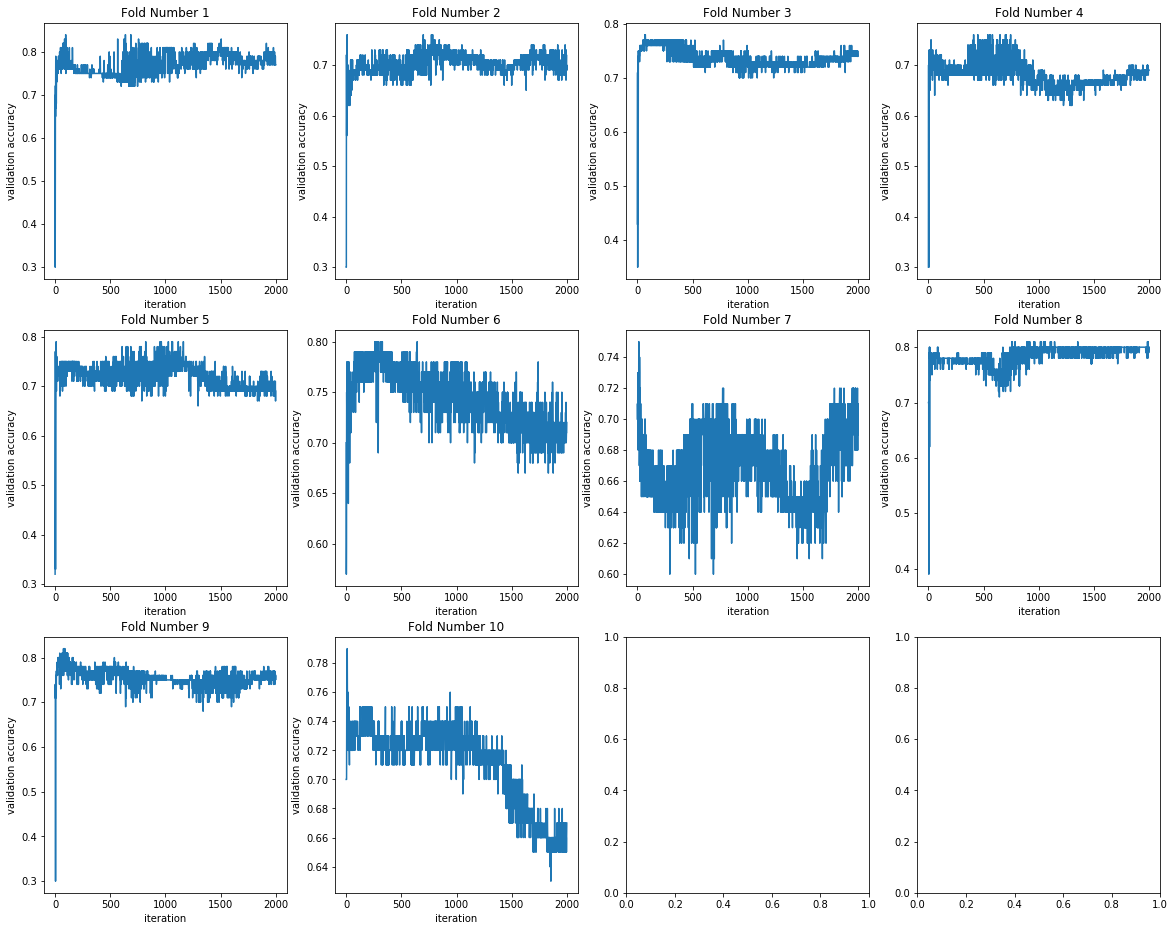

In [25]:
f,ax = plt.subplots(3,4,figsize=(20,16))
for i in range(len(hists)) :
    tmp_ax = ax[int(i/4),int(i%4)]
    tmp_ax.plot(range(len(hists[i].history['val_acc'])),hists[i].history['val_acc'])
    tmp_ax.set_xlabel('iteration')
    tmp_ax.set_ylabel('validation accuracy')
    tmp_ax.set_title('Fold Number {}'.format(i+1))

## Training Accuracy

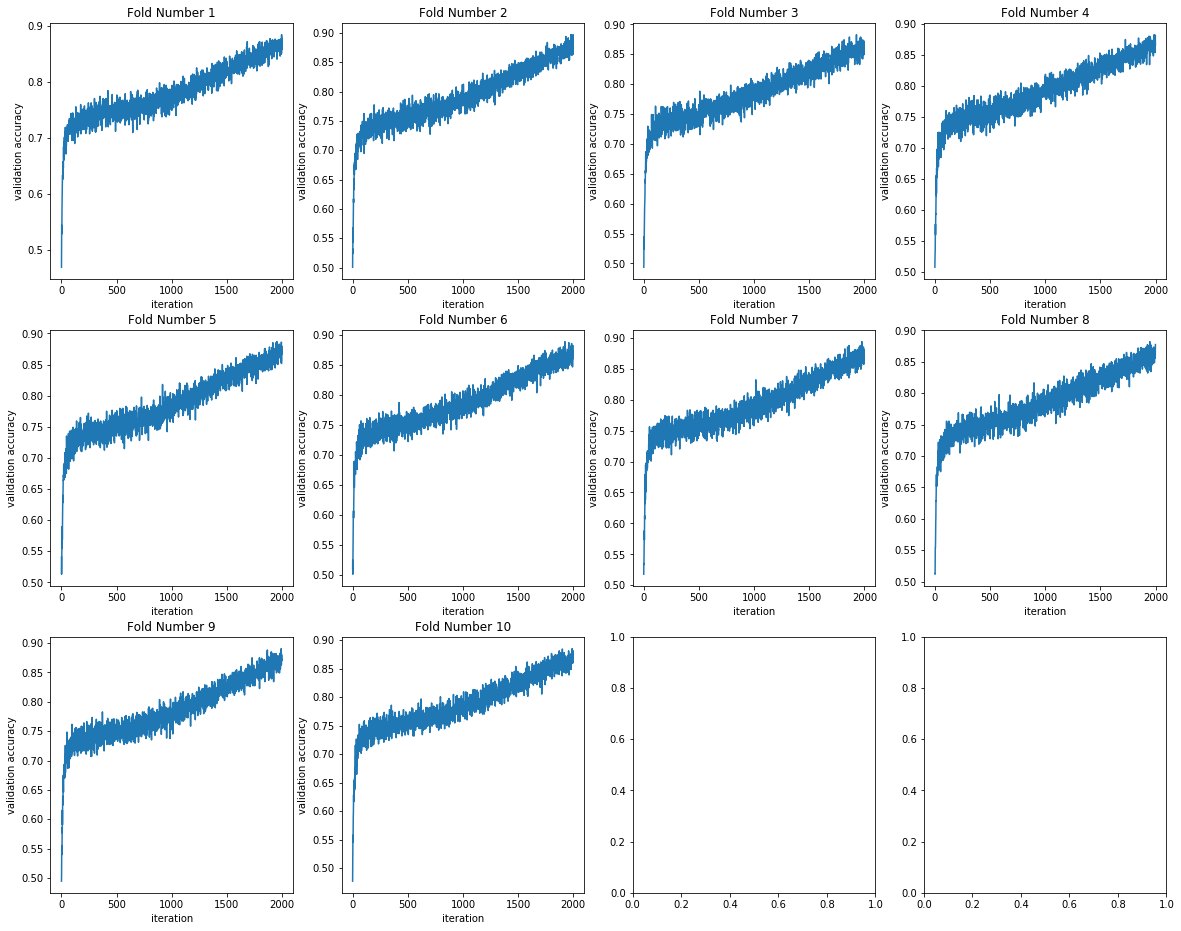

In [26]:
f,ax = plt.subplots(3,4,figsize=(20,16))
for i in range(len(hists)) :
    tmp_ax = ax[int(i/4),int(i%4)]
    tmp_ax.plot(range(len(hists[i].history['acc'])),hists[i].history['acc'])
    tmp_ax.set_xlabel('iteration')
    tmp_ax.set_ylabel('validation accuracy')
    tmp_ax.set_title('Fold Number {}'.format(i+1))

In [ ]:
sum_val_acc = 0
skf = StratifiedKFold(n_splits=10)
sgd = SGD(lr=0.3, momentum=0.7)
hists_1 = []
for train_index, test_index in skf.split(x_data, y_data):
    model = Sequential()
    model.add(Dense(100, activation='selu'))
    model.add(Dense(100, input_dim=30, activation='selu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
    hist = model.fit_generator(data_generator(p_x_data[train_index,:],y_data[train_index,:],32),epochs=int(2000),steps_per_epoch=40,validation_data=(mx.transform(x_data)[test_index,:],y_data[test_index,:]))
    hists_1.append(hist)
    sum_val_acc += hist.history['val_acc'].pop()
    del model
print(sum_val_acc/10)

In [ ]:
sum_val_acc = 0
skf = StratifiedKFold(n_splits=10)
sgd = SGD(lr=0.3, momentum=0.7)
hists_2 = []
for train_index, test_index in skf.split(x_data, y_data):
    model = Sequential()
    model.add(Dense(100, activation='selu'), kernel_regularizer=regularizers.l2(0.01))
    model.add(Dense(100, input_dim=30, activation='selu'), kernel_regularizer=regularizers.l2(0.01))
    model.add(Dense(1, activation='sigmoid'), kernel_regularizer=regularizers.l2(0.01))
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
    hist = model.fit_generator(data_generator(p_x_data[train_index,:],y_data[train_index,:],32),epochs=int(2000),steps_per_epoch=40,validation_data=(mx.transform(x_data)[test_index,:],y_data[test_index,:]))
    hists_2.append(hist)
    sum_val_acc += hist.history['val_acc'].pop()
    del model
print(sum_val_acc/10)

In [ ]:
sum_val_acc = 0
skf = StratifiedKFold(n_splits=10)
sgd = SGD(lr=0.3, momentum=0.7)
hists_3 = []
for train_index, test_index in skf.split(x_data, y_data):
    model = Sequential()
    model.add(Dense(100, activation='selu'), kernel_regularizer=regularizers.l2(0.01))
    model.add(AlphaDropout(.2))
    model.add(Dense(100, input_dim=30, activation='selu'), kernel_regularizer=regularizers.l2(0.01))
    model.add(AlphaDropout(.2))
    model.add(Dense(1, activation='sigmoid'), kernel_regularizer=regularizers.l2(0.01))
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
    hist = model.fit_generator(data_generator(p_x_data[train_index,:],y_data[train_index,:],32),epochs=int(2000),steps_per_epoch=40,validation_data=(mx.transform(x_data)[test_index,:],y_data[test_index,:]))
    hists_3.append(hist)
    sum_val_acc += hist.history['val_acc'].pop()
    del model
print(sum_val_acc/10)